# 2.2 Pandas, Basic Mapping

This section aims to provide new skills in python to handle structured "table" data. 

Learning outcome:
-   Manipulation of data frames (describing, filtering, ...) 
-   Learn about Lambda functions
-   Intro to datetime objects
-   Plotting data from data frames (histograms and maps)
-   Introduction to Plotly, an interactive plotting package
-   Introduction to CSV & Parquet


We will work on several structured data sets: sensor metadata, seismic data product (earthquake catalog).

First, we import all the modules we need:

In [16]:
import numpy as np
import pandas as pd
import io
import requests
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode' # writes as standalone html, 
# pio.renderers.default = 'iframe' # writes files as standalone html, 
# pio.renderers.default = 'png' # writes files as standalone html, 
# try notebook, jupyterlab, png, vscode, iframe


# The Basics of Pandas 

Pandas are composed of ``Series`` and ``DataFrame``. ``Series`` are columns with attributes or keys. The ``DataFrame`` is a multi-dimensional table made up of ``Series``.

We can create a DataFrame composed of series from scratch using Python dictionary:

In [17]:
data = {
    'temperature' : [36,37,30,50],
    'precipitation':[3,1,0,0]
}
my_pd = pd.DataFrame(data)
print(my_pd)

   temperature  precipitation
0           36              3
1           37              1
2           30              0
3           50              0


Each (key,value) item in the dataframe correspond to a value in ``data``. To get the keys of the dataframe, type:

In [18]:
my_pd.keys()

Index(['temperature', 'precipitation'], dtype='object')

get a specific ``Series`` (different from the array)

In [19]:
print(my_pd.temperature[:])
print(type(my_pd.temperature[:]))

0    36
1    37
2    30
3    50
Name: temperature, dtype: int64
<class 'pandas.core.series.Series'>


to get the _value_ of a specific key (e.g., temperature), at a specific index (e.g., 2) type:

In [20]:
print(my_pd.temperature[2])
# What is the data type of this value?
print(type(my_pd.temperature[2]))

30
<class 'numpy.int64'>


# Reading a DataFrame from a CSV file

We can read a pandas directly from a standard file. Here you will read a catatalog of earthquakes.

In [21]:
quake = pd.read_csv("Global_Quakes_IRIS.csv")

Now you use the ``head`` function to display what is in the file

In [22]:
# enter answer here
quake.head()

time  latitude  longitude     depth  magnitude  \
0  2010-07-02 06:04:03.570  -13.6098   166.6541   34400.0        6.3   
1  2010-07-04 21:55:52.370   39.6611   142.5792   30100.0        6.3   
2  2010-07-10 11:43:33.000   11.1664   146.0823   16900.0        6.3   
3  2010-07-12 00:11:20.060  -22.2789   -68.3159  109400.0        6.2   
4  2010-07-14 08:32:21.850  -38.0635   -73.4649   25700.0        6.6   

                   description  
0              VANUATU ISLANDS  
1    NEAR EAST COAST OF HONSHU  
2     SOUTH OF MARIANA ISLANDS  
3               NORTHERN CHILE  
4  NEAR COAST OF CENTRAL CHILE

Display the depth using two ways to use the pandas object

In [23]:
print(quake.depth)
print(quake['depth'])

0        34400.0
1        30100.0
2        16900.0
3       109400.0
4        25700.0
          ...   
1780     10000.0
1781    105000.0
1782    608510.0
1783     10000.0
1784     35440.0
Name: depth, Length: 1785, dtype: float64
0        34400.0
1        30100.0
2        16900.0
3       109400.0
4        25700.0
          ...   
1780     10000.0
1781    105000.0
1782    608510.0
1783     10000.0
1784     35440.0
Name: depth, Length: 1785, dtype: float64


Calculate basic statitics of the data using the function ``describe``.

In [24]:
quake.describe()

latitude    longitude          depth    magnitude
count  1785.000000  1785.000000    1785.000000  1785.000000
mean      0.840700    40.608674   82773.187675     6.382403
std      30.579308   125.558363  146988.302031     0.429012
min     -69.782500  -179.957200       0.000000     6.000000
25%     -19.905100   -73.832200   12000.000000     6.100000
50%      -4.478900   113.077800   24400.000000     6.300000
75%      27.161700   145.305700   58000.000000     6.600000
max      74.391800   179.998100  685500.000000     9.100000

Calculate mean and median of specific ``Series``, for example depth.

In [25]:
# answer it here
print(quake.depth.mean())
print(quake.depth.median())


82773.18767507003
24400.0


## Simple Python Functions
We will now practice how to modify the content of the DataFrame using functions. We will take the example that we want to change the depth values from meters to kilometers. First we can define this operation as a function

In [26]:
# this function converts a value in meters to a value in kilometers
m2km = 1000 # this is defined as a global variable
def meters2kilometers(x):
    return x/m2km


In [27]:
# now test it using the first element of the quake DataFrame
meters2kilometers(quake.depth[0])

34.4

Let's define another function that uses a local instead of global variable

In [28]:
def meters2kilometers2(x):
    m2km2=1000
    return x/m2km2
# m2km2 is a local variable and cannot be called outside of the function. Prove it next by inquiring its value in the next cell.

In [29]:
try:
    print(m2km2)
except:
    print('Error: This variable is not defined.')

Error: This variable is not defined.


We now discuss the **lambda** functions.

In [30]:
# now we apply it on the entire Series
meters2kilometers(quake.depth)

0        34.40
1        30.10
2        16.90
3       109.40
4        25.70
         ...  
1780     10.00
1781    105.00
1782    608.51
1783     10.00
1784     35.44
Name: depth, Length: 1785, dtype: float64

We can also define this very basic function as a **lambda** function. There are several ways of doing an operation on all rows of a column. The first option is to use the map function.

If you are not familiar with lambda function in Python, look at:

https://realpython.com/python-lambda/

We will practice a bit lambda functions



In [31]:
# Now the equivalent in lambda is:
lambda_meters2kilometers = lambda x:x/1000
# x is the variable

In [32]:
# apply it to the entire series
lambda_meters2kilometers(quake.depth)

0        34.40
1        30.10
2        16.90
3       109.40
4        25.70
         ...  
1780     10.00
1781    105.00
1782    608.51
1783     10.00
1784     35.44
Name: depth, Length: 1785, dtype: float64

In [33]:
# you can add several variables into lambda functions
remove_anything = lambda x,y:x-y
remove_anything(3,2)

1

We will now use a lambda function to scale the depth values to km. 

In [34]:
quake.depth.map(lambda p: p/1000)

0        34.40
1        30.10
2        16.90
3       109.40
4        25.70
         ...  
1780     10.00
1781    105.00
1782    608.51
1783     10.00
1784     35.44
Name: depth, Length: 1785, dtype: float64

This did not affect the values of the DataFrame, check it:

In [35]:
quake.depth

0        34400.0
1        30100.0
2        16900.0
3       109400.0
4        25700.0
          ...   
1780     10000.0
1781    105000.0
1782    608510.0
1783     10000.0
1784     35440.0
Name: depth, Length: 1785, dtype: float64

Instead, you could overwrite ``quake.depth=X``. Try two approaches but just do it once!

In [36]:
#type answer below
quake.depth=quake.depth.map(lambda x:x/1000)

In [37]:
# or like this
# quake.depth=quake.depth.apply(lambda x:x/1000)

Plot a histogram of the depth distributions using matplotlib function ``hist``.

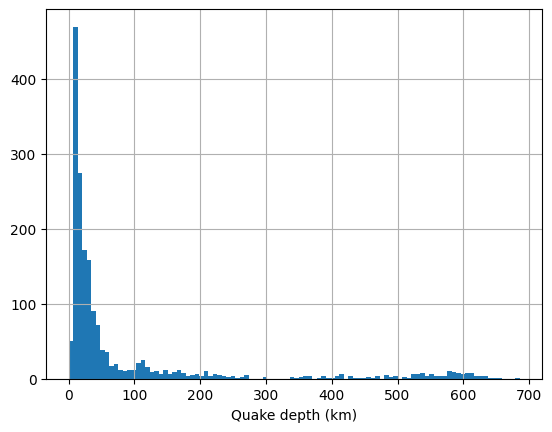

In [38]:
# answer here
plt.hist(quake.depth,100)
plt.grid(True)
plt.xlabel('Quake depth (km)')
plt.show()

You can use the interactive plotting package Plotly. First we will show a histogram of the event depth using the function ``histogram``

In [39]:
fig = px.histogram(quake,   #specify what dataframe to use
             x="depth",  #specify the variable for the histogram 
             nbins=50,       #number of bins for the histogram 
             height=400,     #dimensions of the figure
             width=600);
fig.show()

We will now make a new plot of the location of the earthquakes. We will use Plotly tool. 

The markersize will be scaled with the earthquake magnitude. To do so, we add a ``marker_size`` series in the DataFrame

In [40]:
quake['marker_size'] =np.fix(np.exp(quake['magnitude'])) # add marker size as exp(mag)
quake['magnitude bin'] = 0.5*np.fix(2*quake['magnitude']) # add marker size as exp(mag)

## Mapping using Plotly

Now we will plot the earthquakes locations on a map using the Plotly package. More tutorials on [Plotly](https://plotly.com/). Input of the function in the function is self-explanatory and typical of Python's function. The code [documentation](https://plotly.com/python/scatter-plots-on-maps/) of Plotly scatter_geo lists the variables.

In [41]:
fig = px.scatter_geo(quake,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),
                     height=600, width=600,
                     size='marker_size', color='magnitude',
                     hover_name="description",
                     hover_data=['description','magnitude','depth']);
fig.update_geos(resolution=110, showcountries=True)
fig.update_geos(resolution=110, showcountries=True,projection_type="orthographic")


The data was sorted by time. We now want to sort and show the data instead by magnitude. We use the pandas function ``sort`` to create a new DataFrame with sorted values.

In [42]:
quakes2plot=quake.sort_values(by='magnitude bin')

quakes2plot.head()

time  latitude  longitude   depth  magnitude  \
0     2010-07-02 06:04:03.570  -13.6098   166.6541   34.40        6.3   
1112  2017-08-31 17:06:55.750   -1.1590    99.6881   43.14        6.3   
1111  2017-08-27 04:17:51.010   -1.4513   148.0803    8.00        6.3   
1110  2017-08-19 02:00:52.550  -17.9609  -178.8406  544.00        6.4   
1108  2017-08-13 03:08:10.560   -3.7682   101.6228   31.00        6.4   

                   description  marker_size  magnitude bin  
0              VANUATU ISLANDS        544.0            6.0  
1112          SOUTHERN SUMATRA        544.0            6.0  
1111  ADMIRALTY ISLANDS REGION        544.0            6.0  
1110       FIJI ISLANDS REGION        601.0            6.0  
1108          SOUTHERN SUMATRA        601.0            6.0

Now we will plot again using Plotly

In [43]:
fig = px.scatter_geo(quakes2plot,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),
                     height=600, width=600,
                     size='marker_size', color='magnitude',
                     hover_name="description",
                     hover_data=['description','magnitude','depth']);
fig.update_geos(resolution=110, showcountries=True)
# fig.update_geos(resolution=110, showcountries=True,projection_type="orthographic")


## Creating a new DataFrame from a text file

The python package pandas is also very useful to parse many text files that are more or less formated as one observation per row and one column for each feature.

As an example, we are going to look at the list of seismic stations from the Northern California seismic network, available [here](http://ncedc.org/ftp/pub/doc/NC.info/NC.channel.summary.day):



In [44]:
url = 'http://ncedc.org/ftp/pub/doc/NC.info/NC.channel.summary.day'

However, many options are available if the file is not well formatted. See more in this [tutorial](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html):



In [45]:
# this gets the file linked in the URL page and convert it to a string
s = requests.get(url).content 

In [46]:

# this will convert the string, decode it , and make it a table
data = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, skiprows=2, sep='\s+', usecols=list(range(0, 13)))
# because columns/keys were not assigned, assign them now
data.columns = ['station', 'network', 'channel', 'location', 'rate', 'start_time', 'end_time', 'latitude', 'longitude', 'elevation', 'depth', 'dip', 'azimuth']

Let us look at the data. They are now stored into a pandas dataframe. Read the top of the table:

In [47]:
data.head()

station network channel location   rate           start_time  \
0     AAR      NC     EHZ       --  100.0  1984/01/01,00:00:00   
1     AAR      NC     EHZ       --  100.0  1987/05/01,00:00:00   
2     AAR      NC     SHZ       --   20.0  1994/11/28,00:00:00   
3     AAS      NC     EHZ       --  100.0  1984/11/27,18:45:00   
4     AAS      NC     EHZ       --  100.0  1987/05/01,00:00:00   

              end_time  latitude  longitude  elevation  depth   dip  azimuth  
0  1987/05/01,00:00:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0  
1  2006/01/04,19:19:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0  
2  2006/01/04,19:19:00  39.27594 -121.02696      911.0    0.0 -90.0      0.0  
3  1987/05/01,00:00:00  38.43014 -121.10959       31.0    0.0 -90.0      0.0  
4  2021/08/13,16:50:00  38.43014 -121.10959       31.0    0.0 -90.0      0.0

We can output the first element of the DataFrame:

In [48]:
data.iloc[0]

station                       AAR
network                        NC
channel                       EHZ
location                       --
rate                        100.0
start_time    1984/01/01,00:00:00
end_time      1987/05/01,00:00:00
latitude                 39.27594
longitude              -121.02696
elevation                   911.0
depth                         0.0
dip                         -90.0
azimuth                       0.0
Name: 0, dtype: object

In [49]:
data.iloc[:, 0]

0        AAR
1        AAR
2        AAR
3        AAS
4        AAS
        ... 
8602     WMP
8603     WMP
8604     WMP
8605     WMP
8606    WWVB
Name: station, Length: 8607, dtype: object

The DataFrame may have bad values. A typical data cleaning involves removing Nan and Zeros for instance.

In [50]:
data.dropna(inplace=True)
data=data[data.longitude!=0]

Use Plotly to map the stations.

In [51]:
fig = px.scatter_geo(data,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),
                     height=600, width=600,
                     hover_name="station",
                     hover_data=['network','station','channel','rate']);
fig.update_geos(resolution=110, showcountries=True)


In [52]:
fig = px.scatter_mapbox(data,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),mapbox_style="carto-positron",
                     height=600, width=500,
                     hover_name="station",
                     hover_data=['network','station','channel','rate']);
fig.update_layout(title="Northern California Seismic Network")
fig.show()

## Pandas: data selection
We can filter the data with the value taken by a given column:

In [53]:
data.loc[data.station=='KCPB']

station network channel location  rate           start_time  \
4163    KCPB      NC     BHE       --  50.0  1999/08/03,00:00:00   
4164    KCPB      NC     BHE       --  50.0  2000/06/06,16:00:00   
4165    KCPB      NC     BHE       --  50.0  2002/01/24,23:50:00   
4166    KCPB      NC     BHE       --  20.0  2002/10/17,00:00:00   
4167    KCPB      NC     BHN       --  50.0  1999/08/03,00:00:00   
...      ...     ...     ...      ...   ...                  ...   
4236    KCPB      NC     MNE       --  10.0  2000/06/06,16:00:00   
4237    KCPB      NC     MNN       --  10.0  1999/08/03,00:00:00   
4238    KCPB      NC     MNN       --  10.0  2000/06/06,16:00:00   
4239    KCPB      NC     MNZ       --  10.0  1999/08/03,00:00:00   
4240    KCPB      NC     MNZ       --  10.0  2000/06/06,16:00:00   

                 end_time  latitude  longitude  elevation  depth   dip  \
4163  2000/06/06,16:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
4164  2002/01/24,23:50:00  39.68631 -123.58242     1261.0    0.0   0.0   
4165  2002/10/16,23:59:00  39.68631 -123.58242     1261.0    0.0   0.0   
4166  2006/01/24,18:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
4167  2000/06/06,16:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
...                   ...       ...        ...        ...    ...   ...   
4236  2000/07/12,00:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
4237  2000/06/06,16:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
4238  2000/07/12,00:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
4239  2000/06/06,16:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   
4240  2000/07/12,00:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   

      azimuth  
4163     90.0  
4164     90.0  
4165     90.0  
4166     90.0  
4167      0.0  
...       ...  
4236     90.0  
4237      0.0  
4238      0.0  
4239      0.0  
4240      0.0  

[78 rows x 13 columns]

In [54]:
# Select two stations, use the typical "OR" |
data.loc[(data.station=='KCPB') | (data.station=='KHBB')]

station network channel location  rate           start_time  \
4163    KCPB      NC     BHE       --  50.0  1999/08/03,00:00:00   
4164    KCPB      NC     BHE       --  50.0  2000/06/06,16:00:00   
4165    KCPB      NC     BHE       --  50.0  2002/01/24,23:50:00   
4166    KCPB      NC     BHE       --  20.0  2002/10/17,00:00:00   
4167    KCPB      NC     BHN       --  50.0  1999/08/03,00:00:00   
...      ...     ...     ...      ...   ...                  ...   
4434    KHBB      NC     LHZ       --   1.0  2016/04/28,16:56:00   
4435    KHBB      NC     LHZ       --   1.0  2022/08/09,18:00:00   
4436    KHBB      NC     LNE       --   1.0  2015/10/29,21:18:00   
4437    KHBB      NC     LNN       --   1.0  2015/10/29,21:18:00   
4438    KHBB      NC     LNZ       --   1.0  2015/10/29,21:18:00   

                 end_time  latitude  longitude  elevation  depth   dip  \
4163  2000/06/06,16:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
4164  2002/01/24,23:50:00  39.68631 -123.58242     1261.0    0.0   0.0   
4165  2002/10/16,23:59:00  39.68631 -123.58242     1261.0    0.0   0.0   
4166  2006/01/24,18:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
4167  2000/06/06,16:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
...                   ...       ...        ...        ...    ...   ...   
4434  2022/08/09,18:00:00  40.65990 -123.21966     1864.0    0.0 -90.0   
4435  3000/01/01,00:00:00  40.65990 -123.21966     1864.0    0.0 -90.0   
4436  2016/04/28,16:56:00  40.65990 -123.21966     1864.0    0.0   0.0   
4437  2016/04/28,16:56:00  40.65990 -123.21966     1864.0    0.0   0.0   
4438  2016/04/28,16:56:00  40.65990 -123.21966     1864.0    0.0 -90.0   

      azimuth  
4163     90.0  
4164     90.0  
4165     90.0  
4166     90.0  
4167      0.0  
...       ...  
4434      0.0  
4435      0.0  
4436     90.0  
4437      0.0  
4438      0.0  

[123 rows x 13 columns]

In [55]:
# Select two stations, use the typical "AND" &
data.loc[(data.station=='KCPB') & (data.channel=='HNZ')]

station network channel location   rate           start_time  \
4213    KCPB      NC     HNZ       --  100.0  2002/10/17,00:00:00   
4214    KCPB      NC     HNZ       --  100.0  2006/10/18,00:08:00   
4215    KCPB      NC     HNZ       --  100.0  2010/11/01,22:00:00   
4216    KCPB      NC     HNZ       --  100.0  2011/07/13,00:00:00   
4217    KCPB      NC     HNZ       --  100.0  2011/09/07,19:00:00   
4218    KCPB      NC     HNZ       --  100.0  2015/10/29,18:00:00   
4219    KCPB      NC     HNZ       --  100.0  2016/04/28,16:39:00   

                 end_time  latitude  longitude  elevation  depth   dip  \
4213  2006/10/18,00:08:00  39.68631 -123.58242     1261.0    0.0 -90.0   
4214  2010/11/01,22:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   
4215  2011/07/13,00:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   
4216  2011/09/07,19:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   
4217  2015/10/29,18:00:00  39.68631 -123.58242     1261.0    0.0 -90.0   
4218  2016/04/28,16:39:00  39.68631 -123.58242     1261.0    0.0 -90.0   
4219  2022/11/15,18:19:00  39.68631 -123.58242     1261.0    0.0 -90.0   

      azimuth  
4213      0.0  
4214      0.0  
4215      0.0  
4216      0.0  
4217      0.0  
4218      0.0  
4219      0.0

In [56]:
# or like this
data.loc[data.station.isin(['KCPB', 'KHBB'])]

station network channel location  rate           start_time  \
4163    KCPB      NC     BHE       --  50.0  1999/08/03,00:00:00   
4164    KCPB      NC     BHE       --  50.0  2000/06/06,16:00:00   
4165    KCPB      NC     BHE       --  50.0  2002/01/24,23:50:00   
4166    KCPB      NC     BHE       --  20.0  2002/10/17,00:00:00   
4167    KCPB      NC     BHN       --  50.0  1999/08/03,00:00:00   
...      ...     ...     ...      ...   ...                  ...   
4434    KHBB      NC     LHZ       --   1.0  2016/04/28,16:56:00   
4435    KHBB      NC     LHZ       --   1.0  2022/08/09,18:00:00   
4436    KHBB      NC     LNE       --   1.0  2015/10/29,21:18:00   
4437    KHBB      NC     LNN       --   1.0  2015/10/29,21:18:00   
4438    KHBB      NC     LNZ       --   1.0  2015/10/29,21:18:00   

                 end_time  latitude  longitude  elevation  depth   dip  \
4163  2000/06/06,16:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
4164  2002/01/24,23:50:00  39.68631 -123.58242     1261.0    0.0   0.0   
4165  2002/10/16,23:59:00  39.68631 -123.58242     1261.0    0.0   0.0   
4166  2006/01/24,18:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
4167  2000/06/06,16:00:00  39.68631 -123.58242     1261.0    0.0   0.0   
...                   ...       ...        ...        ...    ...   ...   
4434  2022/08/09,18:00:00  40.65990 -123.21966     1864.0    0.0 -90.0   
4435  3000/01/01,00:00:00  40.65990 -123.21966     1864.0    0.0 -90.0   
4436  2016/04/28,16:56:00  40.65990 -123.21966     1864.0    0.0   0.0   
4437  2016/04/28,16:56:00  40.65990 -123.21966     1864.0    0.0   0.0   
4438  2016/04/28,16:56:00  40.65990 -123.21966     1864.0    0.0 -90.0   

      azimuth  
4163     90.0  
4164     90.0  
4165     90.0  
4166     90.0  
4167      0.0  
...       ...  
4434      0.0  
4435      0.0  
4436     90.0  
4437      0.0  
4438      0.0  

[123 rows x 13 columns]

We can access to a brief summary of the data:

In [57]:
data.station.describe()

count     8587
unique     923
top        GRT
freq       127
Name: station, dtype: object

In [58]:
data.elevation.describe()

count    8587.000000
mean      686.976464
std       706.552086
min     -1388.000000
25%       167.000000
50%       447.900000
75%       931.000000
max      3680.000000
Name: elevation, dtype: float64

We can perform standard operations on the whole data set:

In [59]:
data.mean()

TypeError: Could not convert ['AARAARAARAASAASAASABJABJABJABJABRABRABRADWADWADWAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFDAFHAFHAFHAFLAFLAFLAFLAFLAFLAFLAFLAFLAFLAFLAFLAFLAFLAFLAFLAFLAFLAFLAFLAFLAFOAFRAFRAFRAFRAFRAGIAHRAHRAHRAHRAHRAHRALAALAALAALAALNALNALNAODAODAODAOHAOHAOHAOHAOHAOHAOHAPGAPGAPRAPRAPRAPRARJARJARJARRARRARRARRARRARWASMASMASMASMASMBASMBASMBASMBASMBASMBASMBASMBASMBAVRAVRAVRBAPBAPBAPBAPBAPBAPBAPBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAPBBAVBAVBAVBAVBAVBAVBAVBAVBAVBAVBAVBAVBAVBAVBAVBAVBAVBAVBBGBBGBBGBBGBBGBBGBBGBBBGBBBGBBBGBBBGBBBGBBBGBBBGBBBGBBBGBBBGBBBGBBBGBBBGBBBGBBBNBBNBBNBBNBBNBBNBCCBCCBCCBCCBCCBCCBCCBCCBCCBCCBCCBCCBCCBCCBCCBCGBCGBCGBCGBCGBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCGBBCWBCWBCWBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBCWBBEHBEHBEHBEMBEMBEMBHRBHRBHRBHRBHSBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBHWBJCBJCBJCBJCBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJFBJOBJOBJOBJOBJOBJOBBJOBBJOBBJOBBJOBBJOBBJOBBJOBBJOBBJOBBJOBBJOBBJOBBJOBBJOBBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBKCBLRBLRBLRBLRBLRBLRBLRBMSBMSBMSBMSBMSBMSBPCBPCBPCBPCBPCBPCBPCBPCBPEBPEBPEBPEBPEBPEBPFBPFBPFBPFBPFBPIBPIBPIBPIBPLBPLBPLBPLBPLBPLBPLBPLBPLBPLBPLBPLBPLBPLBPLBPLBPLBPLBPLBPLBPLBPOBPOBPOBPOBPOBPOBPOBPOBPOBPOBPOBPOBPOBPOBPOBPOBBPOBBPOBBPOBBPOBBPOBBPOBBPOBBPOBBPOBBPOBBPOBBPOBBPOBBPOBBPPBPRBPRBPRBPRBPRBBPRBBPRBBPRBBPSBPSBPSBPSBPSBPSBPVBPVBPVBPVBPVBPVBPVBPVBPVBPVBPVBPVBPVBPVBPVBRMBRMBRMBRVBRVBRVBRVBSCBSCBSCBSCBSCBSCBSCBSCBSCBSCBSCBSCBSCBSGBSGBSGBSGBSGBSGBSGBSGBSGBSGBSGBSGBSGBSGBSGBSGBSGBSGBSGBSGBSGBSLBSLBSLBSLBSMBSMBSMBSMBSMBSMBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBSRBTIBTIBTIBTIBTIBTIBTIBTIBTIBTIBTIBTIBTIBTIBTIBTIBTIBTIBTIBTIBTIBTVBTVBTVBTVBTVBTVBTVBTVBTVBTVBTVBTVBTVBTVBTVBVLBVLBVLBVLBBVYBVYBVYC001C001C001C002C002C002C003C003C003C004C004C004C005C005C005C006C006C006C007C007C007C008C008C008C008C008C008C009C009C009C010C010C010C011C011C011C012C012C012C013C013C013C014C014C014C015C015C015C016C016C016C017C017C017C018C018C018C019C019C019C020C020C020C021C021C021C022C022C022C023C023C023C024C024C024C025C025C025C026C026C026C027C027C027C028C028C028C029C029C029C030C030C030C031C031C031C032C032C032C033C033C033C034C034C034C035C035C035C036C036C036C037C037C037C038C038C038C039C039C039C040C040C040C041C041C041C042C042C042C043C043C043C044C044C044C045C045C045C046C046C046C047C047C047C048C048C048C049C049C049C050C050C050C051C051C051C052C052C052C053C053C053C054C054C054C055C055C055C056C056C056C057C057C057C058C058C058C059C059C059C060C060C060C061C061C061C062C062C062C063C063C063C064C064C064C065C065C065C066C066C066C067C067C067C068C068C068C069C069C069C070C070C070C071C071C071C072C072C072C073C073C073CACCACCACCACCACCADCADCADCADCADCADCADBCADBCADBCADBCADBCADBCADBCADBCADBCAGCAGCAGCAGCAGCAGCAGCAGCAGCAICAICAICALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCALCAOCAOCAOCAOCAOCAOCAOCAOCAOCAOCAOCAOCAOCAOCAOCAOCAOCAOCAOCAOCAOCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCAPCBKCBKCBLGCBLGCBLGCBLGCBPCBPCBPCBPCBPCBPCBPCBPCBPCBPCBPCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBRCBSCBSCBSCBSBCBSBCBSBCBSBCBWCBWCBWCBWCBWCBWCBWCBWCBZCBZCBZCBZCBZCBZCBZCBZCCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCH1CCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOBCCOBCCOBCCOBCCOBCCOBCCOBCCOBCCOBCCOBCCOBCCOBCCOBCCOBCCOBCCYCCYCCYCCYCCYCDACDACDACDGCDGCDGCDGCDGCDGCDGCDGCDGCDGCDGCDGCDGCDGCDGCDOCDOCDOCDOBCDOBCDOBCDOBCDOBCDOBCDOBCDUCDUCDUCDUCDUCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCDVCGPCGPCGPCGPCGPCGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CGP1CHMGCHMGCHMGCHMGCHMGCHMGCHRCHRCHRCHRCHRCLCCLCCLCCLCBCLCBCLCBCLCBCLCBCLCBCLCBCLCBCLCBCMCCMCCMCCMCCMCCMCCMCCMCCMCCMHCMHCMHCMICMICMICMJCMJCMJCMKCMKCMKCMKCMKCMKCMLCMLCMLCMLCMLCMLCMLCMLPCMLPCMLPCMLPCMMCMMCMMCMMCMMCMMCMMCMNCMNCMNCMNCMNCMNCMOCMOCMOCMOCMOBCMOBCMOBCMOBCMOBCMOBCMOBCMOBCMOBCMPCMPCMPCMPCMPCMRCMRCMRCMWCMWCMWCMWCMWCMWCMWCMWCMWCMWCMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CMW1CNICNICNICNICNICNICNICNICNICNICNICNICNICNICNICNICOSCOSCOSCPICPICPICPICPICPICPICPICPICPICPICPICPICPICPICPICPLCPLCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPPCPPCPPCPPCPPCRACRACRACRHCRHCRHCRHCRHCRHCRHCRHCRHCRHCRPCRPCRPCRPCRPCRPCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCRPBCSACSACSACSACSACSACSACSACSACSACSACSCCSCCSHCSHCSHCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSLCSPCSPCSPCSPCSPCSPBCSPBCSPBCSPBCSTCSTCSTCSTBCSTBCSTCCSTCCSTCCSUCSUCSUCSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSU1CSVCSVCTACTACTACTACTACTACTACTACTACTHCTHCUSLDCUSLDCUSLDCUSLDCUSLDCUSLDCUSLDCUSLDCUSLDCUSLDCUSLDCUSLDCUSLDCUSLDCUSLDCVACVACVACVLCVLCVLCVLCVLCVLCVLCVLCVLCVLCVLCVLCVPCVPCVPCVPCVPCVPCVPCVPCVPCVPCVPCVPCYBCYBCYBCYBCYBCYBCYBCYBCYBCYBCYBCYBCYBCYBCYBCYBCYBCYBCYBCYBCYBCYBCYDCYDCYDCYDCYDCYDCYDCYDCYDCYD1CYD1CYD1CYD1CYD1CYD1CYD1CYD1CYD1CYD1CYD1CYD1CYD1CYD1CYD1DBOGDBOGDBOGDBOGDBOGEXSGEXSGEXSGEXSGEXSGEXSGG001G001G001G002G002G002G003G003G003G004G004G004G005G005G005G006G006G006G007G007G007GACGACGACGARGARGARGAXGAXGAXGAXBGAXBGAXBGAXBGAXBGAXBGAXBGAXBGBBGBBGBDGBDGBDGBGGBGGBGGBGGBGGBGGBGGBGGBGGBLGBLGBLGBLGBLGBLGBLGBLGBLGBLGBLGBLGBLGBLGBLGBMGBMGBMGCBGCBGCBGCKGCKGCMGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCPNGCRGCRGCRGCRGCSGCSGCSGCVGCVGCVGCVGCVGCVGCVBGCVBGCVBGCVBGCVBGCVBGCVBGCVBGCVBGCWGCWGCWGCWGCWGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGCWBGDCGDCGDCGDCBGDCBGDCBGDCBGDCBGDCBGDCBGDCBGDCBGDCBGDCBGDCBGDCBGDCBGDCBGDCBGDCBGDCBGDXGDXGDXGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGDXBGFCGFCGFCGFCGFCGFCGGLGGPGGPGGPGGPGGPGGPGGPGGPGGPGGPBGGPBGGPCGGPCGGPCGGPCGGPCGGPCGGPCGGPCGGPCGGPCGGPCGGPCGGPCGGPCGGPCGGUGGUGGUGHCGHCGHCGHGGHGGHGGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHGBGHLGHLGHLGHMGHMGHMGHOGHOGHOGHOGHOGHOGHVGHVGHVGHVGMCGMCGMCGMKGMKGMKGMMGMOGMOGMRGMRGMRGMRGMRGMRGMRGMRGNAGNAGNAGNAGNAGNAGNAGNRGNRGNRGNRGNRGNRGNRGNRGNRGNRGNRGNRGNRGNRGNRGPMGPMGPMGPMGPMGPMGPMGPMGROGROGROBGROBGROBGROBGROBGROBGROBGROBGROBGROBGROBGROBGROBGROBGROBGROBGROBGROBGROBGROBGROBGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGRTGSGGSGGSGGSGGSGGSMGSNGSNGSNGSNGSNGSNGSNGSNGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSRGSSGSSGSSGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGSXGTCGTCGTCGTCGTCGTSGTSGTSGVAGVAGVAGVAGVAGVAGVAGVAGVAGVAGVAGVAGVAGVAGVAGVAGVAGVAGVAGVAGVAGVVGVVGVVGWKGWKGWKGWKGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWKBGWRGWRGWRGWRGWRGWRGWRGWRGWRGWWGWWGWWGWWGWWGWWGWWGWWGWWGWWGWWGWWGWWGWWGWWH001H001H001H002H002H002HAZHAZHAZHAZHAZHAZHAZHBCHBCHBCHBCHBCHBCHBCHBCHBCHBCHBCHBCHBCHBCHBCHBHHBHHBHHBHHBHHBHHBHHBHHBHHBHHBHHBHHBHHBHHBHHBTHBTHBTHBTHBTHBTHBTHBTHBTHCAHCAHCAHCAHCAHCABHCABHCABHCABHCBHCBHCBHCBBHCBBHCBBHCBBHCOHCOHCOHCOHCOHCOHCOHCPHCPHCRHCRHCRHCRBHCRBHCRBHCRBHDLHDLHDLHDLHDLHERHERHESHESHESHESHESHESHESHESHESHESHESHESHESHESHESHFEHFEHFEHFEHFEHFHHFHHFMHFMHFMHFMHFMHFMHFPHFPHFPHGSHGSHGSHGSHGSHGSHGSHGSHGSHGSHGWHGWHGWHHPHHPHHPHHPHHPHHPHHPHHPHHPHHPHHPHHPHHPHHPHHPHHPHHPHHPHHPHHPHHPHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJGHJSHJSHJSHJSHJSHJSHJSHKRHKRHLBHLBHLBHLBHLBHLBHLBHLBHLBHLBHLBHLBHLBHLBHLBHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLOHLPHLPHLPHLPHLPHLPHLTHLTHLTHLTHLTHLTHLTHMOHMOHMOHMOHMOHMOBHMOBHMOBHMOBHMOBHMOBHMOBHMOBHMOBHMOBHMOBHMOBHMOBHMOBHMPHMPHMPHMPHMPHMPHMPHMPHMPHMPHMPHMPHMPHMPHMPHMSHMSHMSHMSHMSHMSHMSHMSHMSHMSHMSHMSHMSHMSHMSHORHORHORHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPHHPHHPHHPHHPHHPLHPLHPLHPLHPLHPLHPLHPLHPLHPLHPLHPLHPLHPRHPRHQRHQRHQRHQRHQRHQRHQRHQRHQRHQRHSFHSFHSFHSFHSFBHSFBHSFBHSFBHSFBHSFBHSFBHSFBHSFBHSFBHSFBHSFBHSFBHSFBHSFBHSLHSLHSLHSLHSPHSPHSPHTUHTUHTUHTUJ001J001J001J002J002J002J003J003J003J004J004J004J005J005J005J006J006J006J007J007J007J008J008J008J009J009J009J010J010J010J011J011J011J012J012J012J013J013J013J014J014J014J015J015J015J016J016J016J017J017J017J018J018J018J019J019J019J020J020J020J021J021J021J022J022J022J023J023J023J024J024J024J025J025J025J026J026J026J027J027J027J028J028J028J029J029J029J030J030J030J031J031J031J032J032J032J033J033J033J034J034J034J035J035J035J036J036J036J037J037J037J038J038J038J039J039J039J040J040J040J041J041J041J042J042J042J043J043J043J044J044J044J045J045J045J046J046J046J047J047J047J048J048J048J048J048J048J049J049J049J050J050J050J051J051J051J052J052J052J053J053J053J054J054J054J055J055J055J056J056J056J057J057J057J058J058J058J059J059J059J060J060J060J061J061J061J062J062J062J063J063J063J064J064J064J065J065J065J066J066J066J067J067J067J068J068J068JALJALJALJARJARJARJARJARJARJARJARJARJARJARJARJARJARJARJARJARJARJARJARJARJARJARJARJARJARJBCJBCJBCJBGJBGJBGJBGJBGJBGJBGJBGJBGJBGJBGJBGJBGJBLJBLJBLJBLJBLJBLJBLJBLJBLJBLJBLJBLJBLJBMJBMJBMJBMBJBMBJBMBJBMBJBMBJBMBJBMBJBMBJBMBJBMBJBMBJBMBJBMBJBMBJBNJBNJBNJBNJBNJBNJBNJBNJBNBJBNBJBNBJBNBJBNBJBNBJBNBJBNBJBNBJBNBJBNBJBNBJBNBJBNBJBNBJBRJBRJBRJBRJBRJBRJBRJBRJBRJBZJBZJBZJCBJCBJCBJCBJCBJCBJCBJCBJCCJCCJCCJCCJCCJCCJCCJCCJCCJCCJCCJCCJCCJCCJCCJCCJCCJCCJCCJCCJCHJCHJCHJCHJCHJCHJCHJCHJCHJCHJCHJCHJCHJCHJCHJCHJCHJCHJCHJCHJCPJCPJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJCPBJECJECJECJECJECJECBJECBJECBJECBJECBJECBJECBJECBJEGJEGJEGJEGJEGJELJELJELBJELBJELBJELBJELBJELBJELBJELBJELBJELBJELBJELBJELBJELBJELBJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJFPJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJGRJHLJHLJHLJHPJHPJHPJHUJHUJHUJHUJHUJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJOJJRJJRJLAJLAJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLABJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLOJLPJLPJLPJLPJLPJLPJLPJLTJLTJLXJLXJLXJLXJLXJMGJMGJMGJMGJMGBJMGBJMGBJMGBJMGBJMGBJMGBJMGBJMGBJMMJMMJMMJMMJMMJMMJMMJMMJMMJMMJMMJMMJMMJMMJMMJMPJMPJMPJMPJMPJMPJMPJMPJMPJMPJMPJMPJNAJNAJNAJNAJNAJNAJNAJPCJPCJPCJPCJPCJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPEJPLJPLJPLJPPJPPJPPJPPJPPJPRJPRJPRJPRJPRJPRJPRJPRJPRJPRJPRJPRJPRJPSJPSJPSJPSBJPSBJPSBJPSBJPSBJPSBJPSBJPSBJPSBJQBJQBJQBJQEJQEJQEJQNJQNJQOJQOJQSJQSJQSJQWJQWJQWJRGJRGJRGJRRJRRJRRJSAJSAJSAJSAJSAJSAJSAJSAJSAJSAJSAJSAJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSBJSCJSCJSCJSCBJSCBJSCBJSCBJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSFBJSGJSGJSGJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSGBJSJJSJJSJJSJJSJJSJJSJJSMJSMJSMJSMJSMJSPJSPJSPJSPJSPJSPJSPJSPJSPJSPJSPJSPJSPJSPJSPJSSJSSJSSJSSJSSJSSJSSJSSJSTJSTJSTJSTJSTJSTJSTJSTJSTJSVJSVJSVJSVJSVJSVJSVJSVJSVJSVJSVJSVJSVJSVJSVJSVJSVJSVJSVJSVJTGJTGJTGJTRJUCJUCJUCJUCJUMJUMJUMJUMJUMJUMJUMJUMJUMJUMJUMJUMJUMJUMJUMJUMJUMJUMJUMK001K001K001K002K002K002K003K003K003K004K004K004KBBKBBKBBKBBKBNKBNKBNKBNKBNKBNKBNKBNKBNKBNKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBOKBRKBRKBRKBSKBSKBSKBSKBSKBSKBSKBUKBUKBUKBUKBUKBUKBUKBUKBUKBUKBUKBUKBUKBUKBUKCOKCOKCOKCOKCOKCOKCOKCOKCOKCOKCPKCPKCPKCPKCPKCPKCPKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPBKCPCKCPCKCPCKCPCKCPCKCPCKCPCKCPCKCPCKCPCKCPCKCPCKCRKCRKCRKCRKCRKCRKCRKCRKCRKCRKCRKCRKCSKCSKCSKCSKCSKCSBKCSBKCSBKCSBKCSBKCSBKCSBKCSBKCSBKCSBKCSBKCSBKCSBKCSBKCSBKCSBKCSBKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKCTKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKEBKFBKFBKFBKFBKFBKFBKFBKFBKFBKFBKFBKFBKFBKFBKFBKFBKFBKFPKFPKFPKFPKFPKFPKFPKFPKFPKFPKGMKGMKGMKHBKHBKHBKHBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHBBKHMKHMKHMKHMKHMKHMKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKHMBKIPKIPKIPKIPKIPKIPKIPKIPKIPKIPKJJKJJKJJKJJKKPKKPKKPKKPKKPKKPKLRKLRKLRKLRKLRKLRKLRKLRKLRKLRKLRKLRKLRKLRKLRKLRKLRKLRKLRKLRKLRKMPKMPKMPKMPKMPKMPKMPKMPKMPKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMPBKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKMRKOMKOMKOMKOMKOMKOMKOMKOMKOMKOMKOMKOMKOMKOMKPPKPPKPPKPPKPPKPPKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPPBKPRKPRKPRKPRKPRKPRKPRKPRKPRKPRKPRKPRKPRKPRKPRKRKKRKKRKKRKKRKKRKKRKKRKKRKKRKKRMKRMKRMKRMKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRMBKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKRPKSCKSCKSCKSCKSMKSMKSMKSMKSMKSMKSMKSMKSMKSMKSMKSPKSPKSPKSXKSXKSXKSXKSXKSXKSXKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKSXBKTDKTDKTDKTDKTDKTDKTJKTJKTJKTJKTJKTJKTJKTJKTJKTJKTJKTJKTJKTJKTJKTJKTJKTJKTJKTJKTJKTRKTRKTRKTRL001L001L001L002L002L002L003L003L003LABLABLABLABLABLABLABLABLABLABLABLABLABLABLABLABLABLABLABLABLABLACLACLACLAMLAMLAMLAMBLASLASLASLASLASLASBLASBLASBLASBLASBLASBLASBLASBLASBLASBLASBLASBLASBLASBLASBLASBLASBLASBLASBLASBLASHLASHLASHLASHLASHLASHLASHLASHLASHLASHLASHLASHLASHLASHLASHLASHLASHLBALBCLBCLBCLBCLBCLBELBELBELBELBELBELBELBELBELBELBELBELBELBELBELBELBELBELBELBELBELBFLBFLBFLBFLBFLBFLBGLBGLBKLBKLBKLBKLBKLBLLBLLBLLBLLBLLBLLBLLBLLBLLBLLBLLBLLBLLBLLBLLBLLBLLBMLBMLBMLBMLBMLBOLBOLBOLBOLBOLBOLBOLBPLBPLBPLBPLBPLBRLBRLBRLBRLBRLBRLBRLBRLBRLBULBULBULBULBULBULBULBULBULBULBULBULBULBULBULBULBULBULBULBULCALCALCFLCFLCFLCFLCFLCFLCFLCFLCLLCLLCLLCLLCLLCLLCLLCLLCLLCLLCLLCLLCLLCLLCLLCLLCLLCLLCLLCLLCMLCMLCMLCMLCMLCMLCMLCMLCMLCMLCSLCSLCSLCSBLCSBLDBLDBLDBLDBLDBLDBLDBLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDHLDLLDLLDLLDLLDLLDLLDLLDLLDLLELLELLELLELLELLELLELLELLELLGBLGBLGBLGBLGBLGBLGBLGHLGMLGMLGMLGMLGOLGOLGOLGOLGOLGOLGOLGOLGOLGOLGOLGOLGOLGOLGOLGOLGOLGOLGPLGPLGPLGPLGPLGRLGRLGYLGYLGYLGYLGYLGYLGYLGYLGYLGYLGYLGYLGYLGYLGYLGYLGYLGYLHCLHCLHCLHCLHCLHELHELHELHELHELHELHELHELHELHELHELHHLHKLHKLHKLHMLHMLHMLHOLMCLMCLMCLMCLMCLMCLMCLMCLMCLMCLMCLMCLMCLMCLMCLMDLMDLMDLMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMELMHLMHLMHLMHLMHLMHLMHLMHLMHLMILMILMILMILMILMILMMLMPLMPLMPLMPLMPLMPLMPLMPLMZLMZLMZLOMLPDLPDLPDLPGLPGLPGLPGLPKLPKLPKLPKLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRBLRCGLRCGLRCGLRDLRDLRDLRDLRDLRDLRDLRDLRDLRDLRDLRDLRDLRDLRDLRDLRDLRRLRRLRRLRRLRRLRRLRRLRRLRRLRRLRRLRRLRRLRRLRSLRSLRSLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSBLSFLSFLSFLSFLSFLSFLSFLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSGLSHLSHLSHLSHLSHLSHLSHLSHLSHLSILSILSILSILSLLSLLSLLSLLSLLSMLSMLSMLSRLSRLSRLSRLSSLTCLTCLTCLTCLTCLTCLTCLTCLTCLTCLTCLTCLTCLTCLTCLTCLTCLTCLTCLTCLTILTILTILTILTILTNLTNLTNLVRLVRLVRLVRLWDLWHLWHLWHLWHLWHLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWHBLWPBLWPBLWPBLWPBLWPBLWPBLWPBLWPBLWPBLWPBLWPBLWPBLWPBLWPBLWPBLWPBLWPBLWPBLWPBLWPBMATMATMBEMBEMBEMBEBMBEBMBEBMBEBMBEBMBEBMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBMMBOMBOMBOMBOMBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBS1MBUMBUMBUBMBUBMBUBMBUBMBUBMBUBMBYMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCBMCDMCDMCDMCDMCHMCLMCLMCLMCMMCMMCMMCMMCNMCOMCOMCOMCOMCRMCRMCSMCSMCSMCUMCUMCUMCUMCUMCUMCUBMCUBMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCUCMCVMCVMCWMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMCYMDCMDCMDCMDCMDCMDHMDHMDHMDHMDHMDHMDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDH1MDPMDPMDPMDPMDPMDPMDPMDPMDPMDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDP1MDPBMDPBMDPBMDPBMDPBMDPBMDPBMDPBMDRMDRMDRMDRMDRMDRMDRMDRMDRMDRMDRMDRMDRMDRMDRMDWMDYMDYMDYMDYMDYMDYMDYMDYMDYMDYMDYMDYMEMMEMMEMMEMMEMMEMMEMMEMMEMMEMMEMMEMMEMMFBMFBMFBMGPMGPMGPMGPMGPMGPBMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMGSMHDMHDMHDMHDMHDMILGMILGMILGMINSMINSMINSMINSMINSMINSMINSMINSMINSMINSMINSMINSMLCMLCMLCMLCMLHMLHMLHMLIMLIMLIMLIMLIMLIMLIMLIMLIMLIMLIMLIMLKMLKMLKMLKMLKMLLMLMMLMMLMMLMMLRMLRMLRMMIMMIMMIMMIMMIMMIMMLMMLMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMLBMMPMMPMMPMMSMMSMMSMMSMMTMMTMMWMMX1MMX1MMX1MMX1MMX1MMX1MMX1MMX1MMX1MMX1MMX1MMX1MMX1MMX1MMX1MNHMNHMNHMNHBMNHBMNHBMNPMNPMNPMNPMOGMOGMOYMOYMOYMPARDMPARDMPARDMPARDMPARDMPARDMPARDMPARDMPARDMPARDMPARDMPARDMPARDMPARDMPARDMPRMPRMPRMPRMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ1PMQ2PMQ2PMQ2PMQ2PMQ2PMQ2PMQ3PMQ3PMQ3PMQ3PMQ3PMQ3PMRCMRCMRCMRCMRCMRCMRCMRCMRCMRCMRCMRCMRCMRCMRCMRCMRDMRDMRDMRDMRDMRDMRDMRDMRDMRFMRFMRFMRFMRHMRHMRHMRHMRHMRHMRHMRHMRHMRHMRHMRHMRHMRHMRHMRHMRSMRSMRSMSKMSKMSKMSKMSLMSLMSLMSLMSLMSLMSTMSTMSTMSVMSVMSVBMSVBMSVBMSVBMSVBMSVBMTCMTCMTCMTCMTCMTCMTLMTLMTLMTLMTLMTLMTLMTLMTLMTLMTLMTLMTLMTLMTLMTLMTLMTLMTUMTUMTUMTUMTUMWBMWBMWBMWBMYLMYLMYLMYMN001N001N001N002N002N002N003N003N003N004N004N004N005N005N005N006N006N006N007N007N007N008N008N008N009N009N009N010N010N010N011N011N011N012N012N012N013N013N013N014N014N014N015N015N015N016N016N016N017N017N017N018N018N018N019N019N019N019BN019BN019BN020N020N020N021N021N021N022N022N022NADNADNADNADNADNADNADNADNADNADNADNAPNAPNAPNAPBNAPBNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNAPCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBCNBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBONBPNBPNBPNBPNBPNBPNBPNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBPBNBRNBRNBRNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNBRBNCCNCCNCCNCCNCCNCCNCCNCCNCFNCFNCFNCPNCPNCPNCPNCTNCTNCTNCTNDHNDHNDHNEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEANEHNEHNEHNEHNEHNEHNFINFINFINFRNFRNFRNFRNFRNFRBNFRBNFRBNFRBNFRBNFRBNFRBNFRBNFRBNFRBNFRBNFRBNFRBNFRBNFRBNFVNFVNFVNFVNFVNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNFVBNGINGINGINGINGINGINGVNGVNGVNGVNGVNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNGVBNHBNHBNHCNHCNHCNHCNHCNHCNHCNHCNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHFNHMNHMNHMNHMNHMNHMNHMNHMNHMNHMNHMNHMNHMNHMNHMNHSNHSNHSNHSNHSNHSNHSNHSNHSNHSNHSNHSNHSNHVNHVNHVNHVNHVNHVNHVNHVNHVNIMNIMNIMNIMBNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNKPHNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLBNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLLNLLNLLNLLNLLNLLNLLNLLNLLNLLNLLNLLNLLNLLNLLNLNNLNNLNNLNNMBNMBNMBNMBNMBNMBNMBNMBNMBNMBNMBNMBNMBNMBNMBNMCNMCNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMHNMINMINMINMINMINMINMINMINMINMINMINMINMKNMKNMKNMKNMKNMKNMKNMKNMKNMKNMKNMKNMKNMKNMKNMTNMTNMTNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMTBNMWNMWNMWNNINNINNINNINNINNINNINNINNINNINNINNINNINNINNINNINNINNINNINNINNINOCGNOCGNOCGNOLNOLNOLNOLBNOLBNOLBNOLBNOLBNOLBNOLBNOLBNOLBNPRNPRNPRNPRNPRBNPRBNPRBNPRBNPRBNPRBNPRBNPRBNPRBNPRBNPVNPVNPVNPVNPVNPVNPVNRLNRLNRLNRLNRLNRLNRRNRRNRRNSCNSCNSCNSCNSCNSCNSCNSCNSCNSCNSCNSCNSCNSCNSCNSHNSHNSHNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSMNSPNSPNSPNSPNSPNSPNSPNSPNSPNSPNSPNSPNSPNSPNSPNSPNSPNSPNTANTANTANTANTANTANTANTANTANTANTANTANTANTABNTABNTABNTABNTABNTACNTACNTACNTACNTACNTACNTACNTACNTACNTBNTBNTBNTONTONTONTONTONTONTONTONTONTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTRNTYNTYNTYNTYBNTYBNTYBNTYBNTYBNTYBNTYBNTYBNTYBNVANVANVANVCNVCNVCNVCNVCNVCNVENVENVENVENVENVENWLNWLNWLNWLNWLNWLNWLNWLNWLNWLNWLNWLNWLNWLNWLNWRNWRNWRNWRNWSNWSNWSNWSNWSNWSNWSNWSNWSNWSNWSNWSNWSNWSNWSO001O001O001OBHOBHOBHOBHOBHOBHOBHBOBHBOBHBOBHBOBHBOBHBOBHBOBHBOBHBOBHBOBHBOCHOCHOCMOCMOCMOCROCROGOOGOOGOOGOOGOOHCOHCOHCOHCORAORAORAORAORAORAORDORDORDOSTOSTOSTOSUOSUOSUOWYOWYOWYOWYOWYOWYPABPABPABPABBPABBPABBPABBPADPADPADPADPADPADBPADBPADBPAGPAGPAGPAGPAGPAGPAGPAGPAGBPAGBPAGBPAGBPAGBPAGBPAGBPAGBPAGBPAGBPAGBPAGBPAGBPAGBPAGBPAGBPAGBPAGBPANPANPANPANPANPANPANPANPANPANPAPPAPPAPPAPPAPPAPPAPPARPARPARPARBPARBPARBPARBPARBPARBPARBPARBPARBPARBPARBPARBPARBPARBPARBPARBPARBPARBPARBPARBPARBPAVPBCPBCPBCPBCPBCPBCPBCPBCPBCPBCPBCPBCPBCPBCPBCPBIPBIPBIPBIPBIPBIPBIPBIPBIPBIBPBIBPBIBPBIBPBIBPBMPBMPBMPBMPBMPBMPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBOPBPPBPPBPPBPPBRPBSPBSPBWPBWPBWPBWPBWPBWPBWPBYPCAPCAPCAPCAPCAPCBPCBPCBPCBPCBPCBPCBPCBPCBPCBPCBPCCPCCPCCPCCPCCPCCPCCPCCPCCPCCPCCPCCPCCPCCPCCPCCPCCPCCPCCPCCPCCPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCEPCGPCGPCGPCGPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHPCHBPCHBPCHBPCHCPCHCPCHCPCHDPCHDPCHDPCHDPCHDPCHDPCHDPCHDPCHDPCHDPCHDPCHDPCMPCMPCRPCRPCRPCRPCRPCRPCRPDRPDRPDRPDRPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPDRBPFRPFRPFRPFRPFRPFRPG1PG1PG1PG1PG1PG1PG2PG2PG2PG2PGCPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGHPGWPHAPHAPHAPHAPHAPHAPHBPHBPHBPHBPHBPHBPHBPHBPHCPHCPHCPHCPHCPHCPHCPHCPHCPHCPHCPHCPHCPHCPHFPHFPHFPHFPHFPHFPHFPHFPHFPHFPHFPHGPHGPHGPHGPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOPHOBPHOBPHOBPHOBPHOBPHOBPHOBPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHOCPHPPHPPHPPHPPHPPHPPHPPHPPHPPHPPHPPHPPHPPHPPHPPHPPHRPHRPHRPHRPHRPHRPHRPHRPHRPHRPHRPHRPHRPHRPHRPHRPHRPHSPHSPHSPHSPHSPHSPHSBPHSBPHSBPHSBPHSBPHSBPHSBPHSBPHSBPHSBPHSBPHSBPHSBPHSBPHSBPHSBPHSBPHSBPIRPIRPIRPIRPIVPJCPJCPJCPJCPJCPJCPJLPJLPJLPJLPJLPJLPJLPJLPJLPJLPJLPJLPJLPJLPJUPJUPKEPKEPKEPKEPKEPKLPKLPKYPKYPKYPKYPKYPKYPKYPKYPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPKYBPL11PL11PL11PL11PL11PL11BPL11BPL11BPL11BPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL11CPL21PL31PL41PLOPLOPLOPLOPLOPLOPLOPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMCPMGPMGPMGPMGPMGPMGPMGPMGPMLPMLPMLPMLPMLPMLPMLPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMMPMPPMPPMPPMPPMPPMPPMPPMPPMPPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMPBPMRPMRPMRPMRPMRPOPPOPPPBPPBPPBPPBPPBPPBPPBPPBPPBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPBBPPCPPCPPCPPCPPCPPCPPCPPCPPCPPCPPCPPCPPCPPCPPCPPFPPFPPFPPGPPGPPOPPOPPRPPRPPRPPRPPTPPTPPTPPTPPTPPTPPTPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPPTBPRCPRCPRCPRCPRCPRCPRCPRCPRCPRPPSAPSAPSAPSAPSAPSAPSAPSABPSABPSABPSABPSCPSCPSCPSCPSCPSEPSEPSHPSHPSHPSHPSHPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSMPSNPSNPSOPSOPSOPSOPSOPSOPSOPSOPSOPSOPSOPSOPSOPSOPSOPSOPSOPSOPSOPSOPSRPSRPSRPSRPSRPSRPSRPSRPSRPSRPSRPSTPSTPSTPSTPSTPSTPTAPTAPTAPTAPTAPTAPTFPTFPTFPTFPTFPTFPTFPTFPTQPTQPTQPTQPTQPTQPTRPTRPTRPTRPTRPTRPTRPVAAPVAAPVAAPVABPVABPVABPVACPVACPVACPVADPVADPVADPVCPVCPVCPVCPVCPVCPVCPVCPVCPVCPVCPVCPVCPVCPVCPVCPVCPVCPVCPWHPWHPWHPWHPWHPWHPWHPWHPWHPWHPWHPWHPWHPWHPWHPWHPWHPWHPWKPWKPWKPWKPWKPWKPWKPWKPWMPWMPWMPWMPWMPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZOPZORWSVTRWSVTRWSVTRWSVTRWSVTRWSVTRWSVTRWSVTRWSVTRWSVTRWSVTRWSVTRWSVTRWSVTRWSVTSN01SN01SN01SN01SN01SN01SN02SN02SN02SN02SN02SN02SN02SN02SN03SN03SN03SN03SN03SN03SN04SN04SN04SN04SN04SN04SN05SN05SN05SN05SN05SN05SN06SN06SN06SN06SN06SN06SN06SN06SN07SN07SN07SN07SN07SN07SN09SN09SN09SN09SN09SN09SN10SN10SN10SN10SN10SN10SN11SN11SN11SN11SN11SN11VCLVCLVRCVRCVRCVRCVSPVSPVWBWMPWMPWMPWMPWMPWMPWMPWMPWMPWMP'
 'NCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNC'
 'EHZEHZSHZEHZEHZSHZEHZEHZEHZSHZEHZEHZSHZEHZEHZSHZEHZEHZEHZEHZEHZHHEHHEHHEHHEHHEHHNHHNHHNHHNHHNHHZHHZHHZHNEHNEHNNHNNHNZHNZLHELHELHELHNLHNLHNLHZLHZSHZEHZEHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZEHZSHZEHZEHZEHZEHZEHZSHZSHZEHZEHZEHZSHZEHZEHZSHZEHZEHZSHZEHZEHZEHZEHZEHZEHZSHZEHZSHZEHZEHZEHZSHZEHZEHZSHZEHZEHZEHZEHZSHZEHZEHZEHZEHZSHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZSHZEHZEHZEHZEHZEHZSHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZEHZELEELEELNELNELZELZELZSHZSHZSHZSLESLNSLZEHZEHZEHZEHZEHZSHZHHEHHEHHNHHNHHZHHZHNEHNEHNNHNNHNZHNZLHELHNLHZEHZEHZEHZEHZEHZSHZEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZEHZEHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZEHZEHZSHZEHZEHZEHZSHZEHZACEEHZEHZGANGANGELGLAGLOGNSGNSGPLGPLGSTHNEHNEHNEHNNHNNHNNHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVPBVPBEHZEHZEHZSHZACEEHZEHZGANGANGELGLAGLOGNSGNSGPLGPLGSTHNEHNEHNEHNNHNNHNNHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVPBVPBEHZEHZEHZEHZSHZEHEEHEEHNEHNEHZEHZHNEHNEHNEHNNHNNHNNHNZHNZHNZACEEHZEHZGANGANGELGLAGLOGNSGNSGPLGPLGSTHNEHNEHNEHNNHNNHNNHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVPBVPBEHZEHZEHZEHZEHZEHZSHZEHZEHZEHZEHZEHZSHZEHNEHZEHZELNELNELNSHZSLNHNEHNEHNNHNNHNZHNZEHZEHZEHZELNELNEHZEHZEHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZELEELEELNELNELZSHZSHZSLESLESLNSLNSLZSLZEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZEHZEHZSHZEHZHNEHNNHNZHNEHNEHNNHNNHNZHNZEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZSHZEHZEHZEHZSHZEHZEHZEHZEHZELEELEELNELNELZELZELZELZELZEHEEHNEHZEHZEHZEHZEHZELEELEELNELNELZELZELZHNEHNNHNZSHZSLESLNSLZEHZEHZEHZSHZEHZEHZEHZEHZEHZSHZEHEEHNEHZEHZEHZEHZEHZELEELEELEELEELEELNELNELNELNELNELZELZELZHNEHNNHNZSHZSLESLNSLZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZGANGNSGPLGSTHNEHNNHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZEHZEHZEHZSHZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNEHNNHNNHNZHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZSHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZSHZEHZEHZEHZEHZEHZEHZEHZEHZEHZELEELEELNELNELZELZELZELZELZHNEHNEHNNHNNHNZHNZSHZSHZSLESLNSLZEHZEHZEHZEHZEHZELEELEELEELEELNELNELZELZELZHNEHNNHNZSHZSLESLNSLZACEEHZEHZGANGANGELGLAGLOGNSGNSGPLGPLGSTHNEHNEHNEHNNHNNHNNHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVPBVPBEHZEHZEHZELEELNELZEHZEHZEHZEHZHNEHNEHNNHNNHNZHNZSHZBNEBNNEHEEHEEHNEHNEHZEHZEHZEHZEHZEHZELNHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZSHZSHZSHZSLNEHZEHZSHZEHZHNEHNNHNZEHZEHZEHZEHZEHZSHZSHZSHZEHZEHZEHZELEELNSHZSLESLNBN1BN1BN1BN1BN2BN2BN2BN2BN3BN3BN3BN3BV1BV1BV1BV1EP1EP1EP2EP2EP2EP2EP2EP2EP3EP3EP3EP3EP3EP3HDOHN1HN1HN1HN1HN1HN1HN2HN2HN2HN2HN2HN2HN3HN3HN3HN3HN3HN3HV1HV1HV1SP2SP2SP2SP2SP3SP3SP3SP3BNEBNNEHZEHZEHZEHZHNEHNNSHZSHZSHZEHEEHEEHNEHNEHZEHZHNEHNEHNEHNNHNNHNNHNZHNZHNZEHZEHZEHZEHZSHZEHZEHZSHZEHZGANGNSGPLGSTHNEHNNHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZEHZEHZEHZHNEHNNHNZSHZEHZEHZELNELNSHZEHZEHZEHZEHZELEELEELEELNELNELNELZELZELZELZHNEHNNSHZSLESLESLNSLNSLZSLZSLZEHZHNEHNNHNZSHZBV1BV1BV1BV1EP1EP2EP2EP2EP2EP3EP3EP3EP3HDOHN1HN1HN1HN1HN1HN2HN2HN2HN2HN2HN3HN3HN3HN3HN3HV1HV1HV1HV1SP2SP2SP2SP2SP3SP3SP3SP3EHZEHZELEELEELNELNEHZHNEHNNHNZSHZEHZEHZSHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZEHZEHZEHZHNEHNNHNZSHZEHZEHZSHZEHZELEELNEHZEHZSHZBNEBNNBNZHNEHNNHNZEHZEHZEHZHNEHNNHNZSHZEHZHNEHNNHNZEHZEHZEHZHNEHNNHNZSHZEHZEHZEHZEHZEHZSHZEHZEHZEHZSHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZEHZSHZSHZEHZEHZSHZEHEEHNEHNEHNEHZEHZEHZHHEHHNHHZBV1BV1BV1EP2EP2EP2EP3EP3EP3HN1HN1HN1HN1HN2HN2HN2HN2HN3HN3HN3HN3HV1HV1HV1HV1LDOSP2SP2SP2SP3SP3SP3EHEEHEEHNEHNEHZEHZEHZELEHNEHNEHNNHNNHNZHNZSHZSLEEHZEHZSHZBNEBNNEHZEHZEHZEHZHNEHNEHNEHNNHNNHNNHNZHNZSHZSHZEHZEHZBNEBNNEHZEHZEHZEHZHNEHNEHNEHNNHNNHNNHNZHNZSHZSHZEHZEHZEHZEHZSHZEHZEHZEHZEHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZEHZEHZEHZSHZACEEHZEHZEHZEHZEHZEHZEHZGANGELGLAGLOGNSGPLHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZEHZEHZELEELNSHZSLESLNEHZEHZEHZEHZEHZARDECAEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZELEELEELEELEELEELEELEELNELNELNELNELNELNHNEHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZLCELCLLCQVAXVCAVCBVCOVEAVECVEPVI1VKIEHZEHZEHZEHZSHZEHZHNEHNNHNZEHZEHZSHZEHZSHZEHZEHZEHZHNEHNNHNZBN1BN1BN2BN2BN3BN3BV1BV1BV1EP1EP2EP2EP2EP2EP2EP2EP3EP3EP3EP3EP3EP3HN1HN1HN1HN1HN1HN1HN1HN2HN2HN2HN2HN2HN2HN2HN3HN3HN3HN3HN3HN3HN3HV1HV1HV1HV1HV1HV1LDOSP2SP2SP2SP3SP3SP3EHZSHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZSHZHN2HN2HN2HN2HN3HN3HN3HN3HNEHNNHNZHNZHNZHNZHNZEHZEHZSHZEHZEHZEHZEHZELEELNHNEHNNHNZSHZSLESLNBNEBNNBNZEHZELEELNHNEHNNHNZSHZSLESLNBNEBNNEHZEHZEHZEHZELEELNELZHNEHNEHNEHNNHNNHNNHNZHNZSHZSHZSLESLNSLZHNEHNEHNEHNNHNNHNNHNZHNZHNZBV1BV1EP1EP2EP2EP3EP3HDOHN1HN2HN3HV1HV1SP2SP3EHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZEHZEHZSHZEHZEHZSHZEHZEHZSHZEHZEHZHNEHNEHNNHNNHNZHNZEHZSHZEHZEHZSHZEHZEHZEHZEHZEHZHNEHNNHNZSHZEHZGANGNSGPLGSTHNEHNNHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZEHZEHZSHZEHZSHZEHZHJ2HJ2HJ2HJ2HJ2HJ2HJ2HJ2HJ2HJ2HJ3HJ3HJ3HJ3HJ3HJ3HJ3HJ3HJ3HJ3HJZHJZHJZHJZHJZHJZHJZHJZHJZHJZHJZHJZHN2HN3HNZEHZEHZEHZSHZEHZEHZEHZEHZEHZEHZEHZEHZSHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZEHZSHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNNHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZHHEHHEHHEHHNHHNHHNHHZHHZHHZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZLHELHELHNLHNLHZLHZEHZEHZHNEHNNHNZSHZEHZEHZEHZEHZEHZELZELZSHZSHZSLZEHZELZEHZGANGNSGPLGSTHNEHNNHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZEHZEHZSHZEHZEHZSHZEHZEHZHHEHHEHHNHHNHHZHHZHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZLCELCELCLLCLLCQLCQLHELHELHNLHNLHZLHZLOGLOGOCFOCFVCOVCOVEAVEAVECVECVEPVEPVFPVFPVKIVKIEHZEHZSHZEHZEHZSHZEHZEHZHNEHNNHNZSHZEHZEHZEHZSHZEHZEHZSHZEHZEHZSHZEHZEHZEHZEHZEHZHNEHNEHNNHNNHNZHNZEHZEHZEHZEHZEHZSHZSHZEHZGANGNSGPLGSTHNEHNNHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZHNEHNNHNZSHZEHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBARDECAEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZHHEHHEHHNHHNHHZHHZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZHNZLCELCLLCQLHELHELHNLHNLHZLHZVAXVCAVCBVCOVEAVECVEPVI1VKIVMEVMEVMNVMNVMZVMZEHZEHZEHZEHZSHZEHZEHZEHZEHZEHZHNEHNNHNZSHZACEGANGELGLAGLOGNSGPLHHEHHNHHZHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVM1VM2VM3VPBEHZEHZSHZACEACEEHZEHZEHZGANGANGANGELGELGLAGLAGLOGLOGNSGNSGNSGPLGPLGPLGSTHHEHHNHHZHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZLCELCELCELCQLCQLCQVCOVCOVCOVDTVDTVDTVECVECVECVEIVEIVEIVM1VM2VM3VPBVPBVPBEHZEHZEHZSHZSHZEHZEHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZEHZEHZEHZSHZACEGANGELGLAGLOGNSGPLHHEHHNHHZHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVM1VM2VM3VPBEHZEHZEHZEHZEHZHNEHNNHNZSHZEHZGANGNSGPLGSTHNEHNNHNZLCELCQVCOVDTVECVEIVPBHNEHNNHNZHNEHNNHNZEHZEHZEHZHNEHNNHNZSHZEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHNEHZEHZEHZELNELNELNSHZSLNEHZEHZEHZEHZSHZEHZHNEHNNHNZEHZEHZSHZEHZHNEHNNHNZEHZEHZEHZEHZELZSHZSLZEHZEHZEHZEHZSHZEHZHNEHNNHNZEHZEHZEHZSHZSHZEHZSHZEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZEHZSHZSHZEHZEHZBNEBNNBNZHNEHNNHNZEHZEHZSHZEHZEHZEHZEHZEHZHNEHNNHNZSHZSHZEHZEHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBACEEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZELNGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZEHZEHZSHZEHZEHZEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIACEEHZEHZGANGANGELGLAGLOGNSGNSGPLGPLGSTHNEHNEHNEHNNHNNHNNHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVPBVPBEHZEHZHNEHNNHNZSHZEHZEHZEHZEHZSHZSHZSHZEHZEHZEHZEHZSHZEHEEHEEHNEHNEHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZSHZEHEEHNEHZELEELNELZSHZSLESLNSLZEHZEHZEHZSHZSHZEHZEHZELEELEELNELNELZELZELZSHZSLESLNSLZEHZEHZEHZEHZEHZELEELEELNELNELZELZELZEHZEHZEHZSHZEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZEHZSHZEHZEHZSHZEHZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNEHNNHNNHNZHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZEHZEHZSHZDEGEHZEHZHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZHUMLCELCQVECVEPEHZEHZSHZEHZEHZEHZEHZEHZHNEHNEHNNHNNHNZHNZSHZSHZEHZEHZELEELEELEELEELNELNELNELNSHZSLESLNEHZEHZSHZEHZEHZEHZHNEHNEHNEHNNHNNHNNHNZHNZHNZSHZSHZBNEBNNEHZEHZHNEHNNSHZSHZEHEEHEEHNEHNEHZEHZHNEHNEHNEHNNHNNHNNHNZHNZHNZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZSHZEHZEHZEHZEHZEHZEHZEHZSHZACEGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBBNEBNNEHZEHZEHZEHZELEELNHNEHNEHNEHNNHNNHNNHNZHNZSHZSHZSLESLNEHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZSHZEHZEHZEHZHNEHNNHNZSHZSHZEHZEHZEHZEHZSHZEHZSHZEHEEHEEHNEHNEHZEHZHNEHNEHNEHNNHNNHNNHNZHNZHNZACEEHZEHZEHZEHZEHZEHZEHZGANGELGLAGLOGNSGPLHNEHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZHNZLCELCQVCOVDTVECVEIVPBARDECAEHZEHZEHZEHZEHZEHZEHZEHZHNEHNEHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZHNZHNZLCELCLLCQVAXVCAVCBVCOVEAVECVEPVI1VKIEHZEHZSHZEHZEHZSHZEHZHNEHNNHNZSHZARDECAEHZEHZEHZEHZHNEHNEHNEHNNHNNHNNHNZHNZHNZLCELCLLCQVAXVCAVCBVCOVEAVECVEPVI1VKIEHZSHZEHZSHZARDECAEHZEHZEHZEHZEHZEHZEHZEHZEHZHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZLCELCLLCQVAXVCAVCBVCOVEAVECVEPVI1VKIACEACEGANGANGELGELGLAGLAGLOGLOGNSGNSGPLGPLHHEHHNHHZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVM1VM2VM3VPBVPBELZELZELZELZHNEHNNHNZEHZEHZEHZEHZEHZEHZSHZEHZEHZEHZSHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIBNEBNNBNZELEELNELZHNEHNNHNZSLESLNSLZELZELZELZELZELZSLZSLZEHZHNEHNNHNZSHZACEEHZEHZGANGANGELGLAGLOGNSGNSGPLGPLGSTHNEHNEHNEHNNHNNHNNHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVPBVPBEHZEHZSHZEHZEHZEHZEHZSHZEHZEHZEHZEHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZSHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZELEELNEHZELEELNEHZELZEHZELZEHZELEELNEHZELEELNEHZEHZSHZEHZEHZSHZEHZEHZEHZEHZHNEHNEHNNHNNHNZHNZSHZSHZBNEBNEBNNBNNBNZEHZEHZEHZEHZEHZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZSHZSHZSHZEHZEHZSHZEHZHNEHNNHNZBNEBNEBNNBNNEHZEHZEHZEHZELEELEELNELNELZELZELZHNEHNEHNNHNNSHZSHZSHZSLESLNSLZACEEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZGANGELGLAGLOGNSGPLHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZACEEHEEHEEHEEHEEHEEHEEHEEHEEHEEHEEHEEHEEHEEHEEHEEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZGANGELGLAGLOGNSGPLHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZHNEHNNHNZSHZEHZEHZEHZSHZSHZEHZEHZEHZELEELNHNEHNEHNNHNNHNZHNZSHZSHZSLESLNEHZEHZEHZEHZEHZSHZSHZSHZEHZEHZEHZEHZEHZHNEHNNHNZSHZACEGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZEHZEHZEHZEHZSHZBNEBNNEHZEHZELZELZELZELZELZELZHNEHNEHNNHNNHNZSHZSLZSLZSLZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZEHZEHZSHZSHZEHZEHZEHZEHZEHZHNEHNNHNZSHZSHZBHEBHNBHZHHEHHEHHEHHEHHNHHNHHNHHNHHZHHZHHZHHZHNEHNEHNEHNNHNNHNNHNZHNZHNZLHELHNLHZEHZEHZSHZEHZEHZEHZEHZEHZSHZSHZEHZGANGNSGPLGSTHNEHNNHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZHNEHNEHNNHNNHNZHNZEHZEHZEHZEHZELZSHZSLZBHEBHEBHEBHEBHNBHNBHNBHNBHZBHZBHZBHZBNEBNEBNNBNNBNZBNZHHEHHEHHEHHEHHEHHEHHNHHNHHNHHNHHNHHNHHZHHZHHZHHZHHZHHZHNEHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZHNZLHELHELHNLHNLHZLHZLNELNNLNZMHEMHEMHNMHNMHZMHZMNEMNEMNNMNNMNZMNZHHEHHNHHZHNEHNEHNNHNNHNZHNZLHELHNLHZEHZEHZEHZEHZEHZEHZEHZHNEHNNHNZSHZSHZEHZEHZEHZSHZSHZHNEHNEHNNHNNHNZHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIBHEBHEBHNBHNBHZBHZBNEBNNBNZEHZEHZHHEHHEHHEHHEHHEHHNHHNHHNHHNHHNHHZHHZHHZHHZHHZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZHNZLHELHELHNLHNLHZLHZLNELNNLNZSHZBHEBHNBHZEHZELZHHEHHEHHEHHNHHNHHNHHZHHZHHZHNEHNEHNNHNNHNZHNZLHELHNLHZSHZSLZHNEHNEHNNHNNHNZHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZEHZEHZEHZHNEHNNHNZSHZSHZEHZEHZSHZEHZEHZSHZSHZBHEBHNBHZHHEHHEHHEHHEHHEHHEHHNHHNHHNHHNHHNHHNHHZHHZHHZHHZHHZHHZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZHNZLHELHELHELHNLHNLHNLHZLHZLHZLNELNNLNZEHZELEELNSHZSLESLNBHEBHEBHEBHNBHNBHNBHZBHZBHZBNEBNEBNNBNNBNZBNZHHEHHEHHEHHEHHEHHNHHNHHNHHNHHNHHZHHZHHZHHZHHZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZHNZLHELHELHNLHNLHZLHZLNELNNLNZMHEMHEMHNMHNMHZMHZMNEMNEMNNMNNMNZMNZEHZEHZEHZEHZEHZHNEHNNHNZSHZSHZEHZEHZSHZSHZEHZEHZEHZEHZSHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZELEELEELNELNSHZSLESLNBHEBHEBHEBHEBHNBHNBHNBHNBHZBHZBHZBHZBNEBNEBNNBNNBNZBNZHHEHHEHHEHHEHHEHHEHHNHHNHHNHHNHHNHHNHHZHHZHHZHHZHHZHHZHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZLHELHELHNLHNLHZLHZLNELNNLNZMHEMHEMHNMHNMHZMHZMNEMNNMNZBHEBHNBHZHHEHHEHHEHHEHHEHHEHHNHHNHHNHHNHHNHHNHHZHHZHHZHHZHHZHHZHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZHNZHNZLHELHELHNLHNLHZLHZLNELNNLNZEHZEHZEHZEHZEHZEHZHNEHNEHNNHNNHNZHNZSHZSHZEHZEHZEHZEHZSHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZGANGNSGPLGSTHNEHNNHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZEHZHNEHNNHNZSHZSHZEHZEHZEHZSHZBHEBHNBHZHHEHHEHHEHHEHHEHHEHHEHHNHHNHHNHHNHHNHHNHHNHHZHHZHHZHHZHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZHNZLHELHNLHZBHEBHEBHNBHNBHZBHZBNEBNNBNZEHZEHZEHZHHEHHEHHEHHEHHEHHEHHNHHNHHNHHNHHNHHNHHZHHZHHZHHZHHZHHZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZHNZLHELHELHELHNLHNLHNLHZLHZLHZLNELNNLNZSHZEHZEHZSHZSHZEHZEHZEHZEHZEHZEHZHNEHNNHNZSHZSHZEHZEHZSHZEHZEHZEHZELZELZSHZSLZBHEBHNBHZHHEHHEHHEHHNHHNHHNHHZHHZHHZHNEHNEHNNHNNHNZHNZLHELHNLHZHNEHNEHNNHNNHNZHNZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZSHZHNEHNNHNZHNEHNNHNZHNEHNNHNZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZSHZSHZEHZSHZSHZEHZEHZEHZEHZSHZSHZARDECAHNEHNEHNNHNNHNZHNZLCELCLLCQVAXVCAVCBVCOVEAVECVEPVI1VKIHNEHNEHNNHNNHNZHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZEHZEHZSHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZSHZSHZEHZEHZEHZEHZEHZSHZSHZHNEHNEHNNHNNHNZHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZEHZEHZEHZEHZEHZHNEHNNHNZSHZSHZEHZEHZEHZSHZSHZHH2HH3HHZHNEHNNHNZLH2LH3LHZACEGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZEHZEHZEHZEHZSHZSHZARDECAHNEHNEHNNHNNHNZHNZLCELCLLCQVAXVCAVCBVCOVEAVECVEPVI1VKIEHZEHZEHZEHZEHZEHZEHZSHZSHZSHZEHZEHZEHZEHZSHZEHZEHZEHZEHZEHZSHZSHZBHZHHEHHEHHEHHEHHEHHNHHNHHNHHNHHNHHZHHZHHZHHZHHZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZHNZLHELHNLHZHHEHHNHHZHNEHNNHNZLHELHNLHZEHZHHEHHNHHZHNEHNNHNZSHZSHZEHZEHZEHZEHZELNSHZSHZEHZEHZEHZSHZSHZEHZGANGNSGPLGSTHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZSHZSHZEHZEHZHHEHHEHHNHHNHHZHHZHNEHNEHNNHNNHNZHNZLHELHELHNLHNLHZLHZEHZEHZEHZEHZSHZEHZEHZEHZEHZEHZEHZHNEHNNHNZSHZSHZEHZEHZEHZSHZEHZEHZEHZEHZHHEHHEHHNHHNHHZHHZHNEHNEHNNHNNHNZHNZLHELHNLHZEHZELEELNEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZSHZSHZSHZSHZEHZEHZEHZEHZEHZEHZEHZSHZSHZEHZEHZHNEHNNHNZSHZEHZEHZEHZEHZEHZSHZSHZSHZSHZEHZEHZEHZEHZEHZEHZSHZEHZEHZSHZSHZEHZEHZSHZSHZARDECAEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZHNEHNEHNNHNNHNZHNZLCELCLLCQSHZSHZSHZVAXVCAVCBVCOVEAVECVEPVI1VKIEHZEHZEHZEHZEHZEHZEHZEHZELNELNELZHHEHHNHHZHNEHNNHNZSHZSHZSLZEHEEHNEHZEHZELEELNSHZSHZSLESLESLESLNSLNSLNEHZEHZELZEHZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZELZSHZSHZSLZSLZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZEHZSHZSHZSHZSHZEHZEHZSHZSHZEHZEHZEHZEHZSHZEHZEHZSHZEHZEHZSHZSHZEHZEHNEHZEHZEHZEHZEHZEHZELNELNHHEHHNHHZHNEHNNHNZSHZSHZSLNSLNSLNEHZEHZEHZSHZSHZEHZEHZEHZEHZEHZSHZSHZEHZEHZEHZEHZSHZSHZACEACEEHZEHZGANGANGELGELGLAGLAGLOGLOGNSGNSGPLGPLHNEHNEHNEHNNHNNHNNHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVPBVPBARDECAHNEHNEHNNHNNHNZHNZLCELCLLCQVAXVCAVCBVCOVEAVECVEPVI1VKIEHZEHZEHZEHZSHZHNEHNEHNNHNNHNZHNZHHEHHNHHZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZHNZLCELCLLCQLHELHNLHZLOGOCFVCOVEAVECVEPVFPVKIEHZEHZEHZSHZBV1BV1EP1EP1EP1EP2EP2EP2EP3HN1HN1HN1HN2HN2HN2HN3HN3HN3HV1HV1HV1SP1SP1SP2SP2EHZSHZHNEHNEHNNHNNHNZHNZEHZBHEBHNBHZHHEHHEHHEHHEHHEHHNHHNHHNHHNHHNHHZHHZHHZHHZHHZHNEHNEHNEHNNHNNHNNHNZHNZHNZEHZEHZEHZSHZEHZEHZEHZSHZEHZEHZEHZSHZEHZEHZHNEHNNHNZEHZEHZEHZEHZSHZEHZEHZEHZEHZEHZSHZEHZSHZACEGANGELGLAGLOGNSGPLHHEHHNHHZHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVM1VM2VM3VPBEHZSHZEHZACEEHEEHEEHNEHNEHZEHZGANGELGLAGLOGNSGPLHHEHHNHHZHNEHNEHNEHNNHNNHNNHNZHNZHNZLCELCQVCOVDTVECVEIVM1VM2VM3VPBEHZEHZEHZEHZSHZHNEHNEHNNHNNHNZHNZDP1DP1DP1DP1DP1DP1DP1DP2DP2DP2DP2DP2DP2DP2DP3DP3DP3DP3DP3DP3DP3EP1EP2EP3SP1SP2SP3BV1EHZEHZELEELNELNHV1SHZSLNBV1BV1BV1EP1EP1EP1EP1EP2EP2EP2EP2EP3HDOHN1HN1HN1HN1HN2HN2HN2HN2HN3HN3HN3HN3HV1HV1HV1HV1SP1SP1SP1SP2SP2SP2HHEHHEHHNHHNHHZHNEHNNHNZEHEEHNEHZEHZEHZELEELEELEELNELNELNSHZSLESLESLNEHZHHEHHEHHNHHNHHZHHZHNEHNEHNNHNNHNZHNZEHEEHNEHZEHZELEELEELEELNELNELNSHZSLESLNEHZEHZSHZEHZEHZEHZEHZSHZEHZACEACEEHZEHZEHZGANGANGANGELGELGLAGLAGLOGLOGNSGNSGNSGPLGPLGPLGSTHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZLCELCELCELCQLCQLCQVCOVCOVCOVDTVDTVDTVECVECVECVEIVEIVEIVPBVPBVPBEHZEHZELZSHZSLZEHZEHZEHZHHEHHEHHNHHNHHZHHZHNEHNEHNNHNNHNZHNZEHZEHZEHZSHZEHZEHZSHZHHEHHEHHNHHNHHZHHZHNEHNEHNNHNNHNZHNZEHZEHZEHZSHZSHZEHZEHZEHZEHZSHZEHZEHZSHZEHZEHZELNSHZSHZSLNEHZEHZACEGANGELGLAGLOGNSGPLHHEHHEHHEHHEHHEHHEHHEHHEHHEHHEHHEHHEHHNHHNHHNHHNHHNHHNHHNHHNHHNHHNHHNHHNHHZHHZHHZHHZHHZHHZHHZHHZHHZHHZHHZHHZHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZHNZLCELCQVCOVDTVECVEIVM1VM2VM3VPBEHZEHZSHZEHZEHZEHZSHZEHZSHZEHZBV1EP1EP1EP2EP2HN1HN1HN2HN2HN3HN3HV1HV1SP1SP2EHZEHZSHZEHZEHZSHZEHZEHZELNELNEHZEHZEHZEHZSHZHN2HN2HN2HN2HN2HN3HN3HN3HN3HN3HNZHNZHNZHNZHNZEHZELZSHZSLZACEEHEEHEEHEEHEEHNEHNEHNEHNEHNEHZEHZEHZEHZEHZGANGELGLAGLOGNSGPLHHEHHNHHZHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZLCELCQVCOVDTVECVEIVM1VM2VM3VPBEHEEHNEHZHNEHNNHNZEHEEHNEHZHNEHNNHNZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZSHZSHZEHZEHZEHZSHZEHEEHNEHZEHZEHZELEELEELEELNELNELNELZSHZSLESLNSLZEHZEHZEHZEHZEHZEHZEHZEHZEHZEHZELNELNSHZEHZEHZSHZEHZSHZHNEHNEHNNHNNHNZHNZELZELZELZELZSLZSLZEHZHNEHNEHNNHNNHNZHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZEHZEHZSHZEHZEHZSHZSHZEHZEHZSHZEHZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZHNEHNNHNZEHZEHZEHZEHZELNELNHNEHNNHNZSHZSLNEHZEHZSHZEHZSHZACEEHZEHZEHZEHZEHZEHZEHZGANGELGLAGLOGNSGPLHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZLCELCQVCOVDTVECVEIVPBACEEHZEHZGANGANGELGLAGLOGNSGNSGPLGPLGSTHNEHNEHNEHNNHNNHNNHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVPBVPBBNEBNNEHEEHEEHEEHNEHNEHNEHZEHZEHZEHZEHZHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNZHNZHNZHNZSHZSHZEHNEHZEHZELNELNSHZSLNACEGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZACEEHZEHZEHZEHZEHZEHZEHZEHZEHZGANGELGLAGLOGNSGPLHNEHNEHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZHNEHNEHNNHNNHNZHNZEHZEHZSHZEHZEHZEHZSHZEHZHNEHNNHNZEHZEHZSHZACEEHZEHZEHZEHZEHZEHZGANGELGLAGLOGNSGPLHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZHNEHNNHNZSHZEHZEHZSHZEHZEHZEHZSHZSHZEHZGANGNSGPLGSTHNEHNNHNZLCELCQVCOVDTVECVEIVPBEHZHNEHNNHNZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBHNEHNEHNNHNNHNZHNZEHZEHZEHZSHZSHZACEEHZEHZEHZEHZEHZEHZEHZEHZGANGELGLAGLOGNSGPLHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZHNEHNEHNNHNNHNZHNZBNEBNNEHEEHNEHZEHZEHZEHZEHZELEELNHNEHNEHNEHNNHNNHNNHNZHNZSHESHNSHZSHZSHZSLESLNEHZEHZEHZEHZHNEHNEHNEHNNHNNHNNHNZHNZHNZSHZSHZEHEEHEEHNEHNEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZSHZEHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBACEEHZEHZGANGANGELGLAGLOGNSGNSGPLGPLGSTHNEHNEHNEHNNHNNHNNHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVPBVPBBNEBNNEHEEHEEHNEHNEHZEHZEHZEHZEHZHNEHNEHNEHNNHNNHNNHNZHNZSHZSHZEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZEHZSHZEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZSHZBNEBNEBNNBNNBNZBNZEHEEHEEHNEHNEHZEHZEHZEHZEHZELNELNHNEHNEHNNHNNHNZHNZSHESHESHNSHNSHZSHZSHZSLNEHZEHZEHZEHZHNEHNEHNNHNNHNZHNZSHZSHZEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZSHZACEACEGANGANGELGELGLAGLAGLOGLOGNSGNSGPLGPLHHEHHNHHZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVM1VM2VM3VPBVPBEHZEHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZEHZSHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZEHZSHZEHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZEHZEHZEHZEHZSHZEHZELEELNSHZSLESLNEHZEHZSHZEHZGANGNSGPLGSTHNEHNNHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZBNEBNEBNNBNNBNZBNZEHEEHEEHEEHEEHNEHNEHNEHNEHZEHZEHZEHZHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZSHESHESHESHNSHNSHNSHZSHZSHZBNEBNNEHZEHZEHZEHZEHZEHZHNEHNEHNEHNNHNNHNNHNZHNZSHZSHZBNEBNNBNZEHZEHZEHZEHZHNEHNNHNZSHZSHZSHZEHZHNEHNNHNZSHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZSHZEHZEHZHNEHNEHNNHNNHNZHNZSHZACEEHZEHZEHZEHZEHZEHZEHZGANGELGLAGLOGNSGPLHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZSHZEHZEHZHNEHNEHNNHNNHNZHNZSHZEHZEHZSHZHNEHNEHNNHNNHNZHNZEHZEHZELNELNSHZSLNEHZHNEHNNHNZLCELCLLCQLOGOCFVCOVEAVECVEPVFPVKIEHZEHZEHZSHZEHZGANGNSGPLGSTHNEHNNHNZLCELCQVCOVDTVECVEIVPBHNEHNNHNZEHZEHZEHZEHZEHZSHZEHZHHEHHNHHZHNEHNEHNNHNNHNZHNZSHZEHZEHZEHZEHZSHZEHZSHZEHZEHZEHZEHZSHZEHZEHZEHZSHZEHZEHZEHZEHZSHZSHZEHZEHZSHZEHZEHZSHZEHZEHZSHZEHZEHZEHZEHZSHZSHZEHZEHZSHZEHZEHZSHZSHZEHZEHZEHZEHZSHZEHZSHZSHZEHZEHZEHZEHZHNEHNNHNZSHZBHEBHNBHZHHEHHEHHNHHNHHZHHZHNEHNEHNNHNNHNZHNZLHELHNLHZEHZEHZEHZEHZEHZHNEHNNHNZSHZSHZEHZEHZEHZEHZSHZSHZSHZEHZEHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZGANGNSGPLGSTHNEHNNHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZEHZEHZEHZSHZSHZEHZEHZHNEHNNHNZEHZEHZEHZEHZSHZSHZACEEHZEHZGANGANGELGLAGLOGNSGNSGPLGPLGSTHNEHNEHNEHNNHNNHNNHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVPBVPBEHZEHZSHZSHZEHZEHZSHZEHZEHZEHZEHZEHZSHZSHZEHZEHZEHZEHZEHZSHZEHZEHZEHZEHZEHZEHZHNEHNNHNZSHZSHZEHEEHNEHZEHZEHZELEELEELNELNELZHNEHNNHNZSHZSHZSLESLESLNSLNSLZSLZACEEHZEHZGANGANGELGLAGLOGNSGNSGPLGPLGSTHNEHNEHNEHNNHNNHNNHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVPBVPBEHZEHZEHZEHZBNEBNNBNZHLEHLEHLEHLNHLNHLNHLZHLZHLZHNEHNEHNEHNNHNNHNNHNZHNZHNZXNEXNNXNZHNEHNNHNZHNEHNNHNZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZHNZEHZSHZEHZEHZEHZEHZEHZEHZSHZEHZEHZEHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBBV1BV1HV1HV1HV1HV1HV1HV1HV1HV1HV1HV1EHZELNHV1HV1EHZEHZEHZEHZEHZEHZELZELZHLEHLEHLNHLNHLZHLZHNEHNEHNEHNNHNNHNNHNZHNZHNZSHZSLZEHZEHZEHZEHZEHZEHZSHZEHZEHZEHZEHZEHZEHZEHZSHZEHZEHZEHZEHZEHZEHZHHEHHNHHZHNEHNNHNZSHZSHZEHEEHNEHZELEELNELZELZSHZSLESLNSLZEHZELEELNELZEHZEHZELEELEELNELNELZELZELZHLEHLEHLNHLNHLZHLZHNEHNNHNZHNZSHZSLESLNSLZXNEXNNXNZEHEEHNEHZHNEHNNHNZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZELEELEELEELNELNELNELZELZSHZSHZSLESLNSLZEHZEHZEHZEHZEHZEHZELNELNELNELNHNEHNNHNZSHZSHZSLNSLNEHZEHZEHZEHZSHZSHZEHEEHEEHEEHNEHNEHNEHZEHZEHZHNEHNEHNEHNNHNNHNNHNZHNZHNZEHZEHZSHZSHZEHZEHZEHZHNEHNNHNZSHZEHZEHZEHZELEELEELNELNELZELZELZSHZSLESLNSLZEHZSHZEHZEHZEHZEHZSHZEHZSHZEHZEHZEHZEHZEHZSHZSHZSHZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEH1EH1EHZELZSHZEHZEHZELZSHZACEGANGELGLAGLOGNSGPLHHEHHNHHZHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVM1VM2VM3VPBEH1EH1EH1EHZEHZEHZEHZEHZSHZSHZEHZEHZEHZEHZEHZEHZELEELEELNELNELZELZELZSHZSHZSLESLESLNSLNSLZSLZEHZEHZEHZEHZELZELZSHZSLZEHZEHZEHZEHZEHZSHZSHZBNEBNNBNZEHEEHNEHZEHZELEELEELEELNELNELNELZELZHLEHLNHLZHLZHNEHNNHNZSHZSLESLNSLZEHZEHZEHZEHZELNELNSHZSHZSLNBHEBHNBHZHHEHHEHHEHHNHHNHHNHHZHHZHHZHNEHNEHNEHNNHNNHNNHNZHNZHNZEHZEHZEHZEHZSHZEHZSHZEHZEHZEHZELZELZSHZSHZSLZSLZACEEHZGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZELEELEELEELNELNELNELZELZSHZSHZSLESLNSLZEHZEHZEHZEHZSHZEHZSHZEHZEHZEHZEHZEHZEHZEHZEHZEHZSHZSHZACEACEEHZGANGANGELGELGLAGLAGLOGLOGNSGNSGPLGPLHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZHNZLCELCELCQLCQVCOVCOVDTVDTVECVECVEIVEIVPBVPBEHZEHZEHZELNELNELNELNSHZSLNEHZEHZEHZEHZSHZSHZSHZSHZEHZHNEHNNHNZEHZEHZEHZSHZSHZEHZEHZEHZEHZEHZEHZEHZEHEEHEEHEEHNEHNEHNEHZEHZEHZEHZEHZEHZHNEHNEHNEHNEHNNHNNHNNHNNHNZHNZHNZHNZSHZSHZEHZSHZACEGANGELGLAGLOGNSGPLHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVPBEHZEHZEHZEHZHLZHLZHNEHNNHNZHNZSHZEHZEHZEHZEHZEHZSHZEHZEHZSHZSHZSHZSHZEHZEHZELEELEELEELNELNELNEHZEHZEHZEHZSHZSHZEHZEHZEHZEHZEHZSHZSHZHN2HN3HNZHN2HN3HNZHN2HN3HNZHN2HN3HNZBV1BV1EHZEHZELEELEELEELNELNELNELZHV1HV1HV1HV1SHZSLESLNSLZHNEHNEHNEHNEHNEHNEHNNHNNHNNHNNHNNHNNHNZHNZHNZHNZHNZHNZEHZEHZEHZEHZEHZEHZEHZSHZEHZEHZEHZEHZSHZACEGANGELGLAGLOGNSGPLHHEHHNHHZHNEHNEHNNHNNHNZHNZLCELCQVCOVDTVECVEIVM1VM2VM3VPBHN2HN2HN2HN2HN3HN3HN3HN3HNEHNNHNZHNZHNZHNZHNZHHEHHNHHZHNEHNNHNZHHEHHNHHZHNEHNEHNNHNNHNZHHEHHNHHZHNEHNNHNZHHEHHNHHZHNEHNNHNZHHEHHNHHZHNEHNNHNZHHEHHNHHZHNEHNEHNNHNNHNZHHEHHNHHZHNEHNNHNZHHEHHNHHZHNEHNNHNZHHEHHNHHZHNEHNNHNZHHEHHNHHZHNEHNNHNZEHZEHZEHZEHZSHZSHZEHZSHZEHZEHEEHNEHZEHZEHZSHESHNSHZSHZSHZ'
 '--------------------------------------------------------------------------------------------------------010101010101010101200120012001010101010101----------------------------------------------------------------------------------------------------------------------------------------010101010101010101200120012001010101010101------------------------------------------------------------------------------010202020303010101010101010101010101010101----------010101010101010101200120012001010101010101------010101010101010101200120012001010101010101----------------------01010101010101010101010101010120010120010120010101010101010101010101010101010202010101010101010101010101010101200101200101200101010101010101010101010101----------------------------------------01010101010101010101010101010120010120010120010101010101010101010101010101020202020202----------------------------012001200120------------------010101010101010101200120012001010101010101------------------------------010101010101010101010101010101----------01010101012001200120010101010101010101010101010101------01010202--------------------------------------01--------------010101----------------010102020202------------------------------------------------------010101010101010101200120012001010101010101010101010101010101010101010101------01------010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101----------020202020303----------------------------------------------02020202020202020202020202020202--------------02020202--------01------------------010101--------010101010101010101010101010101200101200101200101010101010101010101010101--------------------------------------------------------10----------------------------10--------01010101--------------------------------------------------------------------------------------------------------------------------------------------------------------010102------0102----------------------------------------------010101010101010101010101010101--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------02020202------------------------------------01010101--------------------------------------------------------------0202030203--------------------------------------------------------------------------------------------------------------------------020202--------------------------------------------------------------------0303030303----------------------------------------------------------------------------20----------20----------20--------------------------------------------------------------------------------------------------------------------------20------------20----------20----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------010204050102040503030102030405------------------------------------------------------------------------------------------------------------------------------------------------------------------------010101010101010101010101010101010101010101----------------------------------------------------01010101--010101010101010101010101010101------------------010203040506070809100102030405060708091001020304050607080910111200000001010202------010102020202----------------------------010101010101010101200120012001010101010101------010101010101010101010101010101010101----------------------------------------------------------01010101----010202020202020202----010101010101010101010101010101------------------010101010101010101010120200101012020010101202001010101010101010101010101010101010101010101010101010101--------------01010101----------------------------0101010101010101010101010201020101010101010101010101010101010101020303030302----0101010101010101012001200120010101010101010101--------------------------------------------------------------------------------------------------------------------------------------------------------------------010101010101010101012001010120010101200101010101010101010101010101010101010101010101010101010202------0101010101--0101010101010101010101200120012001010101010101010101------010101010101010101010101010101010101010101010101010101012020010101012020010101012020010101010101010101010101010101010101010101010101----------------010101010101010101200120012001010101010101------010102020101010101010101010101200120012001010101010101010101--------01010101--010101010101010101010101010101010101010101----01010101--010101010101010101010101010101010101010101010101010101010101------------------------------------------0101010101010202--02------------010101010101020102----0101010101010101010101010101010101020102----------------------01010203030303030102------01010101010101010120012001200101010101010101------------------------------------------------------------------------------------------------------------------01--01010101010101200120012001010101010101------------------010101010101010101010101010101010101010101010101010101010101200101200101200101010101010101010101010101--------------------------0102020303----------------------------010101010101010101010101010101010101010101010101010101010101--------------------------0101020102--------------------------------------------------0101020201010101010101010101010101010101010202--------------010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010201020102010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101--------------------2020--------2020--------2020------------------------------------------0202----------------02----------------------------------------------------------------------------------------------------------------------------0101010101010101200120012001010101010101--------------------------------------------010101010101010101200120012001010101010101--------------------------------------------------------------------------------------------------------------20------------20------------20------------------------------------------------20--------------20--------------20--------------------------------------------------------------20----20----20----------------------------------------------------------------20----------20----------20------------------------01010101010101010101010101010101010101202001012020010120200101010101010101010101010101010101----1010--------------------01020202------------------010101010101010101010101010101----------------------------101010--10----------010101010101010101010101010101200101200101200101010101010101010101010101------0202020303----02020202------------02--------------------------------------------------------------------------------------------------------------10--------------------------10----------------------------10--------------------------10--------------------------------------------------------------------20----------------------20----------------------20--------------------01------------------------------------------------------------------------------------------0101010101010101------------------------------010120------------------------------010120------------------------------01012001010101010101--------------0101020102----------------------------------------------------0101010101--0101010101010101200120012001010101010101--------01020202--------------101010--------------1010010101010101010101010101----------------01010101----------------------------------------------------------------0101020202--02010101010101010101010101010101--------------------01010102--02--------------------------------------------------------------------------------------------------------------------------------------------------------------01010101200120012001010101010202020203030303--02----------0120012001200101010101010101010101--------------------------------------------------------------------------------------------------------------------------------------------------0120012001200101010101010101010101--------01010101--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------01010101------------------------010101010101010101200120012001010101010101--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------020202020202020202----------------010101010101010101200120012001010101010101010101010101010101010101010101--------01010101----------------------------------------------------------------------------------------------------------------------010102------------------------------------------------------------------------------------0201020102010102020203030303--02--------------------------------------------------------------012001200120010101010101010101200120012001010101010101--------010101010101010101010101010101010101200120012001010101010101------------------------01010120012001200101010101010101010101010120012001200101010101010101010101------------010101010101010101200120012001010101010101--------------------------0120012001200101010101010101010101------------01010101--------------0101010101010101010101010101010101200120012001010101010101----010101010202--02010101200120012001010101010101010101010101020202020303--0203--------------------------------------------------------------------------------------010101010101010101--010101010101----01010202----02----------010101010101010101010101010101010101--------------010101010101010101010101010101010101----------010101020203030303--02----------------------------------------------------01010101010101010101020202020202020202020202020202----------------------------01010101--------------------------------------------------0101----------------------------------012001200120010101------010101010101010101----------------------010101010101----------------------------------------010101202001012020010120200101010101010101010101--------------0101010101010101012001200120010101010101010101020303--010203----------------------------------02010101020203----030303030303--02------------------------------------------0101010101010101010101010101010101012001012001012001010101010101010101010101010101012001200120010101010101010101010101----------0120012001200101010101202001012020010120200101010101010101010101010101--------------------------------------------------------------012001200120------------------------------------------------------------------------01010202------------------------------------0101010101010101010101200120012001010101010101010101------------------------------------------20----20----20--------------------0101010202--------------------010101--------010101--------010101------------------------------------------------------------------------------------------------------------------------010102------------02----------------------------------------------------------------------------010101010101010101010101010101010101010101010101202001010120200101012020010101010101010101010101010101010101010101----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------20--------------------20--------------------20----------------------------------------------------------------------------------02020202----------010203040501020304050102030405------------------------------------------------------------------20----------20----------20----------------------------------------------------------------------------010202020202020102----------------------------------------------------------------------------012001200120------------0101200120012001010101010101010101010101010202----------------010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101----0101----010101----------------------------------------------------20----------20----------20--------------010101010101010101010101010101200101200101200101010101010101010101010101------------------------------------------------------------------------0101010101010101200120012001010101010101----------------------------------------------------20--------------20--------------20------------------------------02020201010202--------------------------------------------------20----------20----------20--------------------------------0101020102010101010101010101010101010101----------0101010101010101012001200120010101010101010120012001200101020102----------------------------------------20----------20----------20--------------------------------------------------10----------------------------10--------0202--------------------02----------------------------------------------------010101010101010101200120012001010101010101010101010101010101010101010101200101200101200101010101010101010101010101------------------------------------------010101010101010101010101010101--------010101010101010101010101010101--------------------------------10----------------------------10--------10----------------010101010101010101010101010101------01010101010101010101010101010101010101202001012020010120200101010101010101010101010101010101------010101010101010101200120012001010101010101----------------------------------------------------------01010101010202------------------010101010101010101010101010101----------------------------------------------------------------------------------------------------010202------------------02------------------------------------------------------------------------------------------------------------------20--------20--------20--------------------------------------------012001200120------------010101010101010101010101010101--------010101010101010101010101010101010101020202020202--010101010201020102----------------------------------010102020202--------------------------------------------------------------------------------------------------------------------------010101----01010202--0102------010101010101010101200120012001010101010101--01010101010101010101010101010101010101010202--02--01010101------------010101010101010101010101010101200101200101200101010101010101010101010101--------------------------------------------------01010101----------------------------------------------010101010101010101010101010101200101200101200101010101010101010101010101--------020202010102010102010102010102010102010102020202------------010120200101202001012020------------------01020202010101010101010101200120012001010101010101102010102020101020204040------------------01--------------------01----01----01------------------0101010202020302------------010101010101----------------------------------------------------------------------------------------------------010101010101010101200120012001010101010101------------------------------------------01--------010101--------01010102--02------------------------------------------------01010101------------------------------------------------0102020303--0203010101010101010101200120012001010101010101------------------0101010101010101010101200120012001010101010101010101------------------------------------------------------------------------------0101020202--02------------------------------------------------------------------------------------------------------------------------------------------------010101010101010101200120012001010101010101------------------------------------------------------------------0101010101010101010101010101010101202001012020010120200101010101010101010101010101----------------------------------01010101010202--02----------------------------------------------------------------------0101010101010101200120012001010101010101----------------------------------------------------------------------------------------0101010101010101010101011020------------------10102020--------010101202020010101202020010101202020--------------------------010101010101010101010120012001200101010101010101010101020405010204050303010203040501010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101--------------------------10--------10'
 '1984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/11/27,18:45:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001992/11/10,20:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001984/04/23,21:00:001986/03/20,17:30:001986/12/13,22:20:001987/05/01,00:00:002008/06/05,16:29:002010/08/11,19:30:002019/04/09,21:00:002019/12/30,19:29:002021/03/25,20:35:002008/06/05,16:29:002010/08/11,19:30:002019/04/09,21:00:002019/12/30,19:29:002021/03/25,20:35:002008/06/05,16:29:002019/04/09,21:00:002019/12/30,19:29:002008/06/05,16:29:002019/04/09,21:00:002008/06/05,16:29:002019/04/09,21:00:002008/06/05,16:29:002019/04/09,21:00:002019/04/09,21:00:002019/12/30,19:29:002021/03/25,20:35:002019/04/09,21:00:002019/12/30,19:29:002021/03/25,20:35:002019/04/09,21:00:002019/12/30,19:29:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:002021/03/25,00:00:001984/01/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001988/05/19,21:30:001988/06/09,22:42:001994/11/28,00:00:001984/01/01,00:00:001984/01/01,00:00:001985/05/16,19:50:001987/05/01,00:00:002004/08/04,20:00:001994/11/28,00:00:002004/08/04,20:00:001984/01/01,00:00:001986/10/14,22:20:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001984/02/22,20:25:001984/03/21,22:10:001985/07/15,18:00:001986/07/18,18:00:001987/05/01,00:00:001994/11/28,00:00:001996/07/10,17:40:001996/07/10,17:40:001984/01/01,00:00:001985/04/03,19:35:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001984/10/01,17:45:001987/05/01,00:00:001988/06/02,21:40:001994/11/28,00:00:001984/01/01,00:00:001984/12/03,19:20:001985/01/08,22:15:001987/05/01,00:00:001994/11/28,00:00:002010/06/22,23:49:002012/06/19,18:00:002012/08/24,00:00:002014/04/19,01:18:002014/05/15,21:00:002015/08/19,19:20:002017/06/29,21:00:002018/05/22,23:00:002018/11/20,20:22:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001985/06/27,17:27:001987/05/01,00:00:001991/12/17,20:00:001994/03/01,23:00:002011/07/08,17:04:001994/11/28,00:00:002004/01/22,22:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/03/23,21:35:001999/12/15,23:00:002004/01/16,01:06:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/03/23,21:35:001994/11/28,00:00:001999/12/15,23:00:002004/01/16,01:06:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001988/02/26,23:30:002007/06/05,21:00:002008/06/10,19:45:001994/11/28,00:00:002008/06/27,20:52:002019/04/10,19:00:002008/06/27,20:52:002019/04/10,19:00:002008/06/27,20:52:002019/04/10,19:00:002008/06/27,20:52:002019/04/10,19:00:002008/06/27,20:52:002019/04/10,19:00:002008/06/27,20:52:002019/04/10,19:00:002019/04/10,19:00:002019/04/10,19:00:002019/04/10,19:00:001984/01/01,00:00:001986/04/11,22:15:001987/05/01,00:00:001988/01/26,22:01:001988/07/08,19:40:001994/11/28,00:00:002019/03/04,00:00:002019/03/04,00:00:002019/03/04,00:00:002019/03/04,00:00:002019/03/04,00:00:002019/03/04,00:00:002019/03/04,00:00:002019/03/04,00:00:002019/03/04,00:00:002019/03/04,00:00:002019/03/04,00:00:002019/03/04,00:00:002019/03/04,00:00:002019/03/04,00:00:002019/03/04,00:00:001984/01/01,00:00:001984/12/18,23:00:001985/04/24,19:55:001987/05/01,00:00:001994/11/28,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:002021/12/07,00:00:001985/06/28,18:39:001987/05/01,00:00:001994/11/28,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:002022/05/17,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001984/10/22,19:45:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002021/06/09,00:00:002021/06/09,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002019/04/19,00:00:002021/06/09,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:001984/01/01,00:00:001987/05/01,00:00:001987/12/17,23:45:001994/11/28,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002021/06/09,00:00:002021/06/09,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002019/04/19,00:00:002021/06/09,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:002019/04/19,00:00:002021/06/09,00:00:001984/01/01,00:00:001987/05/01,00:00:001988/06/16,22:55:001988/06/17,16:30:001994/11/28,00:00:002007/05/16,00:00:002019/04/09,21:00:002007/05/16,00:00:002019/04/09,21:00:002007/05/16,00:00:002019/04/09,21:00:002007/05/16,00:00:002015/08/05,19:43:002019/04/09,21:00:002007/05/16,00:00:002015/08/05,19:43:002019/04/09,21:00:002007/05/16,00:00:002015/08/05,19:43:002019/04/09,21:00:002021/06/09,00:00:002019/04/22,00:00:002021/06/09,00:00:002019/04/22,00:00:002021/06/09,00:00:002021/06/09,00:00:002021/06/09,00:00:002021/06/09,00:00:002019/04/22,00:00:002021/06/09,00:00:002019/04/22,00:00:002021/06/09,00:00:002019/04/22,00:00:002019/04/22,00:00:002021/06/09,00:00:002021/06/09,00:00:002019/04/22,00:00:002021/06/09,00:00:002021/06/09,00:00:002019/04/22,00:00:002021/06/09,00:00:002021/06/09,00:00:002019/04/22,00:00:002021/06/09,00:00:002019/04/22,00:00:002021/06/09,00:00:002019/04/22,00:00:002021/06/09,00:00:002019/04/22,00:00:002021/06/09,00:00:002019/04/22,00:00:002021/06/09,00:00:002019/04/22,00:00:002021/06/09,00:00:002019/04/22,00:00:002021/06/09,00:00:001984/01/01,00:00:001986/11/17,21:05:001987/05/01,00:00:001987/11/30,19:15:001988/05/25,19:00:001989/02/07,22:35:001994/11/28,00:00:001984/01/01,00:00:001984/05/14,21:10:001985/03/11,21:45:001986/10/17,22:30:001987/05/01,00:00:001994/11/28,00:00:002014/04/18,16:02:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:002014/04/15,18:36:001994/11/28,00:00:001994/11/28,00:00:002019/06/27,01:00:002019/06/27,01:00:002019/06/27,01:00:002019/06/27,01:00:002019/06/27,01:00:002019/06/27,01:00:001984/01/01,00:00:001987/05/01,00:00:001990/09/13,23:22:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:002007/03/22,23:00:001994/11/28,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:002021/12/08,00:00:001991/12/17,02:00:002011/07/08,17:04:001998/05/21,22:20:002011/07/08,17:04:001991/12/17,02:00:002011/07/08,17:04:001998/05/21,20:30:001994/11/28,00:00:002004/01/22,22:00:001998/05/21,22:20:002004/01/22,22:00:001994/11/28,00:00:002004/01/22,22:00:001998/05/21,20:30:002004/01/22,22:00:002019/11/27,00:00:002019/11/27,00:00:002019/11/27,00:00:002019/11/27,00:00:002019/11/27,00:00:002019/11/27,00:00:002019/11/27,00:00:002019/11/27,00:00:002019/11/27,00:00:002019/11/27,00:00:002019/11/27,00:00:002019/11/27,00:00:002019/11/27,00:00:002019/11/27,00:00:002019/11/27,00:00:001984/01/01,00:00:001984/02/05,00:00:001987/05/01,00:00:001991/11/20,22:38:001994/11/28,00:00:002017/07/05,19:03:002017/07/05,19:03:002017/07/05,19:03:002017/07/05,19:03:002018/12/07,19:45:002018/12/07,19:45:002018/12/07,19:45:002018/12/07,19:45:002018/12/07,19:45:002018/12/07,19:45:002019/03/14,00:00:002019/03/14,00:00:002019/03/14,00:00:002019/03/14,00:00:002019/03/14,00:00:002019/03/14,00:00:002019/03/14,00:00:002019/03/14,00:00:002019/03/14,00:00:002019/03/14,00:00:002019/03/14,00:00:002019/03/14,00:00:002019/03/14,00:00:002019/03/14,00:00:002019/03/14,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001993/01/29,17:30:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001988/06/16,23:15:001988/07/28,23:45:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001988/01/22,20:30:001988/01/26,18:00:001990/02/22,23:00:002016/05/24,20:34:002016/05/24,20:34:001984/01/01,00:00:001987/05/01,00:00:001988/09/01,20:00:001989/01/12,20:25:002016/12/01,22:36:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/03/19,23:00:002016/12/01,22:36:002016/12/01,22:36:002016/12/01,22:36:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001986/01/28,21:25:001987/05/01,00:00:001994/11/28,00:00:001985/11/14,20:00:001987/05/01,00:00:001988/05/28,21:00:001993/04/27,23:00:001993/07/07,21:35:001994/11/28,00:00:002015/01/14,00:09:002015/01/14,00:09:001984/01/01,00:00:001987/05/01,00:00:001989/01/17,20:30:001989/01/24,22:50:002017/02/14,23:00:001984/01/01,00:00:001986/09/09,22:25:001987/05/01,00:00:001987/08/12,19:10:002015/01/13,21:26:001984/01/01,00:00:001986/09/09,22:25:001987/05/01,00:00:001987/08/12,19:10:002015/01/13,21:26:001984/01/01,00:00:001987/05/01,00:00:001990/03/13,20:10:002017/02/14,23:00:002017/02/14,23:00:002017/02/14,23:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002022/09/28,00:00:002019/05/21,00:00:002019/05/21,00:00:002019/05/21,00:00:002019/05/21,00:00:002019/05/21,00:00:002019/05/21,00:00:002019/05/21,00:00:002019/05/21,00:00:002019/05/21,00:00:002019/05/21,00:00:002019/05/21,00:00:002019/05/21,00:00:002019/05/21,00:00:002019/05/21,00:00:002019/05/21,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002018/09/13,18:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002009/01/14,00:00:002009/01/14,00:00:002009/01/14,00:00:002009/03/09,23:45:002009/03/09,23:45:002009/03/09,23:45:002009/03/16,18:45:002009/03/16,18:45:002009/03/16,18:45:002009/03/31,19:00:002009/03/31,19:00:002009/03/31,19:00:002009/04/06,22:30:002009/04/06,22:30:002009/04/06,22:30:002009/04/09,19:00:002009/04/09,19:00:002009/04/09,19:00:002009/04/23,19:30:002009/04/23,19:30:002009/04/23,19:30:002009/05/01,01:30:002009/08/10,22:11:002009/05/01,01:30:002009/08/10,22:11:002009/05/01,01:30:002009/08/10,22:11:002009/05/13,17:30:002009/05/13,17:30:002009/05/13,17:30:002009/05/14,21:48:002009/05/14,21:48:002009/05/14,21:48:002009/05/18,21:58:002009/05/18,21:58:002009/05/18,21:58:002009/05/28,16:20:002009/05/28,16:20:002009/05/28,16:20:002009/06/03,18:22:002009/06/03,18:22:002009/06/03,18:22:002009/06/22,21:57:002009/06/22,21:57:002009/06/22,21:57:002009/06/23,22:41:002009/06/23,22:41:002009/06/23,22:41:002009/06/24,17:12:002009/06/24,17:12:002009/06/24,17:12:002009/07/01,21:59:002009/07/01,21:59:002009/07/01,21:59:002009/07/07,18:43:002009/07/07,18:43:002009/07/07,18:43:002009/07/07,20:58:002009/07/07,20:58:002009/07/07,20:58:002009/07/08,18:54:002009/07/08,18:54:002009/07/08,18:54:002009/07/14,17:09:002009/07/14,17:09:002009/07/14,17:09:002009/07/21,18:58:002009/07/21,18:58:002009/07/21,18:58:002009/08/11,21:39:002009/08/11,21:39:002009/08/11,21:39:002009/08/25,21:10:002009/08/25,21:10:002009/08/25,21:10:002009/09/16,21:35:002009/09/16,21:35:002009/09/16,21:35:002009/09/21,18:24:002009/09/21,18:24:002009/09/21,18:24:002009/09/21,22:02:002009/09/21,22:02:002009/09/21,22:02:002009/09/29,18:59:002009/09/29,18:59:002009/09/29,18:59:002009/09/30,18:52:002009/09/30,18:52:002009/09/30,18:52:002009/10/07,18:45:002009/10/07,18:45:002009/10/07,18:45:002009/10/20,21:24:002009/10/20,21:24:002009/10/20,21:24:002009/11/24,21:11:002009/11/24,21:11:002009/11/24,21:11:002009/12/09,19:36:002009/12/09,19:36:002009/12/09,19:36:002010/03/15,22:06:002010/03/15,22:06:002010/03/15,22:06:002010/04/08,00:31:002010/04/08,00:31:002010/04/08,00:31:002010/04/21,18:57:002010/04/21,18:57:002010/04/21,18:57:002010/04/29,16:19:002010/04/29,16:19:002010/04/29,16:19:002010/05/04,17:53:002010/05/04,17:53:002010/05/04,17:53:002010/05/12,18:08:002010/05/12,18:08:002010/05/12,18:08:002010/07/06,18:51:002010/07/06,18:51:002010/07/06,18:51:002010/07/08,18:18:002010/07/08,18:18:002010/07/08,18:18:002010/07/13,17:03:002010/07/13,17:03:002010/07/13,17:03:002010/07/13,21:00:002010/07/13,21:00:002010/07/13,21:00:002010/08/03,16:28:002010/08/03,16:28:002010/08/03,16:28:002010/08/11,22:14:002010/08/11,22:14:002010/08/11,22:14:002010/08/18,00:01:002010/08/18,00:01:002010/08/18,00:01:002010/08/23,18:15:002010/08/23,18:15:002010/08/23,18:15:002010/08/25,17:51:002010/08/25,17:51:002010/08/25,17:51:002010/08/30,20:31:002010/08/30,20:31:002010/08/30,20:31:002010/09/13,17:40:002010/09/13,17:40:002010/09/13,17:40:002010/09/23,16:51:002010/09/23,16:51:002010/09/23,16:51:002010/11/09,18:49:002010/11/09,18:49:002010/11/09,18:49:002010/11/30,19:45:002010/11/30,19:45:002010/11/30,19:45:002011/03/10,17:50:002011/03/10,17:50:002011/03/10,17:50:002011/03/28,16:57:002011/03/28,16:57:002011/03/28,16:57:002011/04/20,18:04:002011/04/20,18:04:002011/04/20,18:04:002012/02/02,19:10:002012/02/02,19:10:002012/02/02,19:10:002012/02/16,18:50:002012/02/16,18:50:002012/02/16,18:50:002012/03/01,00:30:002012/03/01,00:30:002012/03/01,00:30:002012/03/08,18:38:002012/03/08,18:38:002012/03/08,18:38:002012/04/12,20:31:002012/04/12,20:31:002012/04/12,20:31:002012/04/27,17:17:002012/04/27,17:17:002012/04/27,17:17:002012/05/17,17:45:002012/05/17,17:45:002012/05/17,17:45:002012/07/02,22:34:002012/07/02,22:34:002012/07/02,22:34:002012/08/24,20:48:002012/08/24,20:48:002012/08/24,20:48:002012/11/26,21:36:002012/11/26,21:36:002012/11/26,21:36:002013/02/13,20:50:002013/02/13,20:50:002013/02/13,20:50:002013/02/28,18:40:002013/02/28,18:40:002013/02/28,18:40:002013/04/18,17:55:002013/04/18,17:55:002013/04/18,17:55:002013/04/23,17:56:002013/04/23,17:56:002013/04/23,17:56:002013/04/29,17:54:002013/04/29,17:54:002013/04/29,17:54:002013/05/01,17:44:002013/05/01,17:44:002013/05/01,17:44:002013/08/13,21:11:002013/08/13,21:11:002013/08/13,21:11:001984/01/01,00:00:001987/05/01,00:00:001988/01/12,22:45:001988/03/03,19:45:001988/05/17,21:17:001984/01/01,00:00:001987/05/01,00:00:001987/07/21,22:00:001989/02/10,21:30:001992/12/08,22:15:001994/11/28,00:00:002001/06/13,00:00:002019/03/13,00:00:002001/06/13,00:00:002019/03/13,00:00:002001/06/13,00:00:002019/03/13,00:00:002001/06/13,00:00:002019/03/13,00:00:002001/06/13,00:00:002002/03/15,12:00:002020/10/29,23:00:002002/03/15,12:00:002020/10/29,23:00:002002/03/15,12:00:002020/10/29,23:00:002002/03/15,12:00:002020/10/29,23:00:002002/03/15,12:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002001/02/07,00:00:002023/03/08,22:00:001984/01/01,00:00:001986/10/16,19:30:001986/11/13,19:00:001987/05/01,00:00:001988/03/11,20:45:001989/04/12,20:00:001990/02/12,23:42:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001988/02/24,20:45:001988/03/11,20:45:001990/02/12,23:42:002001/02/07,18:00:002023/03/08,22:00:002001/02/07,18:00:002023/03/08,22:00:002001/02/07,18:00:002023/03/08,22:00:002001/04/11,13:42:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/03/06,22:42:001992/03/24,20:35:002016/12/13,21:03:001984/01/01,00:00:001985/01/15,23:10:001985/01/25,18:40:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/03/06,22:42:002016/12/13,21:03:002016/12/13,21:03:002016/12/13,21:03:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:002021/06/16,00:00:002019/08/30,00:00:002021/06/16,00:00:002019/08/30,00:00:002021/06/16,00:00:002021/06/16,00:00:002021/06/16,00:00:002021/06/16,00:00:002019/08/30,00:00:002021/06/16,00:00:002019/08/30,00:00:002021/06/16,00:00:002019/08/30,00:00:002019/08/30,00:00:002021/06/16,00:00:002021/06/16,00:00:002019/08/30,00:00:002021/06/16,00:00:002021/06/16,00:00:002019/08/30,00:00:002021/06/16,00:00:002021/06/16,00:00:002019/08/30,00:00:002021/06/16,00:00:002019/08/30,00:00:002021/06/16,00:00:002019/08/30,00:00:002021/06/16,00:00:002019/08/30,00:00:002021/06/16,00:00:002019/08/30,00:00:002021/06/16,00:00:002019/08/30,00:00:002021/06/16,00:00:002019/08/30,00:00:002021/06/16,00:00:001984/01/01,00:00:001987/05/01,00:00:001985/10/16,21:00:001985/10/16,21:00:001985/10/16,21:00:001985/10/16,21:00:002001/09/26,22:25:002012/01/24,18:00:002012/02/23,22:02:002022/09/15,22:00:002001/09/26,22:25:002022/09/15,22:00:002001/09/26,22:25:002022/09/15,22:00:002001/09/26,22:25:002022/09/15,22:00:002001/09/26,22:25:001996/05/02,00:00:001996/05/02,00:00:002009/08/25,21:00:002019/03/21,20:54:002009/08/25,21:00:002019/03/21,20:54:001984/01/01,00:00:001987/05/01,00:00:001996/05/02,12:00:002009/08/25,21:00:002019/03/21,20:54:001996/05/02,12:00:001990/05/17,00:00:001996/05/02,00:00:002009/08/25,21:00:002015/08/13,19:05:002019/03/21,20:54:001996/05/02,00:00:002009/08/25,21:00:002015/08/13,19:05:002019/03/21,20:54:002009/08/25,21:00:002015/08/13,19:05:002019/03/21,20:54:001994/11/28,00:00:001996/05/02,12:00:001996/05/02,12:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002016/12/07,21:29:002016/12/07,21:29:002016/12/07,21:29:002016/12/07,21:29:001984/01/01,00:00:001987/05/01,00:00:001992/03/25,18:30:001994/12/07,23:30:001994/12/16,21:45:001994/11/28,00:00:001994/12/07,23:30:001994/12/16,21:45:002004/04/14,16:12:002009/02/01,00:00:002017/08/08,00:00:002004/10/18,22:37:002004/10/18,22:37:002004/04/14,16:12:002004/10/18,22:37:002004/10/18,22:37:001995/05/04,00:00:001999/03/01,15:00:002000/02/17,00:00:002000/07/11,12:00:001995/05/04,00:00:001999/03/01,15:00:002000/02/17,00:00:002000/07/11,12:00:001995/05/04,00:00:001999/03/01,15:00:002000/02/17,00:00:002000/07/11,12:00:001995/05/09,20:52:001999/03/01,15:00:002000/02/17,00:00:002000/07/11,12:00:002011/03/01,23:12:002014/02/20,20:00:001995/05/04,00:00:001999/03/01,15:00:002000/02/17,00:00:002011/03/01,23:12:002011/03/11,00:00:002014/02/20,20:00:001995/05/04,00:00:001999/03/01,15:00:002000/02/17,00:00:002011/03/01,23:12:002011/03/11,00:00:002014/02/20,20:00:002014/02/20,20:00:001995/05/04,00:00:001999/03/01,15:00:002000/02/17,00:00:002011/03/01,23:12:002011/03/11,00:00:002014/02/20,20:00:001995/05/04,00:00:001999/03/01,15:00:002000/02/17,00:00:002011/03/01,23:12:002011/03/11,00:00:002014/02/20,20:00:001995/05/04,00:00:001999/03/01,15:00:002000/02/17,00:00:002011/03/01,23:12:002011/03/11,00:00:002014/02/20,20:00:001995/05/09,20:52:001999/03/01,15:00:002000/02/17,00:00:001995/05/04,00:00:001999/03/01,15:00:002000/02/17,00:00:002000/07/11,12:00:001995/05/04,00:00:001999/03/01,15:00:002000/02/17,00:00:002000/07/11,12:00:001996/06/04,00:00:001996/06/04,00:00:001996/06/04,00:00:001984/01/01,00:00:001987/05/01,00:00:001996/04/03,18:10:001996/06/04,00:00:001996/06/04,00:00:001996/06/11,18:45:001994/11/28,00:00:001996/04/03,18:10:002007/11/15,23:07:002019/03/12,00:02:002007/11/15,23:07:002019/03/12,00:02:002007/11/15,23:07:002019/03/12,00:02:002007/11/15,23:07:002015/09/03,23:00:002019/03/12,00:02:002007/11/15,23:07:002015/09/03,23:00:002019/03/12,00:02:002007/11/15,23:07:002015/09/03,23:00:002019/03/12,00:02:001984/01/01,00:00:001987/05/01,00:00:001987/07/23,17:40:001988/10/04,18:45:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002019/09/19,00:00:002019/09/19,00:00:002019/09/19,00:00:002019/09/19,00:00:002019/09/19,00:00:002019/09/19,00:00:002019/09/19,00:00:002019/09/19,00:00:002019/09/19,00:00:002019/09/19,00:00:002019/09/19,00:00:002019/09/19,00:00:002019/09/19,00:00:002019/09/19,00:00:002019/09/19,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002000/09/13,16:15:002012/01/24,18:00:002012/02/23,21:13:002000/09/13,16:15:002000/09/13,16:15:002000/09/13,16:15:002000/09/13,16:15:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001984/04/11,21:15:001986/05/03,23:05:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:002004/10/18,22:37:001984/01/01,00:00:001987/05/01,00:00:002004/10/18,22:37:001984/01/01,00:00:001987/05/01,00:00:001996/11/19,19:30:002004/10/18,22:37:001990/05/10,00:00:001990/05/10,00:00:001994/11/28,00:00:001994/11/28,00:00:002004/10/18,22:37:001994/11/28,00:00:002004/10/18,22:37:001994/11/28,00:00:001996/11/19,19:30:002004/10/18,22:37:001992/01/31,00:00:002021/07/06,23:00:002021/07/06,23:00:002021/07/06,23:00:001994/11/28,00:00:001995/06/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002003/02/12,00:00:002013/01/14,22:00:001995/06/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002013/01/14,22:00:001995/06/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002013/01/14,22:00:002013/01/14,22:00:001995/06/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002013/01/14,22:00:002021/07/06,23:00:001995/06/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002013/01/14,22:00:002021/07/06,23:00:001995/06/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002013/01/14,22:00:002021/07/06,23:00:001995/06/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002013/01/14,22:00:001995/06/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002000/06/04,12:00:001995/06/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002000/06/04,12:00:001984/01/01,00:00:001984/10/25,21:30:001984/01/01,00:00:001984/10/25,21:30:001984/01/01,00:00:001984/10/25,21:30:002004/09/01,00:00:002004/09/01,00:00:002004/09/01,00:00:002004/09/01,00:00:002004/09/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002004/09/21,19:00:002017/04/04,22:00:002004/09/21,19:00:002017/04/04,22:00:002004/09/21,19:00:002017/04/04,22:00:002004/09/21,19:00:002017/04/04,22:00:002004/09/21,19:00:001984/01/01,00:00:001984/06/05,20:50:001986/05/07,21:15:001987/05/01,00:00:002012/08/02,22:05:002012/08/02,22:05:002012/08/02,22:05:002012/08/02,22:05:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001996/03/01,00:00:001996/03/01,00:00:001996/03/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001989/10/20,00:00:001989/10/20,00:00:001989/10/20,00:00:001984/01/01,00:00:001987/05/01,00:00:002017/05/25,19:12:002017/05/25,19:12:002017/05/25,19:12:002017/05/25,19:12:001994/11/28,00:00:002015/07/10,00:14:002015/07/10,00:14:002015/07/10,00:14:002015/07/10,00:14:001984/01/01,00:00:001987/05/01,00:00:002017/05/26,01:26:002017/05/26,01:26:002017/05/26,01:26:002017/05/26,01:26:001994/11/28,00:00:001984/01/01,00:00:001984/04/10,22:00:001987/05/01,00:00:001987/08/19,18:00:001987/10/07,18:15:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001991/10/01,21:31:001994/11/28,00:00:002005/04/26,23:00:002022/09/17,01:00:002005/04/26,23:00:002022/09/17,01:00:002005/04/26,23:00:002022/09/17,01:00:002005/04/26,23:00:002022/09/17,01:00:002005/04/26,23:00:001984/01/01,00:00:001987/05/01,00:00:001995/04/12,22:27:001994/11/28,00:00:001995/04/12,22:27:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002014/06/03,00:00:002012/01/11,21:17:002012/02/28,18:05:002014/06/03,00:00:002012/01/11,21:17:002012/02/28,18:05:002014/06/03,00:00:002016/04/19,21:00:002016/04/19,21:00:002016/04/19,21:00:002000/09/24,15:00:002000/09/25,21:30:002004/03/12,00:00:002000/09/24,15:00:002000/09/25,21:30:002004/03/12,00:00:002000/09/24,15:00:002000/09/25,21:30:002004/03/12,00:00:002000/09/24,15:00:002000/09/25,21:30:002004/03/12,00:00:002014/06/03,00:00:002000/09/24,15:00:002000/09/25,21:30:002004/03/12,00:00:002014/06/03,00:00:002000/09/24,15:00:002000/09/25,21:30:002004/03/12,00:00:002014/06/03,00:00:002000/09/24,15:00:002000/09/25,21:30:002004/03/12,00:00:002014/06/03,00:00:002014/06/03,00:00:002000/09/24,15:00:002000/09/25,21:30:002004/03/12,00:00:002000/09/24,15:00:002000/09/25,21:30:002004/03/12,00:00:002011/07/06,20:15:002019/03/14,00:00:002011/07/06,20:15:002019/03/14,00:00:001993/03/08,00:00:002011/07/06,20:15:002019/03/14,00:00:001993/03/08,00:00:002011/07/06,20:15:002019/03/14,00:00:002011/07/06,20:15:002019/03/14,00:00:002011/07/06,20:15:002019/03/14,00:00:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001996/09/08,00:00:001996/09/08,00:00:001991/10/10,17:30:001996/09/08,13:00:002007/05/30,23:06:002017/05/24,20:00:001996/09/08,00:00:002007/05/30,23:06:002017/05/24,20:00:001996/09/08,00:00:002007/05/30,23:06:002017/05/24,20:00:002007/05/30,23:06:002017/05/24,20:00:001994/11/28,00:00:001996/09/08,13:00:001984/01/01,00:00:001987/05/01,00:00:001996/07/23,00:00:001996/07/23,00:00:001991/09/04,00:00:001996/07/24,17:45:002007/09/13,21:34:002017/09/27,20:00:001996/07/23,00:00:002007/09/13,21:34:002017/09/27,20:00:001996/07/23,00:00:002007/09/13,21:34:002017/09/27,20:00:002007/09/13,21:34:002017/09/27,20:00:001994/11/28,00:00:001996/07/24,17:45:002004/04/14,16:12:002009/02/01,00:00:002010/11/14,21:34:002017/08/08,00:00:002004/04/14,16:12:001984/01/01,00:00:001984/03/27,22:15:001987/05/01,00:00:002000/09/20,00:00:002014/07/01,00:00:002019/03/22,01:00:002000/09/20,00:00:002019/03/22,01:00:002000/09/20,00:00:002019/03/22,01:00:002000/09/20,00:00:002019/03/22,01:00:002000/09/20,00:00:001984/01/01,00:00:001985/10/21,21:45:001987/05/01,00:00:001990/04/12,19:23:001990/05/18,19:43:001994/11/28,00:00:002019/11/21,20:00:002001/06/05,23:00:002001/06/12,19:45:002003/01/08,00:00:002005/11/30,20:00:002006/01/24,18:00:002019/11/21,20:00:002023/09/14,21:45:002019/11/21,20:00:002019/11/21,20:00:002019/11/21,20:00:002019/11/21,20:00:002019/11/21,20:00:002019/11/21,20:00:002001/06/05,23:00:002001/06/12,19:45:002003/01/08,00:00:002005/11/30,20:00:002019/11/21,20:00:002019/11/21,20:00:002001/06/05,23:00:002001/06/12,19:45:002003/01/08,00:00:002005/11/30,20:00:002019/11/21,20:00:002019/11/21,20:00:002001/06/05,23:00:002001/06/12,19:45:002003/01/08,00:00:002005/11/30,20:00:002019/11/21,20:00:002019/11/21,20:00:002019/11/21,20:00:002019/11/21,20:00:002019/11/21,20:00:002019/11/21,20:00:002019/11/21,20:00:002019/11/21,20:00:002019/11/21,20:00:001984/01/01,00:00:001986/08/13,22:30:001987/05/01,00:00:002009/02/01,00:00:002010/11/14,21:34:002017/08/08,00:00:002004/10/18,22:37:002004/10/18,22:37:001994/11/28,00:00:002004/10/18,22:37:002004/10/18,22:37:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001985/10/22,20:15:001987/05/01,00:00:002023/09/07,21:50:002023/09/07,21:50:001991/08/08,23:40:001994/03/28,23:05:001996/02/07,22:00:001996/06/09,03:34:001999/02/19,02:42:001999/02/19,20:56:001999/02/22,02:03:001999/02/25,11:05:001999/03/01,14:29:001999/03/10,10:17:001999/03/12,18:03:001999/03/14,20:56:001999/03/17,19:35:002000/01/13,00:00:002007/07/27,19:30:002009/04/24,21:48:002023/09/07,21:50:001991/08/08,23:40:001993/11/15,22:18:001994/03/28,23:05:001996/02/07,23:05:001999/03/07,18:43:001999/03/10,10:17:001999/03/17,19:35:001991/08/08,23:40:001994/03/28,23:05:001996/02/07,23:05:001999/03/06,20:17:001999/03/10,10:17:001999/03/17,19:35:001994/11/10,21:20:001997/12/10,17:15:001999/03/17,00:00:002000/01/13,17:15:002009/04/24,21:48:002023/09/07,21:50:002023/09/07,21:50:001994/11/10,21:20:001997/12/10,17:15:001999/03/17,00:00:002000/01/13,17:15:002009/04/24,21:48:002023/09/07,21:50:002023/09/07,21:50:001994/11/10,21:20:001997/12/10,17:15:001999/03/17,00:00:002009/04/24,21:48:002023/09/07,21:50:002023/09/07,21:50:002023/09/07,21:50:002023/09/07,21:50:002023/09/07,21:50:002023/09/07,21:50:002023/09/07,21:50:002023/09/07,21:50:002023/09/07,21:50:002023/09/07,21:50:002023/09/07,21:50:002023/09/07,21:50:002023/09/07,21:50:002023/09/07,21:50:001984/01/01,00:00:001986/05/30,23:20:001987/05/01,00:00:001987/09/01,19:38:001994/11/28,00:00:002013/06/13,20:13:002013/06/13,20:13:002013/06/13,20:13:002013/06/13,20:13:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001998/12/02,21:00:001998/12/02,21:00:002009/02/06,16:56:002010/11/14,21:34:002017/05/10,16:38:002021/07/07,23:00:002021/07/07,23:00:002021/07/07,23:00:001995/10/17,00:00:001997/05/29,00:00:001995/10/17,00:00:001997/05/29,00:00:001995/10/17,00:00:001997/05/29,00:00:001994/11/28,00:00:001997/05/29,00:00:002000/09/28,08:44:002015/03/13,00:00:001995/10/17,00:00:001997/05/29,00:00:002000/09/28,08:44:002007/11/20,21:06:002008/02/05,19:30:002015/03/13,00:00:001995/10/17,00:00:001997/05/29,00:00:002000/09/28,08:44:002007/11/20,21:06:002008/02/05,19:30:002015/03/13,00:00:001995/10/17,00:00:001997/05/29,00:00:002000/09/28,08:44:002007/11/20,21:06:002008/02/05,19:30:002015/03/13,00:00:002021/07/07,23:00:001995/10/17,00:00:001997/05/29,00:00:002000/09/28,08:44:002007/11/20,21:06:002008/02/05,19:30:002015/03/13,00:00:002021/07/07,23:00:001995/10/17,00:00:001997/05/29,00:00:002000/09/28,08:44:002007/11/20,21:06:002008/02/05,19:30:002015/03/13,00:00:002021/07/07,23:00:001992/09/12,00:00:001997/05/29,00:00:002000/09/28,08:44:002007/11/20,21:06:002008/02/05,19:30:002015/03/13,00:00:002015/03/13,00:00:001995/10/17,00:00:001997/05/29,00:00:002000/09/28,08:44:001995/10/17,00:00:001997/05/29,00:00:002000/09/28,08:44:001990/05/03,19:42:001994/11/28,00:00:002000/10/04,20:30:002019/11/08,00:44:002000/10/04,20:30:002019/11/08,00:44:002000/10/04,20:30:002019/11/08,00:44:002000/10/04,20:30:002019/11/08,00:44:002000/10/04,20:30:002004/04/14,16:12:002004/04/14,16:12:002013/11/21,21:11:002013/11/21,21:11:002013/11/21,21:11:002013/11/21,21:11:002013/11/21,21:11:002013/11/21,21:11:002013/11/21,21:11:002013/11/21,21:11:002013/11/21,21:11:002013/11/21,21:11:002013/11/21,21:11:002013/11/21,21:11:002013/11/21,21:11:002013/11/21,21:11:002013/11/21,21:11:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001988/12/14,23:40:002008/04/23,20:53:002004/10/18,22:37:002004/10/18,22:37:002008/04/23,20:53:002008/04/23,20:53:002008/04/23,20:53:001994/11/28,00:00:002004/10/18,22:37:002004/10/18,22:37:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001991/04/26,17:00:001991/04/26,17:00:001991/04/26,17:00:001994/06/02,21:05:001994/06/02,21:05:001994/06/02,21:05:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001996/09/05,18:39:001996/09/05,18:39:001992/06/04,21:40:001996/09/05,18:39:002007/10/25,22:09:002019/03/20,19:03:001992/06/04,21:40:001992/06/04,21:40:001992/06/04,21:40:001996/09/05,18:39:002007/10/25,22:09:002019/03/20,19:03:001996/09/05,18:39:002007/10/25,22:09:002019/03/20,19:03:002007/10/25,22:09:002019/03/20,19:03:001994/11/28,00:00:001996/09/05,18:39:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:002012/02/17,00:00:002013/06/18,19:00:002021/05/27,00:00:002012/02/17,00:00:002013/06/18,19:00:002021/05/27,00:00:002012/02/17,00:00:002013/06/18,19:00:002021/05/27,00:00:002003/02/03,00:00:002003/02/12,00:00:002013/06/18,19:00:002003/02/03,00:00:002013/06/18,19:00:002003/02/03,00:00:002013/06/18,19:00:002013/06/18,19:00:002003/02/03,00:00:002003/02/03,00:00:002003/02/03,00:00:002003/02/03,00:00:002013/06/18,19:00:002003/02/03,00:00:002003/02/03,00:00:001984/04/05,00:00:001984/10/25,00:00:001985/02/08,00:21:001987/06/14,00:00:001987/06/24,00:00:001984/04/05,00:00:001984/10/25,19:30:001985/02/06,23:10:001987/05/15,19:00:001987/05/19,18:20:001987/06/11,00:00:002011/09/13,22:00:002011/09/13,22:00:002011/09/13,22:00:002012/12/06,00:21:002012/12/06,00:21:002012/12/06,00:21:002012/12/06,21:21:002012/12/06,21:21:002012/12/06,21:21:002012/12/07,18:33:002012/12/07,18:33:002012/12/07,18:33:002013/05/02,23:04:002013/05/02,23:04:002013/05/02,23:04:002013/05/03,18:56:002013/05/03,18:56:002013/05/03,18:56:002013/05/03,22:55:002013/05/03,22:55:002013/05/03,22:55:001986/05/15,21:15:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002007/06/13,22:08:002020/11/02,21:00:002007/06/13,22:08:002020/11/02,21:00:002007/06/13,22:08:002020/11/02,21:00:002007/06/13,22:08:002020/11/02,21:00:002000/12/06,18:38:002000/12/06,18:38:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001984/08/10,20:15:001985/03/23,23:35:001987/05/01,00:00:002019/07/26,01:05:002019/07/26,01:05:002019/07/26,01:05:002019/07/26,01:05:001994/11/28,00:00:002019/05/15,00:00:002019/05/15,00:00:002019/05/15,00:00:002019/05/15,00:00:002019/05/15,00:00:002019/05/15,00:00:002019/05/15,00:00:002019/05/15,00:00:002019/05/15,00:00:002019/05/15,00:00:002019/05/15,00:00:002019/05/15,00:00:002019/05/15,00:00:002019/05/15,00:00:002019/05/15,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002000/06/06,21:58:002000/06/06,21:58:001984/01/01,00:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:002012/05/03,22:00:001984/01/01,00:00:001987/05/01,00:00:001988/04/14,23:55:001994/11/28,00:00:001984/01/01,00:00:001987/04/01,22:30:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001988/03/17,19:00:001993/04/16,22:00:001993/04/30,22:00:001994/11/28,00:00:002004/08/17,19:00:002022/06/15,16:10:002004/08/17,19:00:002022/06/15,16:10:002004/08/17,19:00:002022/06/15,16:10:002004/08/17,19:00:002022/06/15,16:10:002004/08/17,19:00:001984/01/01,00:00:001987/05/01,00:00:001998/04/22,21:00:001994/11/28,00:00:001998/04/22,21:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:002022/09/27,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:002020/03/13,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002006/05/23,00:00:002019/02/22,00:00:002021/05/04,18:30:002006/05/23,00:00:002019/02/22,00:00:002021/05/04,18:30:002006/05/23,00:00:002019/02/22,00:00:002021/05/04,18:30:002006/05/23,00:00:002019/02/22,00:00:002019/03/13,20:12:002021/03/31,18:00:002006/05/23,00:00:002019/02/22,00:00:002019/03/13,20:12:002021/03/31,18:00:002006/05/23,00:00:002019/02/22,00:00:002019/02/22,00:00:002021/05/04,18:30:002019/02/22,00:00:002021/05/04,18:30:002019/02/22,00:00:002021/05/04,18:30:002001/04/03,23:25:002020/06/23,20:27:002020/06/23,20:27:002020/06/23,20:27:002020/06/23,20:27:002001/04/03,23:25:001984/01/01,00:00:001984/01/01,00:00:001987/04/28,20:15:001987/05/01,00:00:001999/10/26,01:02:001989/03/01,22:00:001990/03/01,20:30:001994/11/28,00:00:001999/10/26,01:02:001994/11/28,00:00:002006/05/25,01:15:002006/05/25,01:15:002019/07/24,00:00:002019/07/24,00:00:002019/07/24,00:00:002019/07/24,00:00:002019/07/24,00:00:002019/07/24,00:00:002019/07/24,00:00:002019/07/24,00:00:002019/07/24,00:00:002019/07/24,00:00:002019/07/24,00:00:002019/07/24,00:00:002019/07/24,00:00:002019/07/24,00:00:002019/07/24,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002019/03/22,00:00:002021/06/28,00:00:002022/09/26,22:18:002023/08/01,15:35:002022/09/26,22:18:002023/08/01,15:35:002022/09/26,22:18:002023/08/01,15:35:002019/03/22,00:00:002021/06/28,00:00:002022/09/26,22:18:002021/06/28,00:00:002022/09/26,22:18:002019/03/22,00:00:002021/06/28,00:00:002022/09/26,22:18:002021/06/28,00:00:002022/09/26,22:18:002019/03/22,00:00:002021/06/28,00:00:002022/09/26,22:18:002021/06/28,00:00:002022/09/26,22:18:002019/03/22,00:00:002021/06/28,00:00:002019/03/22,00:00:002021/06/28,00:00:002019/03/22,00:00:002021/06/28,00:00:002022/09/26,22:18:002023/08/01,15:35:002022/09/26,22:18:002023/08/01,15:35:002022/09/26,22:18:002023/08/01,15:35:002019/03/22,00:00:002021/06/28,00:00:002019/03/22,00:00:002021/06/28,00:00:002019/03/22,00:00:002021/06/28,00:00:002019/03/22,00:00:002021/06/28,00:00:002019/03/22,00:00:002021/06/28,00:00:002019/03/22,00:00:002021/06/28,00:00:002019/03/22,00:00:002021/06/28,00:00:002019/03/22,00:00:002021/06/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001989/07/12,20:30:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:001994/11/28,00:00:001984/01/01,00:00:001986/04/22,20:30:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001984/01/01,00:00:001987/05/01,00:00:002016/12/21,00:00:002019/05/01,22:50:002016/12/21,00:00:002019/05/01,22:50:002016/12/21,00:00:002019/05/01,22:50:002016/12/21,00:00:002019/05/01,22:50:001984/01/01,00:00:001987/05/01,00:00:001991/07/01,21:00:001991/08/20,20:45:002001/11/28,20:55:001994/11/28,00:00:002001/11/28,20:55:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:001984/01/01,00:00:001987/05/01,00:00:001993/04/30,22:50:002019/05/16,16:00:002019/05/16,16:00:002019/05/16,16:00:002019/05/16,16:00:001994/11/28,00:00:001990/12/13,23:30:001994/11/28,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002021/11/11,00:00:002022/10/21,18:00:002022/10/21,18:00:001975/06/26,00:00:001976/08/19,22:25:001977/01/20,22:25:001978/03/15,23:20:001978/03/24,23:20:001978/05/25,21:45:001978/07/07,18:45:001978/07/19,22:15:001979/01/17,19:30:001979/04/12,20:10:001979/08/06,18:45:001980/02/11,23:00:001980/03/06,18:00:001980/09/15,18:50:001980/10/09,21:50:001981/03/24,21:00:001981/04/08,19:15:001981/06/15,18:00:001981/06/22,19:00:001981/07/20,22:00:001981/12/01,18:00:001982/07/21,21:15:001982/11/15,21:15:001983/07/06,23:15:001984/01/01,00:00:001984/02/29,21:00:001984/03/27,17:30:001984/05/23,19:00:001984/08/24,21:40:001985/01/08,22:07:001985/01/15,20:02:001985/01/20,08:04:001985/01/31,13:08:001985/02/06,08:20:001985/04/01,14:25:001985/04/01,20:30:001985/04/08,08:42:001985/05/13,21:45:001986/03/01,10:11:001986/03/05,21:45:001986/05/06,21:45:001987/02/27,19:15:001987/05/01,00:00:001988/01/20,19:00:001988/10/19,21:45:001989/10/19,19:00:001991/04/12,21:50:001991/11/21,21:10:001993/10/01,16:35:001994/03/31,21:15:001994/11/28,00:00:001997/05/20,18:50:001997/05/21,17:38:001999/02/03,23:50:001999/02/18,03:00:001999/02/18,09:02:001999/02/18,09:37:001999/02/18,13:23:001999/02/19,12:35:001999/02/20,22:37:001999/02/22,12:42:001999/02/24,07:17:001999/02/24,21:43:001999/02/25,00:47:001999/02/26,10:54:001999/03/01,06:44:001999/03/02,09:13:001999/03/03,14:16:001999/03/04,05:08:001999/03/05,23:21:001999/03/12,06:20:001999/03/17,19:35:002000/07/13,18:47:002004/04/23,00:15:002004/11/02,01:16:002006/01/24,18:00:002006/11/09,00:45:002008/11/06,00:45:002011/05/25,00:00:002011/08/05,20:00:002014/10/16,16:00:002015/07/08,15:18:002016/12/21,20:41:002022/10/21,18:00:002023/08/01,18:50:002022/10/21,18:00:002023/08/01,18:50:002022/10/21,18:00:002023/08/01,18:50:002016/12/21,20:41:002019/06/19,23:00:002022/10/21,18:00:002022/10/21,18:00:002016/12/21,20:41:002019/06/19,23:00:002022/10/21,18:00:002022/10/21,18:00:002016/12/21,20:41:002019/06/19,23:00:002022/10/21,18:00:002022/10/21,18:00:002022/10/21,18:00:002022/10/21,18:00:002022/10/21,18:00:002022/10/21,18:00:002023/08/01,18:50:002022/10/21,18:00:002023/08/01,18:50:002022/10/21,18:00:002023/08/01,18:50:002022/10/21,18:00:002022/10/21,18:00:002022/10/21,18:00:002022/10/21,18:00:002022/10/21,18:00:002022/10/21,18:00:002022/10/21,18:00:002022/10/21,18:00:002022/10/21,18:00:002022/10/21,18:00:002023/08/01,18:50:002022/10/21,18:00:002023/08/01,18:50:002022/10/21,18:00:002023/08/01,18:50:001984/01/01,00:00:001986/05/14,21:45:001987/05/01,00:00:001990/05/22,23:00:001994/11/28,00:00:001984/01/01,00:00:001984/01/01,00:00:001987/05/01,00:00:002019/03/28,22:00:002019/03/28,22:01:002019/03/28,22:00:002019/03/28,22:00:002019/03/28,22:00:001994/11/28,00:00:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:002022/10/19,20:30:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002020/10/06,19:00:002022/11/16,00:00:002019/05/22,00:00:002020/10/06,19:00:002022/06/08,20:00:002019/05/22,00:00:002020/10/06,19:00:002022/11/16,00:00:002020/10/06,19:00:002022/11/16,00:00:002020/10/06,19:00:002022/11/16,00:00:002020/10/06,19:00:002022/11/16,00:00:002019/05/22,00:00:002020/10/06,19:00:002022/11/16,00:00:002019/05/22,00:00:002020/10/06,19:00:002022/11/16,00:00:002019/05/22,00:00:002022/11/16,00:00:002022/11/16,00:00:002022/11/16,00:00:002019/05/22,00:00:002020/10/06,18:36:002020/10/06,19:00:002022/11/16,00:00:002020/10/06,19:00:002022/11/16,00:00:002019/05/22,00:00:002020/10/06,18:36:002020/10/06,19:00:002022/11/16,00:00:002020/10/06,19:00:002022/11/16,00:00:002019/05/22,00:00:002020/10/06,18:36:002020/10/06,19:00:002022/11/16,00:00:002020/10/06,19:00:002022/11/16,00:00:002019/05/22,00:00:002020/10/06,19:00:002022/11/16,00:00:002019/05/22,00:00:002020/10/06,19:00:002022/11/16,00:00:002019/05/22,00:00:002020/10/06,19:00:002022/11/16,00:00:002019/05/22,00:00:002020/10/06,19:00:002022/11/16,00:00:002019/05/22,00:00:002020/10/06,19:00:002022/11/16,00:00:002019/05/22,00:00:002020/10/06,19:00:002022/11/16,00:00:002022/11/16,00:00:002022/11/16,00:00:002022/11/16,00:00:002019/05/22,00:00:002020/10/06,19:00:002022/11/16,00:00:001996/08/01,22:08:002011/10/27,21:25:002015/10/29,22:00:001996/08/01,22:08:002002/10/17,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002021/07/09,18:00:002002/04/28,00:00:002007/09/06,01:12:002002/04/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001987/06/17,19:30:001994/11/28,00:00:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:002022/09/28,22:11:001984/01/01,00:00:001987/05/01,00:00:002011/11/17,22:00:002012/11/27,16:20:002017/05/25,19:27:002017/05/25,19:27:002017/05/25,19:27:002017/05/25,19:27:001994/11/28,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002019/06/25,00:00:002011/02/08,20:45:002011/02/08,20:45:002011/02/08,20:45:002012/08/22,17:45:002012/08/22,17:45:002012/08/22,17:45:001984/01/01,00:00:001987/05/01,00:00:002021/12/09,22:49:002021/12/09,22:49:002021/12/09,22:49:002021/12/09,22:49:001994/11/28,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002019/03/13,00:00:002019/03/13,00:00:002019/03/13,00:00:002019/03/13,00:00:002019/03/13,00:00:002019/03/13,00:00:002019/03/13,00:00:002019/03/13,00:00:002019/03/13,00:00:002019/03/13,00:00:002019/03/13,00:00:002019/03/13,00:00:002019/03/13,00:00:002019/03/13,00:00:002019/03/13,00:00:002016/07/15,19:45:001984/01/01,00:00:001987/05/01,00:00:001988/03/28,22:35:001984/01/01,00:00:001987/05/01,00:00:002013/07/22,23:00:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:002010/08/25,16:53:002017/10/18,20:00:001994/11/28,00:00:002007/04/04,23:43:002007/04/04,23:43:002007/04/04,23:43:002007/04/04,23:43:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002017/07/11,17:57:002017/07/11,17:57:002017/07/11,17:57:002017/07/11,17:57:001984/01/01,00:00:001987/05/01,00:00:001989/11/01,19:30:002011/01/20,00:00:001989/11/01,12:30:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002016/12/07,22:00:002016/12/07,22:00:002016/12/07,22:00:002016/12/07,22:00:001984/01/01,00:00:001987/05/01,00:00:001996/12/17,23:00:001994/11/28,00:00:001996/12/17,23:00:001989/11/03,19:24:001994/11/28,00:00:002019/03/06,00:00:002019/03/06,00:00:002019/03/06,00:00:002019/03/06,00:00:002019/03/06,00:00:002019/03/06,00:00:002019/03/06,00:00:002019/03/06,00:00:002019/03/06,00:00:002019/03/06,00:00:002019/03/06,00:00:002019/03/06,00:00:002019/03/06,00:00:002019/03/06,00:00:002019/03/06,00:00:001984/01/01,00:00:001987/05/01,00:00:001996/05/14,21:15:001994/11/28,00:00:001996/05/14,21:15:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001989/12/13,22:48:001989/12/13,22:48:001989/12/13,22:48:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001995/09/08,21:20:002020/02/20,16:13:002020/02/20,16:14:002020/02/20,16:13:002020/02/20,16:13:002020/02/20,16:13:001994/11/28,00:00:001995/09/08,21:20:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/06,22:00:002023/07/07,21:49:001967/06/21,00:00:001977/01/21,20:56:001978/07/11,17:55:001980/11/19,20:42:001981/07/20,22:31:001984/01/01,00:00:001984/07/19,19:00:001985/07/02,17:15:001986/01/16,17:15:001986/06/26,17:15:001987/03/19,20:55:001987/05/01,00:00:001987/11/23,20:30:001988/05/03,23:55:001988/06/24,22:00:001988/10/19,20:00:001988/10/19,21:45:001989/03/07,20:00:001990/11/20,19:25:001991/03/27,17:11:001991/09/05,19:20:001993/04/07,20:10:001993/06/15,21:05:001994/09/27,18:45:001996/03/20,23:35:001996/06/10,23:00:001997/06/25,19:15:001998/09/24,21:40:001999/02/18,03:00:001999/02/19,19:40:001999/02/22,21:15:001999/02/26,15:25:001999/03/01,04:33:001999/03/05,22:50:001999/03/08,05:03:001999/03/08,06:59:001999/03/08,11:15:001999/03/09,11:09:001999/03/12,05:50:001999/03/13,17:06:001999/03/17,19:35:001999/05/27,17:15:002002/05/07,13:00:002004/03/06,00:00:002005/08/17,19:55:002005/10/26,00:45:002006/04/26,22:15:002006/08/23,19:20:002007/08/06,00:00:002008/05/28,20:00:002008/07/30,00:00:002009/03/19,18:00:002011/12/09,20:00:002014/01/22,20:00:002015/04/21,19:50:002016/06/29,18:45:002016/08/11,18:00:002023/07/07,21:49:001973/03/01,00:00:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:002023/07/07,21:49:001984/01/01,00:00:001986/01/28,19:00:001986/04/04,18:40:001987/05/01,00:00:001988/05/03,19:45:001988/05/18,21:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002021/06/10,00:00:002019/05/21,00:00:002021/06/10,00:00:002019/05/21,00:00:002021/06/10,00:00:002021/06/10,00:00:002021/06/10,00:00:002021/06/10,00:00:002019/05/21,00:00:002021/06/10,00:00:002019/05/21,00:00:002021/06/10,00:00:002019/05/21,00:00:002019/05/21,00:00:002021/06/10,00:00:002021/06/10,00:00:002019/05/21,00:00:002021/06/10,00:00:002021/06/10,00:00:002019/05/21,00:00:002021/06/10,00:00:002021/06/10,00:00:002019/05/21,00:00:002021/06/10,00:00:002019/05/21,00:00:002021/06/10,00:00:002019/05/21,00:00:002021/06/10,00:00:002019/05/21,00:00:002021/06/10,00:00:002019/05/21,00:00:002021/06/10,00:00:002019/05/21,00:00:002021/06/10,00:00:002019/05/21,00:00:002021/06/10,00:00:001997/09/06,06:44:002016/12/01,23:01:002016/12/01,23:01:002016/12/01,23:01:002016/12/01,23:01:001997/09/06,06:44:001984/01/01,00:00:001987/05/01,00:00:002003/01/30,01:35:002004/09/07,13:00:001994/11/28,00:00:002003/01/30,01:35:002004/09/07,13:00:001984/01/01,00:00:001985/09/26,18:45:001987/05/01,00:00:001994/06/09,21:35:001994/11/28,00:00:002010/06/10,20:49:002019/03/20,18:00:002010/06/10,20:49:002019/03/20,18:00:001998/03/04,20:17:002010/06/10,20:49:002019/03/20,18:00:002010/06/10,20:49:002019/03/20,18:00:002010/06/10,20:49:002019/03/20,18:00:002010/06/10,20:49:002019/03/20,18:00:001998/03/04,20:17:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:002020/02/04,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002011/11/10,19:15:002011/11/10,19:15:001996/09/11,23:35:001996/09/11,00:00:001996/09/11,23:35:001996/09/11,23:35:001996/09/11,23:35:001996/09/11,00:00:001996/09/11,23:35:001996/09/11,23:35:001984/01/01,00:00:001987/05/01,00:00:001995/06/08,22:20:001994/11/28,00:00:001995/06/08,22:20:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/03/27,21:30:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001986/01/28,20:35:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/03/24,21:00:001984/01/01,00:00:001987/05/01,00:00:001992/11/04,23:00:001994/11/28,00:00:002019/03/07,00:00:002019/03/07,00:00:002019/03/07,00:00:002019/03/07,00:00:002019/03/07,00:00:002019/03/07,00:00:002019/03/07,00:00:002019/03/07,00:00:002019/03/07,00:00:002019/03/07,00:00:002019/03/07,00:00:002019/03/07,00:00:002019/03/07,00:00:002019/03/07,00:00:002019/03/07,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/05/31,23:50:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002007/10/11,21:39:002007/10/11,21:39:002007/10/11,21:39:002007/10/11,21:39:002009/04/23,23:15:002009/04/23,23:15:002009/04/23,23:15:002009/01/29,23:00:002009/01/29,23:00:002009/01/29,23:00:002009/02/10,00:00:002009/02/10,00:00:002009/02/10,00:00:002009/02/18,20:00:002009/02/18,20:00:002009/02/18,20:00:002009/02/18,20:00:002009/02/18,20:00:002009/02/18,20:00:002009/03/03,00:00:002009/03/03,00:00:002009/03/03,00:00:002009/02/27,00:30:002009/02/27,00:30:002009/02/27,00:30:002009/03/17,01:15:002009/03/17,01:15:002009/03/17,01:15:002009/03/18,18:50:002009/03/18,18:50:002009/03/18,18:50:002009/03/25,18:10:002009/03/25,18:10:002009/03/25,18:10:002009/04/13,23:15:002009/04/13,23:15:002009/04/13,23:15:002009/04/14,18:15:002009/04/14,18:15:002009/04/14,18:15:002009/04/15,19:00:002009/04/15,19:00:002009/04/15,19:00:002009/04/22,18:15:002009/04/22,18:15:002009/04/22,18:15:002009/05/12,18:15:002009/05/12,18:15:002009/05/12,18:15:002009/05/12,23:10:002009/05/12,23:10:002009/05/12,23:10:002009/05/26,00:00:002009/05/26,00:00:002009/05/26,00:00:002009/06/08,22:46:002009/06/08,22:46:002009/06/08,22:46:002009/06/16,22:26:002009/06/16,22:26:002009/06/16,22:26:002009/06/18,21:52:002009/06/18,21:52:002009/06/18,21:52:002009/06/30,18:00:002009/06/30,18:00:002009/06/30,18:00:002009/07/06,17:35:002009/07/06,17:35:002009/07/06,17:35:002009/07/16,17:28:002009/07/16,17:28:002009/07/16,17:28:002009/08/13,21:17:002009/08/13,21:17:002009/08/13,21:17:002009/08/24,22:18:002009/08/24,22:18:002009/08/24,22:18:002009/08/31,22:10:002009/08/31,22:10:002009/08/31,22:10:002009/09/17,23:09:002009/09/17,23:09:002009/09/17,23:09:002009/09/23,22:50:002009/09/23,22:50:002009/09/23,22:50:002009/10/26,19:50:002009/10/26,19:50:002009/10/26,19:50:002009/10/27,19:13:002009/10/27,19:13:002009/10/27,19:13:002009/11/18,19:27:002009/11/18,19:27:002009/11/18,19:27:002009/11/25,19:24:002009/11/25,19:24:002009/11/25,19:24:002009/11/30,23:06:002009/11/30,23:06:002009/11/30,23:06:002009/12/07,18:24:002009/12/07,18:24:002009/12/07,18:24:002010/04/22,17:54:002010/04/22,17:54:002010/04/22,17:54:002010/04/22,22:25:002010/04/22,22:25:002010/04/22,22:25:002010/04/28,17:45:002010/04/28,17:45:002010/04/28,17:45:002010/05/18,00:35:002010/05/18,00:35:002010/05/18,00:35:002010/05/24,18:24:002010/05/24,18:24:002010/05/24,18:24:002010/05/25,18:18:002010/05/25,18:18:002010/05/25,18:18:002010/05/25,21:31:002010/05/25,21:31:002010/05/25,21:31:002010/06/09,18:53:002010/06/09,18:53:002010/06/09,18:53:002010/06/10,17:26:002010/06/10,17:26:002010/06/10,17:26:002010/06/17,18:36:002010/06/17,18:36:002010/06/17,18:36:002010/06/28,17:13:002010/06/28,17:13:002010/06/28,17:13:002010/07/07,18:09:002010/07/07,18:09:002010/07/07,18:09:002010/07/07,20:35:002010/07/07,20:35:002010/07/07,20:35:002010/08/05,18:30:002014/02/25,19:33:002010/08/05,18:30:002014/02/25,19:33:002010/08/05,18:30:002014/02/25,19:33:002010/09/01,19:35:002010/09/01,19:35:002010/09/01,19:35:002010/09/09,23:21:002010/09/09,23:21:002010/09/09,23:21:002010/09/20,17:52:002010/09/20,17:52:002010/09/20,17:52:002010/11/08,18:00:002010/11/08,18:00:002010/11/08,18:00:002010/11/18,19:07:002010/11/18,19:07:002010/11/18,19:07:002011/02/09,18:57:002011/02/09,18:57:002011/02/09,18:57:002011/02/14,18:08:002011/02/14,18:08:002011/02/14,18:08:002011/03/01,19:52:002011/03/01,19:52:002011/03/01,19:52:002011/08/10,16:18:002011/08/10,16:18:002011/08/10,16:18:002012/01/31,20:14:002012/01/31,20:14:002012/01/31,20:14:002012/03/06,19:41:002012/03/06,19:41:002012/03/06,19:41:002012/04/03,17:44:002012/04/03,17:44:002012/04/03,17:44:002012/04/04,22:38:002012/04/04,22:38:002012/04/04,22:38:002012/05/15,22:02:002012/05/15,22:02:002012/05/15,22:02:002012/07/11,20:10:002012/07/11,20:10:002012/07/11,20:10:002012/09/06,16:43:002012/09/06,16:43:002012/09/06,16:43:002012/09/06,23:51:002012/09/06,23:51:002012/09/06,23:51:002012/09/24,19:27:002012/09/24,19:27:002012/09/24,19:27:002013/02/19,19:49:002013/02/19,19:49:002013/02/19,19:49:002015/03/17,22:42:002015/03/17,22:42:002015/03/17,22:42:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002017/02/16,19:40:002016/02/11,22:00:002017/02/16,19:40:002016/02/11,22:00:002017/02/15,21:00:002017/02/16,19:40:002023/07/07,19:15:002017/02/16,19:40:002023/07/07,19:15:002016/02/11,22:00:002017/02/15,21:00:002017/02/16,19:40:002023/07/07,19:15:002017/02/16,19:40:002023/07/07,19:15:002016/02/11,22:00:002017/02/15,21:00:002017/02/16,19:40:002023/07/07,19:15:002017/02/16,19:40:002023/07/07,19:15:002017/02/16,19:40:002017/02/16,19:40:002017/02/16,19:40:002017/02/16,19:40:002017/02/16,19:40:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:002001/03/03,22:42:002011/05/03,21:00:002011/05/09,23:40:002001/03/03,22:42:002011/05/03,21:00:002001/03/03,22:42:002011/05/03,21:00:002001/03/03,22:42:002011/05/03,21:00:001994/11/28,00:00:002001/03/03,22:42:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001986/11/12,21:40:001986/11/14,21:10:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001991/03/14,18:04:001991/04/22,20:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002001/05/23,17:00:002002/04/04,20:30:002017/02/15,20:00:002001/05/23,17:00:002002/04/04,20:30:002017/02/15,20:00:002001/05/23,17:00:002002/04/04,20:30:002017/02/15,20:00:002001/05/23,17:00:002002/04/04,20:30:002017/02/15,20:00:002001/05/23,17:00:002002/04/04,20:30:001998/01/01,00:00:001998/01/01,00:00:001996/03/18,22:50:001996/04/22,17:00:001996/04/22,17:00:001996/04/22,17:00:001996/03/18,22:50:001996/04/22,17:00:002008/05/23,20:22:002019/09/26,19:00:002008/05/23,20:22:002019/09/26,19:00:002008/05/23,20:22:002019/09/26,19:00:002008/05/23,20:22:002015/09/03,18:33:002019/09/26,19:00:002008/05/23,20:22:002015/09/03,18:33:002019/09/26,19:00:002008/05/23,20:22:002015/09/03,18:33:002019/09/26,19:00:002001/05/16,23:04:002017/01/24,19:00:002001/05/16,23:04:002017/01/24,19:00:002001/05/16,23:04:002017/01/24,19:00:002001/05/16,23:04:002017/01/24,19:00:002001/05/16,23:04:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001991/02/13,19:10:001991/02/19,18:45:001992/08/12,20:30:001993/08/12,20:10:001994/08/31,17:15:001994/11/28,00:00:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:002022/10/21,21:18:001996/06/05,14:52:001996/06/05,14:52:001991/08/15,23:50:001996/06/05,14:52:002009/07/31,18:15:002018/11/30,00:00:001991/08/15,23:50:001991/08/15,23:50:001996/06/05,14:52:002009/07/31,18:15:002018/11/30,00:00:001996/06/05,14:52:002009/07/31,18:15:002018/11/30,00:00:002009/07/31,18:15:002018/11/30,00:00:001994/11/28,00:00:001996/06/05,14:52:001994/11/28,00:00:001994/11/28,00:00:001991/10/31,23:30:001994/11/28,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:002022/02/14,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/09/04,21:10:001990/09/14,18:23:001994/11/28,00:00:002003/06/20,02:55:002005/12/20,21:45:002008/09/08,21:00:002003/06/20,02:55:002003/06/20,02:55:002003/06/20,02:55:002003/06/20,02:55:002005/12/20,21:45:001984/01/01,00:00:001987/05/01,00:00:001990/06/19,21:10:001990/06/22,21:00:001994/11/28,00:00:001989/11/02,19:25:001994/11/28,00:00:002006/07/19,00:00:002019/04/02,19:00:002006/07/19,00:00:002019/04/02,19:00:002006/07/19,00:00:002019/04/02,19:00:002006/07/19,00:00:002015/09/03,21:00:002019/04/02,19:00:002006/07/19,00:00:002015/09/03,21:00:002019/04/02,19:00:002006/07/19,00:00:002015/09/03,21:00:002019/04/02,19:00:002023/01/05,20:00:002003/06/06,23:59:002003/06/07,00:25:002004/09/04,20:15:002004/11/08,20:00:002006/01/24,18:00:002006/07/24,19:45:002023/01/05,20:00:002023/01/05,20:00:002023/01/05,20:00:002023/01/05,20:00:002023/01/05,20:00:002023/01/05,20:00:002023/01/05,20:00:002003/06/06,23:59:002003/06/07,00:25:002004/09/04,20:15:002004/11/08,20:00:002006/07/24,19:45:002023/01/05,20:00:002023/01/05,20:00:002003/06/06,23:59:002003/06/07,00:25:002004/09/04,20:15:002004/11/08,20:00:002006/07/24,19:45:002023/01/05,20:00:002023/01/05,20:00:002003/06/06,23:59:002003/06/07,00:25:002004/09/04,20:15:002004/11/08,20:00:002006/07/24,19:45:002023/01/05,20:00:002023/01/05,20:00:002023/01/05,20:00:002023/01/05,20:00:002023/01/05,20:00:002023/01/05,20:00:002023/01/05,20:00:002023/01/05,20:00:002023/01/05,20:00:002023/04/28,00:00:002023/04/28,00:00:002000/09/13,00:00:002002/03/20,23:05:002004/11/04,20:00:002005/11/17,21:30:002006/01/24,18:00:002006/07/17,18:20:002006/12/20,19:15:002023/04/28,00:00:002000/09/13,00:00:002002/03/20,23:05:002004/11/04,20:00:002005/11/17,21:30:002006/07/17,18:20:002006/12/20,19:15:002023/04/28,00:00:002023/04/28,00:00:002000/09/13,00:00:002002/03/20,23:05:002004/11/04,20:00:002005/11/17,21:30:002006/07/17,18:20:002006/12/20,19:15:002023/04/28,00:00:002023/04/28,00:00:002000/09/13,00:00:002002/03/20,23:05:002004/11/04,20:00:002005/11/17,21:30:002006/07/17,18:20:002006/12/20,19:15:002023/04/28,00:00:002023/04/28,00:00:002023/04/28,00:00:002023/04/28,00:00:002023/04/28,00:00:002023/04/28,00:00:002023/04/28,00:00:002023/04/28,00:00:002023/04/28,00:00:002023/04/28,00:00:002023/04/28,00:00:002023/04/28,00:00:002023/04/28,00:00:002023/04/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002000/09/15,19:55:002000/09/15,19:55:002000/09/15,19:55:002000/09/15,19:55:002000/09/15,19:55:002023/07/26,20:50:002023/07/26,20:50:002001/05/29,00:20:002003/11/19,23:00:002010/02/01,00:00:002023/07/26,20:50:002001/05/29,00:20:002023/07/26,20:50:002023/07/26,20:50:002001/05/29,00:20:002023/07/26,20:50:002023/07/26,20:50:002001/05/29,00:20:002023/07/26,20:50:002023/07/26,20:50:002023/07/26,20:50:002023/07/26,20:50:002023/07/26,20:50:002023/07/26,20:50:002023/07/26,20:50:002023/07/26,20:50:002023/07/26,20:50:002023/07/26,20:50:002023/07/26,20:50:002023/07/26,20:50:002023/07/26,20:50:002023/07/26,20:50:001990/10/11,20:10:001994/11/28,00:00:001996/05/09,19:15:001996/05/09,19:15:002023/07/28,16:30:002023/07/28,16:30:002001/05/09,00:00:002001/05/11,02:28:002001/05/31,18:30:002002/09/01,00:00:002002/10/30,00:00:002003/04/01,00:00:002004/01/21,00:00:002006/01/24,18:00:002023/07/28,16:30:002001/05/09,00:00:002001/05/31,18:30:002002/10/30,00:00:002004/01/21,00:00:002023/07/28,16:30:002023/07/28,16:30:002001/05/09,00:00:002001/05/31,18:30:002002/10/30,00:00:002004/01/21,00:00:002023/07/28,16:30:002023/07/28,16:30:002001/05/09,00:00:002001/05/31,18:30:002002/10/30,00:00:002004/01/21,00:00:002023/07/28,16:30:002023/07/28,16:30:002023/07/28,16:30:002023/07/28,16:30:002023/07/28,16:30:002023/07/28,16:30:002023/07/28,16:30:002023/07/28,16:30:002023/07/28,16:30:002023/07/28,16:30:002023/07/28,16:30:002023/07/28,16:30:002023/07/28,16:30:002023/07/28,16:30:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002023/09/13,19:40:002023/09/13,19:40:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:002023/09/13,19:40:002023/09/13,19:40:002023/09/13,19:40:002022/10/21,13:15:002023/09/13,19:40:001989/10/24,22:30:001990/01/31,23:20:001989/10/26,19:15:001990/04/19,19:45:001989/10/24,22:30:001989/10/24,22:30:001989/10/24,22:30:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001989/03/07,18:10:001989/03/10,21:45:001994/11/28,00:00:001984/01/01,00:00:001986/12/17,18:00:001987/05/01,00:00:001994/11/28,00:00:002001/06/08,22:30:002017/01/05,19:00:002001/06/08,22:30:002017/01/05,19:00:002001/06/08,22:30:002017/01/05,19:00:002001/06/08,22:30:002017/01/05,19:00:002001/06/08,22:30:002020/03/11,00:00:002020/03/11,00:00:002020/03/11,00:00:002020/03/11,00:00:002020/03/11,00:00:002020/03/11,00:00:002020/03/11,00:00:002020/03/11,00:00:002020/03/11,00:00:002020/03/11,00:00:002020/03/11,00:00:002020/03/11,00:00:002020/03/11,00:00:002020/03/11,00:00:002020/03/11,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001989/01/03,00:00:001989/01/03,00:00:001989/01/03,00:00:001990/04/23,23:11:001990/04/23,23:11:001990/04/23,23:11:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001989/10/27,20:15:001990/06/05,22:05:001989/10/27,12:00:001990/04/20,21:21:001990/06/05,22:05:001994/11/28,00:00:001994/11/28,00:00:002001/03/07,23:00:002001/03/07,23:00:002001/03/07,23:00:002001/03/07,23:00:002001/03/07,23:00:002021/06/10,00:00:002019/08/26,00:00:002021/06/10,00:00:002019/08/26,00:00:002021/06/10,00:00:002021/06/10,00:00:002021/06/10,00:00:002021/06/10,00:00:002019/08/26,00:00:002021/06/10,00:00:002019/08/26,00:00:002021/06/10,00:00:002019/08/26,00:00:002019/08/26,00:00:002021/06/10,00:00:002021/06/10,00:00:002019/08/26,00:00:002021/06/10,00:00:002021/06/10,00:00:002019/08/26,00:00:002021/06/10,00:00:002021/06/10,00:00:002019/08/26,00:00:002021/06/10,00:00:002019/08/26,00:00:002021/06/10,00:00:002019/08/26,00:00:002021/06/10,00:00:002019/08/26,00:00:002021/06/10,00:00:002019/08/26,00:00:002021/06/10,00:00:002019/08/26,00:00:002021/06/10,00:00:002019/08/26,00:00:002021/06/10,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001985/10/02,19:00:001987/05/01,00:00:001992/05/11,22:20:001994/11/28,00:00:002007/01/10,20:43:002017/01/04,19:30:001984/01/01,00:00:001984/04/23,20:30:001984/12/19,21:08:001987/05/01,00:00:002007/01/10,20:43:002017/01/04,19:30:002007/01/10,20:43:002017/01/04,19:30:002007/01/10,20:43:002017/01/04,19:30:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002000/11/15,19:45:002017/03/09,20:00:002000/11/15,19:45:002017/03/09,20:00:002000/11/15,19:45:002017/03/09,20:00:002000/11/15,19:45:002017/03/09,20:00:002000/11/15,19:45:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001988/04/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:002000/08/17,23:30:002017/02/01,20:00:002000/08/17,23:30:002017/02/01,20:00:002000/08/17,23:30:002017/02/01,20:00:002000/08/17,23:30:002017/02/01,20:00:001994/11/28,00:00:002000/08/17,23:30:001994/11/10,21:20:001996/03/09,12:00:001994/11/10,21:20:001996/03/09,12:00:001994/11/10,21:20:001991/10/31,23:30:001996/03/09,12:00:002009/01/16,01:45:002017/03/15,19:30:001996/03/09,12:00:001994/11/10,21:20:001996/03/09,12:00:002009/01/16,01:45:002017/03/15,19:30:001994/11/10,21:20:001996/03/09,12:00:002009/01/16,01:45:002017/03/15,19:30:001994/11/10,21:20:002009/01/16,01:45:002017/03/15,19:30:001991/10/31,23:30:001996/03/09,12:00:001996/03/09,12:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002015/01/08,20:51:002015/01/08,20:51:002015/01/08,20:51:002015/01/08,20:51:001996/01/31,20:45:001996/04/29,00:00:001996/01/31,20:45:001996/04/29,00:00:001984/01/01,00:00:001987/05/01,00:00:001996/01/26,23:46:001996/01/26,23:46:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/01/24,20:40:001996/01/31,20:45:001996/04/29,00:00:001996/01/31,20:45:001996/04/29,00:00:001994/11/28,00:00:001996/01/26,23:46:001996/01/26,23:46:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:002022/11/30,20:50:002000/12/12,23:45:002000/12/15,23:45:002001/06/18,23:45:002001/11/19,23:45:002002/02/28,16:00:002002/06/17,19:30:002002/06/18,21:30:002002/06/26,21:30:002002/06/28,23:00:002005/11/07,23:30:002006/01/24,18:00:002011/04/21,00:00:002022/11/30,20:50:002022/11/30,20:50:002022/11/30,20:50:002022/11/30,20:50:002022/11/30,20:50:002022/11/30,20:50:002022/11/30,20:50:002000/12/12,23:45:002000/12/15,23:45:002001/06/18,23:45:002001/11/19,23:45:002002/02/28,16:00:002002/06/17,19:30:002002/06/18,21:30:002002/06/26,21:30:002002/06/28,21:30:002005/11/07,23:30:002022/11/30,20:50:002022/11/30,20:50:002000/12/12,23:45:002000/12/15,23:45:002001/06/18,23:45:002001/11/19,23:45:002002/02/28,16:00:002002/06/17,19:30:002002/06/18,21:30:002002/06/26,21:30:002002/06/28,21:30:002005/11/07,23:30:002022/11/30,20:50:002022/11/30,20:50:002000/12/12,23:45:002000/12/15,23:45:002001/06/18,23:45:002001/11/19,23:45:002002/02/28,16:00:002002/06/17,19:30:002002/06/18,21:30:002002/06/26,21:30:002002/06/28,21:30:002005/11/07,23:30:002022/11/30,20:50:002022/11/30,20:50:002022/11/30,20:50:002022/11/30,20:50:002022/11/30,20:50:002022/11/30,20:50:002022/11/30,20:50:002022/11/30,20:50:002022/11/30,20:50:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002023/01/24,18:00:001996/07/31,14:15:001997/02/05,14:15:001999/02/09,00:00:001999/02/19,00:00:001999/03/01,00:00:001999/08/30,14:15:001999/09/02,18:02:002000/05/01,00:00:002000/06/25,07:23:002000/07/01,00:00:002006/01/24,18:00:002006/06/21,19:29:002006/08/02,21:30:002007/06/20,22:10:002014/04/17,21:25:001996/07/31,14:15:001997/02/05,14:15:001999/02/09,00:00:001999/02/19,00:00:001999/03/01,00:00:001999/08/30,14:15:001999/09/02,18:02:002000/05/01,00:00:002000/06/25,07:23:002000/07/01,00:00:002006/01/24,18:00:002006/06/21,19:29:002006/08/02,21:30:002007/06/20,22:10:002014/04/17,21:25:001996/07/31,14:15:001997/02/05,14:15:001999/02/09,00:00:001999/02/19,00:00:001999/03/01,00:00:001999/08/30,14:15:001999/09/02,18:02:002000/05/01,00:00:002000/06/25,07:23:002000/07/01,00:00:002006/01/24,18:00:002006/06/21,19:29:002006/08/02,21:30:002007/06/20,22:10:002014/04/17,21:25:002022/01/20,22:31:002023/01/24,18:00:002023/01/24,18:00:002023/01/24,18:00:002023/01/24,18:00:002023/01/24,18:00:002023/01/24,18:00:002023/01/24,18:00:001997/02/06,14:15:001999/02/09,00:00:001999/02/19,00:00:001999/03/01,00:00:001999/08/30,14:15:001999/09/02,18:02:002000/05/01,00:00:002000/06/25,07:23:002000/07/01,00:00:002000/07/12,00:00:002006/06/21,19:29:002006/08/02,21:30:002007/06/20,22:10:002014/04/17,21:25:002015/01/29,00:00:002022/01/20,22:31:002023/01/24,18:00:002023/01/24,18:00:001997/02/06,14:15:001999/02/09,00:00:001999/02/19,00:00:001999/03/01,00:00:001999/08/30,14:15:001999/09/02,18:02:002000/05/01,00:00:002000/06/25,07:23:002000/07/01,00:00:002000/07/12,00:00:002006/06/21,19:29:002006/08/02,21:30:002007/06/20,22:10:002014/04/17,21:25:002015/01/29,00:00:002022/01/20,22:31:002023/01/24,18:00:002023/01/24,18:00:001997/02/06,14:15:001999/02/09,00:00:001999/02/19,00:00:001999/03/01,00:00:001999/08/30,14:15:001999/09/02,18:02:002000/05/01,00:00:002000/06/25,07:23:002000/07/01,00:00:002000/07/12,00:00:002006/06/21,19:29:002006/08/02,21:30:002007/06/20,22:10:002014/04/17,21:25:002015/01/29,00:00:002022/01/20,22:31:002023/01/24,18:00:002023/01/24,18:00:002023/01/24,18:00:002023/01/24,18:00:002023/01/24,18:00:002023/01/24,18:00:002023/01/24,18:00:002023/01/24,18:00:002023/01/24,18:00:001984/01/01,00:00:001987/05/01,00:00:002015/01/15,00:51:002015/01/15,00:51:002015/01/15,00:51:002015/01/15,00:51:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001998/09/29,21:10:001994/11/28,00:00:001998/09/29,21:10:001995/04/27,18:10:002000/08/09,21:10:002018/03/26,22:00:001995/04/27,18:10:001995/04/27,18:10:002000/08/09,21:10:002018/03/26,22:00:002000/08/09,21:10:002018/03/26,22:00:002000/08/09,21:10:002018/03/26,22:00:001995/04/27,18:10:002000/08/09,21:10:001995/04/27,18:10:001995/04/27,18:10:001984/01/01,00:00:001984/09/26,18:40:001987/05/01,00:00:001998/04/27,19:15:001998/05/04,21:40:001994/11/28,00:00:001998/04/27,19:15:001998/05/04,21:40:001984/01/01,00:00:001985/01/29,18:40:001987/05/01,00:00:002020/03/11,17:00:002020/03/11,17:01:002020/03/11,17:00:002020/03/11,17:00:002020/03/11,17:00:001994/11/28,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:002021/11/05,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001988/09/26,21:30:001984/01/01,00:00:001986/03/25,20:20:001987/05/01,00:00:001994/11/28,00:00:001996/03/07,00:00:001996/03/07,00:00:001996/03/07,00:00:002007/10/22,23:04:001989/10/27,10:30:001990/02/14,23:30:001994/01/19,20:00:001989/10/27,21:07:001990/04/20,23:15:001995/11/22,20:00:001996/03/07,00:00:002007/10/22,23:04:001996/03/07,00:00:002007/10/22,23:04:002007/10/22,23:04:001996/03/07,00:00:001994/11/28,00:00:001994/11/28,00:00:001995/11/22,20:00:002012/12/03,23:35:002012/12/03,23:35:002012/12/03,23:35:002012/12/04,17:18:002012/12/04,17:18:002012/12/04,17:18:002012/12/04,22:36:002012/12/04,22:36:002012/12/04,22:36:002012/12/05,18:49:002012/12/05,18:49:002012/12/05,18:49:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002002/08/29,00:00:001984/01/01,00:00:001987/05/01,00:00:002011/10/27,21:25:002015/10/29,22:00:002021/02/26,00:48:002021/02/26,00:48:002021/02/26,00:48:002021/02/26,00:48:001994/11/28,00:00:002002/10/17,00:00:002001/08/29,20:00:002001/08/29,20:00:002001/08/29,20:00:002001/08/29,20:00:002008/06/18,16:30:002010/11/04,20:00:002017/05/03,00:00:002001/08/29,20:00:002008/06/18,16:30:002010/11/04,20:00:002017/05/03,00:00:002001/08/29,20:00:002008/06/18,16:30:002010/11/04,20:00:002017/05/03,00:00:002001/08/29,20:00:002010/11/04,20:00:002017/05/03,00:00:002001/08/29,20:00:002010/11/04,20:00:002017/05/03,00:00:002001/08/29,20:00:002010/11/04,20:00:002017/05/03,00:00:002017/05/03,00:00:002017/05/03,00:00:002017/05/03,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001988/11/30,22:50:002011/10/27,21:25:002015/10/29,22:00:002002/10/17,00:00:001994/11/28,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002012/09/19,16:05:002015/10/28,00:00:002016/09/29,23:10:002022/03/22,20:00:002016/09/29,23:10:002022/03/22,20:00:002016/09/29,23:10:002022/03/22,20:00:002016/09/29,23:10:002022/03/22,20:00:001984/01/01,00:00:001985/07/08,23:55:001987/05/01,00:00:001988/07/19,19:00:001990/07/11,19:00:001994/11/28,00:00:001994/11/28,00:00:001999/08/03,00:00:002000/06/06,16:00:002002/01/24,23:50:002002/10/17,00:00:001999/08/03,00:00:002000/06/06,16:00:002002/01/24,23:50:002002/10/17,00:00:001999/08/03,00:00:002000/06/06,16:00:002002/01/24,23:50:002002/10/17,00:00:001999/08/03,00:00:002000/06/06,16:00:001999/08/03,00:00:002000/06/06,16:00:001999/08/03,00:00:002000/06/06,16:00:002002/10/17,00:00:002006/10/18,00:08:002008/04/28,23:20:002010/11/01,22:00:002015/10/29,18:00:002016/04/28,16:39:002002/10/17,00:00:002006/10/18,00:08:002008/04/28,23:20:002010/11/01,22:00:002015/10/29,18:00:002016/04/28,16:39:002002/10/17,00:00:002006/10/18,00:08:002008/04/28,23:20:002010/11/01,22:00:002015/10/29,18:00:002016/04/28,16:39:002002/10/17,00:00:002006/10/18,00:08:002010/11/01,22:00:002011/07/13,00:00:002011/09/07,19:00:002015/10/29,18:00:002016/04/28,16:39:002002/10/17,00:00:002006/10/18,00:08:002010/11/01,22:00:002011/07/13,00:00:002011/09/07,19:00:002015/10/29,18:00:002016/04/28,16:39:002002/10/17,00:00:002006/10/18,00:08:002010/11/01,22:00:002011/07/13,00:00:002011/09/07,19:00:002015/10/29,18:00:002016/04/28,16:39:002015/10/29,18:00:002016/04/28,16:39:002015/10/29,18:00:002016/04/28,16:39:002015/10/29,18:00:002016/04/28,16:39:002015/10/29,18:00:002015/10/29,18:00:002015/10/29,18:00:001999/08/03,00:00:002000/06/06,16:00:001999/08/03,00:00:002000/06/06,16:00:001999/08/03,00:00:002000/06/06,16:00:001999/08/03,00:00:002000/06/06,16:00:001999/08/03,00:00:002000/06/06,16:00:001999/08/03,00:00:002000/06/06,16:00:002023/06/12,22:15:002023/06/12,22:15:002023/06/12,22:15:002023/06/12,22:15:002023/06/12,22:15:002023/06/12,22:15:002023/06/12,22:15:002023/06/12,22:15:002023/06/12,22:15:002023/06/12,22:15:002023/06/12,22:15:002023/06/12,22:15:001984/01/01,00:00:001986/03/21,19:00:001986/04/11,22:40:001987/05/01,00:00:002011/11/01,17:00:002015/10/28,00:00:002020/11/05,22:10:002020/11/05,22:10:002020/11/05,22:10:002020/11/05,22:10:002002/08/29,00:00:001994/11/28,00:00:001992/08/13,23:36:002011/11/01,17:00:002015/10/28,00:00:001994/11/28,00:00:002002/08/28,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002021/10/13,00:00:002001/10/05,20:30:002002/08/29,00:00:002001/10/05,20:30:002002/08/29,00:00:002001/10/05,20:30:002002/08/29,00:00:002001/10/05,20:30:002001/10/05,20:30:002001/10/05,20:30:001984/01/01,00:00:001987/05/01,00:00:002002/08/29,00:00:002008/04/30,20:00:002010/11/02,17:00:002015/10/27,16:30:002016/04/28,16:48:002002/08/29,00:00:002008/04/30,20:00:002010/11/02,17:00:002015/10/27,16:30:002016/04/28,16:48:002002/08/29,00:00:002008/04/30,20:00:002010/11/02,17:00:002015/10/27,16:30:002016/04/28,16:48:002002/08/29,00:00:002010/11/02,17:00:002015/10/27,16:30:002016/04/28,16:48:002002/08/29,00:00:002010/11/02,17:00:002015/10/27,16:30:002016/04/28,16:48:002002/08/29,00:00:002010/11/02,17:00:002015/10/27,16:30:002016/04/28,16:48:002015/10/27,16:30:002016/04/28,16:48:002015/10/27,16:30:002016/04/28,16:48:002015/10/27,16:30:002016/04/28,16:48:002015/10/27,16:30:002015/10/27,16:30:002015/10/27,16:30:001994/11/28,00:00:002001/09/17,18:30:002001/09/17,18:30:002001/09/17,18:30:001993/08/25,23:45:001993/08/25,22:11:002001/09/17,18:30:002008/06/17,22:00:002017/05/02,18:40:002001/09/17,18:30:002008/06/17,22:00:002017/05/02,18:40:002001/09/17,18:30:002008/06/17,22:00:002017/05/02,18:40:002001/09/17,18:30:002017/05/02,18:40:002001/09/17,18:30:002017/05/02,18:40:002001/09/17,18:30:002017/05/02,18:40:002017/05/02,18:40:002017/05/02,18:40:002017/05/02,18:40:001994/11/28,00:00:001994/11/28,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:002021/10/12,00:00:001984/01/01,00:00:001987/05/01,00:00:002011/10/27,21:25:002015/10/29,22:00:002020/11/03,21:00:002020/11/03,21:00:002020/11/03,21:00:002020/11/03,21:00:001994/11/28,00:00:002002/10/17,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001991/11/19,00:00:001993/08/05,20:40:001994/11/28,00:00:002002/06/13,01:40:002003/09/11,23:30:002003/09/11,23:30:002003/09/11,23:30:002003/09/11,23:30:002008/09/24,23:00:002010/11/03,19:00:002015/10/29,21:18:002016/04/28,16:56:002022/08/09,18:00:002003/09/11,23:30:002008/09/24,23:00:002010/11/03,19:00:002015/10/29,21:18:002016/04/28,16:56:002022/08/09,18:00:002003/09/11,23:30:002008/09/24,23:00:002010/11/03,19:00:002015/10/29,21:18:002016/04/28,16:56:002022/08/09,18:00:002003/09/11,23:30:002010/11/03,19:00:002015/10/29,21:18:002016/04/28,16:56:002003/09/11,23:30:002010/11/03,19:00:002015/10/29,21:18:002016/04/28,16:56:002003/09/11,23:30:002010/11/03,19:00:002015/10/29,21:18:002016/04/28,16:56:002015/10/29,21:18:002016/04/28,16:56:002022/08/09,18:00:002015/10/29,21:18:002016/04/28,16:56:002022/08/09,18:00:002015/10/29,21:18:002016/04/28,16:56:002022/08/09,18:00:002015/10/29,21:18:002015/10/29,21:18:002015/10/29,21:18:001991/07/12,20:30:001991/07/12,20:30:001991/07/12,20:30:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001999/08/06,20:40:002000/06/28,18:00:002002/06/13,00:20:001999/08/06,20:40:002000/06/28,18:00:002002/06/13,00:20:001999/08/06,20:40:002000/06/28,18:00:002002/06/13,00:20:001999/08/06,00:00:002000/06/28,18:00:001999/08/06,00:00:002000/06/28,18:00:001999/08/06,00:00:002000/06/28,18:00:002002/06/13,00:20:002008/09/24,17:30:002010/11/03,17:00:002015/10/28,18:30:002016/04/28,17:01:002002/06/13,00:20:002008/09/24,17:30:002010/11/03,17:00:002015/10/28,18:30:002016/04/28,17:01:002002/06/13,00:20:002008/09/24,17:30:002010/11/03,17:00:002015/10/28,18:30:002016/04/28,17:01:002002/06/13,00:20:002010/11/03,17:00:002015/10/28,18:30:002016/04/28,17:01:002002/06/13,00:20:002010/11/03,17:00:002015/10/28,18:30:002016/04/28,17:01:002002/06/13,00:20:002010/11/03,17:00:002015/10/28,18:30:002016/04/28,17:01:002015/10/28,18:30:002016/04/28,17:01:002015/10/28,18:30:002016/04/28,17:01:002015/10/28,18:30:002016/04/28,17:01:002015/10/28,18:30:002015/10/28,18:30:002015/10/28,18:30:001999/08/06,20:40:002000/06/28,18:00:001999/08/06,20:40:002000/06/28,18:00:001999/08/06,20:40:002000/06/28,18:00:001999/08/06,00:00:002000/06/28,18:00:001999/08/06,00:00:002000/06/28,18:00:001999/08/06,00:00:002000/06/28,18:00:001984/01/01,00:00:001987/05/01,00:00:002011/10/27,21:25:002015/10/29,22:00:002019/07/25,00:00:002019/07/25,00:00:002019/07/25,00:00:002019/07/25,00:00:001994/11/28,00:00:002002/10/17,00:00:001991/08/22,23:20:002011/11/01,17:00:001994/11/28,00:00:002002/08/29,00:00:001984/01/01,00:00:001987/05/01,00:00:002011/11/01,17:00:002015/10/28,00:00:001994/11/28,00:00:002002/08/29,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:002022/10/18,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:002000/04/27,20:00:002000/06/07,00:00:002002/01/24,19:30:002002/08/27,23:59:002000/04/27,20:00:002000/06/07,00:00:002002/01/24,19:30:002002/08/27,23:59:002000/04/27,20:00:002000/06/07,00:00:002002/01/24,19:30:002002/08/27,23:59:002000/04/27,00:00:002000/06/07,00:00:002000/04/27,00:00:002000/06/07,00:00:002000/04/27,00:00:002000/06/07,00:00:002000/04/27,20:00:002002/08/27,23:59:002008/04/29,22:00:002010/11/02,17:00:002015/10/27,18:00:002016/04/28,15:39:002000/04/27,20:00:002002/08/27,23:59:002008/04/29,22:00:002010/11/02,17:00:002015/10/27,18:00:002016/04/28,15:39:002000/04/27,20:00:002002/08/27,23:59:002008/04/29,22:00:002010/11/02,17:00:002015/10/27,18:00:002016/04/28,15:39:002000/04/27,00:00:002010/11/02,17:00:002011/07/14,00:00:002011/09/07,19:00:002015/10/27,18:00:002016/04/28,15:39:002000/04/27,00:00:002010/11/02,17:00:002011/07/14,00:00:002011/09/07,19:00:002015/10/27,18:00:002016/04/28,15:39:002000/04/27,00:00:002010/11/02,17:00:002011/07/14,00:00:002011/09/07,19:00:002015/10/27,18:00:002016/04/28,15:39:002015/10/27,18:00:002016/04/28,15:39:002015/10/27,18:00:002016/04/28,15:39:002015/10/27,18:00:002016/04/28,15:39:002015/10/27,18:00:002015/10/27,18:00:002015/10/27,18:00:002000/06/07,00:00:002002/01/24,19:30:002000/06/07,00:00:002002/01/24,19:30:002000/06/07,00:00:002002/01/24,19:30:002000/06/07,00:00:002000/06/07,00:00:002000/06/07,00:00:002003/07/25,16:16:002003/07/25,16:16:002003/07/25,16:16:002003/07/25,16:16:002007/01/30,18:00:002009/06/02,18:28:002009/09/16,19:20:002015/10/27,16:30:002016/04/28,17:07:002003/07/25,16:16:002007/01/30,18:00:002009/06/02,18:28:002009/09/16,19:20:002015/10/27,16:30:002016/04/28,17:07:002003/07/25,16:16:002007/01/30,18:00:002009/06/02,18:28:002009/09/16,19:20:002015/10/27,16:30:002016/04/28,17:07:002003/07/25,16:16:002009/06/02,18:28:002010/11/09,22:00:002015/10/27,16:30:002016/04/28,17:07:002003/07/25,16:16:002009/06/02,18:28:002009/07/31,17:00:002010/11/09,22:00:002015/10/27,16:30:002016/04/28,17:07:002003/07/25,16:16:002009/06/02,18:28:002009/07/31,17:00:002009/09/16,19:20:002009/09/16,20:10:002010/11/09,22:00:002015/10/27,16:30:002016/04/28,17:07:002015/10/27,16:30:002016/04/28,17:07:002015/10/27,16:30:002016/04/28,17:07:002015/10/27,16:30:002016/04/28,17:07:002015/10/27,16:30:002015/10/27,16:30:002015/10/27,16:30:001984/01/01,00:00:001987/05/01,00:00:002011/11/02,18:28:002013/10/30,17:15:002016/09/28,01:38:002021/08/03,22:00:002016/09/28,01:38:002021/08/03,22:00:002016/09/28,01:38:002021/08/03,22:00:002016/09/28,01:38:002021/08/03,22:00:001994/11/28,00:00:002002/06/13,01:40:001984/01/01,00:00:001987/05/01,00:00:002011/11/01,17:00:002015/10/28,00:00:001994/11/28,00:00:002002/08/29,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002022/06/28,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:001984/01/01,00:00:001987/05/01,00:00:002011/10/27,21:25:002015/10/29,22:00:002019/05/22,17:20:002019/05/22,17:20:002019/05/22,17:20:002019/05/22,17:20:001994/11/28,00:00:002002/10/17,00:00:001984/01/01,00:00:001986/04/11,21:00:001987/05/01,00:00:001994/11/28,00:00:002001/06/16,19:10:002001/06/16,19:10:002001/06/16,19:10:002001/06/16,19:10:002008/11/18,21:00:002009/06/03,21:53:002009/07/31,17:00:002009/09/16,01:20:002009/09/16,02:35:002016/08/25,17:00:002001/06/16,19:10:002008/11/18,21:00:002009/06/03,21:53:002009/07/31,17:00:002009/09/16,01:20:002009/09/16,02:35:002016/08/25,17:00:002001/06/16,19:10:002008/11/18,21:00:002009/06/03,21:53:002016/08/25,17:00:002001/06/16,19:10:002009/06/03,21:53:002010/11/09,22:00:002016/08/25,17:00:002019/09/11,20:00:002001/06/16,19:10:002009/06/03,21:53:002009/07/31,17:00:002009/09/16,02:50:002010/02/03,00:00:002010/11/09,22:00:002016/08/25,17:00:002019/09/11,20:00:002001/06/16,19:10:002009/06/03,21:53:002009/07/31,17:00:002009/09/16,02:50:002010/02/03,00:00:002010/11/09,22:00:002016/08/25,17:00:002016/08/25,17:00:002016/08/25,17:00:002016/08/25,17:00:002001/07/17,19:10:002002/06/12,18:15:002001/07/17,19:10:002002/06/12,18:15:002001/07/17,19:10:002002/06/12,18:15:002001/07/17,19:10:002001/07/17,19:10:002001/07/17,19:10:001984/01/01,00:00:001987/05/01,00:00:001989/08/10,20:00:002002/06/12,18:15:002008/06/18,23:00:002010/11/03,19:00:002015/10/28,17:30:002016/04/28,17:12:002021/08/03,00:00:002002/06/12,18:15:002008/06/18,23:00:002010/11/03,19:00:002015/10/28,17:30:002016/04/28,17:12:002021/08/03,00:00:002002/06/12,18:15:002008/06/18,23:00:002010/11/03,19:00:002015/10/28,17:30:002016/04/28,17:12:002021/08/03,00:00:002002/06/12,18:15:002010/11/03,19:00:002015/10/28,17:30:002016/04/28,17:12:002002/06/12,18:15:002010/11/03,19:00:002015/10/28,17:30:002016/04/28,17:12:002002/06/12,18:15:002010/11/03,19:00:002015/10/28,17:30:002016/04/28,17:12:002015/10/28,17:30:002016/04/28,17:12:002021/08/03,00:00:002015/10/28,17:30:002016/04/28,17:12:002021/08/03,00:00:002015/10/28,17:30:002016/04/28,17:12:002021/08/03,00:00:002015/10/28,17:30:002015/10/28,17:30:002015/10/28,17:30:001994/11/28,00:00:001991/11/06,21:40:001997/08/21,22:45:001994/11/28,00:00:001997/08/21,22:45:001984/01/01,00:00:001987/05/01,00:00:001990/09/29,21:50:002011/11/01,17:00:002015/10/28,00:00:002023/01/12,00:00:002023/01/12,00:00:002023/01/12,00:00:002023/01/12,00:00:002002/08/29,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/09/27,22:00:001989/08/10,16:50:001990/09/27,22:00:001994/11/28,00:00:001994/11/28,00:00:002001/07/13,20:47:002001/07/13,20:47:002001/07/13,20:47:002001/07/13,20:47:002008/11/19,00:00:002017/05/03,20:30:002001/07/13,20:47:002008/11/19,00:00:002017/05/03,20:30:002001/07/13,20:47:002008/11/19,00:00:002017/05/03,20:30:002001/07/13,20:47:002017/05/03,20:30:002001/07/13,20:47:002017/05/03,20:30:002001/07/13,20:47:002017/05/03,20:30:002017/05/03,20:30:002017/05/03,20:30:002017/05/03,20:30:002019/12/19,22:00:002019/12/19,22:00:002019/12/19,22:00:002019/12/19,22:00:002019/12/19,22:00:002019/12/19,22:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:002023/01/13,23:00:001992/08/05,22:30:002011/11/02,18:28:001994/11/28,00:00:002002/06/13,01:40:002013/05/25,00:00:002013/05/25,00:00:002013/05/25,00:00:002013/05/25,00:00:002013/05/25,00:00:002013/05/25,00:00:002013/05/25,00:00:002013/05/25,00:00:002013/05/25,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:001993/08/04,23:59:001994/11/28,00:00:002002/03/28,21:10:001994/10/19,17:30:001994/11/28,00:00:002003/05/06,22:00:002011/10/20,16:59:001988/10/21,22:30:002011/11/03,22:17:002018/09/27,00:00:001994/11/28,00:00:002001/10/20,17:25:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002023/08/24,22:41:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:002021/10/19,00:00:001984/01/01,00:00:001998/09/01,22:18:002011/11/03,22:17:002018/09/27,00:00:001998/09/01,22:18:002001/10/20,17:25:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:002022/08/04,00:00:001984/01/01,00:00:001987/05/01,00:00:002011/11/03,22:17:002018/09/27,00:00:001994/11/28,00:00:002001/10/20,17:25:001984/01/01,00:00:001985/10/23,19:35:001984/01/01,00:00:001987/05/01,00:00:002011/12/08,22:18:001994/11/28,00:00:002002/03/28,20:45:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:001984/01/01,00:00:001985/01/03,20:20:001985/04/01,19:00:001985/11/23,23:10:001987/05/01,00:00:002011/10/12,22:00:002022/04/01,19:19:002021/12/01,23:56:002021/12/01,23:56:002021/12/01,23:56:002004/10/12,19:30:002006/11/01,18:08:001984/01/01,00:00:001987/05/01,00:00:002011/12/08,22:18:001994/11/28,00:00:002002/03/28,21:25:002017/11/08,16:40:002017/11/08,16:40:002017/11/08,16:40:002017/11/08,16:40:002017/11/08,16:40:002017/11/08,16:40:002017/11/08,16:40:002017/11/08,16:40:002017/11/08,16:40:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:002021/11/30,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001984/06/28,18:30:001986/07/09,23:15:001987/05/01,00:00:001987/08/14,18:20:001994/08/02,22:40:002002/03/28,20:45:001994/11/28,00:00:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:002023/08/23,22:40:001984/01/01,00:00:001984/02/11,23:15:001984/05/25,17:10:001987/05/01,00:00:001991/07/26,18:15:001996/09/27,20:01:002011/12/08,22:18:002002/03/28,21:25:001994/11/28,00:00:001996/09/27,20:01:001984/01/01,00:00:001986/12/10,23:15:001987/05/01,00:00:002011/10/12,22:00:002003/09/18,22:23:001984/01/01,00:00:001984/03/30,20:40:001986/10/02,23:35:001987/05/01,00:00:002011/12/08,22:18:001994/11/28,00:00:002002/03/28,21:10:002005/09/19,11:00:002005/09/19,11:00:002008/09/25,17:15:002012/10/03,17:00:002015/06/16,16:30:002019/07/17,01:00:002005/09/19,11:00:002008/09/25,17:15:002012/10/03,17:00:002015/06/16,16:30:002019/07/17,01:00:002005/09/19,11:00:002008/09/25,17:15:002012/10/03,17:00:002015/06/16,16:30:002019/07/17,01:00:002005/09/19,11:00:002012/10/03,17:00:002015/06/16,16:30:002019/07/17,01:00:002005/09/19,11:00:002012/10/03,17:00:002015/06/16,16:30:002019/07/17,01:00:002005/09/19,11:00:002012/10/03,17:00:002015/06/16,16:30:002019/07/17,01:00:002019/07/17,01:00:002019/07/17,01:00:002019/07/17,01:00:002017/10/05,00:00:002017/10/05,00:00:002017/10/05,00:00:002017/10/05,00:00:002017/10/05,00:00:002017/10/05,00:00:002017/10/05,00:00:002017/10/05,00:00:002017/10/05,00:00:002011/12/08,22:18:002018/08/07,20:00:002018/08/07,17:20:002018/08/07,17:20:002018/08/07,17:20:002018/08/07,17:20:002018/08/07,17:20:002003/09/25,01:30:002007/06/07,00:48:001984/01/01,00:00:001987/05/01,00:00:001992/07/02,22:30:002011/11/03,22:17:001984/01/01,00:00:002001/10/20,17:25:001994/11/28,00:00:001988/10/21,20:21:001988/10/24,19:30:002011/10/12,22:00:001994/11/28,00:00:002003/05/06,22:00:002019/07/10,00:00:002019/07/10,00:00:002019/07/10,00:00:002019/07/10,00:00:002019/07/10,00:00:002019/07/10,00:00:002020/10/15,22:00:002019/07/10,00:00:002020/10/15,22:00:002019/07/10,00:00:002020/10/15,22:00:002019/07/10,00:00:002019/07/10,00:00:002019/07/10,00:00:002019/07/10,00:00:002019/07/10,00:00:002019/07/10,00:00:002019/07/10,00:00:001984/01/01,00:00:001987/05/01,00:00:002011/12/08,22:18:001994/11/28,00:00:002002/03/28,20:42:001988/07/27,02:00:001988/08/04,01:30:002017/09/14,21:30:002018/08/10,18:30:002017/09/14,21:30:002018/08/10,18:30:002017/09/14,21:30:002018/08/10,18:30:002017/09/14,21:30:002018/08/10,18:30:002017/09/14,21:30:002018/08/10,18:30:002017/09/14,21:30:002018/08/10,18:30:002017/09/14,21:30:002018/08/10,18:30:002017/09/14,21:30:002018/08/10,18:30:002017/09/14,21:30:002018/08/10,18:30:001984/01/01,00:00:001987/05/01,00:00:001990/06/12,23:00:001994/08/04,22:20:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001988/05/11,21:30:001993/07/29,17:30:002011/10/12,22:00:002022/08/10,23:23:002022/08/10,23:23:002022/08/10,23:23:002022/08/10,23:23:002003/05/06,22:00:001994/11/28,00:00:001988/10/22,20:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001984/01/16,23:30:001985/04/23,22:35:001984/01/01,00:00:002009/08/06,22:41:002019/05/08,19:00:002009/08/06,22:41:002019/05/08,19:00:002009/08/06,22:41:002019/05/08,19:00:002009/08/06,22:41:002019/05/08,19:00:002009/08/06,22:41:002019/05/08,19:00:002009/08/06,22:41:002019/05/08,19:00:002019/05/08,19:00:002019/05/08,19:00:002019/05/08,19:00:001988/10/23,19:00:001988/10/23,23:30:001988/10/23,20:40:001988/11/04,20:40:001989/06/14,20:40:001989/07/17,20:40:001991/07/22,22:30:001991/08/06,21:15:001991/08/27,21:10:001992/09/22,20:08:001993/08/29,20:08:001996/08/07,20:14:001997/06/19,18:50:001997/12/06,00:00:001999/02/18,03:00:001999/02/24,10:02:001999/02/24,20:13:001999/03/05,19:16:001999/03/08,03:30:001999/03/09,23:39:001999/03/17,19:35:002000/01/06,23:45:002011/12/08,22:18:002012/10/03,17:45:002014/09/11,16:50:002018/09/26,18:00:002021/11/19,18:30:002021/11/20,00:00:002002/03/28,21:10:002002/05/02,23:45:002002/06/13,23:31:002007/09/28,00:46:001984/01/01,00:00:001984/02/09,23:50:001984/07/10,17:40:001985/07/10,19:00:001987/05/01,00:00:002011/11/03,22:17:002018/09/27,00:00:001994/11/28,00:00:002001/10/20,17:25:002011/12/08,22:18:002020/06/06,21:15:002020/06/06,21:15:002020/06/06,21:15:002020/06/06,21:15:002010/05/12,17:20:001988/10/03,21:50:001984/01/01,00:00:001984/07/10,22:00:001987/05/01,00:00:002011/10/12,22:00:001994/11/28,00:00:002003/05/06,22:00:002007/09/20,00:02:002007/10/30,23:50:001984/01/01,00:00:001984/06/19,16:20:001987/05/01,00:00:001988/07/27,20:20:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001991/01/30,00:00:002011/12/08,22:18:001994/11/28,00:00:002002/03/28,20:45:001990/11/09,21:25:002011/10/12,22:00:001994/11/28,00:00:002003/05/06,22:00:002023/08/25,20:51:002023/08/25,20:51:001990/12/13,22:00:001993/08/10,21:40:001995/11/30,21:40:001996/06/18,18:50:001998/08/27,19:10:001999/02/18,03:00:001999/02/24,10:02:001999/02/24,20:13:001999/03/05,19:16:001999/03/08,03:30:001999/03/10,11:46:001999/03/17,19:35:002011/12/08,22:18:002012/10/03,17:45:002014/09/11,16:50:002016/10/19,23:29:002018/09/26,18:00:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:002002/03/28,21:25:002002/05/29,17:40:002010/05/12,00:00:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:002023/08/25,20:51:001984/01/01,00:00:001984/10/26,18:52:001985/10/19,01:09:001984/01/01,00:00:001987/05/01,00:00:001991/08/27,19:21:001992/09/22,19:21:002011/12/08,22:18:001984/01/01,00:00:001987/05/01,00:00:001990/09/13,23:50:002018/08/07,21:26:002018/08/07,21:26:002018/08/07,21:26:002018/08/07,21:26:002018/08/07,21:26:002018/08/07,21:26:001994/11/28,00:00:002002/03/28,21:25:001994/11/28,00:00:002011/12/08,22:18:002011/12/08,22:18:001987/08/12,18:00:002011/12/08,22:18:001987/09/15,21:40:001998/09/01,23:30:001994/11/28,00:00:002002/03/28,21:10:001994/11/28,00:00:002002/03/28,21:25:002011/12/01,22:45:001998/09/01,23:30:002002/03/28,21:25:002011/12/01,22:45:001988/10/26,00:01:001989/07/18,18:30:001988/10/25,00:00:002022/08/11,00:00:002022/08/11,00:00:002023/07/28,17:45:002022/08/11,00:00:002023/07/28,17:45:002022/08/11,00:00:002023/07/28,17:45:002022/08/11,00:00:002023/07/28,17:45:002022/08/11,00:00:002023/07/28,17:45:002022/08/11,00:00:002023/07/28,17:45:002022/08/11,00:00:002022/08/11,00:00:002022/08/11,00:00:002022/08/11,00:00:002022/08/11,00:00:002022/08/11,00:00:002022/08/11,00:00:002022/08/11,00:00:002022/08/11,00:00:002022/08/11,00:00:002022/08/11,00:00:001989/04/19,00:00:002011/12/08,22:18:001990/08/21,21:00:001994/11/28,00:00:002002/03/28,21:25:001994/11/28,00:00:002002/03/28,21:25:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:002022/10/19,22:00:001984/01/01,00:00:001987/05/01,00:00:001996/08/09,18:20:002001/10/23,18:17:002011/12/08,22:18:002002/03/28,21:25:001994/11/28,00:00:001996/08/09,18:20:002001/10/23,18:17:001998/10/22,18:17:002011/12/08,22:18:001998/10/22,18:17:002002/03/28,21:25:001984/01/01,00:00:001984/06/19,19:30:001987/05/01,00:00:001988/08/10,21:30:001994/11/28,00:00:001984/02/10,22:30:001987/05/01,00:00:001994/11/28,00:00:001990/08/22,21:50:002011/12/08,22:18:001994/11/28,00:00:002002/03/28,21:25:001988/10/26,00:01:002011/12/08,22:18:001984/01/01,00:00:001986/07/10,21:45:001987/05/01,00:00:001987/07/10,23:45:002011/12/08,22:18:002019/11/25,22:00:001984/01/01,00:00:001987/05/01,00:00:002023/01/25,19:00:002023/01/25,19:00:002023/01/25,19:00:002019/11/25,22:00:002019/11/25,22:00:002019/11/25,22:00:002002/03/28,21:25:001994/11/28,00:00:001994/11/28,00:00:002002/03/28,21:25:002011/12/02,16:45:001995/11/29,21:00:002011/11/03,22:17:002018/09/27,00:00:001995/11/29,21:00:002001/10/20,17:25:001984/01/01,00:00:001987/05/01,00:00:001987/09/17,23:45:001991/01/31,22:45:002011/12/08,22:18:001994/11/28,00:00:002002/03/28,21:10:001984/01/01,00:00:001984/01/01,00:00:001987/05/01,00:00:002011/12/08,22:18:001994/11/28,00:00:002002/03/28,21:25:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002020/06/04,00:00:002021/06/10,00:00:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:002023/08/23,00:30:001984/01/01,00:00:001987/05/01,00:00:001992/09/17,00:00:001992/12/09,22:00:001994/11/28,00:00:002023/04/04,21:00:002023/04/04,21:00:002023/04/04,21:00:002023/04/04,21:00:002023/04/04,21:00:002023/04/04,21:00:002022/10/28,00:00:002022/10/28,00:00:002022/10/28,00:00:002022/10/14,00:00:002022/10/28,00:00:002022/10/14,00:00:002022/10/28,00:00:002022/10/14,00:00:002022/10/28,00:00:002022/10/14,00:00:002022/10/28,00:00:002022/10/14,00:00:002022/10/28,00:00:002022/10/14,00:00:002022/10/28,00:00:002022/10/14,00:00:002022/10/14,00:00:002022/10/14,00:00:002022/10/28,00:00:002022/10/28,00:00:002022/10/28,00:00:002022/10/14,00:00:002022/10/14,00:00:002022/10/14,00:00:002022/10/14,00:00:002022/10/14,00:00:002022/10/14,00:00:002022/10/14,00:00:002022/10/14,00:00:001984/01/01,00:00:001984/09/26,23:30:001987/05/01,00:00:001994/11/28,00:00:002001/11/03,00:00:002005/08/10,16:00:002001/11/03,00:00:002005/08/10,16:00:002019/10/23,00:00:002001/11/03,00:00:002005/08/10,16:00:002019/10/23,00:00:002019/10/23,00:00:002001/11/03,00:00:002005/08/10,16:00:002019/10/23,00:00:002001/11/03,00:00:002005/08/10,16:00:002019/10/23,00:00:002001/11/03,00:00:002005/08/10,16:00:002019/10/23,00:00:002001/11/03,00:00:002005/08/10,16:00:002019/10/23,00:00:002001/11/03,00:00:002005/08/10,16:00:002001/11/03,00:00:002005/08/10,16:00:001992/09/16,21:25:001994/11/28,00:00:002019/04/25,20:15:002019/04/25,20:15:002019/04/25,20:15:002019/04/25,20:15:002019/04/25,20:15:002019/04/25,20:15:001984/01/01,00:00:002002/09/20,00:00:002002/09/20,00:00:002002/09/20,00:00:002002/09/20,00:00:002008/09/18,23:00:002010/10/07,17:00:002022/04/14,20:30:002023/01/04,22:45:002002/09/20,00:00:002008/09/18,23:00:002010/10/07,17:00:002022/04/14,20:30:002023/01/04,22:45:002002/09/20,00:00:002008/09/18,23:00:002010/10/07,17:00:002022/04/14,20:30:002023/01/04,22:45:002002/09/20,00:00:002010/10/07,17:00:002022/04/14,20:30:002002/09/20,00:00:002010/10/07,17:00:002022/04/14,20:30:002002/09/20,00:00:002010/10/07,17:00:002022/04/14,20:30:001986/07/22,17:00:001987/05/01,00:00:001989/08/02,17:00:001994/11/28,00:00:001984/01/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/06/21,19:45:001994/11/28,00:00:001984/01/01,00:00:002014/07/22,16:00:002014/07/22,16:00:002014/07/22,16:00:002014/07/22,16:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001984/08/08,19:45:001985/04/18,21:40:001985/06/13,21:05:001987/05/01,00:00:001994/11/28,00:00:002005/05/18,23:51:002005/05/18,23:51:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:002023/08/11,18:00:001995/08/04,21:12:001995/08/04,21:12:001984/01/01,00:00:002023/09/19,16:45:002010/09/21,22:00:002015/07/23,22:25:002010/09/21,22:00:002015/07/23,22:25:002010/09/21,22:00:002015/07/23,22:25:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002010/09/21,22:00:002023/09/19,16:45:002023/09/19,16:45:002010/09/21,22:00:002023/09/19,16:45:002023/09/19,16:45:002010/09/21,22:00:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:002023/09/19,16:45:001984/01/01,00:00:001985/09/10,21:00:001987/05/01,00:00:001993/09/13,21:15:001994/11/28,00:00:002013/09/11,18:30:002020/07/31,21:30:002013/09/11,18:30:002020/07/31,21:30:002013/09/11,18:30:002020/07/31,21:30:002004/07/12,22:20:002010/10/06,22:20:002016/04/07,21:07:002016/04/12,19:02:002010/10/19,22:00:002016/04/07,21:07:002016/04/12,19:02:002004/07/12,22:20:002010/10/06,22:20:002016/04/07,21:07:002016/04/12,19:02:002010/10/19,22:00:002016/04/07,21:07:002016/04/12,19:02:002004/07/12,22:20:002010/10/06,22:20:002016/04/07,21:07:002016/04/12,19:02:002010/10/19,22:00:002016/04/07,21:07:002016/04/12,19:02:002003/10/23,23:00:002003/10/23,23:00:002003/10/23,23:00:002003/10/23,23:00:002003/10/23,23:00:002003/10/23,23:00:001994/11/28,00:00:001984/09/25,00:00:001987/05/01,00:00:001984/10/20,00:00:001984/10/20,00:00:001987/05/01,00:00:001993/09/29,22:15:001994/11/28,00:00:001994/11/28,00:00:002000/10/14,16:35:002000/10/18,17:00:002001/11/05,20:03:002000/10/14,16:35:002000/10/18,17:00:002001/11/05,20:03:002008/09/20,00:00:002000/10/14,16:35:002000/10/18,17:00:002001/11/05,20:03:002008/09/20,00:00:002008/09/20,00:00:002008/09/20,00:00:002000/10/14,16:35:002000/10/18,17:00:002001/11/05,20:03:002008/09/20,00:00:002000/10/14,16:35:002000/10/18,17:00:002001/11/05,20:03:002008/09/20,00:00:002000/10/14,16:35:002000/10/18,17:00:002001/11/05,20:03:002008/09/20,00:00:002000/10/14,16:35:002000/10/18,17:00:002001/11/05,20:03:002008/09/20,00:00:002000/10/14,16:35:002000/10/18,17:00:002001/11/05,20:03:002000/10/14,16:35:002000/10/18,17:00:002001/11/05,20:03:002008/09/25,19:49:002010/08/23,18:00:002008/09/25,19:49:002010/08/23,18:00:002008/09/25,19:49:002008/09/25,19:49:002008/09/25,19:49:002008/09/25,19:49:002015/10/21,17:00:002015/10/21,17:00:001984/01/01,00:00:001987/05/01,00:00:001993/09/10,21:30:001993/04/13,22:15:001997/10/23,22:53:002015/10/21,00:06:001993/04/13,22:15:001993/09/10,21:30:002015/10/21,00:06:001994/11/28,00:00:001994/11/28,00:00:001997/10/23,22:53:001994/11/28,00:00:001984/01/01,00:00:002011/11/03,16:07:002020/10/20,17:53:002011/11/03,16:07:002020/10/20,17:53:002011/11/03,16:07:002020/10/20,17:53:002011/11/03,16:07:002020/10/20,17:53:002011/11/03,16:07:002020/10/20,17:53:002011/11/03,16:07:002020/10/20,17:53:002015/10/21,17:00:002015/10/21,17:00:001984/01/01,00:00:001987/05/01,00:00:001993/04/13,00:00:001993/09/10,22:55:002015/10/21,00:25:001993/04/14,23:38:001993/09/10,22:55:002015/10/21,00:25:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001984/12/13,21:11:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001993/02/11,19:50:001993/06/29,23:40:001994/11/28,00:00:002012/08/28,23:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:002021/06/10,00:00:002022/10/26,00:00:002021/06/10,00:00:002022/10/26,00:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:002019/05/21,00:00:002021/06/10,00:00:002022/10/26,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/05/15,20:45:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001984/04/04,00:00:001984/10/26,16:50:002011/10/20,20:16:002020/10/30,17:00:002011/10/20,20:16:002020/10/30,17:00:002011/10/20,20:16:002020/10/30,17:00:002011/11/02,23:15:002020/10/30,17:00:002011/11/02,23:15:002020/10/30,17:00:002011/11/02,23:15:002020/10/30,17:00:001984/01/01,00:00:001987/05/01,00:00:001987/08/04,19:50:001994/11/28,00:00:001989/08/03,17:30:001993/09/17,18:30:001994/11/28,00:00:002011/10/05,00:24:002020/11/05,17:00:002011/10/05,00:24:002020/11/05,17:00:002011/10/05,00:24:002020/11/05,17:00:002011/11/02,22:18:002020/11/05,17:00:002011/11/02,22:18:002020/11/05,17:00:002011/11/02,22:18:002020/11/05,17:00:001984/01/01,00:00:001987/05/01,00:00:002010/11/09,00:00:001994/11/28,00:00:002002/09/18,00:00:001984/01/01,00:00:001984/01/01,00:00:001987/05/01,00:00:002015/10/19,23:17:001994/11/28,00:00:001984/09/26,21:00:001987/05/01,00:00:001994/11/28,00:00:001989/04/27,23:30:001998/05/05,19:25:001989/04/27,23:30:001994/11/28,00:00:001998/05/05,19:25:001994/11/28,00:00:001987/10/21,20:00:001989/08/15,23:30:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002002/09/17,00:00:002002/09/19,22:45:002002/10/22,22:45:002003/08/12,23:00:002003/08/27,02:00:002005/09/30,20:20:002005/10/21,19:00:002006/01/24,18:00:002008/09/19,16:00:002010/10/05,21:00:002013/10/24,20:15:002023/09/19,21:54:002002/09/17,00:00:002002/09/19,22:45:002002/10/22,22:45:002003/08/12,23:00:002003/08/27,02:00:002005/09/30,20:20:002005/10/21,19:00:002006/01/24,18:00:002008/09/19,16:00:002010/10/05,21:00:002013/10/24,20:15:002023/09/19,21:54:002002/09/17,00:00:002002/09/19,22:45:002002/10/22,22:45:002003/08/12,23:00:002003/08/27,02:00:002005/09/30,20:20:002005/10/21,19:00:002006/01/24,18:00:002008/09/19,16:00:002010/10/05,21:00:002013/10/24,20:15:002023/09/19,21:54:002002/09/17,00:00:002002/09/19,01:00:002002/10/22,22:45:002003/08/12,23:00:002003/08/27,02:00:002005/09/30,20:20:002005/10/21,19:00:002010/10/05,21:00:002013/10/24,20:15:002023/09/19,21:54:002023/09/19,21:54:002002/09/17,00:00:002002/09/19,01:00:002002/10/22,22:45:002003/08/12,23:00:002003/08/27,02:00:002005/09/30,20:20:002005/10/21,19:00:002010/10/05,21:00:002013/10/24,20:15:002023/09/19,21:54:002023/09/19,21:54:002002/09/17,00:00:002002/09/19,01:00:002002/10/22,22:45:002003/08/12,23:00:002003/08/27,02:00:002005/09/30,20:20:002005/10/21,19:00:002010/10/05,21:00:002013/10/24,20:15:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:002023/09/19,21:54:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001989/07/28,19:30:001989/08/04,21:00:001990/07/06,16:30:001994/11/28,00:00:001989/06/16,23:00:001994/11/28,00:00:001984/01/01,00:00:002000/10/08,21:01:002000/10/08,21:01:002010/10/07,22:00:002000/10/08,21:01:002010/10/07,22:00:002000/10/08,21:01:002010/10/07,22:00:002000/10/08,21:01:002010/10/07,22:00:002000/10/08,21:01:002010/10/07,22:00:002000/10/08,21:01:002010/10/07,22:00:002000/10/08,21:01:002000/10/08,21:01:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002005/05/04,00:00:002009/04/21,17:38:002005/05/04,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001986/07/22,23:10:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002016/10/25,21:00:002016/10/25,21:00:002016/10/25,21:00:002016/10/25,21:00:002016/10/25,21:00:002016/10/25,21:00:002016/10/25,21:00:002016/10/25,21:00:002016/10/25,21:00:002016/10/25,21:00:002016/10/25,21:00:002016/10/25,21:00:002016/10/25,21:00:002016/10/25,21:00:002016/10/25,21:00:001990/05/10,23:05:001990/05/10,23:05:001994/11/28,00:00:001994/11/28,00:00:002023/08/30,23:00:002009/10/27,23:38:002010/06/24,00:00:002010/10/27,23:16:002015/07/28,00:00:002009/10/27,23:38:002010/06/24,00:00:002010/10/27,23:16:002011/11/03,22:15:002015/07/28,00:00:002009/10/27,23:38:002010/06/24,00:00:002010/10/27,23:16:002011/11/03,22:15:002015/07/28,00:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002009/10/27,23:38:002010/06/24,00:00:002010/10/27,23:16:002015/07/28,00:00:002023/08/30,23:00:002023/08/30,23:00:002009/10/27,23:38:002010/06/24,00:00:002010/10/27,23:16:002015/07/28,00:00:002023/08/30,23:00:002023/08/30,23:00:002009/10/27,23:38:002010/06/24,00:00:002010/10/27,23:16:002015/07/28,00:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002023/08/30,23:00:002009/10/27,19:47:002009/10/27,19:47:002009/10/27,19:47:002009/10/27,19:47:002009/10/27,19:47:002009/10/27,19:47:002010/01/21,17:56:002010/01/21,17:56:002010/01/21,17:56:002010/01/21,17:56:002010/01/21,17:56:002010/01/21,17:56:001986/07/23,20:15:001987/05/01,00:00:001988/10/19,21:45:001989/08/02,21:30:001990/07/06,21:30:001991/08/02,16:00:001993/09/11,20:15:001995/10/18,23:15:001999/03/17,19:35:002001/11/03,21:12:002001/11/15,00:00:002006/10/24,20:10:002008/09/11,00:00:002015/02/24,23:00:002015/06/03,19:08:002023/09/20,19:20:001989/07/27,21:00:001998/10/08,00:00:002008/10/03,21:13:002008/10/20,18:12:002009/06/23,00:00:002009/06/25,19:00:002020/11/12,19:30:001994/11/28,00:00:001998/10/08,00:00:001984/01/01,00:00:001986/07/09,22:18:001987/05/01,00:00:001994/11/28,00:00:002011/06/22,16:28:002011/06/22,16:28:001993/05/06,21:30:002011/06/22,00:24:002017/05/05,21:00:001993/05/06,21:30:002011/06/21,00:00:002011/06/22,00:24:001993/05/06,21:30:002011/06/21,00:00:002011/06/22,00:24:001993/05/06,21:30:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001986/09/11,21:30:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001987/10/23,15:40:001989/08/04,15:30:001984/01/01,00:00:001987/05/01,00:00:001991/06/13,20:52:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002005/04/27,00:00:002005/04/27,00:00:002019/05/30,21:00:002019/05/30,21:00:002019/05/30,21:00:002019/05/30,21:00:002019/05/30,21:00:002019/05/30,21:00:001984/01/01,00:00:001987/05/01,00:00:001988/09/01,19:15:001993/09/09,19:22:001994/11/28,00:00:002002/11/18,19:30:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:002021/09/20,20:00:001984/12/14,20:15:001985/10/29,17:55:001987/05/01,00:00:001993/09/11,22:10:001994/11/28,00:00:001986/10/05,18:50:001987/05/01,00:00:001994/11/28,00:00:002002/09/19,20:20:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:002009/04/13,18:50:002009/04/13,18:50:002009/04/13,18:50:002010/11/04,17:49:002010/11/04,17:49:002010/11/04,17:49:002010/11/17,18:29:002010/11/17,18:29:002010/11/17,18:29:002011/04/04,17:16:002011/04/04,17:16:002011/04/04,17:16:002011/04/04,20:54:002011/04/04,20:54:002011/04/04,20:54:002011/04/07,19:41:002011/04/07,19:41:002011/04/07,19:41:002011/04/07,22:15:002011/04/07,22:15:002011/04/07,22:15:002011/04/08,16:20:002011/04/08,16:20:002011/04/08,16:20:002011/04/08,20:07:002011/04/08,20:07:002011/04/08,20:07:002012/07/16,19:41:002012/07/16,19:41:002012/07/16,19:41:002012/07/16,22:01:002012/07/16,22:01:002012/07/16,22:01:002012/07/17,18:03:002012/07/17,18:03:002012/07/17,18:03:002012/07/17,21:41:002012/07/17,21:41:002012/07/17,21:41:002012/08/28,18:55:002012/08/28,18:55:002012/08/28,18:55:002012/08/28,22:49:002012/08/28,22:49:002012/08/28,22:49:002012/08/29,18:25:002012/08/29,18:25:002012/08/29,18:25:002013/02/14,19:21:002013/02/14,19:21:002013/02/14,19:21:002013/05/02,18:33:002013/05/02,18:33:002013/05/02,18:33:002013/05/23,18:57:002013/05/23,18:57:002013/05/23,18:57:002014/03/26,19:17:002014/03/26,19:17:002014/03/26,19:17:002014/08/27,21:48:002014/08/27,21:48:002014/08/27,21:48:002014/08/28,21:42:002014/08/28,21:42:002014/08/28,21:42:002018/04/20,21:21:002018/04/20,21:21:002018/04/20,21:21:001987/02/18,20:35:001987/05/01,00:00:002019/04/18,23:00:002019/04/18,23:01:001987/02/18,21:22:001987/05/01,00:00:002019/04/18,23:00:002019/04/18,23:00:002019/04/18,23:00:001994/11/28,00:00:001994/11/28,00:00:001987/02/18,23:00:001987/05/01,00:00:001994/11/28,00:00:001997/04/02,12:14:001997/04/02,12:14:002023/06/21,21:10:002003/02/11,23:45:002003/07/01,00:00:002005/11/09,21:40:002006/01/24,18:00:002006/08/31,20:10:002009/11/12,00:00:002023/06/21,21:10:002023/06/21,21:10:002023/06/21,21:10:002023/06/21,21:10:002023/06/21,21:10:002023/06/21,21:10:002023/06/21,21:10:002003/02/11,23:45:002003/07/01,00:00:002005/11/09,21:40:002006/08/31,20:10:002023/06/21,21:10:002023/06/21,21:10:002003/02/11,23:45:002003/07/01,00:00:002005/11/09,21:40:002006/08/31,20:10:002023/06/21,21:10:002023/06/21,21:10:002003/02/11,23:45:002003/07/01,00:00:002005/11/09,21:40:002006/08/31,20:10:002023/06/21,21:10:002023/06/21,21:10:002023/06/21,21:10:002023/06/21,21:10:002023/06/21,21:10:002023/06/21,21:10:002023/06/21,21:10:002023/06/21,21:10:002023/06/21,21:10:002021/06/15,00:00:002019/05/16,00:00:002021/06/15,00:00:002019/05/16,00:00:002021/06/15,00:00:002021/06/15,00:00:002021/06/15,00:00:002021/06/15,00:00:002019/05/16,00:00:002021/06/15,00:00:002019/05/16,00:00:002021/06/15,00:00:002019/05/16,00:00:002019/05/16,00:00:002021/06/15,00:00:002021/06/15,00:00:002019/05/16,00:00:002021/06/15,00:00:002021/06/15,00:00:002019/05/16,00:00:002021/06/15,00:00:002021/06/15,00:00:002019/05/16,00:00:002021/06/15,00:00:002019/05/16,00:00:002021/06/15,00:00:002019/05/16,00:00:002021/06/15,00:00:002019/05/16,00:00:002021/06/15,00:00:002019/05/16,00:00:002021/06/15,00:00:002019/05/16,00:00:002021/06/15,00:00:002019/05/16,00:00:002021/06/15,00:00:001996/10/10,18:00:001996/10/10,18:00:002007/08/01,21:21:002018/04/03,22:30:002020/06/03,21:24:002007/08/01,21:21:002018/04/03,22:30:002020/06/03,21:24:001994/02/15,19:20:001996/10/10,18:00:002007/08/01,21:21:002018/04/03,22:30:002020/06/03,21:24:001996/10/10,18:00:002007/08/01,21:21:002016/05/10,21:30:002018/04/03,22:30:002020/06/03,21:24:001996/10/10,18:00:002007/08/01,21:21:002016/05/10,21:30:002018/04/03,22:30:002020/06/03,21:24:002007/08/01,21:21:002016/05/10,21:30:002018/04/03,22:30:002020/06/03,21:24:001994/11/28,00:00:001996/10/10,18:00:002013/05/09,18:51:001984/01/01,00:00:001987/05/01,00:00:001987/02/12,19:51:001987/05/01,00:00:001994/11/28,00:00:001994/11/28,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:002022/09/16,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002022/12/08,21:00:002003/01/28,00:00:002003/05/28,00:00:002003/12/22,00:00:002004/02/20,00:15:002004/02/25,00:50:002006/01/24,18:00:002007/05/03,20:45:002015/01/08,20:00:002022/12/08,21:00:002022/12/08,21:00:002022/12/08,21:00:002022/12/08,21:00:002022/12/08,21:00:002022/12/08,21:00:002022/12/08,21:00:002003/01/28,00:00:002003/05/28,00:00:002003/12/22,00:00:002004/02/20,00:15:002004/02/25,00:50:002007/05/03,20:45:002022/12/08,21:00:002022/12/08,21:00:002003/01/28,00:00:002003/05/28,00:00:002003/12/22,00:00:002004/02/20,00:15:002004/02/25,00:50:002007/05/03,20:45:002022/12/08,21:00:002022/12/08,21:00:002003/01/28,00:00:002003/05/28,00:00:002003/12/22,00:00:002004/02/20,00:15:002004/02/25,00:50:002007/05/03,20:45:002022/12/08,21:00:002022/12/08,21:00:002022/12/08,21:00:002022/12/08,21:00:002022/12/08,21:00:002022/12/08,21:00:002022/12/08,21:00:002022/12/08,21:00:002022/12/08,21:00:002006/05/09,00:00:002020/10/28,21:00:002006/05/09,00:00:002020/10/28,21:00:002006/05/09,00:00:002020/10/28,21:00:002006/05/09,00:00:002020/10/28,21:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001987/02/17,22:15:001987/05/01,00:00:001992/06/17,22:00:001994/11/28,00:00:002015/07/29,23:13:002015/07/29,23:13:002015/07/29,23:13:002015/07/29,23:13:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002022/12/07,22:10:002003/08/07,17:36:002006/01/24,18:00:002006/09/13,21:00:002007/05/03,21:00:002007/05/10,00:25:002022/12/07,22:10:002022/12/07,22:10:002022/12/07,22:10:002022/12/07,22:10:002022/12/07,22:10:002022/12/07,22:10:002022/12/07,22:10:002003/08/07,17:36:002006/09/13,21:00:002007/05/03,21:00:002007/05/10,00:25:002022/12/07,22:10:002022/12/07,22:10:002003/08/07,17:36:002006/09/13,21:00:002007/05/03,21:00:002007/05/10,00:25:002022/12/07,22:10:002022/12/07,22:10:002003/08/07,17:36:002006/09/13,21:00:002007/05/03,21:00:002007/05/10,00:25:002022/12/07,22:10:002022/12/07,22:10:002022/12/07,22:10:002022/12/07,22:10:002022/12/07,22:10:002022/12/07,22:10:002022/12/07,22:10:002022/12/07,22:10:002022/12/07,22:10:002001/05/01,19:15:002007/12/10,21:20:002001/05/01,19:15:002001/05/01,19:15:002001/05/01,19:15:002001/05/01,19:15:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001999/05/24,22:30:001994/11/28,00:00:001999/05/24,22:30:002019/05/16,00:00:002019/05/16,00:00:002019/05/16,00:00:002019/05/16,00:00:002019/05/16,00:00:002019/05/16,00:00:002019/05/16,00:00:002019/05/16,00:00:002019/05/16,00:00:002019/05/16,00:00:002019/05/16,00:00:002019/05/16,00:00:002019/05/16,00:00:002019/05/16,00:00:002019/05/16,00:00:002001/05/13,22:30:002001/05/13,22:30:002001/05/13,22:30:002001/05/13,22:30:002001/05/13,22:30:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002020/11/06,18:00:002022/01/25,00:00:002022/01/25,00:00:002022/01/25,00:00:002022/01/25,00:00:002022/01/25,00:00:002022/01/25,00:00:001984/01/01,00:00:001987/05/01,00:00:001995/03/16,23:45:001994/11/28,00:00:001995/03/16,23:45:002023/03/16,20:20:002000/09/08,23:55:002001/03/21,23:55:002001/12/27,23:55:002003/01/08,00:00:002005/11/09,19:00:002006/01/24,18:00:002014/08/26,03:30:002023/03/16,20:20:002023/03/16,20:20:002023/03/16,20:20:002023/03/16,20:20:002023/03/16,20:20:002023/03/16,20:20:002023/03/16,20:20:002000/09/08,23:55:002001/12/27,23:55:002003/01/08,00:00:002005/11/09,19:00:002023/03/16,20:20:002023/03/16,20:20:002000/09/08,00:00:002001/12/27,23:55:002003/01/08,00:00:002005/11/09,19:00:002023/03/16,20:20:002023/03/16,20:20:002000/09/08,00:00:002001/12/27,23:55:002003/01/08,00:00:002005/11/09,19:00:002023/03/16,20:20:002023/03/16,20:20:002023/03/16,20:20:002023/03/16,20:20:002023/03/16,20:20:002023/03/16,20:20:002023/03/16,20:20:002023/03/16,20:20:002023/03/16,20:20:001984/01/01,00:00:001987/05/01,00:00:002009/11/04,20:44:002017/03/01,20:00:002009/11/04,20:44:002017/03/01,20:00:002009/11/04,20:44:002017/03/01,20:00:002009/11/04,20:44:002017/03/01,20:00:001996/02/08,22:00:001996/02/09,22:10:001994/04/06,00:00:001994/04/06,00:00:001991/08/21,23:40:001996/02/08,22:00:002008/03/19,21:50:002017/03/01,00:30:001996/02/01,00:00:001991/08/21,23:40:001991/08/21,23:40:001996/02/08,22:00:002008/03/19,21:50:002017/03/01,00:30:001996/02/09,22:10:002008/03/19,21:50:002017/03/01,00:30:002008/03/19,21:50:002017/03/01,00:30:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001996/02/08,22:00:001996/02/01,00:00:001994/11/28,00:00:001994/11/28,00:00:002003/01/30,23:45:002016/07/25,22:08:001984/01/01,00:00:001987/05/01,00:00:002003/01/30,23:45:002016/07/25,22:08:002018/12/14,16:00:002003/01/30,23:45:002016/07/25,22:08:002018/12/14,16:00:002003/01/30,23:45:002016/07/25,22:08:002018/12/14,16:00:002003/01/30,23:45:001994/11/28,00:00:002005/08/11,00:00:002019/03/27,21:00:002005/08/11,00:00:002019/03/27,21:00:002005/08/11,00:00:002019/03/27,21:00:002005/08/11,00:00:002019/03/27,21:00:002005/08/11,00:00:002019/03/27,21:00:002005/08/11,00:00:002019/03/27,21:00:002005/08/11,00:00:002000/09/06,20:40:002017/02/28,18:45:002000/09/06,20:40:002017/02/28,18:45:002000/09/06,20:40:002017/02/28,18:45:002000/09/06,20:40:002017/02/28,18:45:002000/09/06,20:40:001987/02/09,00:22:001987/05/01,00:00:001994/11/28,00:00:002006/11/08,00:13:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002022/02/17,00:00:002021/06/16,00:00:002019/07/24,00:00:002021/06/16,00:00:002019/07/24,00:00:002021/06/16,00:00:002021/06/16,00:00:002021/06/16,00:00:002021/06/16,00:00:002019/07/24,00:00:002021/06/16,00:00:002019/07/24,00:00:002021/06/16,00:00:002019/07/24,00:00:002019/07/24,00:00:002021/06/16,00:00:002021/06/16,00:00:002019/07/24,00:00:002021/06/16,00:00:002021/06/16,00:00:002019/07/24,00:00:002021/06/16,00:00:002021/06/16,00:00:002019/07/24,00:00:002021/06/16,00:00:002019/07/24,00:00:002021/06/16,00:00:002019/07/24,00:00:002021/06/16,00:00:002019/07/24,00:00:002021/06/16,00:00:002019/07/24,00:00:002021/06/16,00:00:002019/07/24,00:00:002021/06/16,00:00:002019/07/24,00:00:002021/06/16,00:00:001996/10/18,17:30:001996/10/18,17:30:002007/06/27,23:45:002019/03/25,21:00:002007/06/27,23:45:002019/03/25,21:00:001984/01/01,00:00:001987/05/01,00:00:001996/10/18,23:30:002007/06/27,23:45:002019/03/25,21:00:001996/10/18,17:30:002007/06/27,23:45:002019/03/25,21:00:001996/10/18,17:30:002007/06/27,23:45:002019/03/25,21:00:002007/06/27,23:45:002019/03/25,21:00:001994/11/28,00:00:001996/10/18,23:30:002020/03/04,00:00:002020/03/04,00:00:002020/03/04,00:00:002020/03/04,00:00:002020/03/04,00:00:002020/03/04,00:00:002020/03/04,00:00:002020/03/04,00:00:002020/03/04,00:00:002020/03/04,00:00:002020/03/04,00:00:002020/03/04,00:00:002020/03/04,00:00:002020/03/04,00:00:002020/03/04,00:00:001984/01/01,00:00:001987/05/01,00:00:001988/01/05,19:46:001994/11/28,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:001988/03/23,20:46:001994/11/28,00:00:001997/08/14,12:00:001999/12/07,07:53:001997/08/14,12:00:001999/12/07,07:53:001997/08/14,12:00:001999/12/07,07:53:001997/08/14,12:00:001999/12/07,07:53:001997/08/14,12:00:001999/12/07,07:53:001984/01/01,00:00:001987/05/01,00:00:001997/08/14,12:00:001999/12/07,07:53:001997/08/14,23:47:001984/01/01,00:00:001987/05/01,00:00:001997/08/14,12:00:001999/12/07,07:53:001997/08/14,12:00:001999/12/07,07:53:001997/08/14,12:00:001999/12/07,07:53:001997/08/14,12:00:001999/12/07,07:53:001997/08/14,12:00:001999/12/07,07:53:001994/11/28,00:00:002000/03/12,01:00:002000/03/12,01:00:001994/11/28,00:00:001991/09/05,21:45:002001/04/25,13:45:002020/10/26,22:00:002001/04/25,13:45:002001/04/25,13:45:002020/10/26,22:00:002001/04/25,13:45:002020/10/26,22:00:002001/04/25,13:45:002020/10/26,22:00:001994/11/28,00:00:002001/04/25,13:45:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:002019/04/15,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002023/06/22,18:30:002023/06/22,18:30:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:002023/06/22,18:30:002023/06/22,18:30:002023/06/22,18:30:002022/09/22,00:00:002023/06/22,18:30:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:002022/02/16,00:00:001984/01/01,00:00:001984/04/06,00:00:001984/10/25,21:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002000/09/15,19:00:002018/04/04,22:30:002000/09/15,19:00:002018/04/04,22:30:002000/09/15,19:00:002018/04/04,22:30:002000/09/15,19:00:002018/04/04,22:30:002000/09/15,19:00:001984/01/01,00:00:001984/04/25,19:40:001987/05/01,00:00:001994/11/28,00:00:002000/09/15,22:19:002007/05/03,02:00:002018/03/28,22:00:002000/09/15,22:19:002018/03/28,22:00:002000/09/15,22:19:002018/03/28,22:00:002000/09/15,22:19:002018/03/28,22:00:002000/09/15,22:19:001987/02/09,00:22:001987/05/01,00:00:001988/11/09,19:25:001989/03/02,19:25:001989/11/07,00:00:001992/02/27,00:00:001994/11/28,00:00:001995/04/27,00:00:001995/04/27,00:00:001995/04/27,00:00:001995/04/27,00:00:001995/04/27,00:00:001995/04/27,00:00:001987/02/10,21:20:001987/05/01,00:00:001994/11/28,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001997/08/13,21:20:001999/10/28,21:20:001997/08/13,21:20:001999/10/28,21:20:001997/08/13,21:20:001999/10/28,21:20:001997/08/13,21:20:001999/10/28,21:20:002005/07/07,22:00:002019/04/19,19:00:001997/08/13,21:20:001999/10/28,21:20:002005/07/07,22:00:002019/04/19,19:00:001997/08/13,21:20:001999/10/28,21:20:002005/07/07,22:00:002019/04/19,19:00:001997/08/13,21:20:001999/10/28,21:20:002005/05/11,22:46:002005/07/07,22:00:002019/04/19,19:00:001997/08/13,21:20:001999/10/28,21:20:002005/05/11,22:46:002005/07/07,22:00:002019/04/19,19:00:001997/08/13,21:20:001999/10/28,21:20:002005/05/11,22:46:002005/07/07,22:00:002019/04/19,19:00:001997/08/13,21:20:001999/10/28,21:20:002005/07/07,22:00:001997/08/13,21:20:001999/10/28,21:20:002005/07/07,22:00:001997/08/13,21:20:001999/10/28,21:20:002005/07/07,22:00:001996/10/01,21:20:001996/10/01,21:20:001996/10/01,21:20:002007/04/18,20:30:002017/09/28,21:00:001984/01/01,00:00:001986/10/01,19:00:001987/05/01,00:00:001996/10/01,21:20:002007/04/18,20:30:002017/09/28,21:00:001996/10/01,21:20:002007/04/18,20:30:002017/09/28,21:00:002007/04/18,20:30:002017/09/28,21:00:001996/10/01,21:20:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001997/04/03,19:12:001997/05/15,19:12:001989/07/21,22:00:001989/07/21,22:00:001989/07/21,22:00:001994/11/28,00:00:001997/04/03,19:12:001997/05/15,19:12:002000/07/28,20:15:002000/07/28,00:00:002000/07/28,00:00:002000/07/28,00:00:002000/07/28,20:15:002005/08/11,00:00:002018/03/08,20:15:002005/08/11,00:00:002018/03/08,20:15:002005/08/11,00:00:002018/03/08,20:15:002005/08/11,00:00:002018/03/08,20:15:002005/08/11,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002004/03/10,22:40:002020/10/27,22:00:002004/03/10,22:40:002020/10/27,22:00:002004/03/10,22:40:002020/10/27,22:00:002004/03/10,22:40:002020/10/27,22:00:002004/03/10,22:40:002022/12/06,23:25:002004/08/24,23:55:002004/10/05,18:11:002006/01/24,18:00:002006/08/03,22:30:002011/03/10,20:00:002012/02/21,23:32:002022/12/06,23:25:002022/12/06,23:25:002022/12/06,23:25:002022/12/06,23:25:002022/12/06,23:25:002022/12/06,23:25:002022/12/06,23:25:002004/08/24,23:55:002004/10/05,18:11:002006/08/03,22:30:002022/12/06,23:25:002022/12/06,23:25:002004/08/24,23:55:002004/10/05,18:11:002006/08/03,22:30:002022/12/06,23:25:002022/12/06,23:25:002004/08/24,23:55:002004/10/05,18:11:002006/08/03,22:30:002022/12/06,23:25:002022/12/06,23:25:002022/12/06,23:25:002022/12/06,23:25:002022/12/06,23:25:002022/12/06,23:25:002022/12/06,23:25:002022/12/06,23:25:002022/12/06,23:25:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002000/08/09,00:00:002018/04/05,20:00:002000/08/09,00:00:002018/04/05,20:00:002000/08/09,00:00:002018/04/05,20:00:002000/08/09,00:00:002018/04/05,20:00:002000/08/09,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002021/07/29,00:00:302021/07/29,00:00:302021/07/29,00:00:302021/07/29,00:00:302021/07/29,00:00:302021/07/29,00:00:301984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001994/11/28,00:00:002019/03/29,00:00:002019/03/29,00:00:002019/03/29,00:00:002019/03/29,00:00:002019/03/29,00:00:002019/03/29,00:00:002019/03/29,00:00:002019/03/29,00:00:002019/03/29,00:00:002019/03/29,00:00:002019/03/29,00:00:002019/03/29,00:00:002019/03/29,00:00:002019/03/29,00:00:002019/03/29,00:00:001984/01/01,00:00:001987/05/01,00:00:001988/03/07,17:45:001994/11/28,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002019/05/22,00:00:002017/02/28,20:06:002017/02/28,20:06:002017/02/28,20:06:001984/03/04,04:03:001985/08/09,20:10:001985/11/15,23:00:001986/10/17,21:25:001987/05/01,00:00:001994/11/28,00:00:002002/04/26,21:00:002017/02/18,21:21:002017/02/18,21:21:002017/02/18,21:21:002017/02/18,21:21:002019/04/30,18:20:002017/02/18,21:21:002019/04/30,18:20:002017/02/18,21:21:002019/04/30,18:20:002002/04/26,21:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001992/01/22,23:00:001994/11/28,00:00:001984/01/01,00:00:001986/10/17,17:45:001987/05/01,00:00:001988/02/17,18:45:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:002017/02/24,02:12:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/04/15,19:20:002002/04/20,19:45:001994/11/28,00:00:002002/04/20,19:45:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:002002/04/24,16:54:002014/11/20,18:00:001994/11/28,00:00:002002/04/24,16:54:001985/05/23,20:50:001987/05/01,00:00:001994/11/28,00:00:001997/05/13,19:45:002011/10/12,22:00:001997/05/13,19:45:002003/05/06,22:00:001984/01/01,00:00:001985/03/25,20:45:001985/07/24,22:40:001987/05/01,00:00:001994/11/28,00:00:002002/01/11,19:04:002002/01/11,19:04:002003/05/06,22:00:001984/01/01,00:00:001985/03/28,23:30:001985/08/08,00:00:001987/05/01,00:00:001986/11/07,00:00:001986/11/07,00:00:001986/11/07,00:00:001994/11/28,00:00:002004/10/04,17:58:002004/10/04,17:58:002004/10/04,17:58:002004/10/04,17:58:002019/03/26,22:00:002004/10/04,17:58:002019/03/26,22:00:002004/10/04,17:58:002019/03/26,22:00:002004/10/04,00:00:002019/03/26,22:00:002004/10/04,00:00:002019/03/26,22:00:002004/10/04,00:00:002019/03/26,22:00:002019/03/26,22:00:002019/03/26,22:00:002019/03/26,22:00:001984/01/01,00:00:001984/11/05,23:05:001986/05/14,20:30:001987/05/01,00:00:002011/07/08,17:04:002022/08/09,00:00:002022/08/09,00:00:002022/08/09,00:00:001994/11/28,00:00:002004/01/22,22:00:001984/01/01,00:00:001987/05/01,00:00:001995/07/21,20:45:002011/07/08,17:04:002004/01/22,22:00:001994/11/28,00:00:001995/07/21,20:45:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:002023/06/13,20:00:001984/01/01,00:00:002019/04/19,00:00:002019/04/19,00:00:002019/04/19,00:00:002019/04/19,00:00:002019/04/19,00:00:002019/04/19,00:00:002019/04/19,00:00:002019/04/19,00:00:002019/04/19,00:00:002019/04/19,00:00:002019/04/19,00:00:002019/04/19,00:00:002019/04/19,00:00:002019/04/19,00:00:002019/04/19,00:00:001984/01/01,00:00:001985/07/18,22:40:001987/05/01,00:00:001988/03/22,22:51:001988/04/11,18:15:001994/05/13,21:20:002011/10/12,22:00:002003/05/06,22:00:001994/11/28,00:00:002012/06/18,21:25:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:001987/10/07,21:00:001992/03/02,20:15:001992/07/08,20:00:002011/10/12,22:00:001994/11/28,00:00:002003/05/06,22:00:002021/06/08,00:00:002019/05/06,00:00:002021/06/08,00:00:002019/05/06,00:00:002021/06/08,00:00:002021/06/08,00:00:002021/06/08,00:00:002021/06/08,00:00:002019/05/06,00:00:002021/06/08,00:00:002019/05/06,00:00:002021/06/08,00:00:002019/05/06,00:00:002019/05/06,00:00:002021/06/08,00:00:002021/06/08,00:00:002019/05/06,00:00:002021/06/08,00:00:002021/06/08,00:00:002019/05/06,00:00:002021/06/08,00:00:002021/06/08,00:00:002019/05/06,00:00:002021/06/08,00:00:002019/05/06,00:00:002021/06/08,00:00:002019/05/06,00:00:002021/06/08,00:00:002019/05/06,00:00:002021/06/08,00:00:002019/05/06,00:00:002021/06/08,00:00:002019/05/06,00:00:002021/06/08,00:00:002019/05/06,00:00:002021/06/08,00:00:001989/01/25,21:15:002011/10/12,22:00:001994/11/28,00:00:002003/05/06,22:00:001984/01/01,00:00:001996/10/09,22:30:001996/10/09,22:30:001984/01/01,00:00:001985/04/26,17:45:001985/08/07,22:45:001987/05/01,00:00:002011/07/08,17:04:001994/11/28,00:00:002004/01/22,22:00:001984/01/01,00:00:001984/01/01,00:00:001985/04/11,21:30:001986/04/23,19:30:001987/05/01,00:00:001994/11/28,00:00:001985/05/23,18:23:001987/05/01,00:00:001991/04/05,20:20:001992/01/17,16:30:002011/10/12,22:00:002021/09/22,17:00:002021/09/22,17:00:002021/09/22,17:00:002021/09/22,17:00:001994/11/28,00:00:002003/05/06,22:00:002012/05/10,22:04:002012/05/10,22:04:001996/04/24,19:00:002011/07/08,17:04:002017/09/13,22:31:001996/04/24,19:00:002011/07/08,17:04:001996/04/24,19:00:002011/07/08,17:04:001996/04/24,19:00:002017/09/13,22:31:002017/09/13,22:31:002017/09/13,22:31:001996/04/24,19:00:002004/01/22,22:00:001996/04/24,19:00:002004/01/22,22:00:001996/04/24,19:00:002004/01/22,22:00:001996/04/24,19:00:002004/01/22,22:00:002021/06/07,00:00:002019/06/25,00:00:002021/06/07,00:00:002019/06/25,00:00:002021/06/07,00:00:002021/06/07,00:00:002021/06/07,00:00:002021/06/07,00:00:002019/06/25,00:00:002021/06/07,00:00:002019/06/25,00:00:002021/06/07,00:00:002019/06/25,00:00:002019/06/25,00:00:002021/06/07,00:00:002021/06/07,00:00:002019/06/25,00:00:002021/06/07,00:00:002021/06/07,00:00:002019/06/25,00:00:002021/06/07,00:00:002021/06/07,00:00:002019/06/25,00:00:002021/06/07,00:00:002019/06/25,00:00:002021/06/07,00:00:002019/06/25,00:00:002021/06/07,00:00:002019/06/25,00:00:002021/06/07,00:00:002019/06/25,00:00:002021/06/07,00:00:002019/06/25,00:00:002021/06/07,00:00:002019/06/25,00:00:002021/06/07,00:00:001984/01/01,00:00:001985/07/18,16:40:001985/07/23,16:40:001987/05/01,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001987/03/10,00:00:001987/05/01,00:00:001988/02/03,18:00:001987/03/10,00:00:001987/05/01,00:00:001988/02/03,18:00:001987/03/10,00:00:001987/05/01,00:00:001988/02/03,18:00:001986/05/14,20:30:001987/05/01,00:00:001988/02/03,18:00:001986/05/14,20:40:001987/05/01,00:00:001988/02/03,18:00:001986/05/14,20:40:001987/05/01,00:00:001988/02/03,18:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:002002/12/20,00:00:002002/12/20,00:00:002002/12/20,00:00:002002/12/20,12:00:002002/12/20,12:00:002002/12/20,12:00:002019/10/09,01:00:002022/06/15,21:35:002019/10/09,01:00:002022/06/15,21:35:002019/10/09,01:00:002022/06/15,21:35:002019/10/09,01:00:002022/06/15,21:35:002019/10/09,01:00:002022/06/15,21:35:002019/10/09,01:00:002022/06/15,21:35:002004/10/04,00:00:002004/10/04,00:00:001984/01/01,00:00:001986/02/26,22:50:001987/02/25,22:50:001987/05/01,00:00:001989/05/16,18:06:001989/12/06,22:27:001994/11/28,00:00:001984/01/01,00:00:001984/11/28,18:00:001987/05/01,00:00:001994/11/28,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:002021/09/20,00:00:001994/11/28,00:00:001994/11/28,00:00:001986/12/06,00:00:001987/05/01,00:00:001986/12/06,00:00:001987/05/01,00:00:001987/03/17,19:58:001987/05/01,00:00:001983/06/27,00:00:001987/05/01,00:00:001987/03/17,19:58:001987/05/01,00:00:001984/08/01,00:00:001984/08/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001984/01/01,00:00:001985/05/02,19:55:001985/08/08,21:35:001987/05/01,00:00:002022/08/11,18:41:001989/06/27,00:00:001990/06/07,20:15:001987/03/25,00:00:001987/05/01,00:00:001987/03/25,00:00:001987/05/01,00:00:001987/03/25,00:00:001987/05/01,00:00:001986/11/14,20:30:001987/05/01,00:00:002022/08/11,18:41:001986/11/14,20:30:001987/05/01,00:00:002022/08/11,18:41:001986/11/14,20:30:001987/05/01,00:00:002022/08/11,18:41:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001984/01/01,00:00:001984/08/24,21:40:001985/03/28,22:30:001985/08/08,21:00:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001984/02/02,19:00:001984/02/09,23:00:001984/11/27,20:15:001985/12/12,23:40:001987/05/01,00:00:002017/06/05,20:00:001994/11/28,00:00:001984/01/01,00:00:001985/03/29,18:55:001985/04/29,00:00:001985/08/07,23:00:001987/05/01,00:00:002011/10/12,22:00:002021/11/04,20:43:002021/11/04,20:43:002021/11/04,20:43:002021/11/04,20:43:002021/11/04,20:43:002021/11/04,20:43:001994/11/28,00:00:002003/05/06,22:00:002012/02/08,01:31:002012/02/08,01:31:001988/02/09,23:41:001988/02/09,23:00:001988/02/09,23:41:001989/06/26,23:45:001990/04/19,20:05:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001984/01/01,00:00:001984/01/01,00:00:001984/01/01,00:00:001984/09/25,18:15:001987/05/01,00:00:001984/09/25,22:00:001987/05/01,00:00:001984/09/25,19:00:001987/05/01,00:00:001986/10/09,19:00:001987/05/01,00:00:001990/03/21,20:00:001987/03/19,23:30:001987/05/01,00:00:001987/03/19,23:30:001987/05/01,00:00:001987/03/19,23:30:001987/05/01,00:00:001986/10/09,19:00:001986/10/09,19:00:001986/10/09,19:00:001987/05/01,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:002004/03/18,00:00:002004/03/18,00:00:002004/03/18,00:00:002004/03/18,00:00:002004/03/18,00:00:002004/03/18,00:00:002004/03/18,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:002021/11/03,00:00:001984/10/26,00:00:001987/05/01,00:00:002011/07/08,17:04:001984/11/09,00:00:001986/06/17,21:45:001987/05/01,00:00:001984/10/26,00:00:001986/06/17,22:40:001987/05/01,00:00:001989/06/27,20:45:001990/05/30,22:15:001994/11/28,00:00:002004/01/22,22:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001989/03/09,23:01:001990/08/29,17:05:002011/07/08,17:04:002022/05/10,17:53:001984/01/01,00:00:001985/10/30,21:30:001985/11/06,20:00:001987/05/01,00:00:002022/05/10,17:53:002022/05/10,17:53:002022/05/10,17:53:001994/11/28,00:00:002004/01/22,22:00:001994/11/28,00:00:002004/01/22,22:00:001985/05/24,22:35:001985/08/09,20:00:001987/05/01,00:00:001994/03/03,22:40:002004/01/22,22:00:001994/11/28,00:00:002007/04/24,00:00:002012/12/10,23:00:002021/08/05,20:30:002007/04/24,00:00:002012/12/10,23:00:002021/08/05,20:30:002007/04/24,00:00:002012/12/10,23:00:002021/08/05,20:30:002007/04/24,00:00:002012/12/10,23:00:002021/08/05,20:30:002007/04/24,00:00:002012/12/10,23:00:002021/08/05,20:30:002007/04/24,00:00:002012/12/10,23:00:002021/08/05,20:30:001989/01/25,21:00:002011/10/12,22:00:001994/11/28,00:00:002003/05/06,22:00:001984/01/01,00:00:001998/11/02,00:00:002020/11/18,23:54:002020/11/18,23:54:002020/11/18,23:54:002020/11/18,23:54:001998/11/02,00:00:001984/01/01,00:00:001985/07/16,21:15:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/02/07,22:45:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001998/11/03,20:30:001998/11/03,20:30:001984/01/01,00:00:001985/07/17,22:40:001985/12/13,22:15:001987/05/01,00:00:001994/11/28,00:00:002004/09/30,19:30:002004/09/30,19:30:001985/05/21,21:00:001986/12/03,23:30:001987/05/01,00:00:001996/09/04,18:45:002011/10/12,22:00:002003/05/06,22:00:001994/11/28,00:00:001996/09/04,18:45:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002020/11/18,00:00:002002/07/24,00:00:002002/08/16,20:00:002002/12/18,20:00:002002/12/18,20:00:002002/12/18,20:00:002004/11/17,18:00:002012/06/07,16:35:002004/11/17,18:00:002004/11/17,18:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002022/04/14,00:00:002002/07/24,00:00:002002/07/24,00:00:002002/09/04,20:00:001984/01/01,00:00:001985/07/19,21:15:001985/09/06,21:15:001987/05/01,00:00:002011/07/08,17:04:001994/11/28,00:00:002004/01/22,22:00:001984/01/01,00:00:001985/03/28,21:30:001985/03/29,21:30:001985/08/08,17:30:001987/05/01,00:00:002011/10/12,22:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001990/06/07,18:54:001994/11/28,00:00:002003/05/06,22:00:001994/11/28,00:00:002003/05/06,22:00:001994/11/28,00:00:002003/05/06,22:00:001994/11/28,00:00:002003/05/06,22:00:001984/01/01,00:00:001985/07/23,20:20:001985/11/07,17:40:001987/05/01,00:00:001989/06/28,22:15:001990/04/18,20:22:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001985/07/17,22:40:001986/12/18,22:30:001987/05/01,00:00:002011/10/12,22:00:002003/05/06,22:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:002012/02/08,01:31:002012/02/08,01:31:001984/10/02,23:00:001987/05/01,00:00:001984/10/02,20:00:001987/05/01,00:00:001988/02/11,23:00:001984/10/02,22:48:001987/05/01,00:00:001988/02/11,23:00:001989/06/26,22:50:001990/02/23,22:50:001987/03/27,21:15:001987/03/27,21:15:001987/03/27,21:15:001987/05/01,00:00:001986/09/23,00:00:001986/09/23,00:00:001986/09/23,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001985/04/25,22:40:001985/08/08,22:40:001987/05/01,00:00:001984/01/01,00:00:001987/05/01,00:00:001994/11/28,00:00:002004/01/22,22:00:001994/11/28,00:00:002004/05/21,20:08:002004/05/21,20:08:002004/05/21,20:08:002004/05/21,20:08:002012/12/11,16:00:002021/08/05,00:00:002004/05/21,20:08:002012/12/11,16:00:002021/08/05,00:00:002004/05/21,20:08:002012/12/11,16:00:002021/08/05,00:00:002004/05/21,20:08:002012/12/11,16:00:002021/08/05,00:00:002004/05/21,20:08:002012/12/11,16:00:002021/08/05,00:00:002004/05/21,20:08:002012/12/11,16:00:002021/08/05,00:00:001984/01/01,00:00:001985/03/27,20:00:001985/08/08,19:30:001987/05/01,00:00:001994/11/28,00:00:001989/01/12,18:25:001994/11/28,00:00:001985/05/22,22:00:001987/05/01,00:00:002011/10/12,22:00:001989/06/28,17:15:001991/01/30,20:30:001994/11/28,00:00:002003/05/06,22:00:001994/11/28,00:00:002003/05/06,22:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:002020/11/19,00:00:001984/10/26,22:00:001987/05/01,00:00:001984/10/26,23:45:001987/05/01,00:00:001988/02/23,21:40:001984/10/26,21:30:001987/05/01,00:00:001988/03/29,21:30:001989/06/27,18:45:001990/03/02,18:45:001994/11/28,00:00:002004/01/22,22:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001984/01/01,00:00:001985/03/06,17:05:001987/05/01,00:00:001989/01/05,17:45:001994/11/28,00:00:002011/07/08,17:04:002004/03/30,23:35:001984/01/01,00:00:001984/04/27,21:05:001985/09/25,21:00:001987/05/01,00:00:001984/01/01,00:00:001985/10/28,21:30:001987/05/01,00:00:001987/10/06,22:00:002011/07/08,17:04:001994/11/28,00:00:002004/01/22,22:00:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:002021/08/02,00:00:002023/03/08,02:46:001984/01/01,00:00:001985/12/27,21:15:001987/05/01,00:00:001984/01/01,00:00:001985/12/27,21:15:001987/05/01,00:00:001988/03/02,20:20:001994/11/28,00:00:001994/11/28,00:00:001990/06/06,23:19:001984/01/01,00:00:001987/05/01,00:00:002011/07/08,17:04:001994/11/28,00:00:002004/01/22,22:00:002007/07/12,00:00:002007/11/30,20:33:002016/12/21,19:45:002016/12/21,19:45:002016/12/21,19:45:002016/12/21,19:45:001987/12/01,00:00:001990/01/31,20:33:002011/10/12,22:00:002003/05/06,22:00:001994/11/28,00:00:001984/01/01,00:00:001985/01/04,21:00:001984/01/01,00:00:001985/04/10,13:09:001985/04/10,19:45:001985/08/08,09:30:001987/05/01,00:00:002006/06/06,00:00:002012/12/11,16:00:002021/08/03,20:43:002006/06/06,00:00:002012/12/11,16:00:002021/08/03,20:43:001984/01/01,00:00:001985/09/06,17:30:001987/05/01,00:00:002006/06/06,00:00:002012/12/11,16:00:002021/08/03,20:43:001986/12/03,21:30:002006/06/06,00:00:002012/12/11,16:00:002021/08/03,20:43:001986/12/03,21:30:002006/06/06,00:00:002012/12/11,16:00:002021/08/03,20:43:001986/12/03,21:30:002006/06/06,00:00:002012/12/11,16:00:002021/08/03,20:43:001994/11/28,00:00:002004/01/22,22:00:002004/09/30,19:30:002004/09/30,19:30:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:002021/12/01,00:00:001984/01/01,00:00:001985/04/11,23:45:001985/08/08,23:30:001987/05/01,00:00:001987/03/25,00:00:001987/05/01,00:00:001986/12/11,18:30:001986/12/11,18:30:001986/12/11,18:30:001987/05/01,00:00:001994/11/28,00:00:001984/01/01,00:00:001985/01/27,23:00:001985/03/29,21:00:001985/08/09,22:40:001987/05/01,00:00:001994/11/28,00:00:001987/10/14,23:45:002011/10/12,22:00:001994/11/28,00:00:002003/05/06,22:00:002006/11/09,19:30:002008/10/29,23:38:001984/09/25,00:00:001987/05/01,00:00:001984/09/25,00:00:001986/06/19,21:15:001987/05/01,00:00:001984/09/25,00:00:001986/06/19,21:15:001987/05/01,00:00:001984/01/01,00:00:001985/07/17,23:00:001987/05/01,00:00:002011/10/12,22:00:001994/11/28,00:00:002003/05/06,22:00:001984/01/01,00:00:001985/05/20,22:40:001985/08/08,20:10:001987/05/01,00:00:002011/10/12,22:00:001994/11/28,00:00:002003/05/06,22:00:002015/07/30,16:30:002015/07/30,16:30:002015/07/30,16:30:002015/07/29,22:30:002015/07/29,22:30:002015/07/29,22:30:002015/07/29,20:00:002015/07/29,20:00:002015/07/29,20:00:002015/08/06,23:00:002015/08/06,23:00:002015/08/06,23:00:001994/11/28,00:00:001994/11/28,00:00:001984/10/03,20:15:001987/05/01,00:00:001984/10/03,20:15:001986/06/18,18:35:001987/05/01,00:00:001984/10/03,00:00:001986/06/18,18:35:001987/05/01,00:00:001989/06/26,19:15:001986/11/24,00:00:001987/05/01,00:00:001986/11/24,00:00:001987/05/01,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:001994/11/28,00:00:002019/07/11,01:00:002021/06/09,15:00:002021/09/08,17:50:002019/07/11,01:00:002021/06/09,15:00:002021/09/08,17:50:002019/07/11,01:00:002021/06/09,15:00:002021/09/08,17:50:002019/07/11,01:00:002021/06/09,15:00:002021/09/08,17:50:002019/07/11,01:00:002021/06/09,15:00:002021/09/08,17:50:002019/07/11,01:00:002021/06/09,15:00:002021/09/08,17:50:001984/01/01,00:00:001985/03/06,00:00:001985/03/06,13:15:001985/08/09,21:25:001987/05/01,00:00:001989/04/11,17:01:001990/01/18,23:55:001994/11/28,00:00:001984/01/01,00:00:001987/05/01,00:00:001991/03/15,20:50:001991/04/10,19:52:001994/11/28,00:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002023/06/06,21:00:002010/10/14,16:00:002010/10/14,16:00:002010/10/14,16:00:002010/10/14,16:00:002010/10/14,16:00:002010/10/14,16:00:002010/10/14,16:00:002010/10/14,16:00:002010/10/14,16:00:002010/10/14,16:00:002010/10/14,16:00:002010/10/14,16:00:002010/10/14,16:00:002010/10/14,16:00:002010/10/14,16:00:002014/08/25,22:00:002014/08/25,22:00:002014/08/25,22:00:002014/08/25,22:00:002014/08/25,22:00:002014/08/25,22:00:002014/08/25,21:15:002014/08/25,21:15:002014/08/25,21:15:002014/08/25,21:15:002014/09/03,19:25:002014/08/25,21:15:002014/09/03,19:25:002014/08/25,21:15:002014/08/26,01:30:002014/08/26,01:30:002014/08/26,01:30:002014/08/26,01:30:002014/08/26,01:30:002014/08/26,01:30:002014/08/25,23:40:002014/08/25,23:40:002014/08/25,23:40:002014/08/25,23:40:002014/08/25,23:40:002014/08/25,23:40:002014/08/26,01:15:002014/08/26,01:15:002014/08/26,01:15:002014/08/26,01:15:002014/08/26,01:15:002014/08/26,01:15:002014/08/26,00:10:002014/08/26,00:10:002014/08/26,00:10:002014/08/26,00:10:002014/09/04,01:00:002014/08/26,00:10:002014/09/04,01:00:002014/08/26,00:10:002014/08/26,01:25:002014/08/26,01:25:002014/08/26,01:25:002014/08/26,01:25:002014/08/26,01:25:002014/08/26,01:25:002014/08/27,23:10:002014/08/27,23:10:002014/08/27,23:10:002014/08/27,23:10:002014/08/27,23:10:002014/08/27,23:10:002014/08/27,21:10:002014/08/27,21:10:002014/08/27,21:10:002014/08/27,21:10:002014/08/27,21:10:002014/08/27,21:10:002014/08/28,00:55:002014/08/28,00:55:002014/08/28,00:55:002014/08/28,00:55:002014/08/28,00:55:002014/08/28,00:55:001984/01/01,00:00:001985/01/01,00:00:001993/09/23,22:20:001997/09/16,21:00:001994/11/28,00:00:001997/09/16,21:00:001993/09/24,22:05:001994/11/28,00:00:001985/01/01,00:00:001995/07/02,12:00:001995/07/02,12:00:001995/03/02,19:00:001995/07/02,12:00:001995/07/02,12:00:001995/07/02,12:00:001995/07/02,12:00:001995/03/02,19:00:001995/07/02,12:00:001995/07/02,12:00:00'
 '1987/05/01,00:00:002006/01/04,19:19:002006/01/04,19:19:001987/05/01,00:00:002021/08/13,16:50:002006/01/24,18:00:001987/05/01,00:00:001992/11/10,20:00:002019/06/26,19:17:002006/01/24,18:00:001987/05/01,00:00:001997/08/04,21:02:001997/08/04,21:02:001987/05/01,00:00:002006/04/20,01:08:002006/04/20,01:08:001984/04/23,21:00:001986/03/20,17:30:001986/12/13,22:20:001987/05/01,00:00:002007/05/22,20:40:002010/08/11,19:30:002019/04/09,21:00:002019/12/30,19:29:002021/03/25,20:35:003000/01/01,00:00:002010/08/11,19:30:002019/04/09,21:00:002019/12/30,19:29:002021/03/25,20:35:003000/01/01,00:00:002019/04/09,21:00:002019/12/30,19:29:003000/01/01,00:00:002019/04/09,21:00:003000/01/01,00:00:002019/04/09,21:00:003000/01/01,00:00:002019/04/09,21:00:003000/01/01,00:00:002019/12/30,19:29:002021/03/25,20:35:003000/01/01,00:00:002019/12/30,19:29:002021/03/25,20:35:003000/01/01,00:00:002019/12/30,19:29:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002006/01/04,19:27:002006/01/04,19:27:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001984/04/23,00:00:001987/05/01,00:00:001988/05/19,21:30:001988/06/09,22:42:001996/05/14,19:00:001996/05/14,19:00:001985/12/06,23:59:001985/05/16,19:50:001987/05/01,00:00:002004/08/04,20:00:002005/05/04,16:33:002004/08/04,20:00:002005/05/04,16:33:001986/10/14,22:20:001987/05/01,00:00:002006/04/20,17:20:002006/04/20,17:20:001987/05/01,00:00:002005/05/25,21:10:002005/05/25,21:10:001987/05/01,00:00:002006/04/20,18:00:002006/04/20,18:00:001984/02/22,20:25:001984/03/21,22:10:001985/07/15,18:00:001986/07/18,18:00:001987/05/01,00:00:002019/06/20,18:43:002006/01/24,18:00:002004/08/05,19:00:002004/08/05,19:00:001985/04/03,19:35:001987/05/01,00:00:002006/01/04,19:19:002006/01/04,19:19:001987/05/01,00:00:002006/04/20,22:15:002006/04/20,22:15:001984/10/01,17:45:001987/05/01,00:00:001988/06/02,21:40:002007/05/22,20:40:002006/01/24,18:00:001984/12/06,19:20:001985/01/08,22:15:001987/05/01,00:00:002003/01/30,18:15:002003/01/30,18:15:002012/06/19,18:00:002012/08/24,00:00:002014/04/19,01:18:002014/05/15,21:00:002015/08/19,19:20:002017/06/29,21:00:002018/05/22,23:00:002018/11/20,20:22:002023/08/29,20:46:001987/05/01,00:00:002007/05/22,20:40:002006/01/24,18:00:001987/05/01,00:00:001991/12/17,20:00:001994/03/01,23:00:002004/01/23,01:00:002021/08/30,22:02:002004/01/22,22:00:002011/07/08,17:04:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001990/03/23,21:35:001999/12/15,23:00:002004/01/16,01:06:002020/06/01,18:40:001987/05/01,00:00:002011/02/18,21:28:001987/05/01,00:00:002011/02/18,21:28:001987/05/01,00:00:001990/03/23,21:35:002011/02/18,21:28:001999/12/15,23:00:002004/01/16,01:06:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:001987/05/01,00:00:001988/02/26,23:30:002007/06/05,21:00:002008/06/10,19:45:002008/06/30,17:09:002006/01/24,18:00:002019/04/10,19:00:003000/01/01,00:00:002019/04/10,19:00:003000/01/01,00:00:002019/04/10,19:00:003000/01/01,00:00:002019/04/10,19:00:003000/01/01,00:00:002019/04/10,19:00:003000/01/01,00:00:002019/04/10,19:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001986/04/11,22:15:001987/05/01,00:00:001988/01/26,22:01:001988/07/08,19:40:002020/06/01,18:40:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001984/12/18,23:00:001985/04/24,19:55:001987/05/01,00:00:002020/06/01,18:40:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002021/08/18,18:33:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002020/06/01,18:40:002006/01/24,18:00:001987/05/01,00:00:002020/06/01,18:40:002006/01/24,18:00:001984/10/22,19:45:001987/05/01,00:00:002019/12/19,23:36:002006/01/24,18:00:001985/07/12,17:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:002021/06/09,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:001987/05/01,00:00:001987/12/17,23:45:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:002021/06/09,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:001987/05/01,00:00:001988/06/16,22:55:001988/06/17,16:30:002007/05/17,20:15:002006/01/24,18:00:002019/04/09,21:00:003000/01/01,00:00:002019/04/09,21:00:003000/01/01,00:00:002019/04/09,21:00:003000/01/01,00:00:002015/08/05,19:43:002019/04/09,21:00:003000/01/01,00:00:002015/08/05,19:43:002019/04/09,21:00:003000/01/01,00:00:002015/08/05,19:43:002019/04/09,21:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:002021/06/09,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:002021/06/09,00:00:003000/01/01,00:00:001986/11/17,21:05:001987/05/01,00:00:001987/11/30,19:15:001988/05/25,19:00:001989/02/07,22:35:002020/06/01,18:40:002006/01/24,18:00:001984/05/14,21:10:001985/03/11,21:45:001986/10/17,22:30:001987/05/01,00:00:003000/01/01,00:00:002006/01/24,18:00:002019/05/31,20:38:001987/05/01,00:00:002019/05/31,20:38:001987/05/01,00:00:002014/04/15,18:36:002014/04/18,16:02:002006/01/24,18:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001990/09/13,23:22:001991/12/16,20:00:001987/05/01,00:00:001991/12/16,20:00:001987/05/01,00:00:002007/03/22,23:00:002020/06/01,18:40:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002004/01/23,01:00:002019/12/06,22:27:002004/01/23,01:00:002019/12/06,22:27:002004/01/23,01:00:002019/12/06,22:27:002004/01/23,01:00:002004/01/22,22:00:002011/07/08,17:04:002004/01/22,22:00:002011/07/08,17:04:002004/01/22,22:00:002011/07/08,17:04:002004/01/22,22:00:002007/04/25,00:10:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/03/25,22:00:001987/05/01,00:00:001991/11/20,22:38:002017/06/22,19:03:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:001993/01/29,17:30:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:001988/06/16,23:15:001988/07/28,23:45:001991/02/14,18:32:001987/05/01,00:00:001991/02/14,18:32:001987/05/01,00:00:001991/02/14,18:32:001987/05/01,00:00:001988/01/22,20:30:001988/01/26,18:00:001990/02/22,23:00:001991/02/14,18:32:002016/11/01,17:53:002016/11/01,17:53:001987/05/01,00:00:001988/09/01,20:00:001989/01/12,20:25:002016/11/01,17:53:003000/01/01,00:00:001987/05/01,00:00:002016/05/24,20:34:001987/05/01,00:00:002016/05/24,20:34:001987/05/01,00:00:001990/03/19,23:00:002016/05/24,20:34:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:001986/01/28,21:25:001987/05/01,00:00:002020/06/01,18:40:002006/01/24,18:00:001987/05/01,00:00:001988/05/28,21:00:001993/04/27,23:00:001993/07/07,21:35:003000/01/01,00:00:002006/01/24,18:00:002016/11/03,19:29:002016/11/03,19:29:001987/05/01,00:00:001989/01/17,20:30:001989/01/24,22:50:002016/11/03,19:29:003000/01/01,00:00:001986/09/09,22:25:001987/05/01,00:00:001987/08/12,19:10:002015/01/13,21:26:002015/01/14,00:09:001986/09/09,22:25:001987/05/01,00:00:001987/08/12,19:10:002015/01/13,21:26:002015/01/14,00:09:001987/05/01,00:00:001990/03/13,20:10:002015/01/14,00:09:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002019/11/05,21:54:002006/01/24,18:00:003000/01/01,00:00:001987/05/01,00:00:002019/12/19,23:36:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002016/03/09,20:50:002016/03/09,20:50:002016/03/09,20:50:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002009/06/03,21:45:003000/01/01,00:00:002009/06/03,21:45:003000/01/01,00:00:002009/06/03,21:45:003000/01/01,00:00:002012/07/02,22:00:002012/07/02,22:00:002012/07/02,22:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002019/07/11,18:45:002019/07/11,18:45:002019/07/11,18:45:002011/02/18,01:30:002011/02/18,01:30:002011/02/18,01:30:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002011/03/23,18:30:002011/03/23,18:30:002011/03/23,18:30:002019/04/24,21:40:002019/04/24,21:40:002019/04/24,21:40:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002012/07/25,19:15:002012/07/25,19:15:002012/07/25,19:15:002011/06/29,17:50:002011/06/29,17:50:002011/06/29,17:50:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002013/04/02,22:45:002013/04/02,22:45:002013/04/02,22:45:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002014/06/17,23:59:002014/06/17,23:59:002014/06/17,23:59:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002017/02/10,23:30:002017/02/10,23:30:002017/02/10,23:30:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002014/03/25,23:59:002014/03/25,23:59:002014/03/25,23:59:002010/08/18,00:00:002010/08/18,00:00:002010/08/18,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002019/04/17,19:00:002019/04/17,19:00:002019/04/17,19:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002016/06/01,22:00:002016/06/01,22:00:002016/06/01,22:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002014/06/25,23:59:002014/06/25,23:59:002014/06/25,23:59:002016/06/04,01:15:002016/06/04,01:15:002016/06/04,01:15:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002018/10/29,19:15:002018/10/29,19:15:002018/10/29,19:15:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002013/01/15,21:00:002013/01/15,21:00:002013/01/15,21:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001988/01/12,22:45:001988/03/03,19:45:001988/05/17,21:17:001988/05/24,16:41:001987/05/01,00:00:001987/07/21,22:00:001989/02/10,21:30:001992/12/08,22:15:002001/06/14,23:59:002001/06/14,23:59:002019/03/13,00:00:003000/01/01,00:00:002019/03/13,00:00:003000/01/01,00:00:002019/03/13,00:00:003000/01/01,00:00:002019/03/13,00:00:003000/01/01,00:00:002006/01/24,18:00:002020/10/29,23:00:003000/01/01,00:00:002020/10/29,23:00:003000/01/01,00:00:002020/10/29,23:00:003000/01/01,00:00:002020/10/29,23:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002002/02/10,23:59:002002/02/10,23:59:002023/03/08,22:00:003000/01/01,00:00:001986/10/16,19:30:001986/11/13,19:00:001987/05/01,00:00:001988/03/11,20:45:001989/04/12,20:00:001990/02/12,23:42:002001/04/11,13:42:001987/05/01,00:00:002001/04/11,13:42:001987/05/01,00:00:002001/04/11,13:42:001987/05/01,00:00:001988/02/24,20:45:001988/03/11,20:45:001990/02/12,23:42:002001/04/11,13:42:002023/03/08,22:00:003000/01/01,00:00:002023/03/08,22:00:003000/01/01,00:00:002023/03/08,22:00:003000/01/01,00:00:002006/01/24,18:00:002001/04/11,13:42:002001/04/11,13:42:002001/04/11,13:42:002001/04/11,13:42:001987/05/01,00:00:001990/03/06,22:42:001992/03/24,20:35:002019/08/27,20:27:003000/01/01,00:00:001985/01/15,23:10:001985/01/25,18:40:001987/05/01,00:00:002019/08/27,20:27:001987/05/01,00:00:002019/08/27,20:27:001987/05/01,00:00:001990/03/06,22:42:002019/08/27,20:27:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:002021/06/16,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:001987/05/01,00:00:001987/05/08,20:30:001989/11/09,22:25:001989/11/09,22:25:001989/11/09,22:25:001989/11/09,23:59:002012/01/24,18:00:002012/02/23,22:02:002022/09/15,22:00:003000/01/01,00:00:002022/09/15,22:00:003000/01/01,00:00:002022/09/15,22:00:003000/01/01,00:00:002022/09/15,22:00:003000/01/01,00:00:002006/01/24,18:00:002000/07/12,00:00:002000/07/12,00:00:002019/03/21,20:54:003000/01/01,00:00:002019/03/21,20:54:003000/01/01,00:00:001987/05/01,00:00:001996/05/02,12:00:002009/08/25,21:00:002019/03/21,20:54:003000/01/01,00:00:001998/02/25,19:50:001998/02/25,19:50:002009/08/25,21:00:002015/08/13,19:05:002019/03/21,20:54:003000/01/01,00:00:002009/08/25,21:00:002015/08/13,19:05:002019/03/21,20:54:003000/01/01,00:00:002015/08/13,19:05:002019/03/21,20:54:003000/01/01,00:00:001996/05/02,12:00:002006/01/24,18:00:001998/02/25,19:50:001998/02/25,19:50:001987/05/01,00:00:002016/11/30,21:53:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001992/03/25,18:30:001994/12/07,23:30:001994/12/16,21:45:002009/09/15,21:00:001994/12/07,23:30:001994/12/16,21:45:002006/01/24,18:00:002009/02/01,00:00:002017/08/08,00:00:003000/01/01,00:00:002009/01/30,16:57:002009/01/30,16:57:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:001999/03/01,15:00:002000/02/17,00:00:002000/07/11,12:00:002000/07/12,00:00:001999/03/01,15:00:002000/02/17,00:00:002000/07/11,12:00:002000/07/12,00:00:001999/03/01,15:00:002000/02/17,00:00:002000/07/11,12:00:002000/07/12,00:00:001999/03/01,15:00:002000/02/17,00:00:002000/07/11,12:00:002006/01/24,18:00:002014/02/20,20:00:002016/06/19,00:00:001999/03/01,15:00:002000/02/17,00:00:002011/03/01,23:12:002011/03/11,00:00:002014/02/20,20:00:002016/06/19,00:00:001999/03/01,15:00:002000/02/17,00:00:002011/03/01,23:12:002011/03/11,00:00:002014/02/20,20:00:002016/06/19,00:00:002016/06/19,00:00:001999/03/01,15:00:002000/02/17,00:00:002011/03/01,23:12:002011/03/11,00:00:002014/02/20,20:00:002016/06/19,00:00:001999/03/01,15:00:002000/02/17,00:00:002011/03/01,23:12:002011/03/11,00:00:002014/02/20,20:00:002016/06/19,00:00:001999/03/01,15:00:002000/02/17,00:00:002011/03/01,23:12:002011/03/11,00:00:002014/02/20,20:00:002016/06/19,00:00:001999/03/01,15:00:002000/02/17,00:00:002011/03/01,23:12:001999/03/01,15:00:002000/02/17,00:00:002000/07/11,12:00:002006/01/24,18:00:001999/03/01,15:00:002000/02/17,00:00:002000/07/11,12:00:002006/01/24,18:00:002000/07/12,00:00:002000/07/12,00:00:002007/11/14,19:07:001987/05/01,00:00:001996/04/03,18:10:001996/06/11,18:45:002007/11/14,19:07:002007/11/14,19:07:002006/01/24,18:00:001996/04/03,18:10:001996/06/11,18:45:002019/03/12,00:02:003000/01/01,00:00:002019/03/12,00:02:003000/01/01,00:00:002019/03/12,00:02:003000/01/01,00:00:002015/09/03,23:00:002019/03/12,00:02:003000/01/01,00:00:002015/09/03,23:00:002019/03/12,00:02:003000/01/01,00:00:002015/09/03,23:00:002019/03/12,00:02:003000/01/01,00:00:001987/05/01,00:00:001987/07/23,17:40:001988/10/04,18:45:002004/04/21,18:19:002004/04/21,18:19:001987/05/01,00:00:002003/04/28,22:45:002003/04/28,22:45:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002001/06/01,00:00:002001/06/01,00:00:002012/01/24,18:00:002012/02/23,21:13:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002000/12/19,20:15:001987/05/01,00:00:001990/05/17,18:27:002000/12/19,20:15:001984/04/11,21:15:001986/05/03,23:05:001987/05/01,00:00:002010/11/14,23:59:001987/05/01,00:00:002004/04/13,18:22:002006/08/08,22:45:001987/05/01,00:00:002004/04/13,18:22:002006/08/08,22:45:001987/05/01,00:00:001996/11/19,19:30:002003/04/28,22:45:002006/08/08,22:45:001992/09/15,23:59:001992/08/12,23:59:002006/01/24,18:00:002004/04/13,18:22:002006/08/08,22:45:002004/04/13,18:22:002006/08/08,22:45:001996/11/19,19:30:002003/04/28,22:45:002006/08/08,22:45:002000/05/23,23:05:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002000/05/23,23:05:001999/03/03,00:00:002000/05/09,00:00:002003/02/12,00:00:002006/01/24,18:00:003000/01/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002013/01/14,22:00:003000/01/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002013/01/14,22:00:003000/01/01,00:00:003000/01/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002013/01/14,22:00:002021/07/06,23:00:003000/01/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002013/01/14,22:00:002021/07/06,23:00:003000/01/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002013/01/14,22:00:002021/07/06,23:00:003000/01/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002013/01/14,22:00:003000/01/01,00:00:001999/03/03,00:00:002000/05/09,00:00:002000/06/04,12:00:002006/01/24,18:00:001999/03/03,00:00:002000/05/09,00:00:002000/06/04,12:00:002006/01/24,18:00:001984/10/25,21:30:001985/10/16,23:59:001984/10/25,21:30:001985/10/16,23:59:001984/10/25,21:30:001985/10/16,23:59:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002004/12/15,19:34:002004/12/15,19:34:002017/04/04,22:00:003000/01/01,00:00:002017/04/04,22:00:003000/01/01,00:00:002017/04/04,22:00:003000/01/01,00:00:002017/04/04,22:00:003000/01/01,00:00:002006/01/24,18:00:001984/06/05,20:50:001986/05/07,21:15:001987/05/01,00:00:002012/08/03,19:59:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002002/03/20,23:59:002002/03/20,23:59:001996/03/08,23:59:001996/03/08,23:59:001996/03/08,23:59:001987/05/01,00:00:002017/05/05,21:13:002006/01/24,18:00:001996/04/19,23:59:001996/04/19,23:59:001996/04/19,23:59:001996/04/19,23:59:001996/04/19,23:59:001996/04/19,23:59:001987/05/01,00:00:002016/11/07,18:50:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002016/12/05,19:14:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001984/04/10,22:00:001987/05/01,00:00:001987/08/19,18:00:001987/10/07,18:15:002004/04/13,18:27:002004/04/13,18:27:001987/05/01,00:00:001991/10/01,21:31:002005/04/28,20:55:002005/04/28,20:55:002022/09/17,01:00:003000/01/01,00:00:002022/09/17,01:00:003000/01/01,00:00:002022/09/17,01:00:003000/01/01,00:00:002022/09/17,01:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:001995/04/12,22:27:002020/08/20,22:18:001995/04/12,22:27:002006/01/24,18:00:001987/05/01,00:00:002004/03/11,20:30:002004/03/11,20:30:002016/04/19,20:56:002012/02/28,18:05:002014/06/03,00:00:002016/04/19,20:56:002012/02/28,18:05:002014/06/03,00:00:002016/04/19,20:56:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002000/09/25,21:30:002004/03/12,00:00:002006/01/24,18:00:002000/09/25,21:30:002004/03/12,00:00:002012/01/11,20:23:002000/09/25,21:30:002004/03/12,00:00:002012/01/11,20:23:002000/09/25,21:30:002004/03/12,00:00:002014/06/03,00:00:003000/01/01,00:00:002000/09/25,21:30:002004/03/12,00:00:002014/06/03,00:00:003000/01/01,00:00:002000/09/25,21:30:002004/03/12,00:00:002014/06/03,00:00:003000/01/01,00:00:002000/09/25,21:30:002004/03/12,00:00:002014/06/03,00:00:003000/01/01,00:00:003000/01/01,00:00:002000/09/25,21:30:002004/03/12,00:00:002006/01/24,18:00:002000/09/25,21:30:002004/03/12,00:00:002006/01/24,18:00:002019/03/14,00:00:003000/01/01,00:00:002019/03/14,00:00:003000/01/01,00:00:002011/06/07,20:25:002019/03/14,00:00:003000/01/01,00:00:001996/10/17,23:00:002019/03/14,00:00:003000/01/01,00:00:002019/03/14,00:00:003000/01/01,00:00:002019/03/14,00:00:003000/01/01,00:00:002006/01/24,18:00:001996/10/17,23:00:001987/05/01,00:00:002019/10/03,21:05:002006/01/24,18:00:002000/07/12,00:00:002000/07/12,00:00:001996/09/08,13:00:002007/05/30,23:06:002017/05/24,20:00:003000/01/01,00:00:002007/05/30,23:06:002017/05/24,20:00:003000/01/01,00:00:002007/05/30,23:06:002017/05/24,20:00:003000/01/01,00:00:002017/05/24,20:00:003000/01/01,00:00:001996/09/08,13:00:002006/01/24,18:00:001987/05/01,00:00:001993/03/04,23:00:002000/07/12,00:00:002000/07/12,00:00:001996/07/21,19:02:002007/09/13,21:34:002017/09/27,20:00:003000/01/01,00:00:002007/09/13,21:34:002017/09/27,20:00:003000/01/01,00:00:002007/09/13,21:34:002017/09/27,20:00:003000/01/01,00:00:002017/09/27,20:00:003000/01/01,00:00:001996/07/21,19:02:002006/01/24,18:00:002009/02/01,00:00:002010/11/14,21:34:002017/08/08,00:00:003000/01/01,00:00:002006/01/24,18:00:001984/03/27,22:15:001987/05/01,00:00:001988/03/28,23:59:002014/07/01,00:00:002019/03/22,01:00:003000/01/01,00:00:002019/03/22,01:00:003000/01/01,00:00:002019/03/22,01:00:003000/01/01,00:00:002019/03/22,01:00:003000/01/01,00:00:002006/01/24,18:00:001985/10/21,21:45:001987/05/01,00:00:001990/04/12,19:23:001990/05/18,19:43:002001/06/12,20:55:002001/06/12,20:55:003000/01/01,00:00:002001/06/12,19:45:002003/01/08,00:00:002005/11/30,20:00:002006/01/24,18:00:002019/11/21,20:00:002023/09/14,21:45:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002001/06/12,19:45:002003/01/08,00:00:002005/11/30,20:00:002019/11/21,20:00:003000/01/01,00:00:003000/01/01,00:00:002001/06/12,19:45:002003/01/08,00:00:002005/11/30,20:00:002019/11/21,20:00:003000/01/01,00:00:003000/01/01,00:00:002001/06/12,19:45:002003/01/08,00:00:002005/11/30,20:00:002019/11/21,20:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001986/08/13,22:30:001987/05/01,00:00:002009/02/01,00:00:002010/11/14,21:34:002017/08/08,00:00:003000/01/01,00:00:002009/01/30,16:57:002009/01/30,16:57:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:001987/05/01,00:00:001991/12/24,18:00:001985/10/22,20:15:001987/05/01,00:00:001992/01/31,17:15:003000/01/01,00:00:003000/01/01,00:00:001994/03/28,23:05:001996/02/07,22:00:001996/06/09,03:34:001999/02/19,02:42:001999/02/19,20:56:001999/02/22,02:03:001999/02/25,11:05:001999/03/01,14:29:001999/03/10,10:17:001999/03/12,18:03:001999/03/14,20:56:001999/03/17,19:35:002000/01/13,00:00:002007/07/27,19:30:002009/04/24,21:48:002023/09/07,16:15:003000/01/01,00:00:001993/11/15,22:18:001994/03/28,23:05:001996/02/07,23:05:001999/03/07,18:43:001999/03/10,10:17:001999/03/17,19:35:002000/01/14,23:59:001994/03/28,23:05:001996/02/07,23:05:001999/03/06,20:17:001999/03/10,10:17:001999/03/17,19:35:002000/01/14,23:59:001997/12/10,17:15:001999/03/17,00:00:002000/01/13,17:14:002009/04/24,21:48:002023/09/07,16:15:003000/01/01,00:00:003000/01/01,00:00:001997/12/10,17:15:001999/03/17,00:00:002000/01/13,17:14:002009/04/24,21:48:002023/09/07,16:15:003000/01/01,00:00:003000/01/01,00:00:001997/12/10,17:15:001999/03/17,00:00:002000/01/13,17:14:002023/09/07,16:15:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001986/05/30,23:20:001987/05/01,00:00:001987/09/01,19:38:002013/06/12,21:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001998/12/02,23:59:001998/12/02,23:59:002006/03/09,21:52:002006/01/24,18:00:002010/11/14,21:34:002017/05/10,16:38:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001997/05/29,00:00:002000/07/12,00:00:001997/05/29,00:00:002000/07/12,00:00:001997/05/29,00:00:002000/07/12,00:00:001997/05/29,00:00:002000/09/28,08:44:002006/01/24,18:00:003000/01/01,00:00:001997/05/29,00:00:002000/09/28,08:44:002007/11/20,21:06:002008/02/05,19:30:002015/03/13,00:00:003000/01/01,00:00:001997/05/29,00:00:002000/09/28,08:44:002007/11/20,21:06:002008/02/05,19:30:002015/03/13,00:00:003000/01/01,00:00:001997/05/29,00:00:002000/09/28,08:44:002007/11/20,21:06:002008/02/05,19:30:002015/03/13,00:00:002021/07/07,23:00:003000/01/01,00:00:001997/05/29,00:00:002000/09/28,08:44:002007/11/20,21:06:002008/02/05,19:30:002015/03/13,00:00:002021/07/07,23:00:003000/01/01,00:00:001997/05/29,00:00:002000/09/28,08:44:002007/11/20,21:06:002008/02/05,19:30:002015/03/13,00:00:002021/07/07,23:00:003000/01/01,00:00:001997/05/29,00:00:002000/09/28,08:44:002007/11/20,21:06:002008/02/05,19:30:002015/03/13,00:00:003000/01/01,00:00:003000/01/01,00:00:001997/05/29,00:00:002000/09/28,08:44:002006/01/24,18:00:001997/05/29,00:00:002000/09/28,08:44:002006/01/24,18:00:002002/01/30,20:30:002002/01/30,20:30:002019/11/08,00:44:003000/01/01,00:00:002019/11/08,00:44:003000/01/01,00:00:002019/11/08,00:44:003000/01/01,00:00:002019/11/08,00:44:003000/01/01,00:00:002006/01/24,18:00:002009/01/30,01:17:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002004/03/11,22:00:002004/03/11,22:00:001987/05/01,00:00:001988/12/14,23:40:002008/04/14,20:00:003000/01/01,00:00:002008/04/15,23:59:002008/04/15,23:59:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002000/01/27,21:05:002000/01/27,21:05:002000/01/27,21:05:002020/07/28,22:43:002020/07/28,22:43:002020/07/28,22:43:002000/01/27,21:05:002000/01/27,21:05:002000/01/27,21:05:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002000/07/12,00:00:002000/07/12,00:00:001996/09/05,18:38:002007/10/25,22:09:002019/03/20,19:03:003000/01/01,00:00:001996/09/05,19:30:001996/09/05,19:30:001996/09/05,19:30:002007/10/23,21:05:002019/03/20,19:03:003000/01/01,00:00:002007/10/23,21:05:002019/03/20,19:03:003000/01/01,00:00:002019/03/20,19:03:003000/01/01,00:00:001996/09/05,18:38:002006/01/24,18:00:001996/09/05,19:30:001996/09/05,19:30:001996/09/05,19:30:002013/06/18,19:00:002021/05/27,00:00:003000/01/01,00:00:002013/06/18,19:00:002021/05/27,00:00:003000/01/01,00:00:002013/06/18,19:00:002021/05/27,00:00:003000/01/01,00:00:002003/02/12,00:00:002006/01/24,18:00:003000/01/01,00:00:002013/06/18,19:00:003000/01/01,00:00:002013/06/18,19:00:003000/01/01,00:00:003000/01/01,00:00:002012/02/17,18:37:002012/02/17,18:37:002012/02/17,18:37:002013/06/18,19:00:003000/01/01,00:00:002006/01/24,18:00:002006/01/24,18:00:001984/10/25,00:00:001985/02/08,00:21:001987/06/14,00:00:001987/06/24,00:00:001989/11/09,22:25:001984/10/25,19:30:001985/02/06,23:10:001987/05/15,19:00:001987/05/19,18:20:001987/06/11,00:00:001989/11/09,22:25:002012/12/06,00:30:002012/12/06,00:30:002012/12/06,00:30:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002020/08/19,18:31:002006/01/24,18:00:001987/05/01,00:00:002023/02/15,23:52:002006/01/24,18:00:001987/05/01,00:00:002007/06/13,18:00:002006/01/24,18:00:002020/11/02,21:00:003000/01/01,00:00:002020/11/02,21:00:003000/01/01,00:00:002020/11/02,21:00:003000/01/01,00:00:002020/11/02,21:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002006/07/18,23:59:002006/01/24,18:00:001984/08/10,20:15:001985/03/23,23:35:001987/05/01,00:00:002019/08/01,22:22:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002020/08/12,20:35:002006/01/24,18:00:001987/05/01,00:00:001996/07/31,17:30:001996/07/31,17:30:003000/01/01,00:00:002006/01/24,18:00:001986/02/27,20:30:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:002013/02/26,23:59:001987/05/01,00:00:001988/04/14,23:55:002019/06/12,17:44:002006/01/24,18:00:001987/04/01,22:30:001987/05/01,00:00:001989/07/11,19:00:001987/05/01,00:00:001988/03/17,19:00:001993/04/16,22:00:001993/04/30,22:00:002004/09/29,16:30:002004/09/29,16:30:002022/06/15,16:10:003000/01/01,00:00:002022/06/15,16:10:003000/01/01,00:00:002022/06/15,16:10:003000/01/01,00:00:002022/06/15,16:10:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:001998/04/22,21:00:002012/05/08,00:00:001998/04/22,21:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002019/11/06,00:08:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002006/05/24,22:00:002006/01/24,18:00:002019/02/22,00:00:002021/05/04,18:30:003000/01/01,00:00:002019/02/22,00:00:002021/05/04,18:30:003000/01/01,00:00:002019/02/22,00:00:002021/05/04,18:30:003000/01/01,00:00:002019/02/22,00:00:002019/03/13,20:12:002021/03/31,18:00:003000/01/01,00:00:002019/02/22,00:00:002019/03/13,20:12:002021/03/31,18:00:003000/01/01,00:00:002019/02/22,00:00:003000/01/01,00:00:002021/05/04,18:30:003000/01/01,00:00:002021/05/04,18:30:003000/01/01,00:00:002021/05/04,18:30:003000/01/01,00:00:002020/03/18,22:53:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001986/05/15,21:00:001987/04/28,20:15:001987/05/01,00:00:001999/10/26,01:02:002005/05/19,18:25:001990/03/01,20:30:002005/05/19,18:25:001999/10/26,01:02:002005/05/19,18:25:002005/05/19,18:25:002019/08/27,20:03:002011/08/16,23:03:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002019/08/27,20:03:002006/01/24,18:00:001987/05/01,00:00:002019/11/21,18:29:002006/01/24,18:00:001987/05/01,00:00:002019/01/31,21:39:002006/01/24,18:00:002021/06/28,00:00:002022/09/26,22:18:002023/08/01,15:35:003000/01/01,00:00:002023/08/01,15:35:003000/01/01,00:00:002023/08/01,15:35:003000/01/01,00:00:002021/06/28,00:00:002022/09/26,22:18:003000/01/01,00:00:002022/09/26,22:18:003000/01/01,00:00:002021/06/28,00:00:002022/09/26,22:18:003000/01/01,00:00:002022/09/26,22:18:003000/01/01,00:00:002021/06/28,00:00:002022/09/26,22:18:003000/01/01,00:00:002022/09/26,22:18:003000/01/01,00:00:002021/06/28,00:00:002022/09/26,22:18:002021/06/28,00:00:002022/09/26,22:18:002021/06/28,00:00:002022/09/26,22:18:002023/08/01,15:35:003000/01/01,00:00:002023/08/01,15:35:003000/01/01,00:00:002023/08/01,15:35:003000/01/01,00:00:002021/06/28,00:00:002022/09/26,22:18:002021/06/28,00:00:002022/09/26,22:18:002021/06/28,00:00:002022/09/26,22:18:002021/06/28,00:00:002022/09/26,22:18:002021/06/28,00:00:002022/09/26,22:18:002021/06/28,00:00:002022/09/26,22:18:002021/06/28,00:00:002022/09/26,22:18:002021/06/28,00:00:002022/09/26,22:18:001987/05/01,00:00:002020/08/19,18:31:002006/01/24,18:00:001987/05/01,00:00:002022/03/07,21:32:002006/01/24,18:00:002019/04/30,19:16:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001986/04/22,20:30:001987/05/01,00:00:002004/11/19,18:04:002004/11/19,18:04:001987/05/01,00:00:001999/06/02,23:59:001999/06/02,23:59:001987/05/01,00:00:002020/10/05,23:07:002006/01/24,18:00:001986/02/27,19:20:001987/05/01,00:00:001994/09/29,18:30:002019/05/01,22:50:003000/01/01,00:00:002019/05/01,22:50:003000/01/01,00:00:002019/05/01,22:50:003000/01/01,00:00:002019/05/01,22:50:003000/01/01,00:00:001987/05/01,00:00:001991/07/01,21:00:001991/08/20,20:45:002001/11/28,20:55:002019/04/30,19:58:002001/11/28,20:55:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001993/04/30,22:50:002019/08/27,20:03:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:002021/08/12,16:27:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001976/08/19,22:25:001977/01/20,22:25:001978/03/15,23:20:001978/03/24,23:20:001978/05/25,21:45:001978/07/07,18:45:001978/07/19,22:15:001979/01/17,19:30:001979/04/12,20:10:001979/08/06,18:45:001980/02/11,23:00:001980/03/06,18:00:001980/09/15,18:50:001980/10/09,21:50:001981/03/24,21:00:001981/04/08,19:15:001981/06/15,18:00:001981/06/22,19:00:001981/07/20,22:00:001981/12/01,18:00:001982/07/21,21:15:001982/11/15,21:15:001983/07/06,23:15:001984/01/01,00:00:001984/02/29,21:00:001984/03/27,17:30:001984/05/23,19:00:001984/08/24,21:40:001985/01/08,22:07:001985/01/15,20:02:001985/01/20,08:04:001985/01/31,13:08:001985/02/06,08:20:001985/04/01,14:25:001985/04/01,20:30:001985/04/08,08:42:001985/05/13,21:45:001986/03/01,10:11:001986/03/05,21:45:001986/05/06,21:45:001987/02/27,19:15:001987/05/01,00:00:001988/01/20,19:00:001988/10/19,21:45:001989/10/19,19:00:001991/04/12,21:50:001991/11/21,21:10:001993/10/01,16:35:001994/03/31,21:15:001994/11/28,00:00:001997/05/20,18:50:001997/05/21,17:38:001999/02/03,23:50:001999/02/18,03:00:001999/02/18,09:02:001999/02/18,09:37:001999/02/18,13:23:001999/02/19,12:35:001999/02/20,22:37:001999/02/22,12:42:001999/02/24,07:17:001999/02/24,21:43:001999/02/25,00:47:001999/02/26,10:54:001999/03/01,06:44:001999/03/02,09:13:001999/03/03,14:16:001999/03/04,05:08:001999/03/05,23:21:001999/03/12,06:20:001999/03/17,19:35:002000/07/13,18:47:002004/04/23,00:15:002004/11/02,01:16:002006/01/24,18:00:002006/11/09,00:45:002008/11/06,00:45:002011/05/25,00:00:002011/08/05,20:00:002014/10/16,16:00:002015/07/08,15:18:002016/10/24,16:54:002022/10/21,18:00:002023/08/01,18:50:003000/01/01,00:00:002023/08/01,18:50:003000/01/01,00:00:002023/08/01,18:50:003000/01/01,00:00:002019/06/19,23:00:002022/10/21,18:00:003000/01/01,00:00:003000/01/01,00:00:002019/06/19,23:00:002022/10/21,18:00:003000/01/01,00:00:003000/01/01,00:00:002019/06/19,23:00:002022/10/21,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002023/08/01,18:50:003000/01/01,00:00:002023/08/01,18:50:003000/01/01,00:00:002023/08/01,18:50:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002023/08/01,18:50:003000/01/01,00:00:002023/08/01,18:50:003000/01/01,00:00:002023/08/01,18:50:003000/01/01,00:00:001986/05/14,21:45:001987/05/01,00:00:001990/05/22,23:00:002023/04/05,22:03:002006/01/24,18:00:001986/02/27,23:50:001987/05/01,00:00:002018/12/11,17:23:002019/03/28,22:01:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002023/06/22,19:00:002006/01/24,18:00:002022/11/16,00:00:003000/01/01,00:00:002020/10/06,18:36:012022/06/08,20:00:002022/11/16,00:00:002020/10/06,18:36:012022/11/16,00:00:003000/01/01,00:00:002022/11/16,00:00:003000/01/01,00:00:002022/11/16,00:00:003000/01/01,00:00:002022/11/16,00:00:003000/01/01,00:00:002020/10/06,18:36:012022/11/16,00:00:003000/01/01,00:00:002020/10/06,18:36:012022/11/16,00:00:003000/01/01,00:00:002020/10/06,18:36:013000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002020/10/06,18:36:002020/10/06,18:36:012022/11/16,00:00:003000/01/01,00:00:002022/11/16,00:00:003000/01/01,00:00:002020/10/06,18:36:002020/10/06,18:36:012022/11/16,00:00:003000/01/01,00:00:002022/11/16,00:00:003000/01/01,00:00:002020/10/06,18:36:002020/10/06,18:36:012022/11/16,00:00:003000/01/01,00:00:002022/11/16,00:00:003000/01/01,00:00:002020/10/06,18:36:012022/11/16,00:00:003000/01/01,00:00:002020/10/06,18:36:012022/11/16,00:00:003000/01/01,00:00:002020/10/06,18:36:012022/11/16,00:00:003000/01/01,00:00:002020/10/06,18:36:012022/11/16,00:00:003000/01/01,00:00:002020/10/06,18:36:012022/11/16,00:00:003000/01/01,00:00:002020/10/06,18:36:012022/11/16,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002020/10/06,18:36:012022/11/16,00:00:003000/01/01,00:00:002002/10/16,23:59:002015/10/29,22:00:002023/03/25,00:11:002002/10/16,23:59:002011/10/27,21:25:001987/05/01,00:00:002020/10/19,16:57:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002007/09/06,01:12:002021/03/09,00:11:002006/01/24,18:00:001987/05/01,00:00:001987/06/17,19:30:002020/08/18,22:03:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002011/11/17,22:00:002012/11/27,16:20:002017/05/25,22:35:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002021/05/03,18:29:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002020/06/01,18:40:001987/05/01,00:00:001988/03/28,22:35:002020/06/01,18:40:001987/05/01,00:00:002013/07/22,23:00:002016/07/15,19:45:002006/01/24,18:00:002006/01/24,18:00:001987/05/01,00:00:002007/04/05,16:59:002017/10/18,20:00:003000/01/01,00:00:002006/01/24,18:00:002010/06/07,19:51:002010/06/07,19:51:002010/06/07,19:51:002010/06/07,19:51:001987/05/01,00:00:002016/12/08,05:44:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001989/11/01,19:30:002011/01/20,00:00:002022/10/19,15:51:002006/07/07,19:44:002006/01/24,18:00:002006/01/24,18:00:001987/05/01,00:00:001988/02/15,20:00:001987/05/01,00:00:002016/12/07,23:59:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001996/12/17,23:00:002001/11/14,19:52:001996/12/17,23:00:002001/11/14,19:52:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001996/05/14,21:15:003000/01/01,00:00:001996/05/14,21:15:002006/01/24,18:00:001987/05/01,00:00:001991/02/05,21:30:001996/04/19,23:59:001996/04/19,23:59:001996/04/19,23:59:001996/04/19,23:59:001996/04/19,23:59:001996/04/19,23:59:001987/05/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:001995/09/08,21:20:002019/12/19,23:36:002020/02/20,16:14:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001995/09/08,21:20:002006/01/24,18:00:001987/05/01,00:00:001996/05/31,20:00:001996/05/31,20:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001977/01/21,20:56:001978/07/11,17:55:001980/11/19,20:42:001981/07/20,22:31:001984/01/01,00:00:001984/07/19,19:00:001985/07/02,17:15:001986/01/16,17:15:001986/06/26,17:15:001987/03/19,20:55:001987/05/01,00:00:001987/11/23,20:30:001988/05/03,23:55:001988/06/24,22:00:001988/10/19,20:00:001988/10/19,21:45:001989/03/07,20:00:001990/11/20,19:25:001991/03/27,17:11:001991/09/05,19:20:001993/04/07,20:10:001993/06/15,21:05:001994/09/27,18:45:001996/03/20,23:35:001996/06/10,23:00:001997/06/25,19:15:001998/09/24,21:40:001999/02/18,03:00:001999/02/19,19:40:001999/02/22,21:15:001999/02/26,15:25:001999/03/01,04:33:001999/03/05,22:50:001999/03/08,05:03:001999/03/08,06:59:001999/03/08,11:15:001999/03/09,11:09:001999/03/12,05:50:001999/03/13,17:06:001999/03/17,19:35:001999/05/27,17:15:002002/05/07,13:00:002004/03/06,00:00:002005/08/17,19:55:002005/10/26,00:45:002006/04/26,22:15:002006/08/23,19:20:002007/08/06,00:00:002008/05/28,20:00:002008/07/30,00:00:002009/03/19,18:00:002011/12/09,20:00:002014/01/22,20:00:002015/04/21,19:50:002016/06/29,18:45:002016/08/11,18:00:002020/06/01,18:40:003000/01/01,00:00:001977/05/18,23:15:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001986/01/28,19:00:001986/04/04,18:40:001987/05/01,00:00:001988/05/03,19:45:001988/05/18,21:00:002020/06/01,18:40:002006/01/24,18:00:001987/05/01,00:00:001991/02/14,22:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:002021/06/10,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002016/11/10,23:16:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002003/01/30,01:35:002004/09/07,13:00:002019/08/27,20:14:002003/01/30,01:35:002004/09/07,13:00:002006/01/24,18:00:001985/09/26,18:45:001987/05/01,00:00:001994/06/09,21:35:001998/03/04,20:17:001998/03/04,20:17:002019/03/20,18:00:003000/01/01,00:00:002019/03/20,18:00:003000/01/01,00:00:002010/06/08,23:59:002019/03/20,18:00:003000/01/01,00:00:002019/03/20,18:00:003000/01/01,00:00:002019/03/20,18:00:003000/01/01,00:00:002019/03/20,18:00:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002019/11/05,23:36:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002011/11/10,19:15:002011/11/10,19:15:002011/11/10,19:15:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:001987/05/01,00:00:001995/06/08,22:20:002007/10/19,16:03:001995/06/08,22:20:002006/01/24,18:00:001987/05/01,00:00:001996/05/30,23:59:001987/05/01,00:00:001996/05/30,23:59:001987/05/01,00:00:001996/05/30,23:59:001987/05/01,00:00:001990/03/27,21:30:001996/05/30,23:59:001996/05/30,23:59:001996/05/30,23:59:001996/05/30,23:59:001996/05/30,23:59:001987/05/01,00:00:001991/02/05,19:38:001986/01/28,20:35:001987/05/01,00:00:001992/10/19,18:45:001987/05/01,00:00:001992/10/19,18:45:001987/05/01,00:00:001992/10/19,18:45:001987/05/01,00:00:001990/03/24,21:00:001992/10/19,18:45:001987/05/01,00:00:001992/11/04,23:00:002019/08/27,20:14:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001990/05/31,23:50:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002016/06/23,19:30:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002010/03/03,23:59:002010/03/03,23:59:002010/03/03,23:59:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002018/01/05,22:15:002018/01/05,22:15:002018/01/05,22:15:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002012/10/01,20:50:002012/10/01,20:50:002012/10/01,20:50:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002014/04/01,23:59:002014/04/01,23:59:002014/04/01,23:59:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002013/09/11,19:30:002013/09/11,19:30:002013/09/11,19:30:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002014/03/27,20:00:002014/03/27,20:00:002014/03/27,20:00:002014/02/25,19:30:003000/01/01,00:00:002014/02/25,19:30:003000/01/01,00:00:002014/02/25,19:30:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002014/07/01,23:59:002014/07/01,23:59:002014/07/01,23:59:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002020/07/02,19:00:002020/07/02,19:00:002020/07/02,19:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002016/03/23,21:30:002016/03/23,21:30:002016/03/23,21:30:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002022/03/22,15:59:002006/01/24,18:00:003000/01/01,00:00:002017/02/16,19:40:003000/01/01,00:00:002017/02/15,21:00:002017/02/16,19:40:002023/07/07,19:15:003000/01/01,00:00:002023/07/07,19:15:003000/01/01,00:00:002017/02/15,21:00:002017/02/16,19:40:002023/07/07,19:15:003000/01/01,00:00:002023/07/07,19:15:003000/01/01,00:00:002017/02/15,21:00:002017/02/16,19:40:002023/07/07,19:15:003000/01/01,00:00:002023/07/07,19:15:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002001/03/22,22:42:002001/03/22,22:42:001987/05/01,00:00:002001/02/19,23:59:002011/05/03,21:00:002011/05/09,23:40:003000/01/01,00:00:002011/05/03,21:00:003000/01/01,00:00:002011/05/03,21:00:003000/01/01,00:00:002011/05/03,21:00:003000/01/01,00:00:002001/02/19,23:59:002006/01/24,18:00:001987/05/01,00:00:001997/01/30,22:30:001986/11/12,21:40:001986/11/14,21:10:001987/05/01,00:00:001997/01/30,22:30:001987/05/01,00:00:001991/03/14,18:04:001991/04/22,20:00:001997/01/30,22:30:001997/01/30,22:30:001997/01/30,22:30:001997/01/30,22:30:001987/05/01,00:00:002002/04/05,20:43:002002/04/05,20:43:002002/02/20,00:00:002017/02/15,20:00:003000/01/01,00:00:002002/02/20,00:00:002017/02/15,20:00:003000/01/01,00:00:002002/02/20,00:00:002017/02/15,20:00:003000/01/01,00:00:002002/02/20,00:00:002017/02/15,20:00:003000/01/01,00:00:002002/02/20,00:00:002006/01/24,18:00:002000/07/12,00:00:002000/07/12,00:00:001996/04/22,17:00:002008/05/21,00:00:002008/05/21,00:00:002008/05/21,00:00:001996/04/22,17:00:002006/01/24,18:00:002019/09/26,19:00:003000/01/01,00:00:002019/09/26,19:00:003000/01/01,00:00:002019/09/26,19:00:003000/01/01,00:00:002015/09/03,18:33:002019/09/26,19:00:003000/01/01,00:00:002015/09/03,18:33:002019/09/26,19:00:003000/01/01,00:00:002015/09/03,18:33:002019/09/26,19:00:003000/01/01,00:00:002017/01/24,19:00:003000/01/01,00:00:002017/01/24,19:00:003000/01/01,00:00:002017/01/24,19:00:003000/01/01,00:00:002017/01/24,19:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002022/03/22,15:59:002006/01/24,18:00:001987/05/01,00:00:001991/02/13,19:10:001991/02/19,18:45:001992/08/12,20:30:001993/08/12,20:10:001994/08/31,17:15:001996/06/07,14:52:001996/06/07,14:52:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002000/07/12,00:00:002000/07/12,00:00:001996/06/05,14:51:002009/06/12,00:00:002018/11/30,00:00:003000/01/01,00:00:001996/06/05,18:15:001996/06/05,18:15:002009/06/12,00:00:002018/11/30,00:00:003000/01/01,00:00:002009/06/12,00:00:002018/11/30,00:00:003000/01/01,00:00:002018/11/30,00:00:003000/01/01,00:00:001996/06/05,14:51:002006/01/24,18:00:001996/06/05,18:15:001996/06/05,18:15:002022/01/28,23:07:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001990/09/04,21:10:001990/09/14,18:23:002003/10/10,18:10:002003/10/10,18:10:002005/12/20,21:45:002008/09/08,21:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002005/12/20,21:45:002006/01/24,18:00:001987/05/01,00:00:001990/06/19,21:10:001990/06/22,21:00:002002/05/22,23:59:002002/05/22,23:59:002006/08/21,21:42:002006/01/24,18:00:002019/04/02,19:00:003000/01/01,00:00:002019/04/02,19:00:003000/01/01,00:00:002019/04/02,19:00:003000/01/01,00:00:002015/09/03,21:00:002019/04/02,19:00:003000/01/01,00:00:002015/09/03,21:00:002019/04/02,19:00:003000/01/01,00:00:002015/09/03,21:00:002019/04/02,19:00:003000/01/01,00:00:003000/01/01,00:00:002003/06/07,00:25:002004/09/04,20:15:002004/11/08,20:00:002006/01/24,18:00:002006/07/24,19:45:002023/01/05,20:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002003/06/07,00:25:002004/09/04,20:15:002004/11/08,20:00:002006/07/24,19:45:002023/01/05,20:00:003000/01/01,00:00:003000/01/01,00:00:002003/06/07,00:25:002004/09/04,20:15:002004/11/08,20:00:002006/07/24,19:45:002023/01/05,20:00:003000/01/01,00:00:003000/01/01,00:00:002003/06/07,00:25:002004/09/04,20:15:002004/11/08,20:00:002006/07/24,19:45:002023/01/05,20:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/03/20,23:05:002004/11/04,20:00:002005/11/17,21:30:002006/01/24,18:00:002006/07/17,18:20:002006/12/20,19:15:002023/04/28,00:00:003000/01/01,00:00:002002/03/20,23:05:002004/11/04,20:00:002005/11/17,21:30:002006/07/17,18:20:002006/12/20,19:15:002023/04/28,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/03/20,23:05:002004/11/04,20:00:002005/11/17,21:30:002006/07/17,18:20:002006/12/20,19:15:002023/04/28,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/03/20,23:05:002004/11/04,20:00:002005/11/17,21:30:002006/07/17,18:20:002006/12/20,19:15:002023/04/28,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002022/03/22,15:59:002006/01/24,18:00:001987/05/01,00:00:002022/03/22,15:59:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:002003/11/19,23:00:002010/02/01,00:00:002023/05/18,20:00:003000/01/01,00:00:002023/05/18,20:00:003000/01/01,00:00:003000/01/01,00:00:002023/05/18,20:00:003000/01/01,00:00:003000/01/01,00:00:002023/05/18,20:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002022/03/22,15:59:002006/01/24,18:00:002002/10/30,23:59:002002/10/30,23:59:003000/01/01,00:00:003000/01/01,00:00:002001/05/11,02:28:002001/05/31,18:30:002002/09/01,00:00:002002/10/30,00:00:002003/04/01,00:00:002004/01/21,00:00:002006/01/24,18:00:002023/07/28,16:30:003000/01/01,00:00:002001/05/31,18:30:002002/10/30,00:00:002004/01/21,00:00:002023/07/28,16:30:003000/01/01,00:00:003000/01/01,00:00:002001/05/31,18:30:002002/10/30,00:00:002004/01/21,00:00:002023/07/28,16:30:003000/01/01,00:00:003000/01/01,00:00:002001/05/31,18:30:002002/10/30,00:00:002004/01/21,00:00:002023/07/28,16:30:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002023/09/13,19:40:003000/01/01,00:00:001990/01/31,23:20:001990/08/27,19:50:001990/04/19,19:45:001990/08/27,19:50:001990/08/27,19:50:001990/08/27,19:50:001990/08/27,19:50:001987/05/01,00:00:001988/09/21,20:00:001987/05/01,00:00:001989/03/07,18:10:001989/03/10,21:45:002001/08/15,16:30:002001/08/15,16:30:001986/12/17,18:00:001987/05/01,00:00:002001/06/08,22:30:002001/06/08,22:30:002017/01/05,19:00:003000/01/01,00:00:002017/01/05,19:00:003000/01/01,00:00:002017/01/05,19:00:003000/01/01,00:00:002017/01/05,19:00:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001999/03/16,23:59:001999/03/16,23:59:001999/03/16,23:59:001999/03/16,23:59:001999/03/16,23:59:001999/03/16,23:59:001999/03/16,23:59:001999/03/16,23:59:001999/03/16,23:59:001999/03/16,23:59:001999/03/16,23:59:001999/03/16,23:59:001990/06/05,22:05:001997/05/03,20:15:001990/04/20,21:21:001990/06/05,22:05:001997/05/03,20:15:001997/05/03,20:15:001997/05/03,20:15:002019/08/26,00:00:002019/08/26,00:00:002019/08/26,00:00:002019/08/26,00:00:002006/01/24,18:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:002021/06/10,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:001987/05/01,00:00:002022/03/22,15:59:002006/01/24,18:00:001985/10/02,19:00:001987/05/01,00:00:001992/05/11,22:20:002001/08/29,14:30:002001/08/29,14:30:002017/01/04,19:30:003000/01/01,00:00:001984/04/23,20:30:001984/12/19,21:08:001987/05/01,00:00:002007/01/13,00:22:002017/01/04,19:30:003000/01/01,00:00:002017/01/04,19:30:003000/01/01,00:00:002017/01/04,19:30:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002000/11/15,23:59:002000/11/15,23:59:002017/03/09,20:00:003000/01/01,00:00:002017/03/09,20:00:003000/01/01,00:00:002017/03/09,20:00:003000/01/01,00:00:002017/03/09,20:00:003000/01/01,00:00:002006/01/24,18:00:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001989/01/01,23:59:001987/05/01,00:00:002022/03/22,15:59:002006/01/24,18:00:001987/05/01,00:00:001996/05/31,20:00:001996/05/31,20:00:001987/05/01,00:00:002000/08/17,23:29:002017/02/01,20:00:003000/01/01,00:00:002017/02/01,20:00:003000/01/01,00:00:002017/02/01,20:00:003000/01/01,00:00:002017/02/01,20:00:003000/01/01,00:00:002000/08/17,23:29:002006/01/24,18:00:001996/03/08,23:59:002000/07/12,00:00:001996/03/08,23:59:002000/07/12,00:00:001996/03/08,23:59:001996/03/09,12:00:002009/01/16,01:45:002017/03/15,19:30:003000/01/01,00:00:001997/11/05,20:50:001996/03/08,23:59:002009/01/16,01:45:002017/03/15,19:30:003000/01/01,00:00:001996/03/08,23:59:002009/01/16,01:45:002017/03/15,19:30:003000/01/01,00:00:001996/03/08,23:59:002017/03/15,19:30:003000/01/01,00:00:001996/03/09,12:00:002006/01/24,18:00:001997/11/05,20:50:001987/05/01,00:00:002014/06/26,21:42:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001996/03/28,00:00:002000/07/12,00:00:001996/04/04,00:00:002000/07/12,00:00:001987/05/01,00:00:001996/01/26,23:45:002003/02/04,23:59:001997/07/16,19:27:001987/05/01,00:00:001997/07/16,19:27:001987/05/01,00:00:001997/07/16,19:27:001987/05/01,00:00:001990/01/24,20:40:001996/01/26,23:45:001996/03/28,00:00:002003/02/04,23:59:001996/04/04,00:00:002003/02/04,23:59:001996/01/26,23:45:002003/02/04,23:59:001997/07/16,19:27:001997/07/16,19:27:001997/07/16,19:27:001996/01/26,23:45:003000/01/01,00:00:002000/12/15,23:45:002001/06/18,23:45:002001/11/19,23:45:002002/02/28,16:00:002002/06/17,19:30:002002/06/18,21:30:002002/06/26,21:30:002002/06/28,23:00:002005/11/07,23:30:002006/01/24,18:00:002011/04/21,00:00:002022/11/30,20:50:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002000/12/15,23:45:002001/06/18,23:45:002001/11/19,23:45:002002/02/28,16:00:002002/06/17,19:30:002002/06/18,21:30:002002/06/26,21:30:002002/06/28,21:30:002005/11/07,23:30:002022/11/30,20:50:003000/01/01,00:00:003000/01/01,00:00:002000/12/15,23:45:002001/06/18,23:45:002001/11/19,23:45:002002/02/28,16:00:002002/06/17,19:30:002002/06/18,21:30:002002/06/26,21:30:002002/06/28,21:30:002005/11/07,23:30:002022/11/30,20:50:003000/01/01,00:00:003000/01/01,00:00:002000/12/15,23:45:002001/06/18,23:45:002001/11/19,23:45:002002/02/28,16:00:002002/06/17,19:30:002002/06/18,21:30:002002/06/26,21:30:002002/06/28,21:30:002005/11/07,23:30:002022/11/30,20:50:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001996/07/27,17:30:001996/07/27,17:30:003000/01/01,00:00:001997/02/05,14:15:001999/02/09,00:00:001999/02/19,00:00:001999/03/01,00:00:001999/08/30,14:15:001999/09/02,18:02:002000/05/01,00:00:002000/06/25,07:23:002000/07/01,00:00:002006/01/24,18:00:002006/06/21,19:29:002006/08/02,21:30:002007/06/20,22:10:002014/04/17,21:25:002017/08/06,17:30:001997/02/05,14:15:001999/02/09,00:00:001999/02/19,00:00:001999/03/01,00:00:001999/08/30,14:15:001999/09/02,18:02:002000/05/01,00:00:002000/06/25,07:23:002000/07/01,00:00:002006/01/24,18:00:002006/06/21,19:29:002006/08/02,21:30:002007/06/20,22:10:002014/04/17,21:25:002017/08/06,17:30:001997/02/05,14:15:001999/02/09,00:00:001999/02/19,00:00:001999/03/01,00:00:001999/08/30,14:15:001999/09/02,18:02:002000/05/01,00:00:002000/06/25,07:23:002000/07/01,00:00:002006/01/24,18:00:002006/06/21,19:29:002006/08/02,21:30:002007/06/20,22:10:002014/04/17,21:25:002017/08/06,17:30:002023/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001999/02/09,00:00:001999/02/19,00:00:001999/03/01,00:00:001999/08/30,14:15:001999/09/02,18:02:002000/05/01,00:00:002000/06/25,07:23:002000/07/01,00:00:002000/07/12,00:00:002006/06/21,19:29:002006/08/02,21:30:002007/06/20,22:10:002014/04/17,21:25:002015/01/29,00:00:002017/08/06,17:30:002023/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:001999/02/09,00:00:001999/02/19,00:00:001999/03/01,00:00:001999/08/30,14:15:001999/09/02,18:02:002000/05/01,00:00:002000/06/25,07:23:002000/07/01,00:00:002000/07/12,00:00:002006/06/21,19:29:002006/08/02,21:30:002007/06/20,22:10:002014/04/17,21:25:002015/01/29,00:00:002017/08/06,17:30:002023/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:001999/02/09,00:00:001999/02/19,00:00:001999/03/01,00:00:001999/08/30,14:15:001999/09/02,18:02:002000/05/01,00:00:002000/06/25,07:23:002000/07/01,00:00:002000/07/12,00:00:002006/06/21,19:29:002006/08/02,21:30:002007/06/20,22:10:002014/04/17,21:25:002015/01/29,00:00:002017/08/06,17:30:002023/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002014/06/26,21:42:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:001998/09/29,21:10:002001/04/19,21:10:001998/09/29,21:10:002001/04/19,21:10:002000/08/07,23:59:002018/03/26,22:00:003000/01/01,00:00:002000/08/07,23:59:002000/08/07,23:59:002018/03/26,22:00:003000/01/01,00:00:002018/03/26,22:00:003000/01/01,00:00:002018/03/26,22:00:003000/01/01,00:00:002000/08/07,23:59:002006/01/24,18:00:002000/08/07,23:59:002000/08/07,23:59:001984/09/26,18:40:001987/05/01,00:00:001998/04/27,19:15:001998/05/04,21:40:002013/03/19,17:36:001998/04/27,19:15:001998/05/04,21:40:002006/01/24,18:00:001985/01/29,18:40:001987/05/01,00:00:002020/03/11,21:03:002020/03/11,17:01:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002022/03/22,15:59:002006/01/24,18:00:001990/10/11,20:00:001986/03/25,20:20:001987/05/01,00:00:002016/04/26,23:59:002006/01/24,18:00:002000/07/12,00:00:002000/07/12,00:00:002007/10/22,23:04:002016/05/26,15:54:001990/02/14,23:30:001994/01/19,20:00:001996/03/07,10:30:001990/04/20,23:15:001995/11/22,20:00:001996/03/07,10:30:002007/10/17,18:21:002016/05/26,15:54:002007/10/17,18:21:002016/05/26,15:54:002016/05/26,15:54:002006/01/24,18:00:001996/03/07,10:30:001995/11/22,20:00:001996/03/07,10:30:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002002/08/27,23:59:002002/08/27,23:59:002003/07/24,23:59:001987/05/01,00:00:002002/10/16,23:59:002015/10/29,22:00:002020/11/03,19:46:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/10/16,23:59:002011/10/27,21:25:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002008/06/18,16:30:002010/11/04,20:00:002017/05/03,00:00:002020/06/25,16:54:002008/06/18,16:30:002010/11/04,20:00:002017/05/03,00:00:002020/06/25,16:54:002008/06/18,16:30:002010/11/04,20:00:002017/05/03,00:00:002020/06/25,16:54:002010/11/04,20:00:002017/05/03,00:00:002020/06/25,16:54:002010/11/04,20:00:002017/05/03,00:00:002020/06/25,16:54:002010/11/04,20:00:002017/05/03,00:00:002020/06/25,16:54:002020/06/25,16:54:002020/06/25,16:54:002020/06/25,16:54:001987/05/01,00:00:002000/07/25,22:45:002000/07/25,22:45:001987/05/01,00:00:001988/11/30,20:20:002002/10/16,23:59:002015/10/29,22:00:002021/11/05,21:25:002011/10/27,21:25:002002/10/16,23:59:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002015/10/28,00:00:002016/09/27,22:31:002022/03/22,20:00:003000/01/01,00:00:002022/03/22,20:00:003000/01/01,00:00:002022/03/22,20:00:003000/01/01,00:00:002022/03/22,20:00:003000/01/01,00:00:001985/07/08,23:55:001987/05/01,00:00:001988/07/19,19:00:002002/07/25,23:59:002002/07/25,23:59:002002/07/25,23:59:002002/07/25,23:59:002000/06/06,16:00:002002/01/24,23:50:002002/10/16,23:59:002006/01/24,18:00:002000/06/06,16:00:002002/01/24,23:50:002002/10/16,23:59:002006/01/24,18:00:002000/06/06,16:00:002002/01/24,23:50:002002/10/16,23:59:002006/01/24,18:00:002000/06/06,16:00:002002/10/16,23:59:002000/06/06,16:00:002002/10/16,23:59:002000/06/06,16:00:002002/10/16,23:59:002006/10/18,00:08:002008/04/28,23:20:002010/11/01,22:00:002015/10/29,18:00:002016/04/28,16:39:002022/11/15,18:19:002006/10/18,00:08:002008/04/28,23:20:002010/11/01,22:00:002015/10/29,18:00:002016/04/28,16:39:002022/11/15,18:19:002006/10/18,00:08:002008/04/28,23:20:002010/11/01,22:00:002015/10/29,18:00:002016/04/28,16:39:002022/11/15,18:19:002006/10/18,00:08:002010/11/01,22:00:002011/07/13,00:00:002011/09/07,19:00:002015/10/29,18:00:002016/04/28,16:39:002022/11/15,18:19:002006/10/18,00:08:002010/11/01,22:00:002011/07/13,00:00:002011/09/07,19:00:002015/10/29,18:00:002016/04/28,16:39:002022/11/15,18:19:002006/10/18,00:08:002010/11/01,22:00:002011/07/13,00:00:002011/09/07,19:00:002015/10/29,18:00:002016/04/28,16:39:002022/11/15,18:19:002016/04/28,16:39:002022/11/15,18:19:002016/04/28,16:39:002022/11/15,18:19:002016/04/28,16:39:002022/11/15,18:19:002016/04/28,16:39:002016/04/28,16:39:002016/04/28,16:39:002000/06/06,16:00:002000/07/12,00:00:002000/06/06,16:00:002000/07/12,00:00:002000/06/06,16:00:002000/07/12,00:00:002000/06/06,16:00:002000/07/12,00:00:002000/06/06,16:00:002000/07/12,00:00:002000/06/06,16:00:002000/07/12,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001986/03/21,19:00:001986/04/11,22:40:001987/05/01,00:00:002002/08/27,23:59:002015/10/28,00:00:002020/09/23,23:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002011/11/01,17:05:002002/08/27,23:59:002002/08/27,23:59:002015/10/28,00:00:002020/11/05,21:35:002002/08/27,23:59:002011/11/01,17:05:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/08/27,23:59:002006/01/24,18:00:002002/08/27,23:59:002006/01/24,18:00:002002/08/27,23:59:002006/01/24,18:00:002002/08/27,23:59:002002/08/27,23:59:002002/08/27,23:59:001987/05/01,00:00:002001/10/05,23:59:002008/04/30,20:00:002010/11/02,17:00:002015/10/27,16:30:002016/04/28,16:48:003000/01/01,00:00:002008/04/30,20:00:002010/11/02,17:00:002015/10/27,16:30:002016/04/28,16:48:003000/01/01,00:00:002008/04/30,20:00:002010/11/02,17:00:002015/10/27,16:30:002016/04/28,16:48:003000/01/01,00:00:002010/11/02,17:00:002015/10/27,16:30:002016/04/28,16:48:003000/01/01,00:00:002010/11/02,17:00:002015/10/27,16:30:002016/04/28,16:48:003000/01/01,00:00:002010/11/02,17:00:002015/10/27,16:30:002016/04/28,16:48:003000/01/01,00:00:002016/04/28,16:48:003000/01/01,00:00:002016/04/28,16:48:003000/01/01,00:00:002016/04/28,16:48:003000/01/01,00:00:002016/04/28,16:48:002016/04/28,16:48:002016/04/28,16:48:002001/10/05,23:59:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002001/09/11,22:11:002001/09/11,22:55:002008/06/17,22:00:002017/05/02,18:40:002020/01/12,00:00:002008/06/17,22:00:002017/05/02,18:40:002020/01/12,00:00:002008/06/17,22:00:002017/05/02,18:40:002020/01/12,00:00:002017/05/02,18:40:002020/01/12,00:00:002017/05/02,18:40:002020/01/12,00:00:002017/05/02,18:40:002020/01/12,00:00:002020/01/12,00:00:002020/01/12,00:00:002020/01/12,00:00:002001/09/11,22:11:002001/09/11,22:55:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002002/10/16,23:59:002015/10/29,22:00:002020/09/24,17:50:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/10/16,23:59:002011/10/27,21:25:001987/05/01,00:00:001995/10/06,23:58:001995/10/06,23:58:001993/08/05,20:40:002002/06/13,01:39:002002/06/13,01:39:002003/09/11,23:30:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002008/09/24,23:00:002010/11/03,19:00:002015/10/29,21:18:002016/04/28,16:56:002022/08/09,18:00:003000/01/01,00:00:002008/09/24,23:00:002010/11/03,19:00:002015/10/29,21:18:002016/04/28,16:56:002022/08/09,18:00:003000/01/01,00:00:002008/09/24,23:00:002010/11/03,19:00:002015/10/29,21:18:002016/04/28,16:56:002022/08/09,18:00:003000/01/01,00:00:002010/11/03,19:00:002015/10/29,21:18:002016/04/28,16:56:003000/01/01,00:00:002010/11/03,19:00:002015/10/29,21:18:002016/04/28,16:56:003000/01/01,00:00:002010/11/03,19:00:002015/10/29,21:18:002016/04/28,16:56:003000/01/01,00:00:002016/04/28,16:56:002022/08/09,18:00:003000/01/01,00:00:002016/04/28,16:56:002022/08/09,18:00:003000/01/01,00:00:002016/04/28,16:56:002022/08/09,18:00:003000/01/01,00:00:002016/04/28,16:56:002016/04/28,16:56:002016/04/28,16:56:002002/06/05,01:10:002002/06/05,01:10:002002/06/05,01:10:002002/06/05,01:10:002002/06/05,01:10:002002/06/05,01:10:002000/06/28,18:00:002002/06/13,00:19:002006/01/24,18:00:002000/06/28,18:00:002002/06/13,00:19:002006/01/24,18:00:002000/06/28,18:00:002002/06/13,00:19:002006/01/24,18:00:002000/06/28,18:00:002002/06/13,00:19:002000/06/28,18:00:002002/06/13,00:19:002000/06/28,18:00:002002/06/13,00:19:002008/09/24,17:30:002010/11/03,17:00:002015/10/28,18:30:002016/04/28,17:01:003000/01/01,00:00:002008/09/24,17:30:002010/11/03,17:00:002015/10/28,18:30:002016/04/28,17:01:003000/01/01,00:00:002008/09/24,17:30:002010/11/03,17:00:002015/10/28,18:30:002016/04/28,17:01:003000/01/01,00:00:002010/11/03,17:00:002015/10/28,18:30:002016/04/28,17:01:003000/01/01,00:00:002010/11/03,17:00:002015/10/28,18:30:002016/04/28,17:01:003000/01/01,00:00:002010/11/03,17:00:002015/10/28,18:30:002016/04/28,17:01:003000/01/01,00:00:002016/04/28,17:01:003000/01/01,00:00:002016/04/28,17:01:003000/01/01,00:00:002016/04/28,17:01:003000/01/01,00:00:002016/04/28,17:01:002016/04/28,17:01:002016/04/28,17:01:002000/06/28,18:00:002000/07/12,00:00:002000/06/28,18:00:002000/07/12,00:00:002000/06/28,18:00:002000/07/12,00:00:002000/06/28,18:00:002000/07/12,00:00:002000/06/28,18:00:002000/07/12,00:00:002000/06/28,18:00:002000/07/12,00:00:001987/05/01,00:00:002002/10/16,23:59:002015/10/29,22:00:002019/08/21,20:42:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/10/16,23:59:002011/10/27,21:25:002002/08/27,23:59:002012/09/19,16:05:002002/08/27,23:59:002011/11/01,17:05:001987/05/01,00:00:002002/08/27,23:59:002015/10/28,00:00:002020/11/05,21:35:002002/08/27,23:59:002011/11/01,17:05:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002001/10/05,20:00:001987/05/01,00:00:002001/10/05,20:00:001987/05/01,00:00:002001/10/05,20:00:002001/10/05,20:00:002001/10/05,20:00:002001/10/05,20:00:002000/06/07,00:00:002002/01/24,19:30:002002/08/27,23:59:002006/01/24,18:00:002000/06/07,00:00:002002/01/24,19:30:002002/08/27,23:59:002006/01/24,18:00:002000/06/07,00:00:002002/01/24,19:30:002002/08/27,23:59:002006/01/24,18:00:002000/06/07,00:00:002002/08/27,23:59:002000/06/07,00:00:002002/08/27,23:59:002000/06/07,00:00:002002/08/27,23:59:002000/06/07,00:00:002008/04/29,22:00:002010/11/02,17:00:002015/10/27,18:00:002016/04/28,15:39:003000/01/01,00:00:002000/06/07,00:00:002008/04/29,22:00:002010/11/02,17:00:002015/10/27,18:00:002016/04/28,15:39:003000/01/01,00:00:002000/06/07,00:00:002008/04/29,22:00:002010/11/02,17:00:002015/10/27,18:00:002016/04/28,15:39:003000/01/01,00:00:002010/11/02,17:00:002011/07/14,00:00:002011/09/07,19:00:002015/10/27,18:00:002016/04/28,15:39:003000/01/01,00:00:002010/11/02,17:00:002011/07/14,00:00:002011/09/07,19:00:002015/10/27,18:00:002016/04/28,15:39:003000/01/01,00:00:002010/11/02,17:00:002011/07/14,00:00:002011/09/07,19:00:002015/10/27,18:00:002016/04/28,15:39:003000/01/01,00:00:002016/04/28,15:39:003000/01/01,00:00:002016/04/28,15:39:003000/01/01,00:00:002016/04/28,15:39:003000/01/01,00:00:002016/04/28,15:39:002016/04/28,15:39:002016/04/28,15:39:002002/01/24,19:30:002002/08/27,23:59:002002/01/24,19:30:002002/08/27,23:59:002002/01/24,19:30:002002/08/27,23:59:002002/08/27,23:59:002002/08/27,23:59:002002/08/27,23:59:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002007/01/30,18:00:002009/06/02,18:28:002009/09/16,19:20:002015/10/27,16:30:002016/04/28,17:07:003000/01/01,00:00:002007/01/30,18:00:002009/06/02,18:28:002009/09/16,19:20:002015/10/27,16:30:002016/04/28,17:07:003000/01/01,00:00:002007/01/30,18:00:002009/06/02,18:28:002009/09/16,19:20:002015/10/27,16:30:002016/04/28,17:07:003000/01/01,00:00:002009/06/02,18:28:002010/11/09,22:00:002015/10/27,16:30:002016/04/28,17:07:003000/01/01,00:00:002009/06/02,18:28:002009/07/31,17:00:002010/11/09,22:00:002015/10/27,16:30:002016/04/28,17:07:003000/01/01,00:00:002009/06/02,18:28:002009/07/31,17:00:002009/09/16,19:20:002009/09/16,20:10:002010/11/09,22:00:002015/10/27,16:30:002016/04/28,17:07:003000/01/01,00:00:002016/04/28,17:07:003000/01/01,00:00:002016/04/28,17:07:003000/01/01,00:00:002016/04/28,17:07:003000/01/01,00:00:002016/04/28,17:07:002016/04/28,17:07:002016/04/28,17:07:001987/05/01,00:00:002002/06/13,01:39:002013/10/30,17:15:002016/09/27,17:30:002021/08/03,22:00:003000/01/01,00:00:002021/08/03,22:00:003000/01/01,00:00:002021/08/03,22:00:003000/01/01,00:00:002021/08/03,22:00:003000/01/01,00:00:002002/06/13,01:39:002011/11/02,18:28:001987/05/01,00:00:002002/08/27,23:59:002015/10/28,00:00:002020/11/05,21:35:002002/08/27,23:59:002011/11/01,17:05:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002002/10/16,23:59:002015/10/29,22:00:002019/06/04,16:22:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/10/16,23:59:002011/10/27,21:25:001986/04/11,21:00:001987/05/01,00:00:002001/09/17,19:10:002001/09/17,19:10:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002008/11/18,21:00:002009/06/03,21:53:002009/07/31,17:00:002009/09/16,01:20:002009/09/16,02:35:002016/08/25,17:00:003000/01/01,00:00:002008/11/18,21:00:002009/06/03,21:53:002009/07/31,17:00:002009/09/16,01:20:002009/09/16,02:35:002016/08/25,17:00:003000/01/01,00:00:002008/11/18,21:00:002009/06/03,21:53:002016/08/25,17:00:003000/01/01,00:00:002009/06/03,21:53:002010/11/09,22:00:002016/08/25,17:00:002019/09/11,20:00:003000/01/01,00:00:002009/06/03,21:53:002009/07/31,17:00:002009/09/16,02:50:002010/02/03,00:00:002010/11/09,22:00:002016/08/25,17:00:002019/09/11,20:00:003000/01/01,00:00:002009/06/03,21:53:002009/07/31,17:00:002009/09/16,02:50:002010/02/03,00:00:002010/11/09,22:00:002016/08/25,17:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/06/12,18:15:002006/01/24,18:00:002002/06/12,18:15:002006/01/24,18:00:002002/06/12,18:15:002006/01/24,18:00:002002/06/12,18:15:002002/06/12,18:15:002002/06/12,18:15:001987/05/01,00:00:001989/08/10,20:00:002001/07/17,23:55:002008/06/18,23:00:002010/11/03,19:00:002015/10/28,17:30:002016/04/28,17:12:002021/08/03,00:00:003000/01/01,00:00:002008/06/18,23:00:002010/11/03,19:00:002015/10/28,17:30:002016/04/28,17:12:002021/08/03,00:00:003000/01/01,00:00:002008/06/18,23:00:002010/11/03,19:00:002015/10/28,17:30:002016/04/28,17:12:002021/08/03,00:00:003000/01/01,00:00:002010/11/03,19:00:002015/10/28,17:30:002016/04/28,17:12:003000/01/01,00:00:002010/11/03,19:00:002015/10/28,17:30:002016/04/28,17:12:003000/01/01,00:00:002010/11/03,19:00:002015/10/28,17:30:002016/04/28,17:12:003000/01/01,00:00:002016/04/28,17:12:002021/08/03,00:00:003000/01/01,00:00:002016/04/28,17:12:002021/08/03,00:00:003000/01/01,00:00:002016/04/28,17:12:002021/08/03,00:00:003000/01/01,00:00:002016/04/28,17:12:002016/04/28,17:12:002016/04/28,17:12:002001/07/17,23:55:001997/08/21,22:45:002001/09/17,21:40:001997/08/21,22:45:002001/09/17,21:40:001987/05/01,00:00:001990/09/29,21:50:002002/08/27,23:59:002015/10/28,00:00:002020/11/05,21:35:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002011/11/01,17:05:002002/08/27,23:59:001987/05/01,00:00:002000/10/27,17:13:002000/10/27,17:13:001987/05/01,00:00:001990/09/27,22:00:002001/09/16,23:33:001990/09/27,22:00:002001/09/16,20:47:002001/09/16,23:33:002001/09/16,20:47:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002008/11/19,00:00:002017/05/03,20:30:003000/01/01,00:00:002008/11/19,00:00:002017/05/03,20:30:003000/01/01,00:00:002008/11/19,00:00:002017/05/03,20:30:003000/01/01,00:00:002017/05/03,20:30:003000/01/01,00:00:002017/05/03,20:30:003000/01/01,00:00:002017/05/03,20:30:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/06/13,01:39:002020/01/30,18:40:002002/06/13,01:39:002011/11/02,18:28:002020/02/24,00:00:002020/02/24,00:00:002020/02/24,00:00:002020/02/24,00:00:002020/02/24,00:00:002020/02/24,23:59:002020/02/24,23:59:002020/02/24,00:00:002020/02/24,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/03/28,21:10:002002/03/28,21:10:002006/11/16,00:05:002003/05/06,21:59:002003/05/06,21:59:002011/09/30,16:26:003000/01/01,00:00:002001/10/20,17:24:002018/09/27,00:00:002023/07/18,00:02:002001/10/20,17:24:002011/11/03,22:17:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001985/07/18,22:00:002001/10/20,17:24:002018/09/27,00:00:003000/01/01,00:00:002001/10/20,17:24:002011/11/03,22:17:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002001/10/20,17:24:002018/09/27,00:00:003000/01/01,00:00:002001/10/20,17:24:002011/11/03,22:17:001985/10/23,19:35:001986/10/01,19:35:001987/05/01,00:00:002002/03/28,20:45:003000/01/01,00:00:002002/03/28,20:45:002011/12/08,23:21:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001985/01/03,20:20:001985/04/01,19:00:001985/11/23,23:10:001987/05/01,00:00:001989/04/20,21:50:002021/09/24,18:30:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/11/01,18:08:002011/10/12,22:25:001987/05/01,00:00:002002/03/28,21:25:003000/01/01,00:00:002002/03/28,21:25:002011/12/08,23:21:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001990/09/11,23:59:001984/06/28,18:30:001986/07/09,23:15:001987/05/01,00:00:001987/08/14,18:20:001994/08/02,22:40:002002/03/28,20:45:002003/09/08,23:59:002002/03/28,20:45:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001984/02/11,00:00:001984/05/25,17:10:001987/05/01,00:00:001991/07/26,18:15:001996/09/27,20:01:002002/03/28,21:25:002022/10/17,18:15:002011/12/08,23:21:001996/09/27,20:01:002002/03/28,21:25:001986/12/10,23:15:001987/05/01,00:00:001988/07/26,22:00:003000/01/01,00:00:002011/10/12,22:25:001984/03/30,20:40:001986/10/02,23:35:001987/05/01,00:00:002002/03/28,21:10:003000/01/01,00:00:002002/03/28,21:10:002011/12/08,23:21:002006/01/24,18:00:002008/09/25,17:15:002012/10/03,17:00:002015/06/16,16:30:002019/07/17,01:00:003000/01/01,00:00:002008/09/25,17:15:002012/10/03,17:00:002015/06/16,16:30:002019/07/17,01:00:003000/01/01,00:00:002008/09/25,17:15:002012/10/03,17:00:002015/06/16,16:30:002019/07/17,01:00:003000/01/01,00:00:002012/10/03,17:00:002015/06/16,16:30:002019/07/17,01:00:003000/01/01,00:00:002012/10/03,17:00:002015/06/16,16:30:002019/07/17,01:00:003000/01/01,00:00:002012/10/03,17:00:002015/06/16,16:30:002019/07/17,01:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002018/09/12,22:02:002018/09/12,22:02:002018/09/12,22:02:002018/09/12,22:02:002018/09/12,22:02:002018/09/12,22:02:002007/06/07,00:48:002011/12/08,23:21:001987/05/01,00:00:001992/07/02,22:30:002001/10/20,17:24:002017/09/13,19:17:001985/07/11,22:45:002011/11/03,22:17:002001/10/20,17:24:001990/04/08,22:50:002003/05/06,21:59:002021/08/30,22:10:002003/05/06,21:59:002011/10/12,22:25:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002020/10/15,22:00:003000/01/01,00:00:002020/10/15,22:00:003000/01/01,00:00:002020/10/15,22:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002002/03/28,20:41:003000/01/01,00:00:002002/03/28,20:41:002011/12/08,23:59:001988/08/04,01:30:001990/06/14,17:50:002018/08/10,18:30:003000/01/01,00:00:002018/08/10,18:30:003000/01/01,00:00:002018/08/10,18:30:003000/01/01,00:00:002018/08/10,18:30:003000/01/01,00:00:002018/08/10,18:30:003000/01/01,00:00:002018/08/10,18:30:003000/01/01,00:00:002018/08/10,18:30:003000/01/01,00:00:002018/08/10,18:30:003000/01/01,00:00:002018/08/10,18:30:003000/01/01,00:00:001987/05/01,00:00:001990/06/12,23:00:001994/08/04,22:20:001996/10/11,16:25:001996/10/11,16:25:001987/05/01,00:00:001988/05/11,21:30:001993/07/29,17:30:002003/05/06,21:59:002021/09/24,18:30:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002011/10/12,22:25:002003/05/06,21:59:001990/04/08,20:40:001987/05/01,00:00:001996/09/26,16:13:001996/09/26,16:13:001984/01/16,23:30:001985/04/23,22:35:001986/09/30,22:00:001986/10/02,22:00:002019/05/08,19:00:003000/01/01,00:00:002019/05/08,19:00:003000/01/01,00:00:002019/05/08,19:00:003000/01/01,00:00:002019/05/08,19:00:003000/01/01,00:00:002019/05/08,19:00:003000/01/01,00:00:002019/05/08,19:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001990/04/08,20:40:001990/04/08,20:40:001990/04/08,20:40:001989/06/14,20:40:001989/07/17,20:40:001991/07/22,22:30:001991/08/06,21:15:001991/08/27,21:10:001992/09/22,20:08:001993/08/29,20:08:001996/08/07,20:14:001997/06/19,18:50:001997/12/06,00:00:001999/02/18,03:00:001999/02/24,10:02:001999/02/24,20:13:001999/03/05,19:16:001999/03/08,03:30:001999/03/09,23:39:001999/03/17,19:35:002000/01/06,23:45:002002/03/28,21:10:002012/10/03,17:45:002014/09/11,16:50:002018/09/26,18:00:002021/11/19,18:30:002021/11/20,00:00:003000/01/01,00:00:002002/05/02,23:45:002002/06/13,23:31:002007/09/28,00:46:002011/12/08,23:21:001984/02/09,23:50:001984/07/10,17:40:001985/07/10,19:00:001987/05/01,00:00:002001/10/20,17:24:002018/09/27,00:00:003000/01/01,00:00:002001/10/20,17:24:002011/11/03,22:17:002020/03/17,20:50:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002011/12/08,23:21:001988/10/26,19:55:001984/07/10,22:00:001987/05/01,00:00:002003/05/06,21:59:003000/01/01,00:00:002003/05/06,21:59:002007/09/20,00:02:002007/10/30,23:50:002011/10/12,22:25:001984/06/19,16:20:001987/05/01,00:00:001988/11/04,20:20:001988/10/24,20:20:001987/05/01,00:00:001995/08/17,17:45:001995/08/17,17:45:002002/03/28,20:45:003000/01/01,00:00:002002/03/28,20:45:002011/12/08,23:21:002003/05/06,21:59:003000/01/01,00:00:002003/05/06,21:59:002011/10/12,22:25:003000/01/01,00:00:003000/01/01,00:00:001993/08/10,21:40:001995/11/30,21:40:001996/06/18,18:50:001998/08/27,19:10:001999/02/18,03:00:001999/02/24,10:02:001999/02/24,20:13:001999/03/05,19:16:001999/03/08,03:30:001999/03/10,11:46:001999/03/17,19:35:002002/03/28,21:25:002012/10/03,17:45:002014/09/11,16:50:002016/10/19,23:29:002018/09/26,18:00:002023/07/17,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/05/29,17:40:002010/05/12,00:00:002011/12/08,23:21:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001984/10/26,18:52:001985/10/19,01:09:001989/11/09,22:25:001987/05/01,00:00:001991/08/27,19:21:001992/09/22,19:21:002002/03/28,21:25:003000/01/01,00:00:001987/05/01,00:00:001987/08/13,23:00:001996/10/11,18:50:002018/09/12,20:15:002018/09/12,20:15:002018/09/12,20:15:002018/09/12,20:15:002018/09/12,20:15:002018/09/12,20:15:002002/03/28,21:25:002011/12/08,23:21:001996/10/11,18:50:003000/01/01,00:00:003000/01/01,00:00:002002/03/28,21:10:003000/01/01,00:00:002002/03/28,21:25:002002/03/28,21:25:002002/03/28,21:10:002011/12/08,23:21:002002/03/28,21:25:002011/12/01,22:45:002011/12/08,23:21:002002/03/28,21:25:002011/12/01,22:45:002011/12/08,23:21:001989/07/18,18:30:001990/04/08,18:30:001990/04/08,18:30:003000/01/01,00:00:002023/07/28,17:45:003000/01/01,00:00:002023/07/28,17:45:003000/01/01,00:00:002023/07/28,17:45:003000/01/01,00:00:002023/07/28,17:45:003000/01/01,00:00:002023/07/28,17:45:003000/01/01,00:00:002023/07/28,17:45:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/03/28,21:25:003000/01/01,00:00:002002/03/28,21:10:002002/03/28,21:25:002011/12/08,23:21:002002/03/28,21:10:002011/12/08,23:21:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001996/08/09,00:00:002001/10/23,00:00:002002/03/28,20:45:003000/01/01,00:00:002011/12/08,23:21:001996/08/09,00:00:002001/10/23,00:00:002002/03/28,20:45:002002/03/28,20:45:002021/08/30,22:25:002002/03/28,20:45:002011/12/08,23:21:001984/06/19,19:30:001987/05/01,00:00:001988/08/10,21:30:001996/02/21,19:00:001996/02/21,19:00:001987/05/01,00:00:001996/09/26,18:00:001996/09/26,18:00:002002/03/28,20:45:002022/10/19,19:06:002002/03/28,20:45:002011/12/08,23:21:001990/04/08,18:50:002019/11/25,22:57:001986/07/10,21:45:001987/05/01,00:00:001987/07/10,23:45:002002/03/28,21:24:002019/11/25,22:57:002022/08/24,21:28:001987/05/01,00:00:002002/03/28,21:25:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002011/12/08,23:21:002002/03/28,21:24:002002/03/28,21:25:002011/12/02,16:45:002011/12/08,23:21:002001/10/20,17:24:002018/09/27,00:00:003000/01/01,00:00:002001/10/20,17:24:002011/11/03,22:17:001987/05/01,00:00:001987/09/17,23:45:001988/07/26,23:50:002002/03/28,21:10:003000/01/01,00:00:002002/03/28,21:10:002011/12/08,23:21:001986/09/25,21:30:001987/05/01,00:00:002002/03/28,21:25:002020/03/17,20:50:002002/03/28,21:25:002011/12/08,23:21:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:002021/06/10,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001990/05/17,20:44:001992/12/09,22:00:002019/06/26,19:17:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002022/10/28,00:00:003000/01/01,00:00:002022/10/28,00:00:003000/01/01,00:00:002022/10/28,00:00:003000/01/01,00:00:002022/10/28,00:00:003000/01/01,00:00:002022/10/28,00:00:003000/01/01,00:00:002022/10/28,00:00:003000/01/01,00:00:002022/10/28,00:00:002022/10/28,00:00:002022/10/28,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002022/10/28,00:00:002022/10/28,00:00:002022/10/28,00:00:002022/10/28,00:00:002022/10/28,00:00:002022/10/28,00:00:002022/10/28,00:00:002022/10/28,00:00:001984/09/26,23:30:001987/05/01,00:00:002005/05/20,16:43:002005/05/20,16:43:002005/08/10,16:00:002006/01/24,18:00:002005/08/10,16:00:002019/10/23,00:00:003000/01/01,00:00:002005/08/10,16:00:002019/10/23,00:00:003000/01/01,00:00:003000/01/01,00:00:002005/08/10,16:00:002019/10/23,00:00:003000/01/01,00:00:002005/08/10,16:00:002019/10/23,00:00:003000/01/01,00:00:002005/08/10,16:00:002019/10/23,00:00:003000/01/01,00:00:002005/08/10,16:00:002019/10/23,00:00:003000/01/01,00:00:002005/08/10,16:00:002006/01/24,18:00:002005/08/10,16:00:002006/01/24,18:00:002023/03/10,23:45:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001984/12/12,17:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002008/09/18,23:00:002010/10/07,17:00:002022/04/14,20:30:002023/01/04,22:45:003000/01/01,00:00:002008/09/18,23:00:002010/10/07,17:00:002022/04/14,20:30:002023/01/04,22:45:003000/01/01,00:00:002008/09/18,23:00:002010/10/07,17:00:002022/04/14,20:30:002023/01/04,22:45:003000/01/01,00:00:002010/10/07,17:00:002022/04/14,20:30:003000/01/01,00:00:002010/10/07,17:00:002022/04/14,20:30:003000/01/01,00:00:002010/10/07,17:00:002022/04/14,20:30:003000/01/01,00:00:001987/05/01,00:00:001989/08/02,17:00:003000/01/01,00:00:002006/01/24,18:00:001984/08/01,19:31:001987/05/01,00:00:001995/08/04,20:30:001995/08/04,20:30:001987/05/01,00:00:001994/06/21,19:45:002014/09/11,20:11:002006/01/24,18:00:001984/09/22,16:45:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001989/08/03,18:30:001987/05/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001984/08/08,19:45:001985/04/18,21:40:001985/06/13,21:05:001987/05/01,00:00:002006/01/04,19:19:002006/01/04,19:19:002023/07/18,23:22:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001984/12/12,21:00:003000/01/01,00:00:002015/07/23,22:25:002023/09/19,16:45:002015/07/23,22:25:002023/09/19,16:45:002015/07/23,22:25:002023/09/19,16:45:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002023/09/19,16:45:003000/01/01,00:00:003000/01/01,00:00:002023/09/19,16:45:003000/01/01,00:00:003000/01/01,00:00:002023/09/19,16:45:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001985/09/10,21:00:001987/05/01,00:00:001993/09/13,21:15:003000/01/01,00:00:002006/01/24,18:00:002020/07/31,21:30:003000/01/01,00:00:002020/07/31,21:30:003000/01/01,00:00:002020/07/31,21:30:003000/01/01,00:00:002010/10/06,22:20:002016/04/07,21:07:002016/04/12,19:02:003000/01/01,00:00:002016/04/07,21:07:002016/04/12,19:02:003000/01/01,00:00:002010/10/06,22:20:002016/04/07,21:07:002016/04/12,19:02:003000/01/01,00:00:002016/04/07,21:07:002016/04/12,19:02:003000/01/01,00:00:002010/10/06,22:20:002016/04/07,21:07:002016/04/12,19:02:003000/01/01,00:00:002016/04/07,21:07:002016/04/12,19:02:003000/01/01,00:00:002004/07/12,22:20:002004/07/12,22:20:002004/07/12,22:20:002004/07/12,22:20:002004/07/12,22:20:002004/07/12,22:20:002006/01/24,18:00:001987/05/01,00:00:002008/09/18,16:47:001986/07/22,20:00:001987/05/01,00:00:002008/09/18,16:47:002008/09/18,16:47:002006/01/24,18:00:002006/01/24,18:00:002000/10/18,17:00:002001/11/05,20:03:002006/01/24,18:00:002000/10/18,17:00:002001/11/05,20:03:002008/09/20,00:00:002018/11/01,00:00:002000/10/18,17:00:002001/11/05,20:03:002008/09/20,00:00:002018/11/01,00:00:002018/11/01,00:00:002018/11/01,00:00:002000/10/18,17:00:002001/11/05,20:03:002008/09/20,00:00:002018/11/01,00:00:002000/10/18,17:00:002001/11/05,20:03:002008/09/20,00:00:002018/11/01,00:00:002000/10/18,17:00:002001/11/05,20:03:002008/09/20,00:00:002018/11/01,00:00:002000/10/18,17:00:002001/11/05,20:03:002008/09/20,00:00:002018/11/01,00:00:002000/10/18,17:00:002001/11/05,20:03:002006/01/24,18:00:002000/10/18,17:00:002001/11/05,20:03:002006/01/24,18:00:002010/08/23,18:00:003000/01/01,00:00:002010/08/23,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001993/09/10,21:30:003000/01/01,00:00:001997/10/23,22:53:002015/10/21,00:06:002015/10/21,17:00:001993/09/10,21:30:002015/10/21,00:06:002015/10/21,17:00:002006/01/24,18:00:001997/10/23,22:53:002006/01/24,18:00:002006/01/24,18:00:001984/10/25,23:59:002020/10/20,17:53:003000/01/01,00:00:002020/10/20,17:53:003000/01/01,00:00:002020/10/20,17:53:003000/01/01,00:00:002020/10/20,17:53:003000/01/01,00:00:002020/10/20,17:53:003000/01/01,00:00:002020/10/20,17:53:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:003000/01/01,00:00:001993/09/10,22:55:002015/10/21,00:25:002015/10/21,17:00:001993/09/10,22:55:002015/10/21,00:25:002015/10/21,17:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:001987/05/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:001993/02/11,19:50:001993/06/29,23:40:002012/08/28,23:00:002006/01/24,18:00:003000/01/01,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:002022/10/25,00:00:003000/01/01,00:00:002022/10/25,00:00:003000/01/01,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:002021/06/10,00:00:002022/10/25,00:00:003000/01/01,00:00:001987/05/01,00:00:003000/01/01,00:00:002012/06/21,18:43:002006/01/24,18:00:002006/01/24,18:00:001984/04/04,00:00:001984/10/26,16:50:001989/11/09,22:25:002020/10/30,17:00:003000/01/01,00:00:002020/10/30,17:00:003000/01/01,00:00:002020/10/30,17:00:003000/01/01,00:00:002020/10/30,17:00:003000/01/01,00:00:002020/10/30,17:00:003000/01/01,00:00:002020/10/30,17:00:003000/01/01,00:00:001987/05/01,00:00:001987/08/04,19:50:003000/01/01,00:00:002006/01/24,18:00:001993/09/17,18:30:003000/01/01,00:00:002006/01/24,18:00:002020/11/05,17:00:003000/01/01,00:00:002020/11/05,17:00:003000/01/01,00:00:002020/11/05,17:00:003000/01/01,00:00:002020/11/05,17:00:003000/01/01,00:00:002020/11/05,17:00:003000/01/01,00:00:002020/11/05,17:00:003000/01/01,00:00:001987/05/01,00:00:002002/10/03,00:00:002020/05/22,00:56:002002/09/17,23:59:002010/11/09,23:59:001985/10/01,23:59:001987/05/01,00:00:002015/10/19,23:17:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002007/05/22,20:40:002006/01/24,18:00:001998/05/05,19:25:003000/01/01,00:00:002008/08/11,20:59:001998/05/05,19:25:002006/01/24,18:00:002006/01/24,18:00:001989/08/15,23:30:001994/08/11,20:35:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/09/19,22:45:002002/10/22,22:45:002003/08/12,23:00:002003/08/27,02:00:002005/09/30,20:20:002005/10/21,19:00:002006/01/24,18:00:002008/09/19,16:00:002010/10/05,21:00:002013/10/24,20:15:002023/09/19,21:30:003000/01/01,00:00:002002/09/19,22:45:002002/10/22,22:45:002003/08/12,23:00:002003/08/27,02:00:002005/09/30,20:20:002005/10/21,19:00:002006/01/24,18:00:002008/09/19,16:00:002010/10/05,21:00:002013/10/24,20:15:002023/09/19,21:30:003000/01/01,00:00:002002/09/19,22:45:002002/10/22,22:45:002003/08/12,23:00:002003/08/27,02:00:002005/09/30,20:20:002005/10/21,19:00:002006/01/24,18:00:002008/09/19,16:00:002010/10/05,21:00:002013/10/24,20:15:002023/09/19,21:30:003000/01/01,00:00:002002/09/19,01:00:002002/10/22,22:45:002003/08/12,23:00:002003/08/27,02:00:002005/09/30,20:20:002005/10/21,19:00:002010/10/05,21:00:002013/10/24,20:15:002023/09/19,21:30:003000/01/01,00:00:003000/01/01,00:00:002002/09/19,01:00:002002/10/22,22:45:002003/08/12,23:00:002003/08/27,02:00:002005/09/30,20:20:002005/10/21,19:00:002010/10/05,21:00:002013/10/24,20:15:002023/09/19,21:30:003000/01/01,00:00:003000/01/01,00:00:002002/09/19,01:00:002002/10/22,22:45:002003/08/12,23:00:002003/08/27,02:00:002005/09/30,20:20:002005/10/21,19:00:002010/10/05,21:00:002013/10/24,20:15:002023/09/19,21:30:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001989/08/04,21:00:001990/07/06,16:30:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:002006/01/24,18:00:001984/09/26,21:01:002006/01/24,18:00:002010/10/07,22:00:003000/01/01,00:00:002010/10/07,22:00:003000/01/01,00:00:002010/10/07,22:00:003000/01/01,00:00:002010/10/07,22:00:003000/01/01,00:00:002010/10/07,22:00:003000/01/01,00:00:002010/10/07,22:00:003000/01/01,00:00:002006/01/24,18:00:002006/01/24,18:00:001987/05/01,00:00:002005/05/11,18:25:002005/05/11,18:25:002009/04/21,17:38:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:001989/04/27,17:35:001987/05/01,00:00:001989/04/27,17:35:001987/05/01,00:00:001993/09/29,17:20:001987/05/01,00:00:002006/04/19,22:55:002006/04/19,22:55:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002008/08/11,20:59:002006/01/24,18:00:002006/01/24,18:00:003000/01/01,00:00:002009/12/28,00:00:002010/10/27,23:16:002015/07/28,00:00:002023/08/30,20:00:002009/12/28,00:00:002010/10/27,23:16:002011/11/03,22:15:002015/07/28,00:00:002023/08/30,20:00:002009/12/28,00:00:002010/10/27,23:16:002011/11/03,22:15:002015/07/28,00:00:002023/08/30,20:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002009/12/28,00:00:002010/10/27,23:16:002015/07/28,00:00:002023/08/30,20:00:003000/01/01,00:00:003000/01/01,00:00:002009/12/28,00:00:002010/10/27,23:16:002015/07/28,00:00:002023/08/30,20:00:003000/01/01,00:00:003000/01/01,00:00:002009/12/28,00:00:002010/10/27,23:16:002015/07/28,00:00:002023/08/30,20:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002010/09/21,22:00:002010/09/21,22:00:002010/09/21,22:00:002010/09/21,22:00:002010/09/21,22:00:002010/09/21,22:00:002010/06/09,21:09:002010/06/09,21:09:002010/06/09,21:09:002010/06/09,21:09:002010/06/09,21:09:002010/06/09,21:09:001987/05/01,00:00:001988/10/19,21:45:001989/08/02,21:30:001990/07/06,21:30:001991/08/02,16:00:001993/09/11,20:15:001995/10/18,23:15:001999/03/17,19:35:002001/11/03,21:12:002001/11/15,00:00:002006/10/24,20:10:002008/09/11,00:00:002015/02/24,23:00:002015/06/03,19:08:002023/09/20,19:20:003000/01/01,00:00:001998/10/08,00:00:002008/10/03,21:13:002008/10/20,18:12:002009/06/23,00:00:002009/06/25,19:00:002020/11/12,19:30:003000/01/01,00:00:001998/10/08,00:00:002006/01/24,18:00:001986/07/09,22:18:001987/05/01,00:00:002006/04/19,17:20:002006/04/19,17:20:002019/06/20,18:43:002019/06/20,18:43:002011/06/22,00:24:002017/05/05,21:00:002019/06/20,18:43:002011/06/21,00:00:002011/06/22,00:24:002011/06/22,16:27:002011/06/21,00:00:002011/06/22,00:24:002011/06/22,16:27:002011/06/22,16:27:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:001986/09/11,21:30:001987/05/01,00:00:001990/01/01,23:59:001987/05/01,00:00:001987/10/23,15:40:001989/08/04,15:30:001994/08/11,19:36:001987/05/01,00:00:001991/06/13,20:52:002012/08/21,21:10:001987/05/01,00:00:001989/05/29,20:30:002006/01/24,18:00:001987/05/01,00:00:002006/04/19,20:45:002006/04/19,20:45:002020/01/30,20:55:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001988/09/01,19:15:001993/09/09,19:22:002002/11/18,19:29:002002/11/18,19:29:002007/10/05,18:10:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001985/10/29,17:55:001987/05/01,00:00:001993/09/11,22:10:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002002/09/19,20:19:002002/09/19,20:19:002002/09/26,00:00:001987/05/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001984/10/26,23:59:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002015/09/30,16:30:002015/09/30,16:30:002015/09/30,16:30:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002014/02/08,20:00:002014/02/08,20:00:002014/02/08,20:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002016/06/09,20:00:002016/06/09,20:00:002016/06/09,20:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002019/04/16,18:32:002019/04/18,23:01:003000/01/01,00:00:001987/05/01,00:00:002019/04/16,18:32:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:002006/01/24,18:00:001987/05/01,00:00:001997/04/02,22:26:001997/04/02,22:26:002003/02/11,23:00:002003/02/11,23:00:003000/01/01,00:00:002003/07/01,00:00:002005/11/09,21:40:002006/01/24,18:00:002006/08/31,20:10:002009/11/12,00:00:002023/06/21,16:35:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002003/07/01,00:00:002005/11/09,21:40:002006/08/31,20:10:002023/06/21,16:35:003000/01/01,00:00:003000/01/01,00:00:002003/07/01,00:00:002005/11/09,21:40:002006/08/31,20:10:002023/06/21,16:35:003000/01/01,00:00:003000/01/01,00:00:002003/07/01,00:00:002005/11/09,21:40:002006/08/31,20:10:002023/06/21,16:35:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/15,00:00:003000/01/01,00:00:002021/06/15,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/15,00:00:003000/01/01,00:00:002021/06/15,00:00:003000/01/01,00:00:002021/06/15,00:00:002021/06/15,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/15,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/15,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/15,00:00:003000/01/01,00:00:002021/06/15,00:00:003000/01/01,00:00:002021/06/15,00:00:003000/01/01,00:00:002021/06/15,00:00:003000/01/01,00:00:002021/06/15,00:00:003000/01/01,00:00:002021/06/15,00:00:003000/01/01,00:00:002021/06/15,00:00:003000/01/01,00:00:002000/07/12,00:00:002000/07/12,00:00:002018/04/03,22:30:002020/06/03,21:24:003000/01/01,00:00:002018/04/03,22:30:002020/06/03,21:24:003000/01/01,00:00:001996/10/10,17:59:002007/07/31,18:48:002018/04/03,22:30:002020/06/03,21:24:003000/01/01,00:00:002007/07/31,18:48:002016/05/10,21:30:002018/04/03,22:30:002020/06/03,21:24:003000/01/01,00:00:002007/07/31,18:48:002016/05/10,21:30:002018/04/03,22:30:002020/06/03,21:24:003000/01/01,00:00:002016/05/10,21:30:002018/04/03,22:30:002020/06/03,21:24:003000/01/01,00:00:001996/10/10,17:59:002006/01/24,18:00:002019/06/12,17:44:001987/05/01,00:00:002019/06/12,17:44:001987/05/01,00:00:002013/05/09,18:51:002006/01/24,18:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002003/01/29,23:00:002003/01/29,23:00:003000/01/01,00:00:002003/05/28,00:00:002003/12/22,00:00:002004/02/20,00:15:002004/02/25,00:50:002006/01/24,18:00:002007/05/03,20:45:002015/01/08,20:00:002022/12/08,21:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002003/05/28,00:00:002003/12/22,00:00:002004/02/20,00:15:002004/02/25,00:50:002007/05/03,20:45:002022/12/08,21:00:003000/01/01,00:00:003000/01/01,00:00:002003/05/28,00:00:002003/12/22,00:00:002004/02/20,00:15:002004/02/25,00:50:002007/05/03,20:45:002022/12/08,21:00:003000/01/01,00:00:003000/01/01,00:00:002003/05/28,00:00:002003/12/22,00:00:002004/02/20,00:15:002004/02/25,00:50:002007/05/03,20:45:002022/12/08,21:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002020/10/28,21:00:003000/01/01,00:00:002020/10/28,21:00:003000/01/01,00:00:002020/10/28,21:00:003000/01/01,00:00:002020/10/28,21:00:003000/01/01,00:00:001987/05/01,00:00:002001/06/13,16:45:002001/06/13,16:45:001987/05/01,00:00:001992/06/17,22:00:002019/06/12,17:44:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002019/04/16,21:43:002006/01/24,18:00:003000/01/01,00:00:002006/01/24,18:00:002006/09/13,21:00:002007/05/03,21:00:002007/05/10,00:25:002022/12/07,22:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/09/13,21:00:002007/05/03,21:00:002007/05/10,00:25:002022/12/07,22:00:003000/01/01,00:00:003000/01/01,00:00:002006/09/13,21:00:002007/05/03,21:00:002007/05/10,00:25:002022/12/07,22:00:003000/01/01,00:00:003000/01/01,00:00:002006/09/13,21:00:002007/05/03,21:00:002007/05/10,00:25:002022/12/07,22:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002007/12/10,21:20:002016/11/30,18:45:002016/11/30,18:45:002016/11/30,18:45:002016/11/30,18:45:002006/01/24,18:00:001987/05/01,00:00:002001/03/13,23:59:002001/03/13,23:59:001987/05/01,00:00:001999/05/24,22:30:002019/08/27,20:03:001999/05/24,22:30:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002020/09/25,15:44:002020/09/25,15:44:002020/09/25,15:44:002020/09/25,15:44:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001995/03/16,23:45:002001/03/21,21:40:001995/03/16,23:45:002001/03/21,21:40:003000/01/01,00:00:002001/03/21,23:55:002001/12/27,23:55:002003/01/08,00:00:002005/11/09,19:00:002006/01/24,18:00:002014/08/26,03:30:002023/03/16,17:02:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002001/12/27,23:55:002003/01/08,00:00:002005/11/09,19:00:002023/03/16,17:02:003000/01/01,00:00:003000/01/01,00:00:002001/12/27,23:55:002003/01/08,00:00:002005/11/09,19:00:002023/03/16,17:02:003000/01/01,00:00:003000/01/01,00:00:002001/12/27,23:55:002003/01/08,00:00:002005/11/09,19:00:002023/03/16,17:02:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001988/03/23,21:50:002017/03/01,20:00:003000/01/01,00:00:002017/03/01,20:00:003000/01/01,00:00:002017/03/01,20:00:003000/01/01,00:00:002017/03/01,20:00:003000/01/01,00:00:002000/07/12,00:00:002000/07/12,00:00:001996/02/08,22:00:001996/02/08,22:00:001996/02/01,00:00:002008/03/19,21:50:002017/03/01,00:30:003000/01/01,00:00:001997/07/10,18:33:001997/07/10,18:33:001997/07/10,18:33:002008/03/19,21:50:002017/03/01,00:30:003000/01/01,00:00:002008/03/19,21:50:002017/03/01,00:30:003000/01/01,00:00:002017/03/01,00:30:003000/01/01,00:00:001996/02/08,22:00:001996/02/08,22:00:001996/02/01,00:00:002006/01/24,18:00:001997/07/10,18:33:001997/07/10,18:33:001997/07/10,18:33:002016/07/25,22:08:003000/01/01,00:00:001987/05/01,00:00:002003/01/30,23:45:002016/07/25,22:08:002018/12/14,16:00:003000/01/01,00:00:002016/07/25,22:08:002018/12/14,16:00:003000/01/01,00:00:002016/07/25,22:08:002018/12/14,16:00:003000/01/01,00:00:002006/01/24,18:00:002003/01/30,23:45:002019/03/27,21:00:003000/01/01,00:00:002019/03/27,21:00:003000/01/01,00:00:002019/03/27,21:00:003000/01/01,00:00:002019/03/27,21:00:003000/01/01,00:00:002019/03/27,21:00:003000/01/01,00:00:002019/03/27,21:00:003000/01/01,00:00:002006/01/24,18:00:002017/02/28,18:45:003000/01/01,00:00:002017/02/28,18:45:003000/01/01,00:00:002017/02/28,18:45:003000/01/01,00:00:002017/02/28,18:45:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002006/10/13,22:55:002006/01/24,18:00:002012/11/15,21:53:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:002021/06/16,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002021/06/16,00:00:003000/01/01,00:00:002000/07/12,00:00:002000/07/12,00:00:002019/03/25,21:00:003000/01/01,00:00:002019/03/25,21:00:003000/01/01,00:00:001987/05/01,00:00:001996/10/18,22:30:002007/06/27,23:45:002019/03/25,21:00:003000/01/01,00:00:002007/06/26,18:22:002019/03/25,21:00:003000/01/01,00:00:002007/06/26,18:22:002019/03/25,21:00:003000/01/01,00:00:002019/03/25,21:00:003000/01/01,00:00:001996/10/18,22:30:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001988/01/05,19:46:002001/02/07,23:59:002001/02/07,23:59:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002019/11/06,00:08:002006/01/24,18:00:001999/12/07,07:53:002000/07/12,00:00:001999/12/07,07:53:002000/07/12,00:00:001999/12/07,07:53:002000/07/12,00:00:001999/12/07,07:53:002005/07/12,12:00:001999/12/07,07:53:002005/07/12,12:00:001987/05/01,00:00:001997/08/14,12:00:001999/12/07,07:53:002005/07/12,12:00:002004/07/08,21:30:001987/05/01,00:00:002004/07/08,21:30:001999/12/07,07:53:002005/07/12,12:00:001999/12/07,07:53:002005/07/12,12:00:001999/12/07,07:53:002005/07/12,12:00:001999/12/07,07:53:002005/07/12,12:00:001999/12/07,07:53:002005/07/12,12:00:001997/08/14,12:00:002005/07/12,12:00:002004/07/08,21:30:002004/07/08,21:30:002001/04/25,13:44:002020/10/26,22:00:003000/01/01,00:00:002001/06/06,23:59:002020/10/26,22:00:003000/01/01,00:00:002020/10/26,22:00:003000/01/01,00:00:002020/10/26,22:00:003000/01/01,00:00:002001/04/25,13:44:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002022/09/13,16:32:002006/01/24,18:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002023/06/22,18:25:003000/01/01,00:00:001987/05/01,00:00:002019/06/06,16:26:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001984/04/06,00:00:001984/10/25,21:00:001989/11/09,22:25:001987/05/01,00:00:002002/05/15,23:59:002002/05/15,23:59:002018/04/04,22:30:003000/01/01,00:00:002018/04/04,22:30:003000/01/01,00:00:002018/04/04,22:30:003000/01/01,00:00:002018/04/04,22:30:003000/01/01,00:00:002006/01/24,18:00:001984/04/25,19:40:001987/05/01,00:00:002002/05/15,23:59:002002/05/15,23:59:002007/05/03,02:00:002018/03/28,22:00:003000/01/01,00:00:002018/03/28,22:00:003000/01/01,00:00:002018/03/28,22:00:003000/01/01,00:00:002018/03/28,22:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:001988/11/09,19:25:001989/03/02,19:25:001989/11/07,00:00:001992/02/27,00:00:002019/06/12,17:44:002006/01/24,18:00:002022/03/29,01:00:002022/03/29,01:00:002022/03/29,01:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:001987/05/01,00:00:002005/04/06,20:00:002005/04/06,20:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002019/06/06,16:26:002006/01/24,18:00:001999/10/28,21:20:002000/07/12,00:00:001999/10/28,21:20:002000/07/12,00:00:001999/10/28,21:20:002000/07/12,00:00:001999/10/28,21:20:002005/07/07,22:00:002019/04/19,19:00:002023/07/13,15:40:001999/10/28,21:20:002005/07/07,22:00:002019/04/19,19:00:002023/07/13,15:40:001999/10/28,21:20:002005/07/07,22:00:002019/04/19,19:00:002023/07/13,15:40:001999/10/28,21:20:002005/05/11,22:46:002005/07/07,22:00:002019/04/19,19:00:002023/07/13,15:40:001999/10/28,21:20:002005/05/11,22:46:002005/07/07,22:00:002019/04/19,19:00:002023/07/13,15:40:001999/10/28,21:20:002005/05/11,22:46:002005/07/07,22:00:002019/04/19,19:00:002023/07/13,15:40:001999/10/28,21:20:002005/07/07,22:00:002006/01/24,18:00:001999/10/28,21:20:002005/07/07,22:00:002006/01/24,18:00:001999/10/28,21:20:002005/07/07,22:00:002006/01/24,18:00:002000/07/12,00:00:002000/07/12,00:00:002007/04/18,17:00:002017/09/28,21:00:003000/01/01,00:00:001986/10/01,19:00:001987/05/01,00:00:001996/10/01,19:40:002007/04/18,17:00:002017/09/28,21:00:003000/01/01,00:00:002007/04/18,17:00:002017/09/28,21:00:003000/01/01,00:00:002017/09/28,21:00:003000/01/01,00:00:002006/01/24,18:00:001996/10/01,19:40:001996/02/05,21:00:001996/02/05,21:00:001996/02/05,21:00:001987/05/01,00:00:001997/04/03,19:12:001997/05/15,19:12:002001/03/24,20:15:001996/02/05,21:00:001996/02/05,21:00:001996/02/05,21:00:001997/04/03,19:12:001997/05/15,19:12:002001/03/24,20:15:002005/06/21,16:38:002005/06/21,16:38:002005/06/21,16:38:002005/06/21,16:38:002005/06/21,16:38:002018/03/08,20:15:003000/01/01,00:00:002018/03/08,20:15:003000/01/01,00:00:002018/03/08,20:15:003000/01/01,00:00:002018/03/08,20:15:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002004/11/01,21:15:002004/11/01,21:15:002020/10/27,22:00:003000/01/01,00:00:002020/10/27,22:00:003000/01/01,00:00:002020/10/27,22:00:003000/01/01,00:00:002020/10/27,22:00:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:002004/10/05,18:11:002006/01/24,18:00:002006/08/03,22:30:002011/03/10,20:00:002012/02/21,23:32:002022/12/06,23:25:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002004/10/05,18:11:002006/08/03,22:30:002022/12/06,23:25:003000/01/01,00:00:003000/01/01,00:00:002004/10/05,18:11:002006/08/03,22:30:002022/12/06,23:25:003000/01/01,00:00:003000/01/01,00:00:002004/10/05,18:11:002006/08/03,22:30:002022/12/06,23:25:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002000/08/10,23:59:002000/08/10,23:59:002018/04/05,20:00:003000/01/01,00:00:002018/04/05,20:00:003000/01/01,00:00:002018/04/05,20:00:003000/01/01,00:00:002018/04/05,20:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002019/06/12,17:44:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002008/01/11,00:00:001987/05/01,00:00:002008/01/11,00:00:002006/01/24,18:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001988/03/07,17:45:002001/06/15,19:15:002001/06/15,19:15:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001985/08/09,20:10:001985/11/15,23:00:001986/10/17,21:25:001987/05/01,00:00:002002/04/26,21:00:002002/04/26,21:00:002019/05/07,22:17:002018/06/27,15:37:002018/06/27,15:37:002018/06/27,15:37:002018/06/27,15:37:003000/01/01,00:00:002018/06/27,15:37:003000/01/01,00:00:002018/06/27,15:37:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:001992/01/22,20:40:001987/05/01,00:00:002000/03/10,20:08:002000/03/10,20:08:002022/03/21,21:02:002006/01/24,18:00:001986/10/17,17:45:001987/05/01,00:00:001988/02/17,18:45:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002017/02/24,02:12:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:001994/04/15,19:20:002002/04/20,19:45:002010/11/23,23:59:002002/04/20,19:45:002006/01/24,18:00:001987/05/01,00:00:002009/04/22,18:34:002006/01/24,18:00:001987/05/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:002002/04/24,16:54:002014/11/20,18:00:003000/01/01,00:00:002002/04/24,16:54:002006/01/24,18:00:001987/05/01,00:00:001997/01/15,23:59:001997/01/15,23:59:002003/05/06,21:59:002021/06/03,16:23:002003/05/06,21:59:002011/10/12,22:25:001985/03/25,20:45:001985/07/24,22:40:001987/05/01,00:00:002002/01/11,00:30:002002/01/11,00:30:002003/05/06,21:59:002003/05/06,21:59:002009/09/14,21:38:001985/03/28,23:30:001985/08/08,00:00:001987/05/01,00:00:002004/10/07,22:50:001989/06/28,23:55:001989/06/28,23:55:001989/06/28,23:55:002004/10/07,22:50:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002019/03/26,22:00:003000/01/01,00:00:002019/03/26,22:00:003000/01/01,00:00:002019/03/26,22:00:003000/01/01,00:00:002019/03/26,22:00:003000/01/01,00:00:002019/03/26,22:00:003000/01/01,00:00:002019/03/26,22:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001984/11/05,23:05:001986/05/14,20:30:001987/05/01,00:00:002004/01/23,01:00:002021/08/30,22:02:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002004/01/22,22:00:002011/07/08,17:04:001987/05/01,00:00:001995/07/21,20:45:002004/01/23,01:00:002021/08/30,22:02:002011/07/08,17:04:001995/07/21,20:45:002004/01/22,22:00:001987/05/01,00:00:002023/03/29,00:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001985/03/22,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001985/07/18,22:40:001987/05/01,00:00:001988/03/22,22:51:001988/04/11,18:15:001994/05/13,21:20:002003/05/06,21:59:002012/06/18,21:25:002011/10/12,22:25:002003/05/06,21:59:002020/10/01,21:33:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001992/03/02,20:15:001992/07/08,20:00:002003/05/06,21:59:003000/01/01,00:00:002003/05/06,21:59:002011/10/12,22:25:003000/01/01,00:00:002021/06/08,00:00:003000/01/01,00:00:002021/06/08,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/08,00:00:003000/01/01,00:00:002021/06/08,00:00:003000/01/01,00:00:002021/06/08,00:00:002021/06/08,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/08,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/08,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/08,00:00:003000/01/01,00:00:002021/06/08,00:00:003000/01/01,00:00:002021/06/08,00:00:003000/01/01,00:00:002021/06/08,00:00:003000/01/01,00:00:002021/06/08,00:00:003000/01/01,00:00:002021/06/08,00:00:003000/01/01,00:00:002021/06/08,00:00:003000/01/01,00:00:002003/05/06,21:59:003000/01/01,00:00:002003/05/06,21:59:002011/10/12,22:25:001985/05/23,23:59:003000/01/01,00:00:002006/01/24,18:00:001985/04/26,17:45:001985/08/07,22:45:001987/05/01,00:00:002004/01/23,01:00:002019/08/27,20:20:002004/01/22,22:00:002011/07/08,17:04:001985/05/24,21:00:001985/04/11,21:30:001986/04/23,19:30:001987/05/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:001991/04/05,20:20:001992/01/17,16:30:002003/05/06,21:59:002021/08/30,22:10:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002003/05/06,21:59:002011/10/12,22:25:002017/07/11,18:25:002017/07/11,18:25:002004/01/23,01:00:002017/07/11,18:25:003000/01/01,00:00:002004/01/23,01:00:002012/05/10,22:04:002004/01/23,01:00:002012/05/10,22:04:002004/01/23,01:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002004/01/22,01:00:002011/07/08,17:04:002004/01/22,22:00:002011/07/08,17:04:002004/01/22,22:00:002011/07/08,17:04:002004/01/22,01:00:002011/07/08,23:59:003000/01/01,00:00:002021/06/07,00:00:003000/01/01,00:00:002021/06/07,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/07,00:00:003000/01/01,00:00:002021/06/07,00:00:003000/01/01,00:00:002021/06/07,00:00:002021/06/07,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/07,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/07,00:00:003000/01/01,00:00:003000/01/01,00:00:002021/06/07,00:00:003000/01/01,00:00:002021/06/07,00:00:003000/01/01,00:00:002021/06/07,00:00:003000/01/01,00:00:002021/06/07,00:00:003000/01/01,00:00:002021/06/07,00:00:003000/01/01,00:00:002021/06/07,00:00:003000/01/01,00:00:002021/06/07,00:00:003000/01/01,00:00:001985/07/18,16:40:001985/07/23,16:40:001987/05/01,00:00:001987/10/16,16:40:002002/12/20,12:00:002002/12/20,12:00:002002/12/20,12:00:001987/05/01,00:00:001988/02/03,18:00:002002/12/20,23:59:001987/05/01,00:00:001988/02/03,18:00:002002/12/20,23:59:001987/05/01,00:00:001988/02/03,18:00:002002/12/20,23:59:001987/05/01,00:00:001988/02/03,18:00:002002/12/20,12:00:001987/05/01,00:00:001988/02/03,18:00:002002/12/20,12:00:001987/05/01,00:00:001988/02/03,18:00:002002/12/20,12:00:002002/12/20,23:59:002002/12/20,23:59:002002/12/20,23:59:002005/01/22,00:00:002005/01/22,00:00:002005/01/22,00:00:002005/01/22,00:00:002005/01/22,00:00:002005/01/22,00:00:002022/06/15,21:35:003000/01/01,00:00:002022/06/15,21:35:003000/01/01,00:00:002022/06/15,21:35:003000/01/01,00:00:002022/06/15,21:35:003000/01/01,00:00:002022/06/15,21:35:003000/01/01,00:00:002022/06/15,21:35:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001986/02/26,22:50:001987/02/25,22:50:001987/05/01,00:00:001989/05/16,18:06:001989/12/06,22:27:001996/10/10,21:00:001996/10/10,21:00:001984/11/28,17:50:001987/05/01,00:00:002021/08/31,23:59:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002000/07/12,00:00:002000/07/12,00:00:001987/05/01,00:00:002012/02/03,16:52:001987/05/01,00:00:002012/02/03,16:52:001987/05/01,00:00:001993/11/10,18:00:001987/05/01,00:00:001993/11/10,18:00:001987/05/01,00:00:001993/11/10,18:00:001986/01/01,23:59:001986/01/01,23:59:001987/05/01,00:00:001988/01/01,23:59:001984/04/12,18:00:001985/05/02,19:55:001985/08/08,21:35:001987/05/01,00:00:002022/06/03,17:35:003000/01/01,00:00:001990/06/07,20:15:002012/02/03,16:52:001987/05/01,00:00:001989/04/13,17:30:001987/05/01,00:00:001989/04/13,17:30:001987/05/01,00:00:001989/04/13,17:30:001987/05/01,00:00:001989/06/28,17:30:003000/01/01,00:00:001987/05/01,00:00:001989/06/28,17:30:003000/01/01,00:00:001987/05/01,00:00:001989/06/28,17:30:003000/01/01,00:00:002006/01/24,18:00:002006/01/24,18:00:001985/03/22,23:55:001984/08/24,21:40:001985/03/28,22:30:001985/08/08,21:00:001987/05/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001984/02/02,19:00:001984/02/09,23:00:001984/11/27,20:15:001985/12/12,23:40:001987/05/01,00:00:002017/06/05,20:00:002017/07/25,22:15:002006/01/24,18:00:001985/03/29,18:55:001985/04/29,00:00:001985/08/07,23:00:001987/05/01,00:00:002003/05/06,21:59:002021/08/30,22:10:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002003/05/06,21:59:002011/10/12,22:25:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002012/02/08,01:31:002012/02/08,01:31:001990/04/19,20:05:002012/02/03,16:52:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:001984/09/26,23:15:001984/09/26,23:15:001984/09/26,23:15:001984/09/26,23:15:001987/05/01,00:00:002004/03/18,23:00:001987/05/01,00:00:002004/03/18,23:00:001987/05/01,00:00:002004/03/18,23:00:001987/05/01,00:00:001990/03/21,20:00:002004/03/18,23:00:001987/05/01,00:00:001996/06/06,22:00:001987/05/01,00:00:001996/06/06,22:00:001987/05/01,00:00:001996/06/06,22:00:001989/03/09,19:00:001989/03/09,19:00:001987/05/01,00:00:001989/03/09,18:15:002004/03/18,23:00:002004/03/18,23:00:002004/03/18,23:00:002004/03/18,23:00:001996/06/06,22:00:001996/06/06,22:00:001996/06/06,22:00:002021/02/26,00:00:002021/02/26,00:00:002021/02/26,00:00:002021/02/26,00:00:002021/02/26,00:00:002021/02/26,00:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002004/01/23,01:00:003000/01/01,00:00:001986/06/17,21:45:001987/05/01,00:00:002003/10/08,19:55:001986/06/17,22:40:001987/05/01,00:00:002003/10/08,19:55:001990/05/30,22:15:002003/10/08,19:55:002004/01/22,22:00:002011/07/08,17:04:002003/10/08,19:55:002003/10/08,19:55:002003/10/08,19:55:001987/05/01,00:00:001989/03/09,23:01:001990/08/29,17:05:002004/01/23,01:00:002021/05/11,16:43:003000/01/01,00:00:001985/10/30,21:30:001985/11/06,20:00:001987/05/01,00:00:002004/01/23,01:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002004/01/22,22:00:002011/07/08,17:04:002004/01/22,22:00:002011/07/08,17:04:001985/08/09,20:00:001987/05/01,00:00:001994/03/03,22:40:002004/01/22,22:00:002007/04/24,22:07:002004/01/22,22:00:002012/12/10,23:00:002021/08/05,20:30:003000/01/01,00:00:002012/12/10,23:00:002021/08/05,20:30:003000/01/01,00:00:002012/12/10,23:00:002021/08/05,20:30:003000/01/01,00:00:002012/12/10,23:00:002021/08/05,20:30:003000/01/01,00:00:002012/12/10,23:00:002021/08/05,20:30:003000/01/01,00:00:002012/12/10,23:00:002021/08/05,20:30:003000/01/01,00:00:002003/05/06,21:59:003000/01/01,00:00:002003/05/06,21:59:002011/10/12,22:25:001985/09/06,17:30:002020/10/05,17:23:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001985/07/16,21:15:001987/05/01,00:00:001996/04/24,19:00:001987/05/01,00:00:001996/04/24,19:00:001987/05/01,00:00:001996/04/24,19:00:001987/05/01,00:00:001990/02/07,22:45:001996/04/24,19:00:001996/04/24,19:00:001996/04/24,19:00:001996/04/24,19:00:001996/04/24,19:00:002023/03/29,00:00:002006/01/24,18:00:001985/07/17,22:40:001985/12/13,22:15:001987/05/01,00:00:002023/07/20,23:49:002006/01/24,18:00:003000/01/01,00:00:002006/01/24,18:00:001986/12/03,23:30:001987/05/01,00:00:001996/09/04,18:45:002003/05/06,21:59:002020/11/16,18:06:002011/10/12,22:25:001996/09/04,18:45:002003/05/06,21:59:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/08/16,20:00:002002/12/11,23:59:002004/11/17,18:00:002004/11/17,18:00:002004/11/17,18:00:002012/06/07,16:35:002019/10/24,00:00:002012/06/07,16:35:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002002/12/18,23:59:002002/12/18,23:59:002002/12/18,23:59:001985/07/19,21:15:001985/09/06,21:15:001987/05/01,00:00:002004/01/23,01:00:003000/01/01,00:00:002004/01/22,22:00:002011/07/08,17:04:001985/03/28,21:30:001985/03/29,21:30:001985/08/08,17:30:001987/05/01,00:00:002003/05/06,21:59:002022/12/06,18:35:001987/05/01,00:00:002003/05/06,21:59:001987/05/01,00:00:002003/05/06,21:59:001987/05/01,00:00:001990/06/07,18:54:002003/05/06,21:59:002003/05/06,21:59:002011/10/12,22:25:002003/05/06,21:59:002011/03/14,17:21:002003/05/06,21:59:002011/03/14,17:21:002003/05/06,21:59:002011/03/14,17:21:001985/07/23,20:20:001985/11/07,17:40:001987/05/01,00:00:002003/02/20,00:00:001990/04/18,20:22:002003/02/20,23:59:002003/02/20,00:00:002003/02/20,23:59:001985/07/17,22:40:001986/12/18,22:30:001987/05/01,00:00:002003/05/06,21:59:003000/01/01,00:00:002011/10/12,22:25:002003/05/06,21:59:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001988/02/11,23:00:002012/02/08,01:31:001987/05/01,00:00:001988/02/11,23:00:002012/02/08,01:31:001990/02/23,22:50:002012/02/03,16:52:001990/03/22,20:00:001990/03/22,23:59:001987/05/01,00:00:001990/03/22,20:00:002008/12/04,23:45:002008/12/04,23:45:002008/12/04,23:45:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:001985/04/25,22:40:001985/08/08,22:40:001987/05/01,00:00:002004/01/23,01:00:001987/05/01,00:00:002004/05/21,20:08:002004/01/22,22:00:002004/05/21,20:08:002004/05/21,20:08:002006/01/24,18:00:002006/01/24,18:00:002006/01/24,18:00:002012/12/11,16:00:002021/08/05,00:00:003000/01/01,00:00:002012/12/11,16:00:002021/08/05,00:00:003000/01/01,00:00:002012/12/11,16:00:002021/08/05,00:00:003000/01/01,00:00:002012/12/11,16:00:002021/08/05,00:00:003000/01/01,00:00:002012/12/11,16:00:002021/08/05,00:00:003000/01/01,00:00:002012/12/11,16:00:002021/08/05,00:00:003000/01/01,00:00:001985/03/27,20:00:001985/08/08,19:30:001987/05/01,00:00:003000/01/01,00:00:002006/01/24,18:00:001996/10/09,17:30:001996/10/09,17:30:001987/05/01,00:00:002003/05/06,21:59:002020/10/01,21:33:001991/01/30,20:30:002003/05/06,21:59:002003/05/06,21:59:002011/10/12,22:25:002003/05/06,21:59:002011/05/03,23:59:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001987/05/01,00:00:002004/01/23,01:00:001987/05/01,00:00:001988/02/23,21:40:002003/10/08,19:55:001987/05/01,00:00:001988/03/29,21:30:002003/10/08,19:55:001990/03/02,18:45:002003/10/08,19:55:002004/01/22,22:00:002004/03/30,23:00:002003/10/08,19:55:002003/10/08,19:55:002003/10/08,19:55:001985/03/06,17:05:001987/05/01,00:00:001987/07/15,17:45:002023/03/29,21:43:002006/01/24,18:00:003000/01/01,00:00:002011/07/08,17:04:001984/04/27,21:05:001985/09/25,21:00:001987/05/01,00:00:001990/02/14,18:30:001985/10/28,21:30:001987/05/01,00:00:001987/10/06,22:00:002004/01/23,01:00:002021/08/18,18:11:002004/01/22,22:00:002011/07/08,17:04:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:002023/03/08,02:46:003000/01/01,00:00:001985/12/27,21:15:001987/05/01,00:00:001998/11/03,18:30:001985/12/27,21:15:001987/05/01,00:00:001988/03/02,20:20:001998/11/03,18:30:001998/11/03,18:30:001998/11/03,18:30:001992/09/15,23:00:001987/05/01,00:00:002004/01/23,01:00:002016/11/02,18:49:002004/01/22,22:00:002007/07/12,00:00:002007/11/30,20:33:002011/07/08,17:04:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001990/01/31,20:33:002003/05/06,21:59:003000/01/01,00:00:002011/10/12,22:25:002003/05/06,21:59:001985/01/04,21:00:001985/05/20,23:59:001985/04/10,13:09:001985/04/10,19:45:001985/08/08,09:30:001987/05/01,00:00:001987/12/01,21:30:002012/12/11,16:00:002021/08/03,20:43:003000/01/01,00:00:002012/12/11,16:00:002021/08/03,20:43:003000/01/01,00:00:001985/09/06,17:30:001987/05/01,00:00:002004/01/23,01:00:002012/12/11,16:00:002021/08/03,20:43:003000/01/01,00:00:001989/06/28,23:59:002012/12/11,16:00:002021/08/03,20:43:003000/01/01,00:00:001989/06/28,23:59:002012/12/11,16:00:002021/08/03,20:43:003000/01/01,00:00:001989/06/28,23:59:002012/12/11,16:00:002021/08/03,20:43:003000/01/01,00:00:002004/01/22,22:00:002006/06/15,23:20:003000/01/01,00:00:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:001985/04/11,23:45:001985/08/08,23:30:001987/05/01,00:00:003000/01/01,00:00:001987/05/01,00:00:001989/03/22,20:10:001989/03/22,20:10:001989/03/22,20:10:001987/05/01,00:00:001989/03/22,20:10:002006/01/24,18:00:001985/01/27,23:00:001985/03/29,21:00:001985/08/09,22:40:001987/05/01,00:00:002022/10/19,16:25:002006/01/24,18:00:002003/05/06,21:59:003000/01/01,00:00:002003/05/06,21:59:002006/11/09,19:30:002008/10/29,23:38:002011/10/12,22:25:001987/05/01,00:00:001987/07/15,16:00:001986/06/19,21:15:001987/05/01,00:00:001987/07/15,16:00:001986/06/19,21:15:001987/05/01,00:00:001987/07/15,16:00:001985/07/17,23:00:001987/05/01,00:00:002003/05/06,21:59:003000/01/01,00:00:002003/05/06,21:59:002011/10/12,22:25:001985/05/20,22:40:001985/08/08,20:10:001987/05/01,00:00:002003/05/06,21:59:002022/03/22,16:06:002003/05/06,21:59:002011/10/12,22:25:002016/10/01,00:00:002016/10/01,00:00:002016/10/01,00:00:002016/10/01,00:00:002016/10/01,00:00:002016/10/01,00:00:002016/10/01,00:00:002016/10/01,00:00:002016/10/01,00:00:002016/10/01,00:00:002016/10/01,00:00:002016/10/01,00:00:002000/07/12,00:00:002000/07/12,00:00:001987/05/01,00:00:002023/05/10,15:50:001986/06/18,18:35:001987/05/01,00:00:002003/10/15,22:00:001986/06/18,18:35:001987/05/01,00:00:002003/10/15,22:00:002012/02/03,16:52:001987/05/01,00:00:002006/11/28,22:48:001987/05/01,00:00:002006/11/28,22:48:002006/01/24,18:00:002003/10/15,22:00:002003/10/15,22:00:002006/01/24,18:00:002021/06/09,15:00:002021/09/08,17:50:003000/01/01,00:00:002021/06/09,15:00:002021/09/08,17:50:003000/01/01,00:00:002021/06/09,15:00:002021/09/08,17:50:003000/01/01,00:00:002021/06/09,15:00:002021/09/08,17:50:003000/01/01,00:00:002021/06/09,15:00:002021/09/08,17:50:003000/01/01,00:00:002021/06/09,15:00:002021/09/08,17:50:003000/01/01,00:00:001985/03/06,00:00:001985/03/06,13:15:001985/08/09,21:25:001987/05/01,00:00:001989/04/11,17:01:001990/01/18,23:55:003000/01/01,00:00:002006/01/24,18:00:001987/05/01,00:00:001991/03/15,20:50:001991/04/10,19:52:002022/05/12,23:15:002006/01/24,18:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:003000/01/01,00:00:002014/09/25,21:38:002014/09/25,21:38:002014/09/25,21:38:002014/09/25,21:38:002014/09/25,21:38:002014/09/25,21:38:002014/10/01,20:33:002014/10/01,20:33:002014/10/01,20:33:002014/09/03,19:25:002014/10/01,20:33:002014/09/03,19:25:002014/10/01,20:33:002014/10/01,20:33:002014/10/01,21:15:002014/10/01,21:15:002014/10/01,21:15:002014/10/01,21:15:002014/10/01,21:15:002014/10/01,21:15:002014/09/25,20:09:002014/09/25,20:09:002014/09/25,20:09:002014/09/25,20:09:002014/09/25,20:09:002014/09/25,20:09:002014/10/01,21:40:002014/10/01,21:40:002014/10/01,21:40:002014/10/01,21:40:002014/10/01,21:40:002014/10/01,21:40:002014/10/01,22:07:002014/10/01,22:07:002014/10/01,22:07:002014/09/04,01:00:002014/10/01,22:07:002014/09/04,01:00:002014/10/01,22:07:002014/10/01,22:07:002014/10/01,22:32:002014/10/01,22:32:002014/10/01,22:32:002014/10/01,22:32:002014/10/01,22:32:002014/10/01,22:32:002014/10/01,18:49:002014/10/01,18:49:002014/10/01,18:49:002014/10/01,18:49:002014/10/01,18:49:002014/10/01,18:49:002014/10/01,18:23:002014/10/01,18:23:002014/10/01,18:23:002014/10/01,18:23:002014/10/01,18:23:002014/10/01,18:23:002014/10/01,19:20:002014/10/01,19:20:002014/10/01,19:20:002014/10/01,19:20:002014/10/01,19:20:002014/10/01,19:20:001985/01/01,00:00:001985/03/25,21:30:001997/09/16,21:00:002001/07/12,16:50:001997/09/16,21:00:002001/07/12,16:50:002001/07/12,16:50:002001/07/12,16:50:001985/03/25,19:00:002002/05/08,22:30:002002/05/08,22:30:001995/07/02,12:00:002002/05/08,22:30:001999/05/11,23:59:002002/05/08,22:30:002002/05/08,22:30:001995/07/02,12:00:002002/05/08,22:30:001999/05/11,23:59:00'] to numeric

In the case of a categorical variable, we can get the list of possile values that this variable can take:

In [ ]:
data.channel.unique()

and get the number of times that each value is taken:

In [ ]:
data.station.value_counts()

The second option is to use the apply function:

In [ ]:
data_elevation_mean=data.elevation.unique().mean()
def remean_elevation(row):
    row.elevation = row.elevation - data_elevation_mean
    return row
data.apply(remean_elevation, axis='columns')

We can also carry out simple operations on columns, provided they make sense.

In [ ]:
netsta=(data.network + '.' + data.station)
print(netsta)
print(type(netsta))

In [ ]:
netsta=(data.network + '.' + data.station).values
print(netsta)
print(type(netsta))

A useful feature is to group the rows depending on the value of a categorical variable, and then apply the same operation to all the groups. For instance, we want to know how many times each station appears in the file:

In [ ]:
data.groupby('station').station.count()

We can have access to the data type of each column:

In [ ]:
data.dtypes

Here, pandas does not recognize the start_time and end_time columns as a datetime format, so we cannot use datetime operations on them. We first need to convert these columns into a datetime format:

In [ ]:
data.start_time.values()

In [ ]:
type(data['start_time'][0])

In [ ]:
# Transform column from string into datetime format
startdate = pd.to_datetime(data['start_time'], format='%Y/%m/%d,%H:%M:%S')
data['start_time'] = startdate
print(data['start_time'] )
type(data['start_time'][0])

In [ ]:
print(data['end_time'])

In [ ]:
# do the same for end times
# Avoid 'OutOfBoundsDatetime' error with year 3000
enddate = data['end_time'].str.replace('3000', '2025')
enddate = pd.to_datetime(enddate, format='%Y/%m/%d,%H:%M:%S')
data['end_time'] = enddate

We can now look when each seismic station was installed:

In [ ]:
data.groupby('station').apply(lambda df: df.start_time.min())

The ``agg`` function allows to carry out several operations to each group of rows:

Select the stations that were deployed first and recovered last

In [ ]:
data.groupby(['station']).agg({'start_time':lambda x: min(x), 'end_time':lambda x: max(x)})

We can also make groups by selecting the values of two categorical variables:

In [ ]:
data.groupby(['station', 'channel']).agg({'start_time':lambda x: min(x), 'end_time':lambda x: max(x)})

Previously, we just printed the output, but we can also store it in a new variable:

In [ ]:
data_grouped = data.groupby(['station', 'channel']).agg({'start_time':lambda x: min(x), 'end_time':lambda x: max(x)})

Print the new dataframe and look at the rows indexes. Anything wrong?

In [ ]:
# enter code here

When we select only some rows, the index is not automatically reset to start at 0. We can do it manually. Many functions in pandas have also an option to reset the index, and option to transform the dataframe in place, instead of saving the results in another variable.

In [ ]:
data_grouped.reset_index()

It is also possible to sort the dataset by value.

In [ ]:
data_grouped.sort_values(by='start_time')

We can apply the sorting to several columns:

In [ ]:
data_grouped.sort_values(by=['start_time', 'end_time'])

## CSV vs Parquet

Parquet is a compressed data format that stores and compress the culumns. It is fast for I/O and compact formt.

Save ``data`` into a CSV file:

In [ ]:
%timeit data.to_csv("my_metadata.csv")
!ls -lh my_metadata.csv

Try and save in Parquet, compare time and memory

In [ ]:
%timeit data.to_parquet("my_metadata.pq")
!ls -lh my_metadata.pq

## Pandas Profiling

Get to know your data set using ``pandas_profiling``.

In [ ]:
!pip install pandas_profiling
import pandas_profiling
report = pandas_profiling.ProfileReport(data, title="Pandas Profiling Report")
report